In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
# import mtdnetwork.network as network
import mtdnetwork.targetnetwork as targetnetwork
import mtdnetwork.hacker as hacker
import numpy as np

from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle


import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)

Target Node is:  125


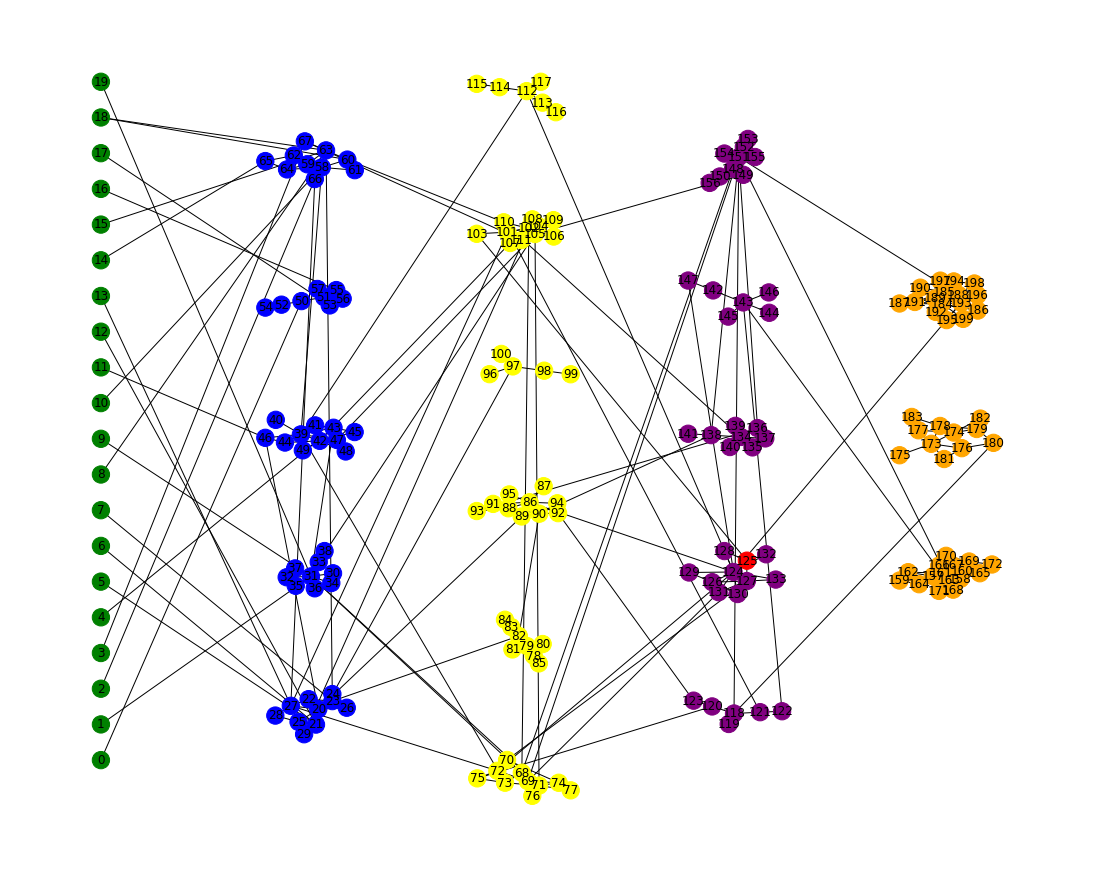

In [9]:
alt_network = targetnetwork.Network(200, 20, 20, 5,3)
# alt_network.register_mtd(PortShuffle)
# alt_network.register_mtd(IPShuffle)
# alt_network.register_mtd(OSDiversity)
alt_network.register_mtd(ServiceDiversity)
# alt_network.register_mtd(UserShuffle)
# alt_network.register_mtd(HostTopologyShuffle)
# alt_network.register_mtd(CompleteTopologyShuffle)
alt_network.draw()

In [ ]:
alt_network.attack_path_exposure()

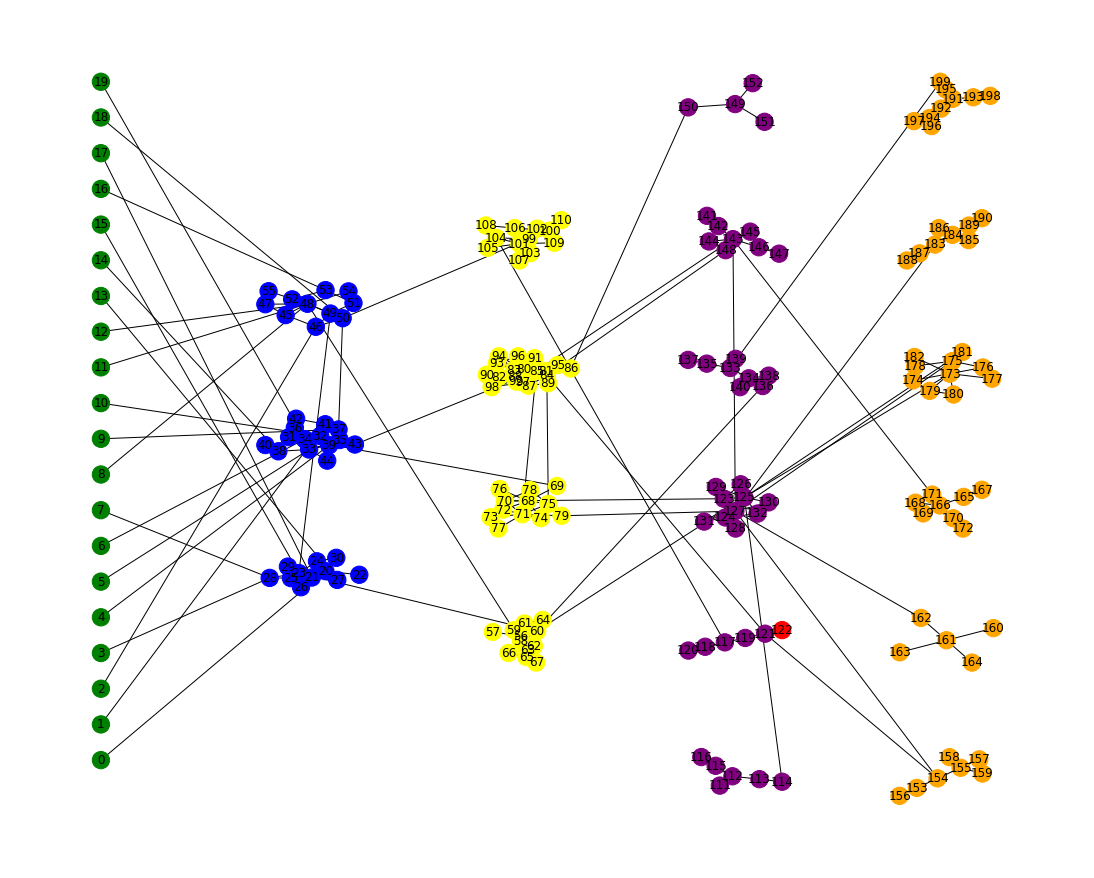

In [6]:
import mtdnetwork.copynetwork as copynetwork
graph = alt_network.get_graph_copy()
colour_map = alt_network.get_colourmap()
pos = alt_network.get_pos()
copy_network = copynetwork.Network(graph, pos, colour_map,200, 20, 20, 5)
# copy_network.register_mtd(PortShuffle)
# copy_network.register_mtd(IPShuffle)
# copy_network.register_mtd(OSShuffle)
# copy_network.register_mtd(ServiceShuffle)
# copy_network.register_mtd(UserShuffle)
# copy_network.register_mtd(HostTopologyShuffle)
# copy_network.register_mtd(CompleteTopologyShuffle)
copy_network.draw()

In [15]:
import mtdnetwork.scorer as scorer
stats = scorer.Statistics("CompromiseStatistics")
stats.get_dict()



{'record name': 'CompromiseStatistics',
 'x': [],
 'y': [],
 'cumulative y': [],
 'total events': 0}

In [9]:
alt_network.get_statistics()

{'Total Initial Vulnerabilities (Sum of all Vulns on all hosts)': 6312,
 'Initial Vulns Per OS (Sum of all Vulns on those OS)': {'ubuntu': {'20.04': 111,
   '16.04': 121,
   '18.04': 314,
   '12.04': 363,
   '14.04': 348,
   '10.04': 335},
  'windows': {'8.1': 390, '7': 231, '8': 356, '10': 167, 'vista': 211},
  'centos': {'8': 238, '7': 388, '6': 413, '4': 286, '3': 118, '5': 520},
  'freebsd': {'10': 153, '11': 323, '12': 408, '8': 232, '13': 108, '9': 178}},
 'Average Initial RoA Per OS': {'ubuntu': {'20.04': 0.08093622637850806,
   '16.04': 0.06671618647846066,
   '18.04': 0.07320779860301539,
   '12.04': 0.0796326532997594,
   '14.04': 0.06892559131975183,
   '10.04': 0.06663728801555621},
  'windows': {'8.1': 0.08631612360810605,
   '7': 0.08077183905906157,
   '8': 0.08080227322841042,
   '10': 0.07287102631230341,
   'vista': 0.07048184903870604},
  'centos': {'8': 0.09499011453344552,
   '7': 0.08682881095008244,
   '6': 0.0667195238385684,
   '4': 0.06412477195419942,
   '3':

In [10]:
copy_network.get_statistics()

{'Total Initial Vulnerabilities (Sum of all Vulns on all hosts)': 6312,
 'Initial Vulns Per OS (Sum of all Vulns on those OS)': {'ubuntu': {'20.04': 111,
   '16.04': 121,
   '18.04': 314,
   '12.04': 363,
   '14.04': 348,
   '10.04': 335},
  'windows': {'8.1': 390, '7': 231, '8': 356, '10': 167, 'vista': 211},
  'centos': {'8': 238, '7': 388, '6': 413, '4': 286, '3': 118, '5': 520},
  'freebsd': {'10': 153, '11': 323, '12': 408, '8': 232, '13': 108, '9': 178}},
 'Average Initial RoA Per OS': {'ubuntu': {'20.04': 0.08093622637850806,
   '16.04': 0.06671618647846066,
   '18.04': 0.07320779860301539,
   '12.04': 0.0796326532997594,
   '14.04': 0.06892559131975183,
   '10.04': 0.06663728801555621},
  'windows': {'8.1': 0.08631612360810605,
   '7': 0.08077183905906157,
   '8': 0.08080227322841042,
   '10': 0.07287102631230341,
   'vista': 0.07048184903870604},
  'centos': {'8': 0.09499011453344552,
   '7': 0.08682881095008244,
   '6': 0.0667195238385684,
   '4': 0.06412477195419942,
   '3':

In [10]:
adversary = hacker.Hacker(alt_network, 10)
curr_time = 0
time_step = 1
for curr_time in range(1000000):
    alt_network.step(curr_time)
    adversary.step(curr_time)
    if adversary.done:
        break
print("DONE")
print("TIME:", curr_time)

INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtd:serviceDiversity:changing services on hosts
INFO:mtdnetwork.hacker:VULN COMPROMISE:4:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:centos:8
INFO:vuln-2689a598-bf1d-46df-89ab-17071d569bad:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtd:serviceDiversity:changing services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 1000
INFO:mtdnetwork.hacker:Re-doing port scan on host 39


This host has been compromised:  4
This host has been compromised:  43


INFO:vuln-5173b343-94f3-4867-b6cb-c133ea031b26:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-fa1c988a-e873-48cc-9587-abc101db811c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b3068bc8-341e-42a5-843c-14c26e47bced:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:ubuntu:14.04
INFO:vuln-448c5956-b4a0-487c-9264-410ad91c1129:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtd:serviceDiversity:changing services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 988
INFO:mtdnetwork.hacker:Re-doing port scan on host 31


This host has been compromised:  39


INFO:vuln-48b5f761-fc6c-48c8-8d7a-989ce1661499:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-28facd31-0b09-4f39-9b3f-c6acf3f524c3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:7
INFO:vuln-049eea2e-6ea7-4e1c-8a30-019859b8166a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-03cfb96f-5124-44ab-864a-ff59a14db954:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-2028adc1-2cf8-4581-a2b4-84813352b96e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:14.04


This host has been compromised:  31


INFO:vuln-128e4ed8-b314-4422-b29d-6ead2fdc7732:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a50ad177-627d-4f65-a87a-3ec34e8bac79:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtd:serviceDiversity:changing services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 976
INFO:mtdnetwork.hacker:Re-doing port scan on host 58


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:61:ubuntu:16.04
INFO:vuln-7b730bda-9665-46f4-b96c-05c127e377b2:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  58
This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:centos:6
INFO:mtd:serviceDiversity:changing services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 964
INFO:mtdnetwork.hacker:Re-doing port scan on host 32


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:centos:8
INFO:vuln-aea4d9b2-1461-438c-b60c-516d59701609:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e287d113-973d-4b17-a09f-62b87dab1f95:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:67:ubuntu:20.04


This host has been compromised:  62
This host has been compromised:  67


INFO:mtd:serviceDiversity:changing services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 952
INFO:mtdnetwork.hacker:Re-doing port scan on host 46
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:ubuntu:18.04
INFO:vuln-034dba16-5852-4f00-add4-c0109c4bf609:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  46


INFO:mtd:serviceDiversity:changing services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 940
INFO:mtdnetwork.hacker:Re-doing port scan on host 111
INFO:mtdnetwork.hacker:VULN COMPROMISE:111:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:101:ubuntu:14.04


This host has been compromised:  111
This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:freebsd:13


This host has been compromised:  27
This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:6


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:12.04
INFO:vuln-bb596dc4-6aeb-4c8b-b0dd-b1cbc644e385:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:freebsd:11


This host has been compromised:  23
This host has been compromised:  60


INFO:mtd:serviceDiversity:changing services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 927
INFO:mtdnetwork.hacker:Re-doing port scan on host 63
INFO:mtdnetwork.hacker:VULN COMPROMISE:63:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:11


This host has been compromised:  63
This host has been compromised:  59


INFO:vuln-a1632dd7-7013-4bc0-a1d1-b94a2ac5b8b2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtd:serviceDiversity:changing services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 916
INFO:mtdnetwork.hacker:Re-doing port scan on host 29
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:66:freebsd:10


This host has been compromised:  29
This host has been compromised:  66


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:44:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:freebsd:13


This host has been compromised:  44
This host has been compromised:  24
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:ubuntu:14.04


This host has been compromised:  112


INFO:vuln-3358c628-8f21-4e50-ae05-9f5b673c07e9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-0a196e34-4a19-4c47-a251-7772e9877bc4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:64:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:centos:8


This host has been compromised:  64
This host has been compromised:  65


INFO:mtd:serviceDiversity:changing services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 904
INFO:mtdnetwork.hacker:Re-doing port scan on host 33
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:5
INFO:vuln-23a5dbca-d6f6-412c-8945-c6f4f9a5d216:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtd:serviceDiversity:changing services on hosts


This host has been compromised:  35


INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 892
INFO:mtdnetwork.hacker:Re-doing port scan on host 68
INFO:mtdnetwork.hacker:VULN COMPROMISE:68:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:148:centos:7


This host has been compromised:  68
This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:71:ubuntu:20.04


This host has been compromised:  37
This host has been compromised:  71


INFO:mtd:serviceDiversity:changing services on hosts
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:windows:8


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:windows:vista


This host has been compromised:  77


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:70:centos:8


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:windows:8.1
INFO:vuln-c2081855-d440-4d8a-bf3a-8788f7a121ec:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:105:centos:6


This host has been compromised:  108
This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:freebsd:10


This host has been compromised:  106


INFO:vuln-8da25364-89ea-47b9-a725-020d058b8773:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:104:freebsd:10
INFO:mtd:serviceDiversity:changing services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 880
INFO:mtdnetwork.hacker:Re-doing port scan on host 47


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:windows:10


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:centos:7


This host has been compromised:  41
This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:freebsd:13


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:49:ubuntu:16.04


This host has been compromised:  45
Current attack attempts:  100
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:12.04


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:freebsd:11


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:windows:8.1


This host has been compromised:  79


INFO:vuln-aa050234-bfea-4609-8402-66a9335db700:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:80:ubuntu:12.04


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:freebsd:13
INFO:mtd:serviceDiversity:changing services on hosts


This host has been compromised:  81


INFO:vuln-65211f6a-bfb9-423c-bd00-896c7c053a00:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:centos:4


This host has been compromised:  26


INFO:mtd:serviceDiversity:changing services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 868
INFO:mtdnetwork.hacker:Re-doing port scan on host 28
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:windows:8.1


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:windows:8.1


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:centos:8


This host has been compromised:  97
This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:ubuntu:18.04


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:freebsd:10


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:6


This host has been compromised:  36


INFO:mtd:serviceDiversity:changing services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 856
INFO:mtdnetwork.hacker:Re-doing port scan on host 69
INFO:mtdnetwork.hacker:VULN COMPROMISE:69:centos:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:131:ubuntu:16.04


This host has been compromised:  69
This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:freebsd:10


This host has been compromised:  124


INFO:vuln-94e9e803-66eb-47fa-96a8-fbabb08d0816:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:126:freebsd:9


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:ubuntu:18.04


This host has been compromised:  127
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:freebsd:13


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:ubuntu:20.04


This host has been compromised:  125
DONE
TIME: 52330


In [55]:
adversary.get_statistics()

{'Total Host Compromises': 185,
 'Total User Compromises': 194,
 'Total Vuln Compromises': 155,
 'Total Attack Attempts': 531,
 'Total Reuse Pass Compromises': 29,
 'Total Password Spray Compromises': 1,
 'Total Actions Blocked by MTD': 0,
 'Target Node Compromised': False,
 'Compromised hosts': [2,
  57,
  53,
  61,
  62,
  65,
  58,
  54,
  64,
  38,
  40,
  56,
  39,
  42,
  34,
  41,
  43,
  60,
  55,
  37,
  36,
  98,
  104,
  99,
  103,
  97,
  115,
  63,
  73,
  28,
  59,
  81,
  80,
  86,
  66,
  44,
  35,
  94,
  88,
  93,
  74,
  102,
  95,
  96,
  72,
  75,
  76,
  78,
  50,
  71,
  51,
  138,
  139,
  141,
  140,
  136,
  77,
  101,
  32,
  30,
  33,
  29,
  161,
  166,
  164,
  160,
  181,
  158,
  168,
  100,
  137,
  142,
  87,
  92,
  20,
  25,
  105,
  85,
  106,
  110,
  124,
  133,
  129,
  125,
  118,
  119,
  122,
  135,
  134,
  127,
  123,
  150,
  128,
  121,
  126,
  89,
  107,
  108,
  109,
  21,
  113,
  114,
  116,
  45,
  47,
  46,
  48,
  131,
  132,
  189

In [61]:
adversary.attacks_required_per_compromise()

(2.4545454545454546,
 [[1, 2],
  [21, 5],
  [28, 2],
  [24, 7],
  [23, 6],
  [59, 2],
  [54, 6],
  [20, 9],
  [53, 6],
  [60, 2],
  [26, 6],
  [32, 2],
  [25, 3],
  [30, 3],
  [64, 4],
  [51, 3],
  [55, 4],
  [99, 4],
  [61, 2],
  [56, 1],
  [29, 2],
  [33, 2],
  [57, 4],
  [62, 2],
  [22, 2],
  [27, 1],
  [31, 1],
  [94, 8],
  [101, 3],
  [96, 6],
  [98, 3],
  [58, 1],
  [66, 3],
  [52, 2],
  [63, 2],
  [42, 7],
  [44, 3],
  [45, 4],
  [46, 4],
  [41, 4],
  [47, 1],
  [48, 4],
  [77, 3],
  [79, 4],
  [117, 4],
  [119, 1],
  [43, 2],
  [89, 3],
  [74, 5],
  [82, 4],
  [68, 2],
  [65, 6],
  [71, 1],
  [69, 1],
  [67, 1],
  [75, 3],
  [78, 1],
  [80, 2],
  [120, 4],
  [121, 2],
  [40, 3],
  [83, 2],
  [34, 4],
  [38, 1],
  [35, 3],
  [39, 1],
  [36, 1],
  [102, 1],
  [95, 1],
  [97, 1],
  [137, 2],
  [90, 4],
  [87, 2],
  [88, 2],
  [86, 4],
  [84, 5],
  [109, 3],
  [92, 1],
  [91, 1],
  [85, 1],
  [93, 1],
  [81, 2],
  [158, 6],
  [132, 9],
  [136, 7],
  [106, 1],
  [135, 2],
  [169, 2]

In [24]:
adversary.get_compromised()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 9,
 10,
 11,
 13,
 14,
 15,
 17,
 18,
 19,
 42,
 45,
 29,
 37,
 51,
 30,
 20,
 32,
 21,
 57,
 43,
 59,
 23,
 31,
 48,
 52,
 38,
 36,
 46,
 40,
 44,
 106,
 62,
 60,
 105,
 33,
 34,
 66,
 24,
 49,
 69,
 64,
 56,
 95,
 96,
 97,
 94,
 99,
 98,
 35,
 91,
 47,
 26,
 82,
 58,
 55,
 50,
 68,
 72,
 74,
 73,
 27,
 28,
 25,
 112,
 158,
 102,
 100,
 65,
 67,
 88,
 61,
 63,
 8,
 39,
 41,
 101,
 107,
 104,
 108,
 103,
 70,
 71,
 75,
 77,
 87,
 121,
 127,
 85,
 84,
 92,
 144,
 111,
 80,
 157,
 160,
 93,
 89,
 90,
 124,
 122,
 78,
 86,
 141,
 135,
 110,
 134,
 109,
 113,
 79,
 81,
 83,
 137,
 140,
 139,
 136,
 145,
 191,
 142,
 123,
 125,
 126,
 187,
 184,
 183,
 149,
 138,
 130,
 168,
 132,
 131,
 190,
 185,
 186,
 181,
 192,
 195,
 194,
 189,
 197,
 188,
 193,
 198,
 151,
 147,
 146,
 166,
 162,
 172,
 167,
 169,
 177,
 180,
 150,
 152,
 153,
 154,
 199,
 148,
 155,
 156,
 164,
 176,
 171,
 165,
 173,
 174,
 170,
 175,
 178,
 179,
 163,
 133,
 196,
 182,
 114,
 116,


In [66]:
alt_network.get_statistics()

{'Total Initial Vulnerabilities (Sum of all Vulns on all hosts)': 5050,
 'Initial Vulns Per OS (Sum of all Vulns on those OS)': {'ubuntu': {'18.04': 134,
   '20.04': 200,
   '16.04': 169,
   '14.04': 277,
   '12.04': 286,
   '10.04': 59},
  'centos': {'7': 202, '8': 207, '4': 289, '6': 268, '5': 121},
  'freebsd': {'12': 223, '10': 519, '8': 239, '11': 302, '13': 221, '9': 225},
  'windows': {'10': 141, '8.1': 212, 'vista': 206, '7': 388, '8': 162}},
 'Average Initial RoA Per OS': {'ubuntu': {'18.04': 0.1039750302330583,
   '20.04': 0.083850133746684,
   '16.04': 0.09930720191290608,
   '14.04': 0.09562912194763516,
   '12.04': 0.10582710317098942,
   '10.04': 0.097090509538944},
  'centos': {'7': 0.09049607825902553,
   '8': 0.07841860883890008,
   '4': 0.08812194917240218,
   '6': 0.09234167802605792,
   '5': 0.08941226196136802},
  'freebsd': {'12': 0.0920577266827381,
   '10': 0.09056640057431771,
   '8': 0.08628839964044016,
   '11': 0.09328698935710443,
   '13': 0.081002748667604

In [ ]:
alt_network.draw_compromised(adversary.compromised_hosts)

In [ ]:
alt_network.draw()

In [ ]:
adversary.observed_changes

In [ ]:
# test_network.users_list

In [51]:
adversary = hacker.Hacker(alt_network, 10)
curr_time = 0
time_step = 1
for curr_time in range(200000):
    alt_network.step(curr_time)
    adversary.step(curr_time)
    if adversary.done:
        break
print("DONE")

INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


1000


INFO:mtdnetwork.hacker:VULN COMPROMISE:0:ubuntu:16.04


This host has been compromised:  0


INFO:vuln-882c3cd3-2b8a-4e00-bbe7-795e9b0580a3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:centos:3
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:windows:10


This host has been compromised:  74
This host has been compromised:  64
This host has been compromised:  69
This host has been compromised:  1
This host has been compromised:  27
This host has been compromised:  2


INFO:mtdnetwork.hacker:VULN COMPROMISE:3:freebsd:8


This host has been compromised:  3


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:4


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:windows:xp


This host has been compromised:  65
This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:freebsd:12


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:freebsd:10


This host has been compromised:  70


INFO:vuln-762c35ec-186c-43d9-8eb0-14bdd495ce1f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:68:windows:vista
INFO:vuln-3c32eaed-aba1-4a55-9eca-4a34350fac6f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:ubuntu:14.04


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:freebsd:11
INFO:vuln-c34d6819-c42e-4716-9e33-7d0edbd13b1f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:freebsd:12


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:freebsd:13


This host has been compromised:  72
This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:centos:5


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:ubuntu:20.04


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:104:windows:8


This host has been compromised:  102
This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:freebsd:13


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:windows:10


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:freebsd:10
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 1000
INFO:mtdnetwork.hacker:Re-doing port scan on host 185


This host has been compromised:  192
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:freebsd:8


This host has been compromised:  185


INFO:mtd:hostshuffle:swapping hosts


ZeroDivisionError: division by zero

In [7]:
results = []
error_threshold = 7.5
error_threshold_met = False
while error_threshold_met == False:
    alt_network = targetnetwork.Network(200, 20, 20, 5,3)
    graph = alt_network.get_graph_copy()
    colour_map = alt_network.get_colourmap()
    pos = alt_network.get_pos()
    copy_network = copynetwork.Network(graph, pos, colour_map,200, 20, 20, 5)
    adversary = hacker.Hacker(alt_network, 10)
    curr_time = 0
    time_step = 1
    for curr_time in range(1000000):
        alt_network.step(curr_time)
        adversary.step(curr_time)
        if adversary.done:
            break
    print("DONE")
    print("TIME:", curr_time)
    results.append(adversary.get_statistics())
    error = np.std(nHost_compromised, ddof=1) / np.sqrt(np.size(nHost_compromised))
    print(error)
    if error < error_threshold:
        error_threshold_met == True

Target Node is:  117


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-fc54f7e7-f724-428c-a713-b488e69ba116:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:windows:8.1


This host has been compromised:  1


INFO:vuln-876b4855-103f-40c2-bfc7-373147ae6298:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-59dd25dc-f1d2-4400-b7e7-1bed15309919:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:4:freebsd:9
INFO:vuln-73dd9fcf-889f-4a8a-8617-83757e742008:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:windows:8


This host has been compromised:  4
This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:centos:7
INFO:vuln-9633bb97-2af3-4fb5-8614-4c14f6372fd5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-1323aa99-ec1f-4e07-aca3-eb5d4bdb2faa:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-280261ff-45e7-4ef2-945b-b5f35af0d755:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:12


This host has been compromised:  63
This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:ubuntu:20.04


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:centos:8


This host has been compromised:  64
This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:freebsd:11
INFO:vuln-17ff732b-b464-4d89-b8db-96490ffabe3f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:windows:vista
INFO:vuln-ec5b4fc4-668d-4507-8c5a-938d9b2a92cd:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:ubuntu:16.04
INFO:vuln-7cba8440-dc8d-4433-a928-d69fd6aefb1d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:windows:8


This host has been compromised:  61
This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:centos:8


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:66:windows:8.1


This host has been compromised:  68
This host has been compromised:  66


INFO:vuln-82c45496-15e5-4a2b-b381-a0be74752726:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:69:freebsd:13


This host has been compromised:  74
This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:ubuntu:20.04


This host has been compromised:  75
This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:windows:8.1


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:windows:10


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:freebsd:12


This host has been compromised:  71


INFO:vuln-06bab75c-db34-468d-b923-8fda6a04778f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:73:centos:5


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:ubuntu:20.04


This host has been compromised:  27
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:centos:8


This host has been compromised:  76


INFO:vuln-596ec5c9-368c-4dbe-870f-c3548b44ee2b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:92:windows:8


This host has been compromised:  92


INFO:vuln-c62a483d-f841-4b3f-8469-5c939bcdb222:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c8c9e7af-7b37-4450-ade5-31c8f7561855:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:143:windows:8


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:freebsd:12
INFO:vuln-dd950fdb-2a64-4fe2-854e-286dc3f9d613:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:windows:8.1


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:windows:8.1


This host has been compromised:  159


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:163:windows:10


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:windows:7


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:centos:7


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:windows:8.1


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:windows:10


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:freebsd:13


This host has been compromised:  109


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:112:windows:10


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:centos:7


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:freebsd:13


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:freebsd:12


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:centos:7


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:freebsd:13


This host has been compromised:  135


INFO:vuln-8dee61da-1ad7-48cb-a3f5-f9dc17c62a91:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:140:centos:6


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:freebsd:13


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:centos:7


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:windows:10


This host has been compromised:  20


INFO:vuln-c9846995-0232-45bd-99b2-0251b82f76b8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:windows:7


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:ubuntu:18.04


This host has been compromised:  21
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:freebsd:13


This host has been compromised:  45
This host has been compromised:  48


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:51:ubuntu:20.04


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:centos:6


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:91:windows:10


This host has been compromised:  94
This host has been compromised:  91


INFO:vuln-6b0a293b-18e1-4502-a36a-5517307e60ee:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:ubuntu:10.04


This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:8.1


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:windows:8.1


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:11


This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:ubuntu:16.04


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:8


This host has been compromised:  35


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:40:centos:7


This host has been compromised:  40


INFO:vuln-8375472f-7d92-452e-b254-dabbb053239f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:9


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:8.1


This host has been compromised:  31


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:42:centos:8


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:centos:5


This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:windows:8.1


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:ubuntu:20.04


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:13


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:centos:6


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:5


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:centos:6


This host has been compromised:  38
Current attack attempts:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:41:centos:5


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:12


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:windows:8


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:centos:4


This host has been compromised:  25


INFO:vuln-dff3aded-bea2-4a43-9482-aa3708138b08:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:18.04


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:windows:7


This host has been compromised:  55


INFO:vuln-38553eaf-f418-4567-8bb0-ac4931e5e1b9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-0519d48c-0088-46d6-b151-4b96f5f2c223:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-11b68637-7f80-4b75-ae12-58ace4f46bd7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:98:freebsd:9


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:centos:7


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:centos:7


This host has been compromised:  88


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:97:centos:8


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:ubuntu:20.04


This host has been compromised:  136


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:138:freebsd:9


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:ubuntu:16.04


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:ubuntu:12.04


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:centos:7


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:freebsd:8


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:centos:8


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:windows:xp


This host has been compromised:  95
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:windows:10


This host has been compromised:  137


INFO:vuln-8a9e2451-af74-4d82-a46d-e7fe298be033:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:152:windows:vista


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:centos:6


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:windows:8.1


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:windows:7


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:freebsd:8


This host has been compromised:  178


INFO:vuln-76c58a96-891c-4b32-bd01-5a1af9db7e5c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:181:freebsd:8


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:freebsd:10


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:freebsd:10


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:centos:7


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:freebsd:13


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:ubuntu:16.04


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:windows:8.1


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:centos:7


This host has been compromised:  111


INFO:vuln-c825c8f5-5c20-49bb-8474-b2a5979e5380:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:115:centos:3


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:ubuntu:12.04


This host has been compromised:  116


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:113:centos:5


This host has been compromised:  113


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:117:windows:10
d:\github stuff\mtdsim\venv\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
d:\github stuff\mtdsim\venv\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


This host has been compromised:  117
DONE
TIME: 57173
nan
Target Node is:  121


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-7520f3b8-3914-42c5-a3d5-3a2add0b3fb0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:windows:7
INFO:vuln-97b3f02f-8710-4fb5-8676-5dbdf02ca5a8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-420307ec-ac13-41cb-b9d6-22429b77958f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-5276cde3-8a16-4d4e-a441-6db08f190d09:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  1
This host has been compromised:  2


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:windows:xp
INFO:vuln-ad8b9dc9-b30b-40ed-b2dd-ab5320b3b74b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:centos:6
INFO:vuln-1abedf89-9184-4a22-83ac-d24cd3f7c385:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:81:freebsd:11


This host has been compromised:  27
This host has been compromised:  84


INFO:vuln-24398b12-701c-4926-a6fc-bba79c5da7cf:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9560ddc1-c190-4318-9779-388d0013cae8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:83:windows:xp


This host has been compromised:  81
This host has been compromised:  83


INFO:vuln-c0600e3b-e251-49f6-b0a0-c2774cf92175:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9ed30ba4-60f3-4a40-b9b0-a8808c219a76:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:8
INFO:vuln-02e83d1a-cf65-4ab4-a152-d71f99652dbc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-7bea2a43-521d-40c6-9e56-4871df960064:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:20.04


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:centos:8


This host has been compromised:  40
This host has been compromised:  32
This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:centos:7


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:5
INFO:vuln-429842cc-249e-45e1-829c-5ce01207f48f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:ubuntu:18.04


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:freebsd:13


This host has been compromised:  37
This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:ubuntu:16.04
INFO:vuln-ed0aa100-b9ec-4308-9938-8bd1210781ca:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:8.1


This host has been compromised:  28
This host has been compromised:  30
This host has been compromised:  42


INFO:vuln-996a6956-a909-44f9-955e-0822ead17474:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:freebsd:10


This host has been compromised:  29
This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:11


This host has been compromised:  66
This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:freebsd:12


This host has been compromised:  67


INFO:vuln-76e8a229-4a99-40d1-88da-07f7e8c85585:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-0cb74c92-0cdf-4ab7-8079-8656a06d468d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:123:ubuntu:14.04


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:windows:10


This host has been compromised:  21
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:24:centos:7


This host has been compromised:  20
This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:centos:4


This host has been compromised:  26


INFO:vuln-63059ea4-688b-4bfb-9280-02b6c53a484e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:centos:5


This host has been compromised:  57


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:58:centos:5
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:63:freebsd:13


This host has been compromised:  58
This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:freebsd:13


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:ubuntu:14.04


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:windows:8.1


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:centos:7


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:centos:8
INFO:vuln-07712316-d292-447e-ab08-a03c86f40656:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:96:freebsd:13


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:ubuntu:14.04


This host has been compromised:  96
This host has been compromised:  97


INFO:vuln-532a1a56-6a25-40f4-b6ee-1210f8c464b0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:98:windows:xp


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:69:centos:4


This host has been compromised:  99
This host has been compromised:  69


INFO:vuln-b4b1cd6b-33da-457b-9714-1a2b2ded4f95:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:149:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:70:freebsd:13


This host has been compromised:  149
This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:freebsd:13


This host has been compromised:  93


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:46:windows:xp


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:freebsd:11


This host has been compromised:  51


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:44:centos:6


This host has been compromised:  44


INFO:vuln-3a7bd8b5-8822-4cb7-a7b9-010c5b5ab515:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-0f1f1d1a-35c5-47e6-8e62-2255821b4be0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:8


This host has been compromised:  49


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:45:freebsd:11


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:5


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:20.04


This host has been compromised:  53
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:ubuntu:18.04


This host has been compromised:  50


INFO:vuln-60ecc935-5f3e-4f42-893d-b00461ad6f13:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:freebsd:10


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:centos:7


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:windows:10


This host has been compromised:  71


INFO:vuln-67749ad6-cd4a-4011-9cbc-9c6b72e97ad0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:124:windows:8.1


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:centos:8


This host has been compromised:  121
DONE
TIME: 32847
24.5
Target Node is:  130


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:centos:7
INFO:vuln-ab055233-6754-4963-9d7d-71a562e21095:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:freebsd:12


This host has been compromised:  0
This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:67:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:windows:10


This host has been compromised:  62
This host has been compromised:  66
This host has been compromised:  67
This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:ubuntu:18.04


This host has been compromised:  63
This host has been compromised:  1


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:4


This host has been compromised:  35


INFO:vuln-f967e830-64ac-482f-8bb1-7b4e2729609f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:10.04
INFO:vuln-9c3bf75f-5848-4a8c-81ca-ea0ac9ca0eb0:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:ubuntu:14.04


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:freebsd:12


This host has been compromised:  38


INFO:vuln-f30221ee-8c37-4aaa-8608-659a5270eaa9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-025224ad-7e0c-4441-b51d-84296255e911:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:6


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:10
INFO:vuln-53df34d8-3189-4b24-b7bb-21aa60af426a:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:windows:7


This host has been compromised:  33


INFO:vuln-5ee11b31-5cd1-49e7-8f94-5b52e05c4aa1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:ubuntu:10.04


This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:windows:7


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:windows:10


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:22:ubuntu:14.04


This host has been compromised:  26
This host has been compromised:  22


INFO:vuln-70952be8-3d77-48d2-a58c-b0c9f3ab3cb8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:windows:8.1


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:12


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:16.04


This host has been compromised:  28
Current attack attempts:  50


INFO:vuln-5d5e397e-4c23-45d6-ae2b-0c8e9585c717:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3c32d3e2-5735-4e2b-90ee-764595490f45:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c91a2956-99c0-4676-98b8-f05634a4f05a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ede8aa55-471f-40c1-b434-207acd5aeb42:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:80:centos:6


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:18.04
INFO:vuln-0d2590b3-64b3-4955-8e99-59ccee9b5df8:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:12.04


This host has been compromised:  21


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:85:freebsd:13


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:91:ubuntu:12.04


This host has been compromised:  93
This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:centos:7
INFO:vuln-483c8b23-2e3e-4547-921f-09897a308bc0:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:centos:8


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:windows:8


This host has been compromised:  125


INFO:vuln-09227465-e945-4667-8be3-bc7d5069d430:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:121:ubuntu:16.04


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:centos:6
INFO:vuln-2a97863b-b245-41a9-bf3f-4cb3cb4fe5ec:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:16.04


This host has been compromised:  56


INFO:vuln-14649c82-5674-4b67-863c-e6896d3de5dd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e1b85f35-a3b2-4437-a458-b1cfadf3d2fa:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:9


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:windows:8.1


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:windows:8


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:centos:5


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:5
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:48:ubuntu:20.04


This host has been compromised:  54
This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:ubuntu:18.04


This host has been compromised:  51


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:55:centos:8


This host has been compromised:  55


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:57:windows:vista


This host has been compromised:  57
Current attack attempts:  100


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:50:centos:7


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:freebsd:9


This host has been compromised:  96


INFO:vuln-20afd6ef-d9d8-4888-8bb6-a5232aa22811:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:centos:6


This host has been compromised:  97


INFO:vuln-e1a362f5-967e-4159-a52e-b2e1c14e69ee:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:ubuntu:18.04


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:windows:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:99:ubuntu:14.04


This host has been compromised:  98
This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:windows:7


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:ubuntu:16.04


This host has been compromised:  143


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:147:ubuntu:20.04


This host has been compromised:  147


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:149:windows:8.1


This host has been compromised:  149


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:145:freebsd:9


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:windows:10


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:centos:8


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:windows:vista


This host has been compromised:  36


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:43:centos:6


This host has been compromised:  43


INFO:vuln-b7848415-8f1d-441e-866b-52b29672083c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:freebsd:11


This host has been compromised:  45


INFO:vuln-88460a9d-080f-440c-b274-8179d499f1e5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:freebsd:8


This host has been compromised:  42


INFO:vuln-07e90a85-e16d-4090-aaf4-403e6d8b5f5b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:freebsd:12


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:centos:6


This host has been compromised:  47
Current attack attempts:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:95:windows:8.1


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:windows:8.1


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:centos:6


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:centos:8


This host has been compromised:  148


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:150:centos:5


This host has been compromised:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:144:freebsd:13


This host has been compromised:  144


INFO:vuln-dd3f146b-6306-4c4d-90d5-1b7ffcf5d1b0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:146:ubuntu:14.04


This host has been compromised:  146


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:92:windows:8.1


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:ubuntu:14.04


This host has been compromised:  110


INFO:vuln-33ad5c7f-508c-4359-9f19-e154798142be:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:105:freebsd:10


This host has been compromised:  105


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:70:centos:3


This host has been compromised:  70


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:104:centos:7


This host has been compromised:  104


INFO:vuln-1dec9ae2-fcc4-4bc0-9fca-a993a193aecc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:109:freebsd:12


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:freebsd:12


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:freebsd:10


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:windows:8.1


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:ubuntu:20.04


This host has been compromised:  108


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:106:centos:6


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:ubuntu:20.04


This host has been compromised:  103
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:windows:10


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:freebsd:13


This host has been compromised:  127


INFO:vuln-af6e5ab7-dd85-4780-b11c-33b1c9d1e33e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:123:ubuntu:10.04


This host has been compromised:  123


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:120:freebsd:12


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:centos:5


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:centos:4


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:77:centos:7


This host has been compromised:  75
This host has been compromised:  77


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:78:freebsd:10


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:windows:10


This host has been compromised:  79


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:76:windows:8.1


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:freebsd:13


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:centos:6


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:windows:8.1


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:windows:vista


This host has been compromised:  68


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:73:centos:8


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:windows:10


This host has been compromised:  72


INFO:vuln-65f1318c-cf47-4ba5-a7ab-9a0a39b5ae6b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:182:ubuntu:16.04


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:ubuntu:14.04


This host has been compromised:  185


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:186:freebsd:12


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:windows:8.1


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:freebsd:9


This host has been compromised:  188
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:centos:4


This host has been compromised:  124


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:173:ubuntu:20.04


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:ubuntu:12.04


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:freebsd:12


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:freebsd:13


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:ubuntu:20.04


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:freebsd:11


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:freebsd:12


This host has been compromised:  81


INFO:vuln-b943a1ec-a57f-45d2-bd8f-07aed2481ea3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:82:freebsd:12


This host has been compromised:  82


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:83:centos:7


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:freebsd:12


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:windows:10


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:freebsd:10


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:centos:7


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:freebsd:10


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:centos:6


This host has been compromised:  193


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:198:centos:8


This host has been compromised:  198


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:centos:8


This host has been compromised:  195


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:196:centos:8


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:freebsd:10


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:windows:8.1


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:freebsd:13


This host has been compromised:  183


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:184:freebsd:13


This host has been compromised:  184
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:freebsd:13


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:ubuntu:16.04


This host has been compromised:  187


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:170:windows:7


This host has been compromised:  170


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:177:freebsd:12


This host has been compromised:  177


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:178:ubuntu:16.04


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:ubuntu:12.04


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:windows:vista


This host has been compromised:  175


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:171:ubuntu:16.04


This host has been compromised:  171


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:freebsd:13


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:centos:6


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:freebsd:11


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:centos:6


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:centos:5


This host has been compromised:  130
DONE
TIME: 68620
23.82109242760383
Target Node is:  129


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:ubuntu:18.04
INFO:vuln-532ba25e-d07f-466c-ad1b-d08a0d0b738f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:windows:8


This host has been compromised:  0
This host has been compromised:  53


INFO:vuln-efac7c68-5100-40ae-bf4b-b386fe990f27:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:ubuntu:14.04


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:windows:8
INFO:vuln-075abe49-796f-4967-a431-89f886213515:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:10


This host has been compromised:  57
This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:centos:8
INFO:vuln-ae03bc6d-188e-49d3-abe5-a58abb53429c:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  43
This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:freebsd:13


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:4


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:windows:8.1


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:12


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:9


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:centos:7
INFO:vuln-3c31bd9d-4ab1-4a81-9224-d1e5d02a2880:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:freebsd:9


This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:windows:10


This host has been compromised:  48
This host has been compromised:  51


INFO:vuln-e1a2bdfe-d686-422d-937c-a5f60642a010:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:ubuntu:16.04


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:18.04


This host has been compromised:  30


INFO:vuln-f384f2b3-e7be-4f19-949c-a17f06cbc2cc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-65e82a3c-05e6-464b-94f3-b30dddd5f3c2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:windows:8


This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:ubuntu:18.04


This host has been compromised:  60


INFO:vuln-4827d762-2ad7-4554-9684-4b47eef63218:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:windows:8.1


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:freebsd:11


This host has been compromised:  29


INFO:vuln-f925ac16-90fd-488e-93bb-0f52724f885e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:windows:10


This host has been compromised:  32
This host has been compromised:  33
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:ubuntu:20.04


This host has been compromised:  36


INFO:vuln-22a2ac98-fcd5-4743-a45f-41532e6b6bb5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:ubuntu:18.04


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:10


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:ubuntu:18.04


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:8


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:windows:10


This host has been compromised:  40


INFO:vuln-5c6d0b57-aa75-4ab4-b37c-3de4d83e1e09:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:freebsd:9


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:centos:6


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:windows:8


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:windows:8


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:windows:8.1


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:ubuntu:20.04


This host has been compromised:  103


INFO:vuln-f5f06f81-ad22-4a91-8a99-c830ea78f614:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-367bf3ea-b2de-468e-b5f5-047a693b849f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:104:centos:4


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:windows:8


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:12


This host has been compromised:  47


INFO:vuln-4580960d-58e6-4a73-9353-81d9fb14b229:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:10


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:windows:8.1


This host has been compromised:  49


INFO:vuln-8357f1e7-6b6a-4e2b-afdc-217527f153b1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-4698596a-2f9e-4161-b61d-b0a2f202032d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:ubuntu:14.04


This host has been compromised:  61


INFO:vuln-a4f2534d-76cd-4e0b-8a08-89728ad9d9d1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:70:centos:5


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:windows:8


Current attack attempts:  100
This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:centos:7


This host has been compromised:  26
This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:75:centos:8


This host has been compromised:  72
This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:windows:8


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:freebsd:11


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:freebsd:12


This host has been compromised:  139


INFO:vuln-e035a5a9-9dad-4c64-bcbf-894ab653ae1c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:109:freebsd:12


This host has been compromised:  109


INFO:vuln-8b82ddcd-bd6c-42e8-9da9-6d715c910e0b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:107:centos:6


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:centos:7


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:ubuntu:20.04


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:ubuntu:20.04


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:ubuntu:18.04


This host has been compromised:  111


INFO:vuln-1d93e2f8-450b-41c9-bd38-23b4d34ebb8c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:105:ubuntu:20.04


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:windows:7


This host has been compromised:  113


INFO:vuln-b7539941-8230-465e-8bfb-874ca3d5070f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-7497aa93-181e-4585-8139-5610ef9c316b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:112:windows:vista


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:centos:6


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:freebsd:12


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:windows:8.1


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:windows:vista


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:freebsd:9


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:windows:8


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:windows:10


This host has been compromised:  173


INFO:vuln-32645dd0-8920-4f88-9fe9-873f5931fe42:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:178:windows:8


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:centos:7


This host has been compromised:  174
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:ubuntu:20.04


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:centos:7


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:freebsd:12


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:windows:7


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:windows:10


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:centos:6


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:freebsd:11


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:freebsd:12


This host has been compromised:  185


INFO:vuln-01d5c306-6d31-4d09-aecb-e6d8aa6f2757:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-90fce331-82c9-4ee4-b5cf-680ad56e3494:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:184:windows:7


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:freebsd:12


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:freebsd:12


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:freebsd:12


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:freebsd:13


This host has been compromised:  144


INFO:vuln-c600a0e6-bd94-404b-bd0b-6b5469d371ef:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:118:ubuntu:14.04


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:windows:8.1


This host has been compromised:  120


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:123:ubuntu:16.04


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:ubuntu:20.04


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:ubuntu:20.04


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:windows:10


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:windows:8


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:ubuntu:20.04


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:freebsd:11


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:ubuntu:20.04


This host has been compromised:  194


INFO:vuln-649c22b7-bd68-43b0-8d48-fc3549722e33:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:199:freebsd:9


This host has been compromised:  199
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:ubuntu:20.04


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:windows:10


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:ubuntu:14.04


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:ubuntu:14.04


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:ubuntu:20.04


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:7


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:12


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:freebsd:13


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:freebsd:13


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:centos:4


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:centos:5


This host has been compromised:  80


INFO:vuln-06cc2934-1fb5-4aaf-98f3-90084ad9e426:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:71:centos:6


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:freebsd:10


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:windows:10


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:windows:7


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:windows:10


This host has been compromised:  159
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:windows:7


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:ubuntu:20.04


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:ubuntu:12.04


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:windows:10


This host has been compromised:  143


INFO:vuln-5d60b4f4-5a21-4484-9c1a-2d05a4e38dd3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:146:ubuntu:14.04


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:ubuntu:18.04


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:centos:8


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:freebsd:13


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:freebsd:9


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:windows:10


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:freebsd:10


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:windows:8.1


This host has been compromised:  151


INFO:vuln-7831bc8a-736a-4ca6-b2e7-9b368efdb0b8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:ubuntu:10.04


This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:13


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:windows:10


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:centos:8


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:centos:8


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:centos:8


This host has been compromised:  42
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:windows:10


This host has been compromised:  187


INFO:vuln-72a69435-b070-45bf-863b-d1996a3c0250:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e1b95243-05e4-45c6-8ddf-c67ceba7dac5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:195:ubuntu:12.04


This host has been compromised:  195


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:191:freebsd:11


This host has been compromised:  191


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:197:ubuntu:14.04


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:ubuntu:12.04


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:freebsd:13


This host has been compromised:  198


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:centos:5


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:ubuntu:18.04


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:centos:6


This host has been compromised:  140


INFO:vuln-67a0597b-412d-4a06-8328-9beecb9af02b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:132:freebsd:11


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:freebsd:13


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:ubuntu:14.04


This host has been compromised:  131


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:188:freebsd:10


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:centos:6


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:windows:7


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:windows:vista


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:ubuntu:16.04


This host has been compromised:  86
Current attack attempts:  350


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:freebsd:12


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:freebsd:11


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:ubuntu:20.04


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:ubuntu:20.04


This host has been compromised:  87


INFO:vuln-fa8f1c92-245f-4377-ae70-2dd24657c1fd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:176:centos:6


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:centos:6


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:windows:vista


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:centos:6


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:ubuntu:14.04


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:ubuntu:16.04


This host has been compromised:  161


INFO:vuln-fce68584-dc2c-4d8a-ae12-a5066ef7df87:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-5a53c6f4-8526-48c7-a839-4a99f7050e67:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:162:freebsd:9


This host has been compromised:  162


INFO:vuln-8ea82326-f2b7-4e05-8388-07df08b7831a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:164:centos:3


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:ubuntu:12.04


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:ubuntu:12.04


This host has been compromised:  169


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:167:freebsd:11


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:ubuntu:16.04


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:freebsd:12


This host has been compromised:  171


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:freebsd:11


This host has been compromised:  168


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:137:freebsd:12


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:freebsd:11


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:freebsd:11


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:freebsd:12


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:centos:8


This host has been compromised:  160
Current attack attempts:  400


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:centos:4


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:1:centos:7


This host has been compromised:  1


INFO:mtdnetwork.hacker:VULN COMPROMISE:2:freebsd:8


This host has been compromised:  2


INFO:mtdnetwork.hacker:VULN COMPROMISE:3:ubuntu:18.04


This host has been compromised:  3


INFO:mtdnetwork.hacker:VULN COMPROMISE:4:freebsd:9


This host has been compromised:  4


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:5:windows:7


This host has been compromised:  5


INFO:mtdnetwork.hacker:VULN COMPROMISE:8:centos:4


This host has been compromised:  8


INFO:mtdnetwork.hacker:VULN COMPROMISE:9:centos:6
INFO:vuln-c309dd64-e1d3-4951-b52b-9326454754e7:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  9


INFO:mtdnetwork.hacker:VULN COMPROMISE:10:centos:4


This host has been compromised:  10


INFO:mtdnetwork.hacker:VULN COMPROMISE:11:ubuntu:18.04


This host has been compromised:  11


INFO:mtdnetwork.hacker:VULN COMPROMISE:12:windows:7


This host has been compromised:  12


INFO:mtdnetwork.hacker:VULN COMPROMISE:14:freebsd:12


This host has been compromised:  14


INFO:mtdnetwork.hacker:VULN COMPROMISE:15:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:16:centos:6


This host has been compromised:  15
This host has been compromised:  16


INFO:mtdnetwork.hacker:VULN COMPROMISE:17:centos:3


This host has been compromised:  17


INFO:mtdnetwork.hacker:VULN COMPROMISE:18:freebsd:13


This host has been compromised:  18


INFO:mtdnetwork.hacker:VULN COMPROMISE:19:windows:vista
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


This host has been compromised:  19
Current attack attempts:  450


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:PASSWORD SPRAY USER COMPROMISE:145:ubuntu:20.04


This host has been compromised:  145
Current attack attempts:  500


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


DONE
TIME: 193350
26.98572153318615
Target Node is:  146


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:windows:10


This host has been compromised:  0
This host has been compromised:  41
This host has been compromised:  79


INFO:vuln-8342b31d-d814-40b0-a70c-b7504916ea25:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:centos:8


This host has been compromised:  44
This host has been compromised:  42
This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:centos:8
INFO:vuln-4187616e-15bf-4851-b067-5f7836e6019b:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:freebsd:12
INFO:vuln-7d45b5a2-d5be-4efc-a936-64a8aabdbc50:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9b357106-4188-4f02-be57-0629b9269b77:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  147
This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:freebsd:13


This host has been compromised:  58
This host has been compromised:  55
This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:freebsd:12
INFO:vuln-8cb0b047-df91-42f4-9d1c-18ca292d75d5:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:freebsd:12
INFO:vuln-d4f3793b-b9eb-4089-b01a-23997a84a15a:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:centos:4


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:centos:7


This host has been compromised:  56


INFO:vuln-74bea482-cc8a-4740-a976-661ae1b6945e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:centos:3


This host has been compromised:  26


INFO:vuln-4e448370-3230-4a76-8071-2d8710a4ec03:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:64:ubuntu:14.04
INFO:vuln-81574dfa-2310-4859-8a4b-738a42b66e16:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:6


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:12


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:ubuntu:20.04


This host has been compromised:  49
This host has been compromised:  47


INFO:vuln-35f337c5-008b-47ea-b0b9-4be6eed8e808:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e6fe3ea3-e184-4fba-bcdd-7e0c346e3806:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-06f40d11-83ad-4b4c-a3db-e45d598ae141:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:centos:4
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:95:windows:vista


This host has been compromised:  53
This host has been compromised:  95


INFO:vuln-55ee02eb-7a33-4145-909a-183eda214922:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:99:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:103:freebsd:13


This host has been compromised:  99
This host has been compromised:  103
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:ubuntu:10.04


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:7


This host has been compromised:  31
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:ubuntu:20.04
INFO:vuln-2bc47a94-8e87-4a1a-870b-34d4faa65b73:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:centos:8


This host has been compromised:  24
This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:windows:8


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:ubuntu:10.04


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:11


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:freebsd:13


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:windows:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:85:centos:7


This host has been compromised:  87
This host has been compromised:  85


INFO:vuln-054c0c7f-49d9-4eca-8ecb-f706a50c948f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:windows:8.1


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:windows:vista


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:106:freebsd:10


This host has been compromised:  101
This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:ubuntu:14.04


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:windows:vista


This host has been compromised:  134


INFO:vuln-5b54c385-bcb0-4bbd-9194-feda85d325d3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:129:centos:7


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:freebsd:13


This host has been compromised:  146
DONE
TIME: 30701
26.05263902179585
Target Node is:  108


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:ubuntu:20.04
INFO:vuln-8204b4a0-9e9a-478a-894f-01b4ef665e34:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:6


This host has been compromised:  0
This host has been compromised:  32
This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:8
INFO:vuln-f25dd268-3156-4726-a02e-7d5488380b9f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  43
This host has been compromised:  36
This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:centos:5
INFO:vuln-9d49b976-df0a-4af0-b806-be4c18316e1b:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  33
This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:6


This host has been compromised:  45
This host has been compromised:  34
This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:windows:7
INFO:vuln-0ccf0a88-ba3f-488a-8b9d-4b10fa8ec6bc:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  40
This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:11
INFO:vuln-afe4f857-f60c-4701-90a4-622cc96a097e:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:80:freebsd:13
INFO:vuln-4bc13cfe-0f96-4560-a169-d8614e4ed068:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  42
This host has been compromised:  44
This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:73:freebsd:13


This host has been compromised:  77
This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:freebsd:12


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:windows:8.1


This host has been compromised:  117


INFO:vuln-e9d7c022-f05a-462a-914d-16f677cb2664:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:116:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:197:centos:7


This host has been compromised:  116
Current attack attempts:  50
This host has been compromised:  197


INFO:vuln-4551e485-9802-4698-9df4-67fac10429cb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:189:centos:6


This host has been compromised:  189


INFO:vuln-48651c24-3c58-4846-b5ea-7d0b7fbf8e35:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:193:windows:8


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:freebsd:11
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:25:ubuntu:20.04


This host has been compromised:  199
This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:20:windows:xp


This host has been compromised:  21
This host has been compromised:  20


INFO:vuln-1508229f-8871-4f44-9e28-a24ed2ce65d3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:10


This host has been compromised:  27


INFO:vuln-c0ae2d68-e10a-4d47-8f49-b205915c19e1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-842479a6-1874-4066-a656-930e698fbf8c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:windows:8


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:ubuntu:18.04


This host has been compromised:  22


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:31:ubuntu:18.04


This host has been compromised:  31


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:24:windows:10


This host has been compromised:  24


INFO:vuln-e9b91093-e0ec-4f54-9c07-ff53217cd956:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:windows:xp


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:windows:10


This host has been compromised:  52


INFO:vuln-af3b8cb4-ef6f-40bd-87a8-c2a5136545bc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ae3da1f3-e526-418f-b043-100b316725f0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:12.04


This host has been compromised:  56


INFO:vuln-a1892acd-6178-420d-b84a-ba8d14bb04b5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:12.04


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:16.04


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:windows:7


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:13


This host has been compromised:  100


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:98:centos:6


This host has been compromised:  98


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:47:ubuntu:20.04


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:12


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:freebsd:9


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:freebsd:11


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:centos:6


This host has been compromised:  60
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:13


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:freebsd:12


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:ubuntu:18.04


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:windows:10


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:windows:10


This host has been compromised:  29


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:23:ubuntu:18.04


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:centos:8


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:windows:10


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:windows:vista


This host has been compromised:  74


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:81:windows:7


This host has been compromised:  81


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:78:freebsd:10


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:ubuntu:18.04


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:windows:vista


This host has been compromised:  30


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:66:centos:7


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:ubuntu:18.04


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:ubuntu:12.04


This host has been compromised:  70
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:ubuntu:16.04


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:windows:7


This host has been compromised:  65


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:63:ubuntu:14.04


This host has been compromised:  63


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:64:centos:7


This host has been compromised:  64


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:68:centos:4


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:ubuntu:18.04


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:freebsd:12


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:8


This host has been compromised:  92


INFO:vuln-9f6e03d1-3b2c-4ecc-a0ac-f01f30670c51:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:85:windows:8


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:windows:vista


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:windows:7


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:centos:8


This host has been compromised:  93


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:91:ubuntu:12.04


This host has been compromised:  91


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:132:freebsd:12


This host has been compromised:  132


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:130:ubuntu:20.04


This host has been compromised:  130


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:124:freebsd:12


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:ubuntu:18.04


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:windows:8.1


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:freebsd:13


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:windows:10


This host has been compromised:  129


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:128:ubuntu:14.04


This host has been compromised:  128


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:123:freebsd:11


This host has been compromised:  123
Current attack attempts:  200


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:125:centos:6


This host has been compromised:  125


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:127:ubuntu:14.04


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:centos:6


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:centos:7


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:ubuntu:12.04


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:freebsd:10


This host has been compromised:  180


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:179:ubuntu:18.04


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:windows:10


This host has been compromised:  173


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:176:ubuntu:20.04


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:centos:7


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:centos:8


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:ubuntu:20.04


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:freebsd:9


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:freebsd:13


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:centos:5


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:centos:8


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:centos:8


This host has been compromised:  135


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:134:freebsd:8


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:freebsd:12


This host has been compromised:  158


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:133:freebsd:11


This host has been compromised:  133


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:94:ubuntu:18.04


This host has been compromised:  94


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:88:windows:10


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:windows:vista


This host has been compromised:  87
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:freebsd:12


This host has been compromised:  108
DONE
TIME: 56336
21.27400604807034
Target Node is:  130


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:7:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:ubuntu:20.04


This host has been compromised:  3
This host has been compromised:  7
This host has been compromised:  27
This host has been compromised:  24


INFO:vuln-e691d81d-abfa-438d-942c-bafc0926d974:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:windows:8
INFO:vuln-03c46c62-1644-4c9b-87a3-bab30ecb2df6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:8.1


This host has been compromised:  28
This host has been compromised:  22
This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:18.04
INFO:vuln-1ec6d0a9-3405-4cfe-ad1a-699aacd60b80:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:freebsd:11


This host has been compromised:  20
This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:freebsd:11
INFO:vuln-76d9263d-2edc-4ab9-aaf1-c9399f1c323f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:windows:8


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:windows:8
INFO:vuln-3bb82e6b-6336-4e88-8444-3854d5c6f45f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:centos:6


This host has been compromised:  30
This host has been compromised:  32


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:33:centos:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:21:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:7
INFO:vuln-f5b0b13c-79eb-42e0-90bc-de01343b3db4:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  33
This host has been compromised:  21
This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:8.1
INFO:vuln-ff761e3d-6e3d-44a0-993a-a4ef9bfc8d9b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:5


This host has been compromised:  26
This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:46:freebsd:12


This host has been compromised:  43
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:freebsd:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:windows:10


This host has been compromised:  31
Current attack attempts:  50
This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:ubuntu:14.04


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:centos:6


This host has been compromised:  47


INFO:vuln-f9957749-44de-4b28-ab6c-6541eb5a787c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-fa15c4b8-68ac-46ef-866b-7dc45203b7d1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:12


This host has been compromised:  50
This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:centos:7


This host has been compromised:  49
This host has been compromised:  44


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:51:centos:8


This host has been compromised:  51


INFO:vuln-184a8b8c-297e-4ed3-b2e0-7a908f672158:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:13


This host has been compromised:  55
This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:centos:6


This host has been compromised:  29
This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:freebsd:10


This host has been compromised:  57


INFO:vuln-f0a1d688-c326-4642-ad44-9d2de78da19d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:95:windows:7


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:16.04


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:centos:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:92:freebsd:9


This host has been compromised:  58
This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:7


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:centos:6


This host has been compromised:  70


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:69:windows:10


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:centos:6


This host has been compromised:  67
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:windows:8.1


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:93:centos:8


This host has been compromised:  97
This host has been compromised:  93


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:99:centos:7


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:115:ubuntu:20.04


This host has been compromised:  133
This host has been compromised:  115


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:126:centos:6


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:ubuntu:16.04


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:windows:10


This host has been compromised:  131


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:183:ubuntu:20.04


This host has been compromised:  183


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:112:centos:5


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:freebsd:10


This host has been compromised:  103


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:107:centos:7


This host has been compromised:  107


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:106:ubuntu:14.04


This host has been compromised:  106


INFO:vuln-7beef6e6-e381-4f1a-9e8d-0dfc9657b3f8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:centos:6


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:150:centos:8


This host has been compromised:  105
This host has been compromised:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:117:windows:10


This host has been compromised:  117


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:135:ubuntu:18.04


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:centos:6


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:ubuntu:20.04


This host has been compromised:  197


INFO:vuln-017eaeea-5a45-4a7f-9821-72877a18da60:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:181:centos:6


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:ubuntu:20.04


This host has been compromised:  184


INFO:vuln-37bd2464-e245-4d56-9449-3207fb6cd7db:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:199:windows:8.1


This host has been compromised:  199


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:104:centos:6


This host has been compromised:  104
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:ubuntu:20.04


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:freebsd:11


This host has been compromised:  114


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:109:freebsd:11


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:centos:7


This host has been compromised:  149


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:87:ubuntu:18.04


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:freebsd:11


This host has been compromised:  81


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:116:freebsd:12


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:centos:6


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:freebsd:9


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:centos:8


This host has been compromised:  75


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:89:ubuntu:20.04


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:freebsd:13


This host has been compromised:  35


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:73:freebsd:13


This host has been compromised:  73


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:158:windows:vista


This host has been compromised:  158


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:98:freebsd:9


This host has been compromised:  98


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:84:ubuntu:20.04


This host has been compromised:  84


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:83:ubuntu:16.04


This host has been compromised:  83


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:53:ubuntu:14.04


This host has been compromised:  53
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:windows:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:90:centos:7


This host has been compromised:  79
This host has been compromised:  90


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:141:windows:8.1


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:ubuntu:14.04


This host has been compromised:  143


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:146:windows:10


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:ubuntu:18.04


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:freebsd:13


This host has been compromised:  145


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:128:ubuntu:20.04


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:windows:7


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:windows:7


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:ubuntu:12.04


This host has been compromised:  138


INFO:vuln-8de59af0-8a64-48fd-b10c-775c32b1bbbc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:94:windows:vista


This host has been compromised:  94


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:140:windows:10


This host has been compromised:  140


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:96:ubuntu:18.04


This host has been compromised:  96


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:130:freebsd:10


This host has been compromised:  130
DONE
TIME: 43688
18.01171198713445
Target Node is:  138


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-3fd8f196-d8b5-446c-87b7-308ca4509e2a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c73c7411-6e35-4662-a674-eb10153cb015:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:25:centos:8
INFO:vuln-6d74f76e-2473-4f56-bb16-023a66723e65:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  3
This host has been compromised:  20
This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:10.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:freebsd:13


This host has been compromised:  28
This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:ubuntu:12.04
INFO:vuln-5c6fd2f3-65b7-4c98-b385-60de40ed4007:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  23
This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:centos:6
INFO:vuln-e7250ed8-a7e4-4492-95ce-f5c4c9d8b8ab:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:freebsd:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:20.04


This host has been compromised:  26
This host has been compromised:  44
This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:centos:6
INFO:vuln-6f8f876a-31ec-41f8-abba-121531a4602f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  31
This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:ubuntu:18.04


This host has been compromised:  91
This host has been compromised:  49


INFO:vuln-a34ee5f5-287a-4b98-a465-2786fbd2c04a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-7f3c3d5f-18eb-486b-8aef-7bd2412cd778:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:centos:8
INFO:vuln-025ae591-2c5a-4ce6-a8ba-0edd175af2ba:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  52
This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:12


This host has been compromised:  46


INFO:vuln-46f846f7-6380-49dc-a65f-bdb20fb153f0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:101:ubuntu:20.04


This host has been compromised:  50
This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:centos:6


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:14.04


This host has been compromised:  48


INFO:vuln-3bfd4c9f-1956-4eb0-8ed0-9d72c1aec361:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-64b7342a-02bb-4d89-8fc7-6e84d9f83644:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:centos:7


This host has been compromised:  47
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:centos:8


This host has been compromised:  54
This host has been compromised:  59


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:58:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:64:ubuntu:18.04


This host has been compromised:  58
This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:freebsd:13


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:centos:6


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:ubuntu:16.04
INFO:vuln-d0c9d21e-8f5e-4420-aca3-f73993ff803e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-11e5f271-74fc-4680-8e9e-2dd0e8b8d9a2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-fc5e4a57-4839-40ae-bfab-38c4a2d99040:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  63


INFO:vuln-d16795e7-e255-4d00-9ffc-e23c941ae612:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:windows:vista
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:60:centos:7


This host has been compromised:  56
This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:124:ubuntu:20.04


This host has been compromised:  98
This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:133:windows:8.1


This host has been compromised:  122
This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:centos:5
INFO:vuln-81330832-1e03-4883-b21a-c62bf72d4be1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:127:ubuntu:12.04


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:ubuntu:16.04


This host has been compromised:  127
This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:windows:10


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:windows:8.1


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:35:ubuntu:10.04


This host has been compromised:  34
This host has been compromised:  35


INFO:vuln-18bf32c0-6510-4891-a352-3105c213cb06:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-21e76697-6db6-45d8-a472-edf60ba0d9d2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:ubuntu:16.04


This host has been compromised:  32
This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:ubuntu:20.04


This host has been compromised:  37


INFO:vuln-bcb6287d-8cb2-4a10-9246-c6a074715d01:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:windows:8


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:windows:8


This host has been compromised:  77
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:76:centos:8


This host has been compromised:  74
This host has been compromised:  76


INFO:vuln-c40b3911-808e-425b-aca2-bbf17a1bea34:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:73:freebsd:12


This host has been compromised:  73


INFO:vuln-0844015e-8571-488b-a097-9fff74fc73eb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:78:centos:4


This host has been compromised:  78


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:131:freebsd:12


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:ubuntu:16.04


This host has been compromised:  134


INFO:vuln-06c2297f-64c3-42b6-822e-a2fe0606a74e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:129:freebsd:10


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:windows:8


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:ubuntu:16.04


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:windows:8.1


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:centos:6


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:centos:8


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:ubuntu:20.04


This host has been compromised:  97
This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:windows:8.1


This host has been compromised:  171


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:162:ubuntu:14.04


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:windows:8.1


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:ubuntu:14.04


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:ubuntu:18.04


This host has been compromised:  165


INFO:vuln-29afef03-d617-42b4-9670-b9de76dedbb2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:167:ubuntu:12.04


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:freebsd:12


This host has been compromised:  163


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:170:freebsd:10


This host has been compromised:  170
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:ubuntu:20.04


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:windows:8.1


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:centos:7


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:ubuntu:18.04


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:windows:vista


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:ubuntu:18.04


This host has been compromised:  176


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:166:ubuntu:18.04


This host has been compromised:  166


INFO:vuln-52d970b5-6645-48ea-9df6-d163fbf06091:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:110:freebsd:10


This host has been compromised:  110


INFO:vuln-1ca8eb9a-61f8-465d-8e3a-93c4c5b78a65:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9c803896-04e8-45cb-99ed-ce86ae0a7548:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:82:ubuntu:12.04


This host has been compromised:  82


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:84:windows:8.1


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:windows:8.1


This host has been compromised:  83


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:88:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:89:ubuntu:18.04


This host has been compromised:  88
This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:ubuntu:10.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:146:ubuntu:18.04


This host has been compromised:  86
This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:freebsd:9


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:freebsd:11


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:centos:6


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:windows:10


This host has been compromised:  106


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:105:freebsd:12


This host has been compromised:  105
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:freebsd:13


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:freebsd:10


This host has been compromised:  148


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:151:centos:8


This host has been compromised:  151


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:149:ubuntu:14.04


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:freebsd:13


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:11


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:windows:10


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:freebsd:12


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:13


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:6


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:8.1


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:windows:8


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:windows:8.1


This host has been compromised:  53


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:142:freebsd:11


This host has been compromised:  142


INFO:vuln-89005b72-46f4-4a64-a3a0-9b80284b8bcd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:95:freebsd:9


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:ubuntu:12.04


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:ubuntu:18.04


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:windows:8


This host has been compromised:  108


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:109:centos:8


This host has been compromised:  109
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:centos:7


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:freebsd:11


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:7


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:ubuntu:18.04


This host has been compromised:  75


INFO:vuln-667cf738-bcdb-4e7b-b963-ba88734e8e12:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:81:ubuntu:10.04


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:freebsd:13


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:8.1


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:centos:6


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:ubuntu:18.04


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:freebsd:11


This host has been compromised:  66


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:70:centos:3


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:freebsd:12


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:10


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:centos:3


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:centos:7


This host has been compromised:  117


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:116:windows:8.1


This host has been compromised:  116


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:119:ubuntu:14.04


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:centos:7


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:centos:8


This host has been compromised:  120
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:centos:7


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:ubuntu:18.04


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:centos:7


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:ubuntu:20.04


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:windows:8


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:freebsd:10


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:freebsd:13


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:ubuntu:18.04


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:ubuntu:10.04


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:centos:7


This host has been compromised:  197


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:193:ubuntu:18.04


This host has been compromised:  193


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:192:freebsd:13


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:windows:10


This host has been compromised:  190


INFO:vuln-b0002f4b-dc44-4c01-b630-03a9f9983b73:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:189:freebsd:9


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:ubuntu:16.04


This host has been compromised:  199


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:194:windows:vista


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:windows:7


This host has been compromised:  198


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:ubuntu:14.04


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:centos:5


This host has been compromised:  195
Current attack attempts:  350


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:freebsd:10


This host has been compromised:  80


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:115:ubuntu:16.04


This host has been compromised:  115


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:139:freebsd:11


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:windows:8


This host has been compromised:  136


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:140:ubuntu:18.04


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:centos:5


This host has been compromised:  156


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:159:centos:8


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:windows:10


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:freebsd:13


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:ubuntu:20.04


This host has been compromised:  158


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:161:windows:8


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:windows:8.1


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:freebsd:13


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:freebsd:12


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:centos:7


This host has been compromised:  121


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:72:ubuntu:14.04


This host has been compromised:  72


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:87:centos:4


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:ubuntu:18.04


This host has been compromised:  114


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:181:ubuntu:18.04


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:ubuntu:14.04


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:windows:vista


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:freebsd:12


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:freebsd:12


This host has been compromised:  183
Current attack attempts:  400


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:ubuntu:20.04


This host has been compromised:  184


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:187:ubuntu:20.04


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:windows:7


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:freebsd:12


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:freebsd:13


This host has been compromised:  179


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:1:centos:5


This host has been compromised:  0
This host has been compromised:  1


INFO:mtdnetwork.hacker:VULN COMPROMISE:2:windows:8.1


This host has been compromised:  2


INFO:mtdnetwork.hacker:VULN COMPROMISE:4:ubuntu:16.04


This host has been compromised:  4


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:5:windows:8.1


This host has been compromised:  5


INFO:mtdnetwork.hacker:VULN COMPROMISE:6:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:7:centos:8


This host has been compromised:  6
This host has been compromised:  7


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:8:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:9:centos:5


This host has been compromised:  8
This host has been compromised:  9


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:10:windows:10


This host has been compromised:  10


INFO:mtdnetwork.hacker:VULN COMPROMISE:11:ubuntu:18.04


This host has been compromised:  11


INFO:mtdnetwork.hacker:VULN COMPROMISE:12:windows:8.1


This host has been compromised:  12


INFO:mtdnetwork.hacker:VULN COMPROMISE:13:windows:8.1


This host has been compromised:  13


INFO:mtdnetwork.hacker:VULN COMPROMISE:14:ubuntu:18.04


This host has been compromised:  14
Current attack attempts:  450


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:15:centos:5


This host has been compromised:  15


INFO:mtdnetwork.hacker:VULN COMPROMISE:16:ubuntu:16.04


This host has been compromised:  16


INFO:mtdnetwork.hacker:VULN COMPROMISE:17:windows:7


This host has been compromised:  17


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:18:centos:8


This host has been compromised:  18


INFO:mtdnetwork.hacker:VULN COMPROMISE:19:freebsd:11
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


This host has been compromised:  19


INFO:mtdnetwork.hacker:PASSWORD SPRAY USER COMPROMISE:55:windows:10


This host has been compromised:  55


INFO:mtdnetwork.hacker:PASSWORD SPRAY USER COMPROMISE:138:freebsd:12


This host has been compromised:  138
DONE
TIME: 97924
19.200946312244984
Target Node is:  137


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:freebsd:10
INFO:vuln-8f7c5368-b7dd-44bb-980c-96dc56ac1fb8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:centos:5


This host has been compromised:  0
This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:1:windows:8.1
INFO:vuln-a2637e8a-16ec-452e-b283-b9579b09eba2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-56daaf98-60ee-4300-bd33-97582fcb6940:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  1


INFO:mtdnetwork.hacker:VULN COMPROMISE:4:freebsd:13
INFO:vuln-e285ee50-b58f-48b5-b602-04f037a4110b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:8.1
INFO:vuln-c14500d5-0b6f-47e5-bf4e-5f0b1535002c:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  4
This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:freebsd:12
INFO:vuln-dda27849-f0fa-4af6-aa76-2efe8c993b92:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  29
This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:10
INFO:vuln-1118fa10-ee6a-47b1-96b9-221f79a91e05:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-af137011-7e8e-42e9-aafc-ca2c1a359b1d:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:centos:3
INFO:vuln-106e6f8c-6124-4577-8fff-e8d6090bfe62:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:33:ubuntu:12.04
INFO:vuln-a52d3348-4c6b-4792-861c-b634f2d5091d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:ubuntu:18.04


This host has been compromised:  30
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:2:ubuntu:20.04


This host has been compromised:  27
This host has been compromised:  32
This host has been compromised:  2


INFO:mtdnetwork.hacker:VULN COMPROMISE:5:centos:6
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:38:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:36:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:ubuntu:20.04


This host has been compromised:  5
This host has been compromised:  38
This host has been compromised:  36
This host has been compromised:  37
This host has been compromised:  39


INFO:vuln-775455dd-555f-4c14-84f9-839ec48c7835:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:110:centos:8


This host has been compromised:  35
This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:111:windows:8


This host has been compromised:  42
This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:18.04
INFO:vuln-dd7b6fa2-feb3-42d5-a3d4-062648e3e370:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:114:freebsd:11


This host has been compromised:  34
Current attack attempts:  50
This host has been compromised:  40
This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:freebsd:12


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:centos:5


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:freebsd:12
INFO:vuln-6c00e419-b880-452c-919f-368ecd0a8892:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-1ee2ad64-72af-4451-ad0c-b32dc48e2b6f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:160:centos:7
INFO:vuln-4b00717a-65d2-4a67-a843-e54efefadb09:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  140
This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:freebsd:11
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:161:freebsd:13


This host has been compromised:  169
This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:162:ubuntu:12.04


This host has been compromised:  163
This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:centos:8


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:167:freebsd:12


This host has been compromised:  165
This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:146:windows:8.1


This host has been compromised:  164
This host has been compromised:  146


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:147:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:141:ubuntu:20.04


This host has been compromised:  147
This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:centos:7


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:centos:5


This host has been compromised:  132


INFO:vuln-9a73780b-e7d1-402e-8f3a-32e9f6e3c2de:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-581922cf-22a3-4298-9249-c73133d31cc1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:127:windows:vista
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:123:ubuntu:18.04


This host has been compromised:  127
This host has been compromised:  123


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:128:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:122:centos:7


This host has been compromised:  128
This host has been compromised:  122


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:98:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:125:ubuntu:14.04


This host has been compromised:  98
This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:centos:5


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:18.04


This host has been compromised:  68
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:ubuntu:18.04


This host has been compromised:  65
This host has been compromised:  58


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:59:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:windows:10


This host has been compromised:  59
This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:freebsd:9


This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:ubuntu:16.04


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:freebsd:9


This host has been compromised:  104


INFO:vuln-2cd52cef-64ab-4480-a717-a43d377495ad:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:centos:4


This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:windows:10


This host has been compromised:  43
This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:freebsd:11


This host has been compromised:  45


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:46:freebsd:13


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:centos:8


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:windows:7


This host has been compromised:  52


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:51:freebsd:9


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:14.04


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:windows:10


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:windows:8


This host has been compromised:  55


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:57:windows:7


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:20.04


This host has been compromised:  56


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:73:ubuntu:14.04


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:ubuntu:16.04


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:freebsd:12


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:freebsd:11


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:freebsd:13


This host has been compromised:  61
Current attack attempts:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:171:centos:8


This host has been compromised:  171


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:177:freebsd:13


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:freebsd:13


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:ubuntu:16.04


This host has been compromised:  93


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:118:ubuntu:20.04


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:centos:8


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:ubuntu:10.04


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:ubuntu:20.04


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:centos:7


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:freebsd:13


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:centos:4


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:centos:7


This host has been compromised:  135


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:133:ubuntu:10.04


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:centos:8


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:windows:10


This host has been compromised:  137
DONE
TIME: 41334
17.171340607873486
Target Node is:  114


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:centos:5
INFO:vuln-15a61596-aef9-40f7-a4c1-53f6e5bca882:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  0
This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:freebsd:10


This host has been compromised:  22
This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:13
INFO:vuln-29e28dd1-7827-4b4b-9e88-fbfe0b7f90e2:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:windows:8
INFO:vuln-96bed900-baf3-4d4d-80f4-762d435eafb2:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:windows:vista
INFO:vuln-29dce393-3886-4f42-becd-d4d9825ba84f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:freebsd:11


This host has been compromised:  20
This host has been compromised:  21


INFO:vuln-8e3c2d47-fdce-478b-9bbe-ddcbfa9747c3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:freebsd:9
INFO:vuln-83364720-f59b-49fd-858b-8ffd23e6d18f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-fa98618e-0af3-45e4-8ba4-f2d3daf69b89:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:windows:8.1
INFO:vuln-54e12aaa-6ee8-4cde-8304-63f062af3f92:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:ubuntu:16.04


This host has been compromised:  50
This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:7


This host has been compromised:  51
This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:windows:10
INFO:vuln-aa88fd1f-9a80-4618-84f3-510ce918db00:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:49:windows:10


This host has been compromised:  43
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:freebsd:12
INFO:vuln-6397189c-0710-41e0-ad20-c7aacd66c1cf:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:18.04


This host has been compromised:  42
This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:ubuntu:16.04


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:freebsd:13


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:centos:8
INFO:vuln-01abdd60-44dd-4577-a1e4-829a3b5dfc1b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-332c550c-abe2-4826-b3c9-4b66768ef40d:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:6


This host has been compromised:  45
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:ubuntu:14.04


This host has been compromised:  91


INFO:vuln-6d94e02a-9d5f-43b0-ae86-e809dac7782c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:86:centos:3


This host has been compromised:  86


INFO:vuln-5db5cced-b897-436a-82e8-4061d4c5d3d7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:80:freebsd:10


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:freebsd:13


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:freebsd:10


This host has been compromised:  102


INFO:vuln-b0cf1161-ff0f-427b-96fd-bc8bbcad8a6c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:108:ubuntu:14.04


This host has been compromised:  108


INFO:vuln-e7be9256-f1d2-4970-9d13-8d5c7f1c0c76:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:centos:7


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:centos:5


This host has been compromised:  109


INFO:vuln-cc521c9d-da4c-4bd5-ad9b-775e1bb0a88a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e7fc50d2-d001-4ca9-b356-090b1808365c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:116:freebsd:9


This host has been compromised:  116


INFO:vuln-402ff308-35e4-4ddb-9681-4600264b9e0a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:103:freebsd:10


This host has been compromised:  103


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:99:windows:7


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:windows:vista


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:freebsd:12


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:windows:xp


This host has been compromised:  104


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:95:windows:xp


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:ubuntu:14.04


This host has been compromised:  94


INFO:vuln-77db08e1-2b0c-49d7-90a6-a5d901999b98:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:83:ubuntu:14.04


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:freebsd:11


This host has been compromised:  134


INFO:vuln-86f82224-44d9-441e-adca-abc3205b3c3b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:129:centos:5


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:ubuntu:20.04


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:ubuntu:14.04


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:freebsd:9


This host has been compromised:  138


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:144:freebsd:10


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:windows:10


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:windows:8


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:centos:5


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:centos:8


This host has been compromised:  150
Current attack attempts:  100


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:139:centos:8


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:centos:7


This host has been compromised:  137


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:149:centos:4


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:centos:8


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:ubuntu:20.04


This host has been compromised:  145


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:142:centos:6


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:ubuntu:20.04


This host has been compromised:  143


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:151:freebsd:10


This host has been compromised:  151


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:72:centos:8


This host has been compromised:  72


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:67:freebsd:12


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:ubuntu:20.04


This host has been compromised:  74


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:152:windows:xp


This host has been compromised:  152


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:92:ubuntu:18.04


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:freebsd:9


This host has been compromised:  112


INFO:vuln-c1207a5f-a516-42ae-83bd-eb4212b265cf:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:111:windows:8.1


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:ubuntu:16.04


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:windows:8


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:centos:5


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:ubuntu:20.04


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:ubuntu:14.04


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:centos:6


This host has been compromised:  147
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:13


This host has been compromised:  27


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:90:ubuntu:12.04


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:ubuntu:18.04


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:ubuntu:12.04


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:centos:7


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:windows:8.1


This host has been compromised:  87


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:123:ubuntu:18.04


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:freebsd:12


This host has been compromised:  122


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:96:ubuntu:18.04


This host has been compromised:  96


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:114:windows:10


This host has been compromised:  114
DONE
TIME: 44702
15.74734545531052
Target Node is:  121


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-1cbf4953-3785-406d-96a0-c019a6519851:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:freebsd:11
INFO:vuln-c75da0fc-5331-485a-88de-f70053ef2341:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-2d092ec0-164b-4f8e-a0e7-297ee5fadd5b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9fe28082-eb87-4c0e-869c-5b22a093a5c1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-7954d172-cadd-4364-bedd-d03973a1ddbc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:centos:5


This host has been compromised:  2


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:20.04


This host has been compromised:  3
This host has been compromised:  33
This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:7


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:13


This host has been compromised:  34
This host has been compromised:  35
This host has been compromised:  32
This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:freebsd:9


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:6
INFO:vuln-97a42b3e-c880-4d8d-a5c0-6735e28fc75f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-d52a1442-d64a-47ba-97c5-ac6ad524de6d:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:freebsd:9


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:12.04


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:freebsd:13


This host has been compromised:  52
This host has been compromised:  54
This host has been compromised:  55


INFO:vuln-58181d96-f776-4efa-a3a6-7efe47b46d19:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:centos:4


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:freebsd:12


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:windows:8.1


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:ubuntu:12.04


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:windows:8


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:ubuntu:16.04


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:ubuntu:14.04


This host has been compromised:  44


INFO:vuln-b2006580-7035-4dc1-ab4e-bcf75ca3547e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:windows:8


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:windows:8.1


This host has been compromised:  41
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:windows:8


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:105:centos:8


This host has been compromised:  46
This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:ubuntu:14.04


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:ubuntu:14.04


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:freebsd:13


This host has been compromised:  74
This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:ubuntu:14.04


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:7


This host has been compromised:  29


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:56:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:90:freebsd:13


This host has been compromised:  56
This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:freebsd:10


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:windows:10


This host has been compromised:  93


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:89:freebsd:13


This host has been compromised:  89


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:91:windows:10


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:windows:8


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:windows:8


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:ubuntu:20.04


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:freebsd:9


This host has been compromised:  130
Current attack attempts:  100


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:92:centos:4


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:centos:8


This host has been compromised:  57


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:96:freebsd:13


This host has been compromised:  96


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:101:freebsd:11


This host has been compromised:  101


INFO:vuln-32fd0f65-f049-4573-9653-c57717c28aca:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:98:freebsd:11


This host has been compromised:  98


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:97:ubuntu:20.04


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:13


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:windows:10


This host has been compromised:  104


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:70:ubuntu:20.04


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:centos:6


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:windows:10


This host has been compromised:  111


INFO:vuln-f93d34b2-35be-4cd6-ad4e-5d513c952508:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:153:windows:7


This host has been compromised:  153


INFO:vuln-36219093-194c-4239-9ef4-26a704e3c2bc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:152:windows:7


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:ubuntu:20.04


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:ubuntu:14.04


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:windows:8


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:windows:8.1


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:centos:8


This host has been compromised:  149


INFO:vuln-97cb1df9-bc91-431b-85fc-8f79971a45c3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e4ad0e52-013a-49b8-8308-82336330451b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:139:centos:7


This host has been compromised:  139


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:142:ubuntu:14.04


This host has been compromised:  142


INFO:mtdnetwork.hacker:PASSWORD SPRAY USER COMPROMISE:147:freebsd:11


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:ubuntu:12.04


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:freebsd:12


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:windows:10


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:windows:10


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:freebsd:9


This host has been compromised:  140


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:146:centos:8


This host has been compromised:  146
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:ubuntu:18.04


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:windows:8.1


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:centos:8


This host has been compromised:  188


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:190:ubuntu:14.04


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:freebsd:11


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:ubuntu:16.04


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:freebsd:11


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:ubuntu:20.04


This host has been compromised:  198


INFO:vuln-7e0db993-c7b0-4221-a116-64d05c0c8cd1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:193:centos:5


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:ubuntu:16.04


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:windows:10


This host has been compromised:  64


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:81:freebsd:13


This host has been compromised:  81


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:84:centos:5


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:freebsd:11


This host has been compromised:  94


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:158:windows:8


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:ubuntu:20.04


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:windows:10


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:windows:10


This host has been compromised:  110


INFO:vuln-54f59ae0-ff25-4645-bcda-da20de7831bc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:75:ubuntu:14.04


This host has been compromised:  75
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:ubuntu:20.04


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:freebsd:13


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:windows:10


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:freebsd:12


This host has been compromised:  159


INFO:vuln-e11bc57e-1903-47de-84fb-a0c7fc714adf:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c2b71732-af2a-459a-8e5c-58edd6ea1d65:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:157:windows:xp


This host has been compromised:  157


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:162:windows:vista


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:centos:8


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:centos:8


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:windows:8.1


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:freebsd:12


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:windows:vista


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:freebsd:10


This host has been compromised:  103


INFO:vuln-05f5c8e1-f01c-43b5-9b1c-d932796ce8bf:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:10.04


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:ubuntu:12.04


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:centos:8


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:centos:7


This host has been compromised:  68


INFO:vuln-bebf0165-9f15-4d88-bb9e-9cb48023a53b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:centos:8


This host has been compromised:  21


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:71:windows:10


This host has been compromised:  71
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:centos:5


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:ubuntu:20.04


This host has been compromised:  119


INFO:vuln-b2ecf407-e6da-4e27-8993-85b827c65303:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:124:windows:10


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:ubuntu:20.04


This host has been compromised:  125


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:118:freebsd:11


This host has been compromised:  118


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:120:centos:7


This host has been compromised:  120


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:121:windows:8.1


This host has been compromised:  121
DONE
TIME: 60376
14.250416841808144
Target Node is:  115


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:ubuntu:18.04


This host has been compromised:  0
This host has been compromised:  28
This host has been compromised:  42


INFO:vuln-55852b69-eff6-4ca3-97f8-8e8978826c07:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-30aa60f0-f4c9-4d4f-ba3d-a043cd54244b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:16.04
INFO:vuln-5c27cfe2-8715-4c2c-9b3d-118a06e4586b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9f70f5e1-2ac5-42cc-afec-3b54cf7263ff:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-eb7f244a-61c9-44bd-a843-4ffea4f42d4c:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  41
This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:12


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:ubuntu:12.04


This host has been compromised:  49


INFO:vuln-95a86267-3da7-432b-9a4c-ad5e03306c02:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8ba5bdb4-dbb3-40bd-92df-3b33cdccd2df:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:77:ubuntu:16.04


This host has been compromised:  47
This host has been compromised:  77


INFO:vuln-3b0b8e8d-7433-4d7d-b215-e0ca8ed0761c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:80:centos:3
INFO:mtdnetwork.hacker:VULN COMPROMISE:86:windows:8


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:8


This host has been compromised:  86
This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:7
INFO:vuln-5d0c2b4d-de48-4c9a-82c8-09ed84a1caee:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:20.04


This host has been compromised:  27
This host has been compromised:  30


INFO:vuln-d24532bb-0044-49f4-ab25-f868677d3e9b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-74225cac-54dc-4f46-8a15-d03d4d8c564b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:8
INFO:vuln-cdc8935e-80df-44cc-aa0b-ee2293f88d43:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ecc09c25-1c8e-49f4-836b-23991f4d6bea:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  29
This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:freebsd:13


This host has been compromised:  32
This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:90:windows:8.1


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:ubuntu:16.04


This host has been compromised:  90
This host has been compromised:  96


INFO:vuln-5c3d2ce4-47fb-4574-9de2-3c7504ed93e8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-23c42d61-e346-4abc-aadd-7f5244990d1b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:73:ubuntu:10.04


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:freebsd:11
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:99:freebsd:13


This host has been compromised:  94
This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:windows:xp
INFO:vuln-912be800-c2e5-4751-8ac8-e6c206a6903e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e05c457f-f440-4297-97c1-2c5bd163f649:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:windows:vista


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:freebsd:11


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:windows:8.1


This host has been compromised:  25
Current attack attempts:  50


INFO:vuln-3551d068-b397-40bc-97aa-475d87a0e183:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:101:centos:3
INFO:vuln-6e5574b8-7630-4581-87cd-1d4ee6d9d98d:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:centos:6


This host has been compromised:  23
This host has been compromised:  24


INFO:vuln-4ed61166-7a33-4447-a6a0-33b5d75318d8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:98:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:windows:10


This host has been compromised:  98
This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:centos:7


This host has been compromised:  88
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:93:ubuntu:18.04


This host has been compromised:  102
This host has been compromised:  93


INFO:vuln-935aae25-ba91-498b-92fc-797d05120c76:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:92:windows:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:89:centos:5


This host has been compromised:  92
This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:centos:6


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:windows:7


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:centos:6


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:freebsd:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:53:freebsd:12


This host has been compromised:  50
This host has been compromised:  53


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:152:windows:8


This host has been compromised:  152
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:centos:8
INFO:vuln-a1dbf550-de93-49a9-be72-496df2f94427:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3c4846e7-687a-4067-a640-d67e02a90264:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:68:centos:8


This host has been compromised:  149
This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:6


This host has been compromised:  54
This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:centos:7


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:centos:8
INFO:vuln-5be150f8-2aac-4ac9-b01f-c8081acb67f0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:137:freebsd:12


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:windows:10


This host has been compromised:  137
This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:windows:8


This host has been compromised:  144


INFO:vuln-a16906ec-0a3b-4938-a506-73befbaf566a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:136:freebsd:11


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:centos:6


This host has been compromised:  142
This host has been compromised:  40


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:43:centos:8


This host has been compromised:  44
This host has been compromised:  43


INFO:vuln-d1989cc1-4ef6-4cc4-a7ac-d6515c7ec916:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:centos:5


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:87:centos:8


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:ubuntu:18.04


This host has been compromised:  87
This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:windows:8.1


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:centos:6


This host has been compromised:  58
Current attack attempts:  150
This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:18.04


This host has been compromised:  36
This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:windows:10


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:freebsd:11


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:windows:8.1


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:centos:6


This host has been compromised:  153


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:67:freebsd:13


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:11


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:windows:vista


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:windows:10


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:centos:7


This host has been compromised:  76


INFO:vuln-88ab1f2d-8357-42f6-aa25-082b06e9eca7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:71:centos:5


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:centos:6


This host has been compromised:  156


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:148:ubuntu:16.04


This host has been compromised:  148


INFO:vuln-1ca45a9a-1b77-489a-bbaa-eea640bbf5e9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:150:freebsd:10


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:ubuntu:14.04


This host has been compromised:  151
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:centos:8


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:windows:8.1


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:freebsd:11


This host has been compromised:  127


INFO:vuln-d34a7105-a0b8-4b1b-9533-8da3774b22ff:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:187:windows:vista


This host has been compromised:  187


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:129:centos:4


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:ubuntu:20.04


This host has been compromised:  126


INFO:vuln-652fe71b-4fb3-41b7-b8a9-7722f8aa74b7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:185:centos:3


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:ubuntu:16.04


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:ubuntu:16.04


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:freebsd:13


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:ubuntu:16.04


This host has been compromised:  130


INFO:vuln-2bb5f087-e690-48fd-aa75-16f92e98e0a5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:128:freebsd:10


This host has been compromised:  128


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:134:centos:6


This host has been compromised:  134


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:169:freebsd:13


This host has been compromised:  169


INFO:vuln-14868140-9e08-41db-9ae0-89dc0eadbda6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:170:ubuntu:10.04


This host has been compromised:  170


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:173:freebsd:9


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:ubuntu:16.04


This host has been compromised:  131


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:135:windows:8.1


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:ubuntu:18.04


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:freebsd:12


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:windows:10


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:freebsd:13


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:centos:6


This host has been compromised:  196
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:centos:7


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:centos:7


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:ubuntu:16.04


This host has been compromised:  194


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:199:freebsd:12


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:centos:7


This host has been compromised:  190


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:192:centos:7


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:windows:10


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:windows:7


This host has been compromised:  108


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:107:freebsd:12


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:windows:8.1


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:freebsd:9


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:centos:7


This host has been compromised:  110


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:106:ubuntu:14.04


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:centos:8


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:centos:7


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:freebsd:13


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:freebsd:13


This host has been compromised:  33


INFO:vuln-ebe2ab09-3e4c-4252-b884-8b28cc124089:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:windows:vista


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:centos:6


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:centos:7


This host has been compromised:  69
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:freebsd:12


This host has been compromised:  81


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:83:centos:8


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:centos:7


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:6


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:freebsd:13


This host has been compromised:  111


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:119:freebsd:11


This host has been compromised:  119


INFO:vuln-f9389cae-4144-4ed8-b805-fcf5394f608c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:123:ubuntu:14.04


This host has been compromised:  123


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:197:centos:7


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:freebsd:13


This host has been compromised:  198


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:176:centos:7


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:centos:6


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:centos:7


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:ubuntu:20.04


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:freebsd:13


This host has been compromised:  183
Current attack attempts:  350


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:freebsd:11


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:freebsd:10


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:windows:10


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:ubuntu:20.04


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:centos:7


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:freebsd:12


This host has been compromised:  171


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:ubuntu:20.04


This host has been compromised:  168


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:172:windows:8.1


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:freebsd:12


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:centos:8


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:ubuntu:20.04


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:centos:7


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:centos:8


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:centos:8


This host has been compromised:  155


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:162:centos:5


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:ubuntu:20.04


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:windows:8.1


This host has been compromised:  159
Current attack attempts:  400


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:windows:10


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:centos:6


This host has been compromised:  167


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:161:centos:7


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:windows:10


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:centos:5


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:freebsd:11


This host has been compromised:  160


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:158:centos:5


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:windows:vista


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:centos:6


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:2:freebsd:12


This host has been compromised:  1
This host has been compromised:  2


INFO:mtdnetwork.hacker:VULN COMPROMISE:3:ubuntu:20.04


This host has been compromised:  3


INFO:mtdnetwork.hacker:VULN COMPROMISE:5:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:6:windows:7


This host has been compromised:  5
This host has been compromised:  6


INFO:mtdnetwork.hacker:VULN COMPROMISE:7:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:8:centos:6


This host has been compromised:  7
This host has been compromised:  8


INFO:mtdnetwork.hacker:VULN COMPROMISE:9:centos:6


This host has been compromised:  9


INFO:mtdnetwork.hacker:VULN COMPROMISE:10:windows:8


This host has been compromised:  10


INFO:vuln-31c35fae-fb2a-4eb1-9626-cb283d4f9fe7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:11:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:12:freebsd:13


This host has been compromised:  11
This host has been compromised:  12
Current attack attempts:  450


INFO:mtdnetwork.hacker:VULN COMPROMISE:13:windows:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:14:windows:8


This host has been compromised:  13
This host has been compromised:  14


INFO:mtdnetwork.hacker:VULN COMPROMISE:15:freebsd:13


This host has been compromised:  15


INFO:mtdnetwork.hacker:VULN COMPROMISE:16:freebsd:12


This host has been compromised:  16


INFO:mtdnetwork.hacker:VULN COMPROMISE:17:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:18:ubuntu:18.04


This host has been compromised:  17
This host has been compromised:  18


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:ubuntu:16.04


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:ubuntu:18.04


This host has been compromised:  60


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:61:windows:8


This host has been compromised:  61


INFO:vuln-70cdcdbe-940d-470b-8279-7beb39eb1a21:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:windows:vista
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:62:windows:xp


This host has been compromised:  59
This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:19:ubuntu:12.04
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


This host has been compromised:  19


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:freebsd:12


This host has been compromised:  138


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Current attack attempts:  500


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Current attack attempts:  550


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:PASSWORD SPRAY USER COMPROMISE:115:ubuntu:18.04


This host has been compromised:  115
DONE
TIME: 196070
14.590020112004197
Target Node is:  130


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:windows:8


This host has been compromised:  0
This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:1:centos:7
INFO:vuln-af18d378-61c1-4280-abbc-3eda3f05b82f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-7359a2e0-5e50-4e9a-ad6c-a792c0e291f5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-0f9f1475-1cbd-4db6-8c46-53752c6268f3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:4


This host has been compromised:  1
This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:centos:8


This host has been compromised:  27
This host has been compromised:  28


INFO:vuln-38078af5-46d9-4eb5-9dc1-a7c9b3750ed4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:freebsd:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:ubuntu:16.04


This host has been compromised:  88
This host has been compromised:  47
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:windows:7


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:windows:7
INFO:vuln-de0fe263-c210-4639-be7a-6135f545d87e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-545d8223-6eb0-4484-b59e-61a698c42eb3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:12


This host has been compromised:  53


INFO:vuln-46f47946-af0a-4907-9b37-395bc65453b4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-2e18b594-c792-41a7-be07-517e2805d99d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:8


This host has been compromised:  55
This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:10
INFO:vuln-848d664c-589b-4dd1-aad5-117b7c8a29f9:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  50
This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:16.04


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:78:ubuntu:16.04


This host has been compromised:  76
This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:windows:8.1


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:freebsd:10


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:centos:8


This host has been compromised:  33
This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:freebsd:13


This host has been compromised:  34
This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:freebsd:13


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:8.1


This host has been compromised:  101
Current attack attempts:  50
This host has been compromised:  23


INFO:vuln-cc48e7c0-6799-4e77-b01e-c4493428233b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:ubuntu:16.04


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:centos:6
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:37:windows:10


This host has been compromised:  62
This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:93:windows:10


This host has been compromised:  90
This host has been compromised:  93


INFO:vuln-b3169885-aa34-4a12-811f-f3a9bbf082f6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:94:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:96:centos:7


This host has been compromised:  94
This host has been compromised:  96


INFO:vuln-3ab82727-7ba0-4f75-b1e8-312f8e088207:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:134:ubuntu:16.04


This host has been compromised:  92
This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:freebsd:13


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:centos:5


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:centos:7


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:freebsd:11


This host has been compromised:  177


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:180:centos:3


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:freebsd:10


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:ubuntu:18.04


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:centos:8


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:ubuntu:16.04


This host has been compromised:  151


INFO:vuln-bc9370e3-6fb8-4824-8086-23aa3782c754:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:150:freebsd:10


This host has been compromised:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:154:ubuntu:18.04


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:ubuntu:20.04


This host has been compromised:  153


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:152:centos:3


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:windows:8.1


This host has been compromised:  109
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:freebsd:11


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:freebsd:11


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:ubuntu:10.04


This host has been compromised:  182


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:183:ubuntu:18.04


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:ubuntu:20.04


This host has been compromised:  186


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:187:windows:8.1


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:freebsd:8


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:centos:5


This host has been compromised:  107


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:119:ubuntu:16.04


This host has been compromised:  119


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:115:ubuntu:20.04


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:ubuntu:18.04


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:ubuntu:14.04


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:ubuntu:18.04


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:freebsd:8


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:centos:8


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:ubuntu:20.04


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:windows:vista


This host has been compromised:  195


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:194:freebsd:10


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:windows:10


This host has been compromised:  198


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:189:centos:7


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:ubuntu:18.04


This host has been compromised:  121
Current attack attempts:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:70:centos:8


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:centos:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:82:freebsd:13


This host has been compromised:  83
This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:freebsd:9


This host has been compromised:  41


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:39:freebsd:12


This host has been compromised:  39


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:38:ubuntu:18.04


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:ubuntu:12.04


This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:ubuntu:16.04


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:freebsd:9


This host has been compromised:  86


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:85:centos:8


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:ubuntu:20.04


This host has been compromised:  84


INFO:vuln-38dedefa-3f48-44fe-a340-18775b0f898c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:80:windows:vista


This host has been compromised:  80


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:74:freebsd:12


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:centos:5


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:ubuntu:16.04


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:freebsd:12


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:freebsd:11


This host has been compromised:  130
DONE
TIME: 49666
13.62219154776876
Target Node is:  111


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-0b2fdc70-6910-4667-861b-d6914ead276c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:windows:7
INFO:vuln-b5eb87bc-76ba-4247-b3b5-91264c957aad:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  2


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:16.04
INFO:vuln-3729387b-4226-439f-b367-175cabb4407c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c9f37261-1bf5-4348-a4be-518c7c28ba99:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-4d081697-20ee-4d2c-890f-bbf2d3e78222:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:freebsd:9
INFO:vuln-9074bfbc-48fc-46d8-9ce6-1eb485833936:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:70:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:75:freebsd:13


This host has been compromised:  20
This host has been compromised:  70
This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:20.04
INFO:vuln-6f548f6e-76dc-4d11-9727-722d1bd0c0a1:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:centos:4
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:58:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:ubuntu:20.04


This host has been compromised:  23
This host has been compromised:  58
This host has been compromised:  27


INFO:vuln-17c99c1e-f425-4384-8e4d-c2ae03754dca:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:10


This host has been compromised:  59


INFO:vuln-5cd17ec0-51ca-4b90-ae7a-959b1ea3bc54:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-fde36919-7057-4487-89cf-8ba5a88d42d8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:66:windows:vista


This host has been compromised:  51
This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:freebsd:12


This host has been compromised:  68


INFO:vuln-d5b08040-e2ef-4719-bdd9-a26515c072fb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b1d99814-2129-4b53-ac4c-7eea06f052e9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:13


This host has been compromised:  26
This host has been compromised:  28


INFO:vuln-4e78939c-846c-4723-adf5-ffe7460687dc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:12.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:32:ubuntu:20.04


This host has been compromised:  38
This host has been compromised:  32


INFO:vuln-c5938ea5-bfa7-4580-a321-65c7b22ec37e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8c6f4c20-c23e-4f06-a63d-4a85ef383e58:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:centos:3
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:windows:10


This host has been compromised:  53
This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:freebsd:9
INFO:vuln-9a183896-393a-4b1f-b87c-ca44314f5689:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:centos:7
INFO:vuln-b12d88f5-6bee-4306-9e17-889e387d2f83:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a2d1c875-6052-41ce-9bc5-4984585dfc07:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:freebsd:13


This host has been compromised:  25
This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:freebsd:10


This host has been compromised:  84


INFO:vuln-d0314d94-ed63-4c70-bfe4-b342daac9d04:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:69:windows:10
INFO:vuln-190a6ccd-3ca3-4a6b-bb36-2888e69540b0:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  69


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:71:ubuntu:20.04
INFO:vuln-69175002-2e71-4fe1-9422-7109ee0ecd45:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e3fc040e-3859-491c-bcea-300524723002:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:centos:7


This host has been compromised:  71
Current attack attempts:  50
This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:13
INFO:vuln-cf9ae28a-3e04-4cba-b5e4-99a239da5e3d:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:freebsd:12


This host has been compromised:  45


INFO:vuln-e23c2ea8-368a-4a3f-8695-01cfc6050ede:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:windows:7
INFO:vuln-1ae545f1-dcff-4b2a-a336-d784d1f8a3bc:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:ubuntu:18.04


This host has been compromised:  44


INFO:vuln-ce94f32d-c75f-4895-a3d2-467dec053f2a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-cb1ff345-8ea5-4c5f-bb5b-40209c18ed1a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:windows:xp


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:10


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:64:windows:10


This host has been compromised:  33
This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:centos:8


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:windows:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:35:windows:10


This host has been compromised:  78
This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:ubuntu:16.04


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:windows:xp
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:ubuntu:20.04


This host has been compromised:  36
This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:8


This host has been compromised:  37
This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:windows:10


This host has been compromised:  77


INFO:vuln-e75b4cee-a65f-49fb-882a-6de34d936513:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:116:centos:6


This host has been compromised:  116


INFO:vuln-34000037-1656-49c2-ad0a-c1cdbda8b83f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:83:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:82:freebsd:12


This host has been compromised:  83
This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:8


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:55:freebsd:12


This host has been compromised:  49
This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:windows:8


This host has been compromised:  54
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:freebsd:13


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:windows:8.1


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:windows:8


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:windows:7


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:ubuntu:16.04


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:ubuntu:14.04


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:freebsd:9


This host has been compromised:  144


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:177:centos:7


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:centos:4


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:ubuntu:20.04


This host has been compromised:  139


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:120:windows:7


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:windows:7


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:centos:8


This host has been compromised:  157


INFO:vuln-11d0daaa-a406-4b76-bdad-94ae413a1f5c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:158:freebsd:9


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:centos:6


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:centos:6


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:ubuntu:14.04


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:ubuntu:12.04


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:freebsd:13


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:freebsd:11


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:freebsd:13


This host has been compromised:  161
Current attack attempts:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:155:freebsd:10


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:windows:8


This host has been compromised:  134


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:135:centos:7


This host has been compromised:  135


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:138:freebsd:9


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:windows:vista


This host has been compromised:  111
DONE
TIME: 44839
12.915693908442462
Target Node is:  141


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-6f4686dd-ad3a-44a8-a7b2-ca63bb96f5a0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:5:centos:5
INFO:vuln-efbd0536-7e0e-47a5-9ca7-8c7a0cc61485:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  5


INFO:mtdnetwork.hacker:VULN COMPROMISE:6:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:windows:10
INFO:vuln-2b89db6c-385f-4a06-985a-d828e98f33ad:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:centos:6


This host has been compromised:  6
This host has been compromised:  28
This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:ubuntu:16.04


This host has been compromised:  21
This host has been compromised:  33


INFO:vuln-135b1e77-04ca-433a-9aa4-c423d03ccc11:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-4ee54dfc-cbe6-4871-9161-b243d9902e0e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:112:centos:8


This host has been compromised:  24
This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:ubuntu:18.04
INFO:vuln-d992209a-141e-43f0-8e5a-917a2293d845:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:ubuntu:16.04


This host has been compromised:  107
This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:11
INFO:vuln-ab6f5c97-61f1-4e76-af8a-938aee295374:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-1b0d8ef1-2fe8-46e1-8b69-a10133a909d5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:103:ubuntu:20.04


This host has been compromised:  32
This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:ubuntu:20.04


This host has been compromised:  105
This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:130:freebsd:13


This host has been compromised:  80
This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:59:windows:10


This host has been compromised:  62
This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:ubuntu:20.04


This host has been compromised:  82


INFO:vuln-cc4145ca-50f5-424f-9f58-9e30ce97cc17:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:freebsd:9


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:ubuntu:16.04


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:8


This host has been compromised:  83
This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:106:freebsd:13


This host has been compromised:  108
This host has been compromised:  106
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:windows:8


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:120:freebsd:12


This host has been compromised:  125
This host has been compromised:  120


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:99:centos:5


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:freebsd:11


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:centos:8


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:ubuntu:18.04


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:windows:7


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:freebsd:13


This host has been compromised:  123


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:127:freebsd:9
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:132:ubuntu:20.04


This host has been compromised:  127
This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:11


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:windows:vista


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:7


This host has been compromised:  78
This host has been compromised:  72


INFO:vuln-fda2b2e0-80af-45b5-8e0d-f02e7e1a7d75:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:freebsd:8


This host has been compromised:  79


INFO:vuln-49e32199-7f2c-487a-83cd-fc4cfcb90267:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:91:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:90:freebsd:13


This host has been compromised:  91
This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:windows:8


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:centos:7


This host has been compromised:  113


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:104:centos:8


This host has been compromised:  104
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:ubuntu:16.04


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:ubuntu:18.04


This host has been compromised:  161


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:128:freebsd:11


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:freebsd:9


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:ubuntu:20.04


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:freebsd:11


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:ubuntu:18.04


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:freebsd:13


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:freebsd:11


This host has been compromised:  188


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:181:freebsd:10


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:centos:7


This host has been compromised:  190


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:177:freebsd:11


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:centos:6


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:windows:8


This host has been compromised:  184


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:133:windows:8


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:freebsd:13


This host has been compromised:  129


INFO:vuln-3c99884d-7f93-45fb-b604-b3c7328f4cbe:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:centos:5


This host has been compromised:  53


INFO:vuln-185125f0-de32-4093-86a5-caa5d9247703:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:windows:8


This host has been compromised:  54


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:49:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:ubuntu:20.04


This host has been compromised:  49
This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:ubuntu:20.04


This host has been compromised:  56
This host has been compromised:  100
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:centos:8


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:13


This host has been compromised:  55


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:57:ubuntu:16.04


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:ubuntu:20.04


This host has been compromised:  52


INFO:vuln-61c44889-9527-438a-9aee-4ba914946056:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-973892f1-3414-4d7a-9b33-fb94c84d41d8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:freebsd:9
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:94:centos:6


This host has been compromised:  97
This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:centos:6


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:ubuntu:16.04


This host has been compromised:  26


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:29:windows:xp


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:freebsd:10


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:ubuntu:20.04


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:windows:8


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:freebsd:12


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:ubuntu:12.04


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:freebsd:11


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:freebsd:13


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:freebsd:12


This host has been compromised:  176
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:freebsd:13


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:windows:vista


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:freebsd:12


This host has been compromised:  96


INFO:vuln-3529584e-f664-48c4-9a62-dbaf7932310c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-378b9479-7cdb-42bf-835e-eec1f9b7d96a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:115:centos:5
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:139:windows:8.1


This host has been compromised:  115
This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:149:ubuntu:20.04


This host has been compromised:  148
This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:freebsd:10


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:centos:6


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:12


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:freebsd:10


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:centos:5


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:77:ubuntu:20.04


This host has been compromised:  73
This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:freebsd:11


This host has been compromised:  76


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:179:ubuntu:20.04


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:ubuntu:12.04


This host has been compromised:  183


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:189:windows:8.1


This host has been compromised:  189
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:windows:10


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:windows:8.1


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:ubuntu:16.04


This host has been compromised:  88


INFO:vuln-f9e8cce5-3e69-4bf8-a75c-21de0a07a55f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:86:ubuntu:10.04


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:freebsd:13


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:windows:10


This host has been compromised:  58
This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:freebsd:12


This host has been compromised:  61


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:95:freebsd:13


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:ubuntu:20.04


This host has been compromised:  98


INFO:vuln-d7ba2e30-9841-4532-90a0-f110d53868d4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:12.04


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:windows:10


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:freebsd:13


This host has been compromised:  46
Current attack attempts:  300
This host has been compromised:  44


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:47:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:freebsd:12


This host has been compromised:  47
This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:ubuntu:14.04


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:centos:6


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:centos:7


This host has been compromised:  194


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:142:centos:5


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:freebsd:11


This host has been compromised:  141
DONE
TIME: 69420
12.045337634543863
Target Node is:  131


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-7e4a87cb-2090-44c0-9f2c-38dfd04975f0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:91:centos:7


This host has been compromised:  0
This host has been compromised:  30
This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:5


This host has been compromised:  93
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:centos:6
INFO:vuln-bcc4caea-a98d-47d7-a5b9-31df060db1f4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a957f366-a792-45f0-b312-6b030ac46c6a:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:centos:5
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:96:freebsd:10


This host has been compromised:  89
This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:10


This host has been compromised:  90
This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:8


This host has been compromised:  23
This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:29:windows:8.1


This host has been compromised:  22
This host has been compromised:  24
This host has been compromised:  20
This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:98:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:111:freebsd:13


This host has been compromised:  92
This host has been compromised:  98
This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:118:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:18.04
INFO:vuln-6cbca1be-c191-4283-9a52-ca7f636ef0f6:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  95
This host has been compromised:  118
This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:centos:7


This host has been compromised:  36
Current attack attempts:  50
This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:35:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:21:freebsd:11


This host has been compromised:  31
This host has been compromised:  35
This host has been compromised:  37
This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:7


This host has been compromised:  21
This host has been compromised:  27
This host has been compromised:  66


INFO:vuln-0d3788f5-fe99-4c42-80ba-e917ad99c39d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:107:ubuntu:10.04


This host has been compromised:  44
This host has been compromised:  107


INFO:vuln-f374f2f9-0ec1-4acc-a1b6-9157df7e5aa4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:8
INFO:vuln-112f4f0b-5509-44e9-af5a-e396ea012027:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:11


This host has been compromised:  46
This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:20.04


This host has been compromised:  41
This host has been compromised:  65


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:63:freebsd:10


This host has been compromised:  63


INFO:vuln-ba32b3c3-31ee-4760-9bab-71df25bceb89:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:68:windows:8.1
INFO:vuln-7f8c0c59-7fa1-4f30-a4ae-9d47c218809d:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:windows:7


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:67:windows:10


This host has been compromised:  61
This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:windows:10


This host has been compromised:  42
This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:13


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:ubuntu:20.04


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:104:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:105:ubuntu:18.04


This host has been compromised:  103
Current attack attempts:  100
This host has been compromised:  104
This host has been compromised:  105


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:108:windows:8.1


This host has been compromised:  108


INFO:vuln-c0e138ff-f2d8-4dcb-a305-2d2c5f496814:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:109:windows:vista
INFO:vuln-02a62965-3b9f-4be9-9c0b-4bdb067bf045:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:windows:8


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:windows:8


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:freebsd:13


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:ubuntu:18.04


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:windows:8.1


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:centos:6


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:freebsd:12


This host has been compromised:  78


INFO:vuln-ee4050ed-5172-4e48-b763-7aa0443752f7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:windows:7


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:windows:8


This host has been compromised:  75


INFO:vuln-21a0397e-8365-43c5-bb25-0c0e93abe2c7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:80:ubuntu:16.04


This host has been compromised:  80


INFO:vuln-f2316e8f-fbbd-4ca2-a976-62ec6fe7fe14:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:135:centos:7


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:freebsd:13


This host has been compromised:  138


INFO:vuln-0f930553-df75-46da-97f9-2518dc441f05:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:133:ubuntu:16.04


This host has been compromised:  133


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:137:centos:7


This host has been compromised:  137


INFO:vuln-32f9f0d9-5b0e-430b-ba13-b0ec1e8c86f9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:132:centos:5


This host has been compromised:  132


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:134:freebsd:13


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:ubuntu:18.04


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:85:windows:8


This host has been compromised:  84
This host has been compromised:  85
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:ubuntu:14.04


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:windows:xp


This host has been compromised:  47


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:70:windows:vista


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:ubuntu:16.04


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:ubuntu:20.04


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:windows:10


This host has been compromised:  28


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:120:freebsd:13


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:freebsd:11


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:windows:7


This host has been compromised:  110


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:112:ubuntu:10.04


This host has been compromised:  112


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:113:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:114:ubuntu:12.04


This host has been compromised:  113
This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:ubuntu:20.04


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:ubuntu:18.04


This host has been compromised:  88
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:centos:7


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:86:centos:3


This host has been compromised:  81
This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:freebsd:8


This host has been compromised:  83


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:139:windows:10


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:centos:7


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:ubuntu:18.04


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:centos:8


This host has been compromised:  196


INFO:vuln-3fedd668-d7a0-4992-a82c-fab3ad609ba8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:186:windows:8


This host has been compromised:  186


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:180:ubuntu:20.04


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:windows:10


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:freebsd:10


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:freebsd:11


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:freebsd:8


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:ubuntu:18.04


This host has been compromised:  141


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:144:ubuntu:10.04


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:centos:7


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:windows:8.1


This host has been compromised:  146


INFO:vuln-eb520165-761d-41f6-8d12-d2f48ddb9481:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:147:centos:5


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:ubuntu:18.04


This host has been compromised:  190


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:197:centos:3


This host has been compromised:  197


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:185:freebsd:10


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:windows:8.1


This host has been compromised:  123


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:193:freebsd:11


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:ubuntu:20.04


This host has been compromised:  149


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:148:centos:3


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:windows:7


This host has been compromised:  150
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:freebsd:10


This host has been compromised:  151


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:195:centos:8


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:freebsd:8


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:centos:8


This host has been compromised:  131
DONE
TIME: 58763
11.268121978247603
Target Node is:  114


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:windows:8.1
INFO:vuln-61e94b13-0152-4db7-ae3f-764aa7779f57:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:centos:7


This host has been compromised:  2
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:25:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:centos:7


This host has been compromised:  23
This host has been compromised:  25
This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:freebsd:12


This host has been compromised:  24
This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:ubuntu:16.04
INFO:vuln-6912c098-0fa0-4b2f-b9eb-e788c4694915:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-113afd8f-79d4-4dea-8579-af2d54488285:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:centos:8


This host has been compromised:  27
This host has been compromised:  20
This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:ubuntu:10.04
INFO:vuln-faf27336-99c5-4195-9c85-5d3ce68b287f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:freebsd:11


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:7


This host has been compromised:  29
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:centos:7


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:centos:7
INFO:vuln-e97a6883-2eb7-4898-ab23-06965054e962:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  32


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:34:freebsd:12


This host has been compromised:  34


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:38:windows:7


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:13


This host has been compromised:  36
This host has been compromised:  35
This host has been compromised:  40


INFO:vuln-3f693c84-a542-4a62-a289-edb064d758ae:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-5bca5759-4d07-4fe8-9aeb-66456df18d4e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:freebsd:12


This host has been compromised:  41
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:66:ubuntu:20.04


This host has been compromised:  39
This host has been compromised:  66


INFO:vuln-197f3983-edca-4222-8ea9-eeba6ddc89a9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-0138930c-bc77-4261-8251-61ca06a55468:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:55:freebsd:12


This host has been compromised:  51
This host has been compromised:  55


INFO:vuln-dce839c4-593e-4614-88e6-69889b7c87d1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:freebsd:11


This host has been compromised:  61


INFO:vuln-b46f9aa0-a56c-4186-b31b-8bf9781ca2ff:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:ubuntu:14.04


This host has been compromised:  46


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:44:centos:7


This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:windows:7


This host has been compromised:  52


INFO:vuln-6c740958-64e9-4fe3-83cb-e7f280952ef8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:ubuntu:18.04


This host has been compromised:  60


INFO:vuln-c4c9b518-af88-4ecb-85ad-51c3403a4b09:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:59:ubuntu:18.04


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:freebsd:12


This host has been compromised:  54


INFO:vuln-f32b2d27-5057-401d-8e36-a0bf94ee97ac:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-f84f7aa1-ee1b-42fc-adfd-7ac782577b1f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:94:windows:7


This host has been compromised:  94


INFO:vuln-d05da08c-a053-47ed-9764-a24493e9f853:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-7505722f-ad95-4688-a09e-06960870dc3b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:12.04


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:centos:7


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:ubuntu:18.04


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:ubuntu:16.04


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:freebsd:10


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:114:freebsd:13


This host has been compromised:  63
Current attack attempts:  100
This host has been compromised:  114
DONE
TIME: 26422
11.446089977741163
Target Node is:  127


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:freebsd:13
INFO:vuln-9b629086-aa15-4994-b353-ee49b82a8ac8:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  2


INFO:vuln-09bd864b-e491-4504-8db7-c172d5c6d702:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9b6a9a3c-0bb5-446e-a082-82290f36773f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-6a665b63-e169-4900-9c93-609ea29bd981:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:7:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:8:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:68:windows:8.1
INFO:vuln-459b3393-9dbd-40b5-9514-92e27d72002a:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  7
This host has been compromised:  8
This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:69:freebsd:12


This host has been compromised:  66
This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:centos:8
INFO:vuln-98f35dfc-de4c-43a4-8cce-a983b6be5eb3:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  77
This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:centos:5
INFO:vuln-b12a0c67-4727-470d-928f-5e69b975e681:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-f4781666-720f-4d66-b256-5069f1a8fff5:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:ubuntu:12.04


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:75:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:windows:10


This host has been compromised:  70
This host has been compromised:  75
This host has been compromised:  36
This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:ubuntu:16.04
INFO:vuln-b86f92d6-a4c6-40d8-8572-0529f5244fda:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:ubuntu:18.04


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:freebsd:13


This host has been compromised:  24
This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:freebsd:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:ubuntu:18.04


This host has been compromised:  22
This host has been compromised:  23
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:8


This host has been compromised:  26
This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:centos:4
INFO:vuln-6ed1b82b-c409-4f91-a6f9-8f3c75c7b357:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:windows:7


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:windows:10


This host has been compromised:  100
This host has been compromised:  102


INFO:vuln-52cfbd86-f03c-415c-a2d6-42ca81e41d13:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-61980c4f-9407-4a4a-b8ef-caa7149d910d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-455f7088-344a-4ac7-b072-f3ecc478856b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:78:windows:vista


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:freebsd:11
INFO:vuln-ac40edcf-3f97-44d3-be66-0a3ec1404882:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:ubuntu:14.04
INFO:vuln-0605e074-83ce-4f6c-ba20-a4c117cfa68c:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:centos:5


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:windows:10


This host has been compromised:  107


INFO:vuln-c9f1e69e-d190-4c19-8412-9ae67aa29af5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:145:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:144:centos:5


This host has been compromised:  145
This host has been compromised:  144


INFO:vuln-171dbeb3-85d7-4a8c-b496-2db693bb39da:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:146:freebsd:8


This host has been compromised:  146


INFO:vuln-07b23b97-f9e9-4224-8749-b3b34da9b556:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:168:freebsd:10


This host has been compromised:  168


INFO:vuln-0e37cb9e-9ac1-4b1d-82f5-ae0f397352fa:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-7f2d218c-4450-4a13-8f92-9086cad506a3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:82:centos:5


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:freebsd:9


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:centos:5


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:windows:8


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:centos:8


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:freebsd:11


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:freebsd:10


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:centos:8


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:centos:5


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:windows:8


This host has been compromised:  40
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:centos:6


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:centos:6


This host has been compromised:  47


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:41:centos:7


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:centos:8


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:windows:10


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:ubuntu:20.04


This host has been compromised:  105


INFO:vuln-2c209b28-f34e-4255-a88a-2ad7486fa975:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-83b1ab02-996a-4ecc-b280-221e2287f39e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:106:windows:8.1


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:freebsd:11


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:windows:8.1


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:ubuntu:14.04


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:centos:7


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:freebsd:12


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:centos:7


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:ubuntu:20.04


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:ubuntu:20.04


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:centos:5


This host has been compromised:  192


INFO:vuln-35a51a06-016a-4c9f-b005-252f3abd33f6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-50b2eeff-bc67-4652-a3a6-a0c21cddca7e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:114:ubuntu:18.04


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:ubuntu:18.04


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:centos:6


This host has been compromised:  113


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:116:windows:10


This host has been compromised:  116


INFO:vuln-e9266813-c465-46a8-acbd-371c97449592:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:120:ubuntu:18.04


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:freebsd:11


This host has been compromised:  123
Current attack attempts:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:112:centos:8


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:centos:7


This host has been compromised:  109


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:46:windows:8.1


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:freebsd:13


This host has been compromised:  45


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:49:ubuntu:18.04


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:ubuntu:20.04


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:13


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:ubuntu:16.04


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:ubuntu:20.04


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:ubuntu:10.04


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:centos:8


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:ubuntu:20.04


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:windows:10


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:freebsd:13


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:windows:10


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:ubuntu:18.04


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:freebsd:12


This host has been compromised:  153


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:152:centos:7


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:freebsd:12


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:freebsd:10


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:ubuntu:20.04


This host has been compromised:  199


INFO:vuln-121d3f06-37bf-4b78-b0f2-1fdf9e90f225:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-5105748c-2738-4729-b72d-cb154d3e13fc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:198:centos:3


This host has been compromised:  198


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:freebsd:13


This host has been compromised:  194
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:6


This host has been compromised:  29


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:21:windows:10


This host has been compromised:  21


INFO:vuln-7896d795-1469-427a-9cab-932b3ab50b5f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:63:centos:5


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:windows:7


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:ubuntu:16.04


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:windows:7


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:windows:8.1


This host has been compromised:  33


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:59:windows:8


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:windows:8


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:centos:5


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:freebsd:12


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:centos:8


This host has been compromised:  90


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:88:centos:7


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:windows:vista


This host has been compromised:  95


INFO:vuln-d5b62a92-be73-42f2-b6b1-ccf9728b3516:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:89:ubuntu:12.04


This host has been compromised:  89


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:93:ubuntu:18.04


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:freebsd:13


This host has been compromised:  96
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:centos:5


This host has been compromised:  25


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:84:freebsd:12


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:freebsd:13


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:windows:8


This host has been compromised:  135


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:140:ubuntu:20.04


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:ubuntu:16.04


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:centos:8


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:windows:8.1


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:freebsd:8


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:12.04


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:8


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:windows:10


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:6


This host has been compromised:  54


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:55:windows:8.1


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:13


This host has been compromised:  30


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:37:centos:8


This host has been compromised:  37


INFO:vuln-6765c665-a7ee-4da2-8d72-ff0802bf52e7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:14.04


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:windows:7


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:12.04


This host has been compromised:  32


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:38:centos:8


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:windows:8


This host has been compromised:  35
Current attack attempts:  300


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:44:windows:8


This host has been compromised:  44


INFO:vuln-02c33c74-3386-4be3-b7cd-5d0cd04de6cf:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:128:windows:xp


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:windows:8


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:freebsd:11


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:ubuntu:18.04


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:ubuntu:12.04


This host has been compromised:  127
DONE
TIME: 64771
10.868795653348553
Target Node is:  131


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:ubuntu:18.04
INFO:vuln-eec293d2-7c44-412e-9930-c26cb1ace473:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:windows:8.1


This host has been compromised:  0
This host has been compromised:  27


INFO:vuln-7bb25e89-02e2-4161-9bb3-12f4fa2e1321:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-07343914-a2ca-48bf-8ce8-1ac1c14fde10:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:10


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:18.04


This host has been compromised:  29
This host has been compromised:  37


INFO:vuln-fbcf13ca-1821-49d4-a555-6ce95bdea095:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3406190c-8836-4ccf-973f-4fdac2e0782c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-f9e98224-9194-47f3-9bd1-6c6894c87735:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:windows:8


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:13


This host has been compromised:  33
This host has been compromised:  32
This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:35:freebsd:12


This host has been compromised:  31
This host has been compromised:  38
This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:90:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:96:freebsd:13


This host has been compromised:  82
This host has been compromised:  90
This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:ubuntu:18.04


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:freebsd:8


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:windows:xp
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:20.04


This host has been compromised:  55
This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:freebsd:12


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:ubuntu:16.04


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:centos:4


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:windows:8


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:windows:8.1


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:windows:7
INFO:vuln-b322fa25-8041-49a7-b9ce-f7f7639f274a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:freebsd:12


This host has been compromised:  91
This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:windows:7
INFO:vuln-4dbca2e8-a11d-4af9-9343-5673496c62a8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:67:windows:8


This host has been compromised:  95
This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:8


This host has been compromised:  65
This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:11


This host has been compromised:  56
Current attack attempts:  50


INFO:vuln-fabfa3ca-1c31-481b-ba39-358fb1d5d557:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:ubuntu:14.04


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:10


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:windows:xp


This host has been compromised:  41


INFO:vuln-6ea97fad-1df4-4c9b-b53a-a5f9b2c2c20e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:freebsd:13
INFO:vuln-5afaab7c-8e33-4adf-b91f-f987ac8cd34e:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:xp
INFO:mtdnetwork.hacker:VULN COMPROMISE:92:ubuntu:20.04


This host has been compromised:  57
This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:ubuntu:20.04


This host has been compromised:  87
This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:12


This host has been compromised:  85


INFO:vuln-35f77f1b-4639-4203-80b7-2f9492f8b0ea:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:93:windows:7


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:windows:7


This host has been compromised:  20


INFO:vuln-3195f0e7-e326-40b7-b724-586e7c7b7c2f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:130:ubuntu:12.04


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:windows:vista


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:ubuntu:20.04


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:8


This host has been compromised:  45
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:windows:10


This host has been compromised:  86
This host has been compromised:  34


INFO:vuln-74b242c6-e718-4ebd-a552-0f701e389135:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:105:centos:8


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:freebsd:12


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:windows:8.1


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:8


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:ubuntu:14.04


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:freebsd:13


This host has been compromised:  98


INFO:vuln-1f6e76b4-5629-4f0c-b100-1cca1eadf93d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-36637b54-2e61-4bda-89b5-03340a627360:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:104:windows:xp


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:freebsd:11


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:18.04


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:ubuntu:16.04


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:freebsd:13


This host has been compromised:  102


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:113:windows:10


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:centos:7


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:centos:8


This host has been compromised:  116


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:112:centos:8


This host has been compromised:  112


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:73:windows:8


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:ubuntu:18.04


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:freebsd:12


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:centos:4


This host has been compromised:  79
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:windows:8


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:centos:6


This host has been compromised:  106


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:128:centos:5


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:freebsd:13


This host has been compromised:  119


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:121:centos:8


This host has been compromised:  121


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:125:ubuntu:20.04


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:ubuntu:16.04


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:freebsd:11


This host has been compromised:  120


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:132:freebsd:13


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:centos:6


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:windows:10


This host has been compromised:  133


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:138:centos:7


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:freebsd:13


This host has been compromised:  131
DONE
TIME: 43619
10.409512778907779
Target Node is:  111


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-96c9e82d-ea33-4baa-8c81-f285b2d0280e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:windows:7


This host has been compromised:  1


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:8
INFO:vuln-65d0fdee-0ce1-4885-943b-480c9550a8fe:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:8.1


This host has been compromised:  34
This host has been compromised:  92
This host has been compromised:  37


INFO:vuln-6e76ce06-2e1a-4c42-a98f-02995c096440:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:freebsd:11
INFO:vuln-02d2042b-d984-4680-8fd6-bfd1ae9e1c3e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-88ee81c6-b932-4fcb-a108-d5274c41063a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:ubuntu:18.04


This host has been compromised:  84
This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:freebsd:10
INFO:vuln-48c383e1-1cd2-4481-aa3b-1a973cf7db08:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:13
INFO:vuln-fdc6ac5b-0547-4bc8-9828-76ad61e5a6a3:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  36
This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:windows:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:68:ubuntu:18.04


This host has been compromised:  45
This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:windows:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:33:windows:8.1


This host has been compromised:  67
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:9


This host has been compromised:  28


INFO:vuln-6c62dd34-64e0-418b-b2db-e476ce99d05a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:31:ubuntu:20.04


This host has been compromised:  30
This host has been compromised:  53
This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:35:windows:10


This host has been compromised:  56
This host has been compromised:  35


INFO:vuln-58b9337f-a09a-4db7-a7da-9069eb31660c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:windows:8.1
INFO:vuln-d16b398f-33ea-4a0b-b26d-91a554253f78:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-99616c48-c53e-4904-9125-cf349afc22e0:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:centos:7
INFO:vuln-d06e1d0d-3cb8-4981-a374-5bd9bec3d1a4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:centos:7


This host has been compromised:  38
This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:freebsd:12


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:ubuntu:20.04


This host has been compromised:  83
Current attack attempts:  50
This host has been compromised:  46


INFO:vuln-f34a1ab9-e742-4c3f-96bd-975db6a63e45:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:centos:8


This host has been compromised:  54
This host has been compromised:  49


INFO:vuln-a86e312b-544c-4182-a425-b812300e5f37:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-570a9494-26a1-4475-8228-757386123339:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:7


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:ubuntu:10.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:ubuntu:20.04


This host has been compromised:  88
This host has been compromised:  47


INFO:vuln-a5ebc40d-1a5a-4c21-8a01-d552c4e9f2ee:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:75:centos:8


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:9


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:windows:vista


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:78:ubuntu:18.04


This host has been compromised:  72
This host has been compromised:  78


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:44:centos:4


This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:73:freebsd:10


This host has been compromised:  71
This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:69:freebsd:10


This host has been compromised:  77
This host has been compromised:  69


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:100:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:90:ubuntu:16.04


This host has been compromised:  100
This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:freebsd:12
INFO:vuln-2f9db1fd-cd82-4b23-b5f5-6a4bd47f15ea:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9db0f4e2-8991-4d3e-9292-439637b53735:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  97
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:windows:8


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:windows:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:79:centos:6


This host has been compromised:  101
This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:windows:8.1


This host has been compromised:  52
This host has been compromised:  50


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:82:ubuntu:20.04


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:centos:4


This host has been compromised:  113


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:132:ubuntu:20.04


This host has been compromised:  132


INFO:vuln-557c82b5-ffd7-43da-b442-9e639ca4f396:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:91:freebsd:13


This host has been compromised:  91


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:95:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:22:ubuntu:14.04


This host has been compromised:  95
This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:freebsd:13


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:ubuntu:18.04


This host has been compromised:  131


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:66:ubuntu:14.04


This host has been compromised:  66


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:70:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:64:freebsd:11


This host has been compromised:  70
This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:windows:8.1


This host has been compromised:  142
Current attack attempts:  150


INFO:vuln-9fbc8eea-7dd5-4ab7-8ca7-4671d6b1a64c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3aba0627-a42f-4081-912e-a6a566f8d2b1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:129:windows:xp


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:ubuntu:12.04


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:ubuntu:20.04


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:ubuntu:20.04


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:freebsd:11


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:windows:10


This host has been compromised:  149


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:141:centos:7


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:ubuntu:16.04


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:freebsd:13


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:windows:8


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:centos:3


This host has been compromised:  111
DONE
TIME: 40292
10.059945327883248
Target Node is:  117


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-1d661e2d-ba0f-40d6-8ac9-f6e64e29739b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:12


This host has been compromised:  1
This host has been compromised:  2


INFO:vuln-9e8224cb-eae4-480c-8532-75b05274f3d4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-5e743403-aa44-4cb6-b962-1d11aae3a543:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:windows:7


This host has been compromised:  40


INFO:vuln-773253e6-7ba6-4685-a3dd-8a18fde9939d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:103:freebsd:11


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:104:windows:8.1


This host has been compromised:  103
This host has been compromised:  100


INFO:vuln-2bf85724-ddfd-4a59-9fdb-e24e6a02ca3d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:98:ubuntu:18.04
INFO:vuln-8a59e3fd-878f-45c9-9f15-51b39e92059a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:windows:10


This host has been compromised:  104
This host has been compromised:  98
This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:140:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:139:freebsd:13


This host has been compromised:  101
This host has been compromised:  140
This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:centos:7


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:113:windows:10


This host has been compromised:  99
This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:122:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:114:centos:6


This host has been compromised:  112
This host has been compromised:  122
This host has been compromised:  114


INFO:vuln-ed23e0d3-a75b-4265-8f76-ac3cf479a8bf:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:121:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:132:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:160:windows:10


This host has been compromised:  121
This host has been compromised:  132
This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:154:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:156:freebsd:13


This host has been compromised:  155
This host has been compromised:  154
This host has been compromised:  156
Current attack attempts:  50


INFO:vuln-b6325c34-72d7-4c6e-bb5f-acfb8749bc90:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:159:windows:7


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:157:centos:7


This host has been compromised:  162


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:158:windows:10


This host has been compromised:  157
This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:161:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:166:centos:4
INFO:vuln-def62638-bbf0-4710-a52c-62492b5e55d4:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  164
This host has been compromised:  161
This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:freebsd:10


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:150:ubuntu:18.04
INFO:vuln-ad79ad3e-4d1b-4a50-83db-d4878ec01607:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  147
This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:149:windows:8.1


This host has been compromised:  148
This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:167:centos:7
INFO:vuln-6f364185-4c8a-4993-a082-f9df63ae0e58:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8b26e956-3b4d-4091-9017-88d9b3e45610:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  163
This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:174:freebsd:11
INFO:vuln-6e9c362d-082f-4916-84b4-4409132500af:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:172:centos:7


This host has been compromised:  171
This host has been compromised:  174
This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:173:centos:6


This host has been compromised:  175
This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:115:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:117:windows:10


This host has been compromised:  116
This host has been compromised:  115
This host has been compromised:  117
DONE
TIME: 27097
10.00633586132379
Target Node is:  133


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-15351dd7-4eb6-4c0d-805d-c261502a5f1e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b7769767-cb19-4666-8ef7-d4b6c03ab154:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:ubuntu:16.04
INFO:vuln-ed860686-8a5d-4ed5-b233-5f20a7ad2fb2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:windows:8.1


This host has been compromised:  0
This host has been compromised:  1


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:freebsd:13
INFO:vuln-83d0cb4f-7c2f-45c9-9ad6-7f36532b7262:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  36
This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:ubuntu:20.04
INFO:vuln-29e830d4-12fb-4100-b8f6-59a42a4069e3:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  41
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:centos:7
INFO:vuln-f5098155-cbbf-495d-999d-3e9ea5863013:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  39
This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:windows:8.1


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:windows:7
INFO:vuln-37dcf12b-a0e4-461d-9af6-4dd6a0c90c14:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:18.04


This host has been compromised:  40
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:ubuntu:20.04


This host has been compromised:  67


INFO:vuln-502d17ae-d876-4a7c-8408-1633bd2b52f0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:centos:7


This host has been compromised:  27
This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:windows:7


This host has been compromised:  42
This host has been compromised:  47


INFO:vuln-5000c87d-2304-4749-a170-b103e5c6a7e8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:centos:8
INFO:vuln-520ba550-084b-49b5-a7eb-a3c4cbdc111e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-43d663ee-bd6c-4c40-88eb-0cc6db7351c9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:centos:3


This host has been compromised:  49
This host has been compromised:  56


INFO:vuln-035f21d3-3e75-4523-9cbc-6bd8f5db00b8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:ubuntu:16.04


This host has been compromised:  57
This host has been compromised:  51


INFO:vuln-daa74857-76ba-47bb-90b8-48c0221087fe:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:windows:vista
INFO:vuln-a7005d86-c00b-4434-ab5e-cf8e47f6b543:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:windows:8.1


This host has been compromised:  33
This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:freebsd:13


This host has been compromised:  54


INFO:vuln-a0e467e1-bc7a-4b65-8ec4-b23071dfe9af:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:9


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:freebsd:10


This host has been compromised:  114
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:101:centos:5


This host has been compromised:  116
This host has been compromised:  101


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:105:centos:7


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:108:windows:7


This host has been compromised:  98
This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:centos:8


This host has been compromised:  96
This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:ubuntu:20.04


This host has been compromised:  103


INFO:vuln-0995e1c3-62f4-4e43-b212-d07ec6bcf2b7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-f855a634-05a2-42eb-b6ef-23879cdfabe0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:10.04
INFO:vuln-c49189b0-f8fe-49bf-a43d-49a0d06a6e37:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:ubuntu:14.04


This host has been compromised:  151


INFO:vuln-a9855f93-0d18-4e6b-b49a-8cb5d299fe50:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-f819776f-3e70-4021-b10e-d0339b82cdf1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:148:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:156:freebsd:13


This host has been compromised:  148
This host has been compromised:  156


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:149:freebsd:9


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:freebsd:12


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:freebsd:11


This host has been compromised:  152


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:158:windows:8.1


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:centos:6


This host has been compromised:  150


INFO:vuln-b667e077-90cc-44ee-a485-3fca76bb9087:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-58955466-96c4-4671-9cc9-a8e74cddb13d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:119:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:81:windows:7


This host has been compromised:  119
This host has been compromised:  81


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:122:ubuntu:14.04


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:freebsd:11
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:118:freebsd:13


This host has been compromised:  117
This host has been compromised:  118


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:199:centos:7


This host has been compromised:  199
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:18.04


This host has been compromised:  30
This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:centos:7


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:ubuntu:10.04


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:5


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:12.04


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:centos:8


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:70:centos:6


This host has been compromised:  75
This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:11


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:windows:vista


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:centos:8


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:freebsd:12


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:freebsd:13


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:windows:8.1


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:freebsd:12


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:20.04


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:freebsd:13


This host has been compromised:  50


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:95:centos:8


This host has been compromised:  95


INFO:vuln-e09a13c0-f1dd-43d7-9736-51446c597e66:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:110:ubuntu:12.04


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:freebsd:10


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:windows:8.1


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:windows:10


This host has been compromised:  112


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:93:centos:6


This host has been compromised:  93


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:87:ubuntu:18.04


This host has been compromised:  87
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:freebsd:13


This host has been compromised:  169


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:170:ubuntu:18.04


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:ubuntu:16.04


This host has been compromised:  167


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:178:ubuntu:18.04


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:ubuntu:18.04


This host has been compromised:  171


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:windows:10


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:ubuntu:20.04


This host has been compromised:  180


INFO:vuln-085e9ad0-8eb3-484e-83e5-01a196e01b0a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:174:centos:8


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:centos:5


This host has been compromised:  165


INFO:vuln-a8d9adfa-b35c-43f2-befe-67f670e663e7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-70e5cf8d-f9f6-4cff-8fd0-f36481196dfe:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:177:windows:8


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:ubuntu:16.04


This host has been compromised:  129


INFO:vuln-d2e75a84-40a6-4702-b82f-dcd4a53cf58d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:176:freebsd:12


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:freebsd:11


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:centos:4


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:windows:7


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:centos:5


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:centos:7


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:centos:6


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:ubuntu:14.04


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:freebsd:10


This host has been compromised:  94


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:24:ubuntu:14.04


Current attack attempts:  200
This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:freebsd:13


This host has been compromised:  22


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:23:freebsd:10


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:ubuntu:18.04


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:79:ubuntu:20.04


This host has been compromised:  85
This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:centos:7


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:windows:8.1


This host has been compromised:  71


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:164:freebsd:10


This host has been compromised:  164


INFO:vuln-cf8ee742-0d66-49a7-bfaa-2f09c2559e1f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:173:windows:8


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:freebsd:11


This host has been compromised:  142


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:139:ubuntu:20.04


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:ubuntu:20.04


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:ubuntu:14.04


This host has been compromised:  133
DONE
TIME: 49679
9.541330793433406
Target Node is:  119


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-45cc752a-b175-46ed-823f-220a99ff4091:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-0b26bbfc-bea9-498f-aa60-89653913a660:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:4:freebsd:13


This host has been compromised:  3
This host has been compromised:  4


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:windows:7


This host has been compromised:  51
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:freebsd:12


This host has been compromised:  52
This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:12.04
INFO:vuln-d3b36eb1-533c-4d1b-aa56-83e6bc0d30d4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-4de792cb-8a9d-4efb-9582-07699d12a5dd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:7
INFO:vuln-9d23e889-8c8d-4f30-9995-160bf0e840dd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:freebsd:11


This host has been compromised:  53
This host has been compromised:  32


INFO:vuln-9967ef2e-711a-49fc-b6e1-0af86dd54027:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:windows:xp
INFO:vuln-990f8dc9-3b62-445c-9958-4c826cdffc4b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-2869211c-6567-47a2-b08c-35c4622c23db:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-41ef92ef-e1e7-4d82-bb0c-15f22caa451b:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:freebsd:9
INFO:vuln-4daf271d-54b6-4a28-89f5-efcc73cb7ff0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:freebsd:12
INFO:vuln-1fd18146-98de-42da-87df-ccacbbe38c0b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:centos:8


This host has been compromised:  31
This host has been compromised:  22
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:13


This host has been compromised:  26
This host has been compromised:  20
This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:centos:6


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:windows:8


This host has been compromised:  21
This host has been compromised:  29


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:34:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:7


This host has been compromised:  34
This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:3
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:centos:8


This host has been compromised:  54
This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:windows:10


This host has been compromised:  85
Current attack attempts:  50


INFO:vuln-52575154-e3db-44d6-a386-693fcc43bd24:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e82047b4-d781-43ec-8011-ac234f9e2d2e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:86:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:freebsd:13


This host has been compromised:  86
This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:89:centos:6


This host has been compromised:  87
This host has been compromised:  89


INFO:vuln-847cd3c1-a751-41ed-aa23-e3168a940daa:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:91:centos:6


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:77:freebsd:13


This host has been compromised:  23
This host has been compromised:  77


INFO:vuln-b9defaf8-3d65-4831-81b7-62f68a9796eb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:75:freebsd:10
INFO:vuln-49f427de-3fc2-4900-9d3b-01bd8b0b8e73:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:16.04


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:windows:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:44:centos:6


This host has been compromised:  40
This host has been compromised:  44


INFO:vuln-f0600a15-711d-4d1e-a324-c2e4d527ffbc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:centos:5


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:10


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:12


This host has been compromised:  48
This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:freebsd:12


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:windows:10


This host has been compromised:  45


INFO:vuln-66d99359-e747-4b13-bcc8-0af1d80525d4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:ubuntu:14.04


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:18.04


This host has been compromised:  55


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:62:ubuntu:14.04


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:10


This host has been compromised:  59
Current attack attempts:  100


INFO:vuln-5e1d1d71-eb35-484e-a22a-32831d5d7a9e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:centos:5


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:ubuntu:14.04


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:freebsd:13


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:windows:10


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:windows:7


This host has been compromised:  67


INFO:vuln-361926e0-fa9e-4a0c-9f5c-2745aa4cbb8f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:98:centos:8


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:windows:7


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:ubuntu:14.04


This host has been compromised:  135


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:131:windows:8


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:centos:7


This host has been compromised:  122


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:188:centos:4


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:centos:6


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:windows:10


This host has been compromised:  195


INFO:vuln-e25efd4d-f822-4ebc-aaf5-7a5a29c9784a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ef001cfb-1839-4647-a6c3-20d3a508b34e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8f9ce55e-4849-49a8-811c-4f5f8f271c6f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:196:ubuntu:12.04


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:centos:8


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:ubuntu:18.04


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:ubuntu:14.04


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:ubuntu:18.04


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:ubuntu:18.04


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:freebsd:13


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:ubuntu:20.04


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:centos:6


This host has been compromised:  164


INFO:vuln-dbd8f5d8-6504-419a-8e97-276e1853060c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:162:windows:xp


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:windows:10


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:centos:6


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:centos:7


This host has been compromised:  159
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:centos:7


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:freebsd:10


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:centos:5


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:windows:8


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:ubuntu:18.04


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:centos:8


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:centos:8


This host has been compromised:  174


INFO:vuln-bb79bd56-0e64-4f2b-8dce-5d70590c3e1d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:175:windows:vista


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:freebsd:13


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:centos:7


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:centos:6


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:centos:7


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:windows:8.1


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:freebsd:13


This host has been compromised:  130


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:82:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:76:centos:8


This host has been compromised:  82
This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:ubuntu:12.04


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:freebsd:11


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:7


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:freebsd:13


This host has been compromised:  81
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:windows:8


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:freebsd:8


This host has been compromised:  124


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:136:windows:xp


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:windows:10


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:centos:4


This host has been compromised:  102


INFO:vuln-6b0e4281-f895-40c2-8da6-f12a850a91b4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:145:freebsd:8


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:windows:8


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:centos:3


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:windows:vista


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:freebsd:10


This host has been compromised:  142


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:150:centos:6


This host has been compromised:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:97:centos:3


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:freebsd:10


This host has been compromised:  93


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:96:ubuntu:18.04


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:windows:8


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:freebsd:10


This host has been compromised:  108


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:104:centos:8


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:freebsd:10


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:ubuntu:20.04


This host has been compromised:  111


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:112:windows:10


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:windows:8


This host has been compromised:  105


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:110:centos:7


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:windows:10


This host has been compromised:  109
Current attack attempts:  250


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:107:ubuntu:16.04


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:ubuntu:18.04


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:centos:8


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:windows:8


This host has been compromised:  63


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:56:windows:10


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:centos:7


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:centos:4


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:centos:6


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:freebsd:10


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:ubuntu:12.04


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:freebsd:13


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:ubuntu:18.04


This host has been compromised:  153


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:157:ubuntu:20.04


This host has been compromised:  157


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:189:windows:8


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:centos:5


This host has been compromised:  191


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:192:freebsd:11


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:freebsd:11


This host has been compromised:  187


INFO:vuln-0bf07d93-5811-4166-b282-c7f32d6ec226:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-16de1ce6-622a-4abd-b07f-6c81eb97c5a7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:197:centos:3


This host has been compromised:  197
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:ubuntu:16.04


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:windows:10


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:freebsd:13


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:ubuntu:18.04


This host has been compromised:  198


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:ubuntu:16.04


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:centos:5


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:freebsd:13


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:10.04


This host has been compromised:  65


INFO:vuln-cb00b8c5-6cfb-4271-a73c-70e6e8539e24:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b93a6e9e-0c58-4699-a4c4-d537d9a0a891:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:71:centos:3


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:freebsd:13


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:freebsd:13


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:ubuntu:20.04


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:windows:xp


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:windows:8


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:windows:10


This host has been compromised:  114


INFO:vuln-059809ba-7e6a-4044-b3ae-e12ce394b159:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:115:centos:3


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:ubuntu:12.04


This host has been compromised:  119
DONE
TIME: 68024
9.318863118957573
Target Node is:  161


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-9d60853a-7f6d-4a2d-ad92-886ecdfc12c3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:ubuntu:18.04


This host has been compromised:  2
This host has been compromised:  3


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:6
INFO:vuln-22f15569-755d-4f10-bf4e-4944da041343:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-36f140fd-a9b7-4f4a-b268-b92c3afcde82:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:13


This host has been compromised:  20
This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:centos:6


This host has been compromised:  25
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:windows:8.1


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:ubuntu:14.04
INFO:vuln-3ab89880-4703-4187-94bc-fe83eeed3bef:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a8810007-1d5d-47c0-aed1-7462227e9070:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:7


This host has been compromised:  35
This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:windows:7
INFO:vuln-e4246734-ac5f-4dc6-a64e-cc439092344f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:freebsd:12
INFO:vuln-45bda1b8-7c32-4f18-a19a-fe3d6155ee8b:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  30
This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:freebsd:12


This host has been compromised:  32
This host has been compromised:  29


INFO:vuln-417e0a2f-dc46-4996-9316-f36149d435cf:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:92:freebsd:9
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:93:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:freebsd:13


This host has been compromised:  92
This host has been compromised:  93
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:22:centos:4
INFO:vuln-8a418cb8-0add-4d71-9126-c79105e763d6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:ubuntu:18.04


This host has been compromised:  70
This host has been compromised:  22
This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:8
INFO:vuln-3655144d-609c-41fb-9893-f70c925bd1a7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:ubuntu:10.04


This host has been compromised:  31
This host has been compromised:  27
Current attack attempts:  50


INFO:vuln-6594dd23-290b-43a5-b69b-5c4ddd9623d6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:11
INFO:vuln-1a872a9e-928a-43e9-9caf-b912cab6cb86:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:89:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:91:freebsd:13


This host has been compromised:  47
This host has been compromised:  89
This host has been compromised:  91


INFO:vuln-b3c7d584-0a37-43a8-882a-bcb02cf28c1a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:13


This host has been compromised:  97
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:104:centos:7


This host has been compromised:  50
This host has been compromised:  104


INFO:vuln-d2a14e85-7108-4272-9fea-e583c8ac5ff4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:103:ubuntu:14.04


This host has been compromised:  103


INFO:vuln-ec6f9802-51f6-4884-9530-b5f45f500048:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:106:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:107:ubuntu:20.04


This host has been compromised:  106
This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:freebsd:8


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:windows:7
INFO:vuln-81e55e05-23f8-4cdc-9572-51588af60303:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  149


INFO:vuln-f3ee1ed5-aae9-4689-8a3c-d6c1de9af7a1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:157:freebsd:12


This host has been compromised:  157


INFO:vuln-d404c993-a1fa-493b-9a2e-2367f9bf0548:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-95dfc40b-70fd-49e9-95e3-5b3d294e33bf:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:90:ubuntu:16.04


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:freebsd:11


This host has been compromised:  138


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:132:centos:6


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:windows:8.1


This host has been compromised:  142


INFO:vuln-d71bb46b-ee71-4b3c-bb96-00988e18f62c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:136:centos:7


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:ubuntu:20.04


This host has been compromised:  128
This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:freebsd:13


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:freebsd:13


This host has been compromised:  127


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:129:ubuntu:16.04


This host has been compromised:  129


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:140:windows:vista


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:centos:8


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:centos:3


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:windows:8.1


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:ubuntu:16.04


This host has been compromised:  133
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:centos:8


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:freebsd:11


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:ubuntu:18.04


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:freebsd:12


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:windows:7


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:ubuntu:20.04


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:centos:8


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:ubuntu:16.04


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:centos:8


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:windows:vista


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:ubuntu:12.04


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:freebsd:10


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:ubuntu:16.04


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:windows:10


This host has been compromised:  94


INFO:vuln-1ffef0de-b33c-422d-b974-c9169ad8272f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b91d135d-bafb-44a2-ba47-dde902b954cd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:96:centos:4


This host has been compromised:  96


INFO:vuln-4a500107-21b2-4e13-803f-9239ae093554:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-cc3946e3-b929-482d-8eaf-484bd3444cba:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:windows:7


This host has been compromised:  102
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:centos:8


This host has been compromised:  122


INFO:vuln-b5ee8c49-1b2b-4a27-b533-df5bafb0f0b7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:124:ubuntu:10.04


This host has been compromised:  124


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:123:freebsd:11


This host has been compromised:  123


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:125:freebsd:9


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:freebsd:9


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:ubuntu:14.04


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:ubuntu:20.04


This host has been compromised:  165


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:130:ubuntu:14.04


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:windows:10


This host has been compromised:  134


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:152:windows:8


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:centos:5


This host has been compromised:  159


INFO:vuln-55bcf419-7de6-4583-9af2-76afb24480ac:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:156:ubuntu:12.04


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:freebsd:9


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:144:windows:8.1


This host has been compromised:  148
This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:ubuntu:20.04


This host has been compromised:  147


INFO:vuln-992f5445-7c4a-4d8f-946c-3181f93b5347:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:155:ubuntu:10.04


This host has been compromised:  155


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:151:ubuntu:18.04


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:ubuntu:18.04


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:windows:8.1


This host has been compromised:  158


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:150:windows:10


This host has been compromised:  150
Current attack attempts:  200


INFO:vuln-4e82c164-30db-4c92-87a2-5577d7a8ff1a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:windows:8


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:freebsd:13


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:freebsd:12


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:freebsd:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:48:freebsd:12


This host has been compromised:  52
This host has been compromised:  48


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:51:centos:8


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:ubuntu:18.04


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:windows:10


This host has been compromised:  80


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:78:freebsd:10


This host has been compromised:  78


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:86:ubuntu:20.04


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:ubuntu:16.04


This host has been compromised:  83


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:175:windows:8.1


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:centos:7


This host has been compromised:  178


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:174:ubuntu:12.04


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:freebsd:9


This host has been compromised:  179


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:177:ubuntu:20.04


This host has been compromised:  177


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:77:freebsd:12


This host has been compromised:  77


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:118:freebsd:13


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:centos:7


This host has been compromised:  119
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:windows:8.1


This host has been compromised:  116


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:54:ubuntu:20.04


This host has been compromised:  54


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:55:freebsd:11


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:windows:8.1


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:13


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:ubuntu:20.04


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:freebsd:9


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:freebsd:11


This host has been compromised:  154


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:53:freebsd:13


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:ubuntu:18.04


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:ubuntu:14.04


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:windows:7


This host has been compromised:  114


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:111:freebsd:10


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:centos:5


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:freebsd:13


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:freebsd:13


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:ubuntu:16.04


This host has been compromised:  112


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:110:ubuntu:20.04


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:centos:5


This host has been compromised:  105


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:109:windows:8


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:centos:4


This host has been compromised:  82


INFO:vuln-045b6dc4-9cd4-46cd-a60a-ab91341774f1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9b102ef8-23cf-4144-abe5-343d61eecffb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:ubuntu:14.04


This host has been compromised:  79


INFO:vuln-8f3206b8-a348-4ca0-8b24-e2511974fc81:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:windows:8


This host has been compromised:  88
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:freebsd:11


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:freebsd:9


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:centos:8


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:ubuntu:16.04


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:freebsd:13


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:centos:6


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:freebsd:11


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:ubuntu:14.04


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:ubuntu:16.04


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:centos:4


This host has been compromised:  172


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:169:freebsd:12


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:freebsd:13


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:freebsd:13


This host has been compromised:  182


INFO:vuln-42a6c02e-723b-4fea-b55d-6641a6b6f9b7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:180:ubuntu:18.04


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:freebsd:8


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:centos:7


This host has been compromised:  187


INFO:vuln-abf301d7-590c-4066-94f9-617e7c1f2e85:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:185:freebsd:8


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:centos:7


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:freebsd:10


This host has been compromised:  181
Current attack attempts:  350


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:171:windows:10


This host has been compromised:  171


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:198:windows:10


This host has been compromised:  198


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:197:windows:xp


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:centos:6


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:centos:3


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:freebsd:8


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:freebsd:12


This host has been compromised:  161
DONE
TIME: 80811
9.138424048058047
Target Node is:  118


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-2c1d51d4-e5ce-4914-8814-91a590a74590:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-d93a7f81-2331-494c-8410-9c5b0407c554:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:6:centos:5
INFO:vuln-fd9a7964-aa21-4bc8-8bd6-3c00fb39eeba:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:7


This host has been compromised:  6
This host has been compromised:  26


INFO:vuln-482a1aad-4827-44c6-aa41-1aaf40ec757d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:centos:6


This host has been compromised:  29
This host has been compromised:  21


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:32:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:windows:10


This host has been compromised:  32
This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:windows:8.1


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:windows:7
INFO:vuln-db1afdf1-c91b-4693-82c1-ab2b18c042f0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:ubuntu:18.04
INFO:vuln-7923de64-656e-4994-a0f7-068da7b66da6:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  41
This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:ubuntu:14.04
INFO:vuln-eabf97b1-e3ad-4dd6-b368-b1f6ebe4d808:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:freebsd:11
INFO:vuln-3957e254-62ac-47fc-b9a0-f6e5093853a2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:18.04


This host has been compromised:  97
This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:freebsd:12


This host has been compromised:  155
This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:35:centos:5


This host has been compromised:  33
This host has been compromised:  30
This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:23:ubuntu:18.04
INFO:vuln-553aae9f-fa55-41c6-aaea-81433b1729e8:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  27
This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:24:centos:5


This host has been compromised:  40
This host has been compromised:  38
This host has been compromised:  24
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:centos:6


This host has been compromised:  34
This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:ubuntu:18.04


This host has been compromised:  31
This host has been compromised:  49


INFO:vuln-8a9e861f-3f46-4878-9a3e-8eb0843ef18d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-98cdc7a9-9514-4274-b108-5e11c6dcaaa8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:54:freebsd:10


This host has been compromised:  45
This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:6
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:51:ubuntu:10.04


This host has been compromised:  52
This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:centos:6


This host has been compromised:  63


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:58:centos:7


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:10.04


This host has been compromised:  53


INFO:vuln-2873a546-1faa-455e-9680-f17c077c7f88:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:9


This host has been compromised:  47


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:55:freebsd:12


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:freebsd:13


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:12


This host has been compromised:  56
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:7


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:windows:7


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:centos:7


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:centos:4


This host has been compromised:  57


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:60:centos:7


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:13


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:freebsd:12


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:windows:10


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:centos:8


This host has been compromised:  65


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:71:freebsd:12


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:freebsd:11


This host has been compromised:  108


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:104:freebsd:13


This host has been compromised:  104


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:105:freebsd:12


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:windows:8


This host has been compromised:  103


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:106:windows:10


This host has been compromised:  106
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:freebsd:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:42:freebsd:12


This host has been compromised:  109
This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:centos:4


This host has been compromised:  80


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:68:centos:7


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:centos:5


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:windows:8


This host has been compromised:  133


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:138:windows:xp


This host has been compromised:  138


INFO:vuln-b8d77033-5658-42ba-b378-7ef512f113ac:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-46664772-03f2-4eda-b2a1-b47d0b0238e3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:151:ubuntu:14.04


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:windows:8.1


This host has been compromised:  128


INFO:vuln-a7a4d673-da56-4bf7-84be-6cb66a578640:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:127:freebsd:12


This host has been compromised:  127


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:124:windows:10


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:ubuntu:20.04


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:ubuntu:16.04


This host has been compromised:  129


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:126:freebsd:11


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:ubuntu:14.04


This host has been compromised:  135


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:149:freebsd:12


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:ubuntu:16.04


This host has been compromised:  153


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:185:windows:7


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:ubuntu:14.04


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:freebsd:12


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:ubuntu:20.04


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:windows:7


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:10


This host has been compromised:  44
Current attack attempts:  200


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:102:windows:10


This host has been compromised:  102


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:98:freebsd:13


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:freebsd:13


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:freebsd:13


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:freebsd:13


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:freebsd:11


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:windows:10


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:centos:8


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:ubuntu:20.04


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:7


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:centos:4


This host has been compromised:  182


INFO:vuln-5491387a-03e0-4eb9-84c2-2e51f377eb50:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:181:windows:8.1


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:freebsd:13


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:centos:6


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:ubuntu:20.04


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:centos:5


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:ubuntu:18.04


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:windows:8


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:centos:6


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:freebsd:9


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:freebsd:13


This host has been compromised:  101
Current attack attempts:  250


INFO:vuln-4df3c7dd-473f-4fb9-b0b9-0bfae4749f6b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b7c3f9ca-2e7b-4e02-ab74-9b638e16d8bc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:137:ubuntu:10.04


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:ubuntu:20.04


This host has been compromised:  140


INFO:vuln-b1f044c8-4535-434c-8d0c-dc570833bb7f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:150:ubuntu:14.04


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:freebsd:13


This host has been compromised:  81


INFO:vuln-651763ab-9b4c-4ea8-84f0-02db2e6979f5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-12584868-5dd3-4a38-9d09-53cab171d829:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:83:windows:xp


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:centos:7


This host has been compromised:  82


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:86:freebsd:12


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:ubuntu:20.04


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:freebsd:11


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:ubuntu:14.04


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:windows:vista


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:windows:8


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:windows:10


This host has been compromised:  190


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:125:freebsd:13


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:ubuntu:16.04


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:windows:7


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:centos:6


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:3


This host has been compromised:  92
Current attack attempts:  300


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:139:centos:8


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:windows:8


This host has been compromised:  134


INFO:vuln-3a62d7a1-286d-4681-95f5-64578b44f183:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:152:freebsd:11


This host has been compromised:  152


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:188:ubuntu:20.04


This host has been compromised:  188


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:186:centos:7


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:centos:7


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:freebsd:13


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:centos:4


This host has been compromised:  191


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:162:freebsd:10


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:windows:xp


This host has been compromised:  111


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:110:ubuntu:16.04


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:windows:8.1


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:windows:8.1


This host has been compromised:  113


INFO:vuln-4d489e84-9c27-4006-805a-73a0babea940:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:159:windows:7


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:windows:8.1


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:windows:10


This host has been compromised:  158


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:160:ubuntu:20.04


This host has been compromised:  160


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:161:centos:6


This host has been compromised:  161


INFO:vuln-f4a09dc7-6cdf-4363-b6e4-c61bb0d0503b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:164:windows:xp


This host has been compromised:  164


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:145:freebsd:12


This host has been compromised:  145


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:165:ubuntu:14.04


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:windows:xp


This host has been compromised:  142
Current attack attempts:  350


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:143:centos:7


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:freebsd:11


This host has been compromised:  146


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:144:windows:7


This host has been compromised:  144


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:147:ubuntu:16.04


This host has been compromised:  147


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:74:ubuntu:18.04


This host has been compromised:  74


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:77:windows:8


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:ubuntu:18.04


This host has been compromised:  73


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:75:freebsd:11


This host has been compromised:  75


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:114:ubuntu:16.04


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:windows:10


This host has been compromised:  78


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:76:ubuntu:16.04


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:freebsd:12


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:ubuntu:16.04


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:windows:7


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:windows:10


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:windows:8.1


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:freebsd:11


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:ubuntu:16.04


This host has been compromised:  174


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:180:freebsd:12


This host has been compromised:  180


INFO:vuln-9969f0b9-8aad-4650-a8dc-3356af78ad21:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:177:windows:xp


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:centos:8


This host has been compromised:  178


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:176:freebsd:10


This host has been compromised:  176
Current attack attempts:  400


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:179:ubuntu:20.04


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:ubuntu:18.04


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:freebsd:10


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:windows:10


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:windows:xp


This host has been compromised:  192


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:195:windows:8.1


This host has been compromised:  195


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:199:windows:7


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:freebsd:10


This host has been compromised:  198


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:windows:8.1


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:ubuntu:20.04


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:freebsd:11


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:freebsd:13


This host has been compromised:  117


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:119:centos:8


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:windows:8


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:ubuntu:18.04


This host has been compromised:  118
DONE
TIME: 79164
9.136614982220348
Target Node is:  118


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:8


This host has been compromised:  0
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:1:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:freebsd:11


This host has been compromised:  1


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:ubuntu:16.04
INFO:vuln-c03a8a4e-9309-4757-a3c9-d629dfcf9336:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:centos:6


This host has been compromised:  3
This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:7
INFO:vuln-4bc990b2-81d8-45a3-bb6d-77cf7b5ff136:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:16.04


This host has been compromised:  41
This host has been compromised:  35
This host has been compromised:  37


INFO:vuln-cf1cb048-eaf3-41ef-87b1-10db9b9a7e76:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:centos:7


This host has been compromised:  20
This host has been compromised:  21


INFO:vuln-de38db61-1f93-47fc-8322-d7e17fd35101:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-74769faf-85d9-41ef-921e-28e6850c6907:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:xp
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:windows:8


This host has been compromised:  23
This host has been compromised:  60


INFO:vuln-09e6d927-a55b-478b-ade8-58978bb8a9ae:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:85:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:67:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:freebsd:13


This host has been compromised:  85
This host has been compromised:  67


INFO:vuln-3134d47f-5bb4-43cf-9cbe-9a4a011b2100:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c8daf07d-2b66-4d3b-9e6e-5e9be94955ca:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-d7ec94f8-610d-4be9-8816-72fcdec5860f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:centos:7


This host has been compromised:  31
This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:70:freebsd:12


This host has been compromised:  34
This host has been compromised:  70


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:69:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:66:ubuntu:12.04


This host has been compromised:  69
This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:64:centos:8


This host has been compromised:  128
This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:windows:10


This host has been compromised:  73
This host has been compromised:  100


INFO:vuln-f06e1cae-846c-486c-8b62-90320ab2307b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:76:ubuntu:20.04


This host has been compromised:  79
This host has been compromised:  76
Current attack attempts:  50


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:107:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:101:freebsd:12


This host has been compromised:  107
This host has been compromised:  28
This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:ubuntu:16.04


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:freebsd:12


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:8


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:ubuntu:18.04
INFO:vuln-a298c04f-a7c4-4a0a-8d1a-1ff32ddb4ecf:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:119:centos:7


This host has been compromised:  65
This host has been compromised:  72
This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:centos:7


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:ubuntu:14.04


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:168:windows:vista


This host has been compromised:  162
This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:windows:8


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:freebsd:12


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:windows:8.1


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:windows:7


This host has been compromised:  177


INFO:vuln-31cda982-ae61-4fe6-92f4-1fd5fefc3175:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:182:freebsd:12


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:windows:7


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:freebsd:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:61:centos:7


This host has been compromised:  63
This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:7


This host has been compromised:  42
This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:14.04


This host has been compromised:  32
Current attack attempts:  100


INFO:vuln-e92fb1c3-49bf-4354-bbee-bfa35733f80b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:windows:7


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:7


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:windows:vista


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:11


This host has been compromised:  47


INFO:vuln-6beba13f-68fd-4718-9d6e-054c272168c4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:freebsd:12


This host has been compromised:  44


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:30:freebsd:9


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:windows:8


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:centos:8


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:10


This host has been compromised:  25


INFO:vuln-0d2f91cc-47b0-4a96-bb3c-b9cdde91c6ba:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:windows:7


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:centos:7


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:freebsd:12


This host has been compromised:  129


INFO:vuln-1736cb95-a1a5-4195-be6a-45796718c137:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:139:centos:6


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:ubuntu:18.04


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:centos:8


This host has been compromised:  141


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:134:centos:5


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:centos:6


This host has been compromised:  184


INFO:vuln-40e4b8c9-8da5-4c3e-a783-7c7c465b6f9e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:183:ubuntu:18.04


This host has been compromised:  183


INFO:vuln-c1c8be66-32fe-4c4b-bdda-431e1d0a9183:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:185:ubuntu:12.04


This host has been compromised:  185


INFO:vuln-c6e17afb-2ee2-47dc-a8b3-642bfe4abbfc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:181:freebsd:9


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:centos:8


This host has been compromised:  188
Current attack attempts:  150


INFO:vuln-aac53e16-88ae-4668-81ce-9c91484c42fd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:179:windows:8.1


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:windows:8.1


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:freebsd:12


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:ubuntu:16.04


This host has been compromised:  137


INFO:vuln-f0beb389-f743-4933-b485-def9f9cfb480:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:199:centos:3


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:freebsd:12


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:freebsd:9


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:ubuntu:16.04


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:centos:7


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:centos:8


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:freebsd:11


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:freebsd:10


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:windows:vista


This host has been compromised:  174


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:127:centos:6


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:windows:8


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:freebsd:12


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:freebsd:12


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:ubuntu:18.04


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:windows:8.1


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:centos:5


This host has been compromised:  192
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:windows:7


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:ubuntu:20.04


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:windows:10


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:centos:7


This host has been compromised:  112


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:97:freebsd:12


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:ubuntu:20.04


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:ubuntu:16.04


This host has been compromised:  39


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:145:windows:vista


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:windows:10


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:centos:6


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:centos:7


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:windows:8.1


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:windows:8.1


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:ubuntu:20.04


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:freebsd:10


This host has been compromised:  138


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:81:freebsd:12


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:ubuntu:20.04


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:windows:10


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:windows:7


This host has been compromised:  98
Current attack attempts:  250


INFO:vuln-2df9749a-83f2-48bb-89d8-b21b61a1a28c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:centos:5


This host has been compromised:  74


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:80:centos:6


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:ubuntu:14.04


This host has been compromised:  90


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:173:ubuntu:18.04


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:16.04


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:8.1


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:windows:10


This host has been compromised:  29


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:94:windows:vista


This host has been compromised:  94


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:88:ubuntu:20.04


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:7


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:windows:10


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:freebsd:9


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:freebsd:13


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:11


This host has been compromised:  53


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:56:centos:8


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:20.04


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:10


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:ubuntu:16.04


This host has been compromised:  122


INFO:vuln-03cf9ae0-d998-4eb8-802e-07a9da506f01:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:117:centos:4


This host has been compromised:  117
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:ubuntu:20.04


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:centos:8


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:freebsd:12


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:freebsd:13


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:centos:8


This host has been compromised:  114


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:116:windows:10


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:centos:8


This host has been compromised:  77


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:93:freebsd:13


This host has been compromised:  93


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:95:windows:10


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:centos:8


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:windows:10


This host has been compromised:  148


INFO:vuln-b595d9aa-9983-404b-b564-281c14038cde:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:126:windows:8


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:ubuntu:12.04


This host has been compromised:  198


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:151:centos:8


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:centos:7


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:windows:10


This host has been compromised:  171
Current attack attempts:  350


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:ubuntu:16.04


This host has been compromised:  191


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:196:ubuntu:14.04


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:freebsd:11


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:centos:8


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:windows:10


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:windows:8.1


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:windows:10


This host has been compromised:  195


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:83:centos:6


This host has been compromised:  83


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:132:centos:5


This host has been compromised:  132


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:136:windows:8.1


This host has been compromised:  136


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:186:ubuntu:16.04


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:freebsd:13


This host has been compromised:  189
Current attack attempts:  400


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:152:freebsd:13


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:windows:xp


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:freebsd:10


This host has been compromised:  68


INFO:vuln-51b22b14-9cd7-4a6a-bea3-56a0d15eb446:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-df3de059-7343-40cf-a437-78942dde67af:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ca6e03a1-9a80-4701-8742-1eb04071a394:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8325a0af-8bfd-4d63-b843-722101f0187e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:118:centos:3


This host has been compromised:  118
DONE
TIME: 96190
8.993659831223512
Target Node is:  117


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:freebsd:13
INFO:vuln-f26738ee-0e44-4d1c-af04-c40163b86499:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ad9237cc-77a8-4b97-8e92-6284a902b89b:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  0


INFO:mtdnetwork.hacker:VULN COMPROMISE:2:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:windows:8.1


This host has been compromised:  2
This host has been compromised:  3


INFO:vuln-bae8f166-bcc7-43ef-9f72-2846410c6dac:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:ubuntu:10.04
INFO:vuln-eea8c7f9-b14d-4836-9adb-8a8e2ed544a6:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  24
This host has been compromised:  26


INFO:vuln-f3ff8307-a643-4a5e-a18d-13deba296af7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:16.04
INFO:vuln-200c4848-5969-440d-9d81-e5702b8b8153:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:76:freebsd:13


This host has been compromised:  28
This host has been compromised:  25
This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:ubuntu:14.04
INFO:vuln-c3265716-0d4c-484b-b0af-23d0cbf6d64b:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:windows:vista


This host has been compromised:  87


INFO:vuln-7c006345-60c7-4ae2-9439-6a939540913f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-882f096d-aaba-4b02-b12c-ffc5c01192b5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:freebsd:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:3


This host has been compromised:  31
This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:9


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:freebsd:10


This host has been compromised:  33


INFO:vuln-1b79952a-b7ab-418b-afe8-4a8061ce7025:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:91:freebsd:11
INFO:vuln-53b99439-c636-4222-ae02-b9ed7735b7ee:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:99:centos:5


This host has been compromised:  95
This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:windows:10


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:77:freebsd:13


This host has been compromised:  46
This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:windows:vista


This host has been compromised:  79
This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:windows:8.1


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:10


This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:windows:8.1


This host has been compromised:  47
Current attack attempts:  50


INFO:vuln-6cd3ab06-7581-430d-8ed3-1ae04dc69c9f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-4b5726ee-8351-49c6-88eb-bd17c6621bea:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b8202549-6b72-4ff7-9615-88d90589b2ff:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:freebsd:12


This host has been compromised:  22
This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:ubuntu:18.04


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:freebsd:12


This host has been compromised:  20


INFO:vuln-dca61a48-0407-4d1f-9345-d9e451be8fc9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:93:windows:xp
INFO:vuln-37dec724-ac59-4a04-b137-21beab6f08a8:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:ubuntu:18.04


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:ubuntu:18.04


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:freebsd:12


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:ubuntu:16.04


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:freebsd:11


This host has been compromised:  42


INFO:vuln-4e14bba0-7a08-47ee-bf99-1e6afad57336:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:centos:5


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:windows:7


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:freebsd:9


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:freebsd:12


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:windows:10
INFO:vuln-d105951c-ea9c-4fe1-b14e-c60a3d56b4ee:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:82:ubuntu:20.04


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:ubuntu:18.04


This host has been compromised:  82
Current attack attempts:  100
This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:101:ubuntu:20.04


This host has been compromised:  78
This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:windows:8.1


This host has been compromised:  102


INFO:vuln-c8a8eca3-94b8-4310-80f5-07e3c3767e80:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:106:ubuntu:12.04


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:centos:8


This host has been compromised:  103


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:81:freebsd:9


This host has been compromised:  81


INFO:vuln-c15963fa-0960-4b9c-8e7f-b1c6deb811e9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-357bbc95-dac9-4d35-ac6f-deb620ecf8c8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:12
INFO:vuln-7ab3c436-8dd3-4c5b-bacf-2f9a237a47e6:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:90:centos:7


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:windows:8.1


This host has been compromised:  90
This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:windows:8


This host has been compromised:  104


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:108:freebsd:10


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:ubuntu:16.04


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:centos:7


This host has been compromised:  110


INFO:vuln-e601014a-57af-4072-a7a8-fb8fd7e56410:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e0ab5516-f96a-4a72-b40c-ad2c936681c9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-d16d0d51-f5fd-48a7-a5d6-ea477fd84ff7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:107:ubuntu:10.04


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:windows:8.1


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:windows:10


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:freebsd:12


This host has been compromised:  132
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:windows:7


This host has been compromised:  129


INFO:vuln-17634ea2-55df-4e9f-bd08-d62cd73d8c92:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:157:ubuntu:12.04


This host has been compromised:  157


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:163:windows:8.1


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:ubuntu:20.04


This host has been compromised:  161


INFO:vuln-c9986043-f6cc-4c53-8919-ffb6ca5a8253:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:162:freebsd:12


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:freebsd:13


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:freebsd:13


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:centos:7


This host has been compromised:  133


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:140:ubuntu:18.04


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:freebsd:11


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:windows:8.1


This host has been compromised:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:147:freebsd:12


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:ubuntu:14.04


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:ubuntu:20.04


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:windows:8


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:freebsd:9


This host has been compromised:  145


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:149:ubuntu:20.04


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:ubuntu:16.04


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:ubuntu:20.04


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:centos:8


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:ubuntu:20.04


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:freebsd:13


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:windows:8.1


This host has been compromised:  155


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:23:windows:10


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:windows:8


This host has been compromised:  66
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:windows:8.1


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:centos:3


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:ubuntu:10.04


This host has been compromised:  134


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:143:ubuntu:20.04


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:centos:7


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:centos:5


This host has been compromised:  138


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:144:ubuntu:20.04


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:windows:7


This host has been compromised:  142


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:139:ubuntu:16.04


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:freebsd:8


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:ubuntu:20.04


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:windows:vista


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:ubuntu:20.04


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:ubuntu:12.04


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:windows:7


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:18.04


This host has been compromised:  32


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:27:centos:8


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:freebsd:12


This host has been compromised:  50
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:7


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:centos:5


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:18.04


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:7


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:20.04


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:13


This host has been compromised:  59


INFO:vuln-bd49d0fb-3196-49aa-8f7f-81153207450c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:centos:7


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:centos:6


This host has been compromised:  62


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:36:ubuntu:18.04


This host has been compromised:  36


INFO:vuln-1992c0f4-ebf7-423a-8894-c1a4e304f6e8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:6


This host has been compromised:  37


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:40:centos:6


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:freebsd:13


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:windows:10


This host has been compromised:  68


INFO:vuln-b859290b-1b59-4e7c-8ddf-aeb332d13488:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-22baf771-fef4-4eb8-8ab5-f28b74b9098b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a76b0dea-ce7d-4320-bf3e-6950711c4c1a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:64:freebsd:8


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:windows:10


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:centos:6


This host has been compromised:  61


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:98:centos:6


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:ubuntu:20.04


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:windows:xp


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:windows:8.1


This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:centos:5


This host has been compromised:  112
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:windows:7


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:ubuntu:16.04


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:freebsd:13


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:windows:10


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:freebsd:13


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:ubuntu:20.04


This host has been compromised:  117
DONE
TIME: 65292
8.676820944022591
Target Node is:  132


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-23c6015f-2d8e-452b-a6d1-d0225a7ae819:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a3d952df-0385-42a7-a382-b85b152b62af:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:4:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:43:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:windows:7


This host has been compromised:  4
This host has been compromised:  41
This host has been compromised:  36
This host has been compromised:  43
This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:63:centos:8


This host has been compromised:  47
This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:centos:3


This host has been compromised:  64
This host has been compromised:  60


INFO:vuln-ef2a096e-282d-434b-8eca-94b30efbbdaf:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-30721cdb-723f-40f7-88de-197c362aafe4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:ubuntu:20.04


This host has been compromised:  39
This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:8


This host has been compromised:  37


INFO:vuln-fc720973-69db-4349-9d5f-0ff804db0e99:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:80:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:81:ubuntu:14.04


This host has been compromised:  84
This host has been compromised:  80
This host has been compromised:  81


INFO:vuln-f6fa9f1e-8d47-452e-a801-95682bfdf771:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:90:centos:6


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:128:freebsd:12


This host has been compromised:  133
This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:8


This host has been compromised:  101
This host has been compromised:  40
This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:windows:8.1


This host has been compromised:  74
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:14.04
INFO:vuln-817039a0-7e97-4ac2-b0b0-800a64179e9a:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:centos:4
INFO:vuln-ce32118c-79cd-410f-abeb-f14c0719ff9d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:freebsd:10


This host has been compromised:  102
This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:ubuntu:20.04


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:87:centos:6


This host has been compromised:  68
This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:freebsd:13


This host has been compromised:  23
This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:freebsd:11


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:ubuntu:16.04


This host has been compromised:  65
This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:71:ubuntu:20.04


This host has been compromised:  150
This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:windows:7


This host has been compromised:  70


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:76:centos:6
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:26:ubuntu:12.04


This host has been compromised:  76
This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:freebsd:9


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:ubuntu:16.04


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:windows:10


This host has been compromised:  73
This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:freebsd:12


This host has been compromised:  78
Current attack attempts:  100


INFO:vuln-13af1df5-4c5e-4d2d-af18-3f7454298883:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:85:centos:3


This host has been compromised:  85


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:152:freebsd:11


This host has been compromised:  152


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:156:centos:5


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:centos:6


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:centos:5


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:106:centos:7


This host has been compromised:  104
This host has been compromised:  106


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:107:windows:8.1
INFO:vuln-242ffe98-5fb0-4c23-9e08-ed781d96ba35:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:freebsd:13


This host has been compromised:  107
This host has been compromised:  58


INFO:vuln-16c8b7dd-a548-48ee-bf29-1d5138b41f66:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:ubuntu:20.04


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:windows:10


This host has been compromised:  99


INFO:vuln-7bd2575e-1067-43ce-bee9-d7bad094cb89:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-cc052605-f792-48d5-b2d5-c2b94d8aff2a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3008b2ae-e396-4985-9bd6-61443af37e27:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:96:freebsd:9


This host has been compromised:  96


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:92:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:97:windows:10


This host has been compromised:  92
This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:ubuntu:18.04


This host has been compromised:  94


INFO:vuln-36b83d2f-f217-4520-a332-3c876c2cbe28:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:10


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:xp


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:ubuntu:14.04


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:freebsd:11


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:25:ubuntu:16.04


This host has been compromised:  24
This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:10


This host has been compromised:  28


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:110:ubuntu:10.04


This host has been compromised:  110
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:freebsd:13


This host has been compromised:  108


INFO:vuln-b3d567ff-a90d-45e5-90c6-6736d0a4668f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-42cf946b-f8d4-47bc-a52c-2b7e1de785fe:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:98:windows:xp
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:66:centos:8


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:ubuntu:20.04


This host has been compromised:  66
This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:freebsd:11


This host has been compromised:  67


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:27:windows:10


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:centos:7


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:centos:6


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:10


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:windows:7


This host has been compromised:  54


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:51:windows:10


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:freebsd:13


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:10


This host has been compromised:  57


INFO:vuln-0184ba38-1b21-402e-9bda-15248bc3d82e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:10


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:windows:10


This host has been compromised:  93
This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:ubuntu:12.04


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:ubuntu:10.04


This host has been compromised:  130
Current attack attempts:  200


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:136:centos:6


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:windows:7


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:freebsd:12


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:ubuntu:18.04


This host has been compromised:  132
DONE
TIME: 45076
8.411436712815245
Target Node is:  111


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:freebsd:11
INFO:vuln-4245f7f8-fc1a-4dd9-a404-154bb863a50c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9f0a0f4b-6cc7-40db-9e5e-1ce31caff896:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  0


INFO:vuln-80b4b9ef-07c2-4dc9-a138-13df509b44b2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:14.04
INFO:vuln-51e22853-5403-4ff1-9aee-318f776a761b:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  3
This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:freebsd:12


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:windows:8
INFO:vuln-d16736d3-0fe6-4adc-aac0-27ba0a9bc5c6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:freebsd:11


This host has been compromised:  39
This host has been compromised:  42


INFO:vuln-8f833817-a79d-4413-80cb-460a9071b650:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:windows:8.1


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:ubuntu:14.04


This host has been compromised:  45
This host has been compromised:  46


INFO:vuln-d4b09469-aaaa-4feb-aa8e-24e376a01398:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:ubuntu:14.04


This host has been compromised:  40
This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:centos:8


This host has been compromised:  49
This host has been compromised:  44
This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:centos:4
INFO:vuln-0c91b14f-1f65-44c5-9e8d-5fe17e017eb8:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  55


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:52:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:windows:10


This host has been compromised:  52
This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:windows:7


This host has been compromised:  53
This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:centos:6
INFO:vuln-3d7c5a6c-0f08-4618-89a0-a9f8e8e8d4f1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:16.04


This host has been compromised:  30
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:10.04


Current attack attempts:  50
This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:freebsd:10
INFO:vuln-02795ae6-2bf8-4c7a-ab6a-a47f33d54154:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:ubuntu:20.04


This host has been compromised:  34
This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:freebsd:13


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:ubuntu:10.04


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:freebsd:10


This host has been compromised:  24


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:26:ubuntu:18.04


This host has been compromised:  26


INFO:vuln-dde434bf-c868-497f-bc92-78d606980a7a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:windows:7


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:windows:10


This host has been compromised:  96


INFO:vuln-a3feab67-be35-4932-9c77-ec9002dd65b3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:8.1


This host has been compromised:  31
This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:4


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:ubuntu:16.04


This host has been compromised:  33


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:21:ubuntu:10.04


This host has been compromised:  21


INFO:vuln-38deccf5-6120-44ad-a6c9-14a98928736a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:63:windows:8
INFO:vuln-545a9596-8c8a-452b-98be-06d709d109aa:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:81:windows:8


This host has been compromised:  63
This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:ubuntu:20.04


This host has been compromised:  80
Current attack attempts:  100
This host has been compromised:  79


INFO:vuln-46b8b798-5587-4078-b708-7ed7ff3a4853:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:135:centos:3


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:windows:10


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:freebsd:12


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:freebsd:13


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:ubuntu:16.04


This host has been compromised:  154


INFO:vuln-02c58d6d-a02d-4478-b21e-fca4d0b6aa15:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:149:ubuntu:20.04


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:windows:8


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:windows:10


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:windows:8.1


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:freebsd:9


This host has been compromised:  132


INFO:vuln-faa8daf8-e877-4452-81af-ce77a8a24788:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:186:ubuntu:20.04


This host has been compromised:  186


INFO:vuln-0d38aafa-e11e-4df1-87f5-37f2fcb364ef:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:160:freebsd:11


This host has been compromised:  160


INFO:vuln-bf5e0dd0-2706-4173-8c8e-5295cdfb8ca9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:139:freebsd:12


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:windows:8.1


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:ubuntu:18.04


This host has been compromised:  118


INFO:vuln-8b6b91cf-9d96-4945-941f-e39fc8c4fd81:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:116:centos:4


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:freebsd:12


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:ubuntu:20.04


This host has been compromised:  188


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:142:windows:vista


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:centos:4


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:ubuntu:18.04


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:centos:7


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:freebsd:9


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:ubuntu:20.04


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:freebsd:13


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:freebsd:12


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:ubuntu:20.04


This host has been compromised:  124


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:137:centos:3


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:freebsd:13


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:centos:7


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:freebsd:11


This host has been compromised:  123
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:windows:vista


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:windows:vista


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:12.04


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:centos:7


This host has been compromised:  148


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:156:windows:vista


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:freebsd:13


This host has been compromised:  108


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:196:freebsd:13


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:freebsd:11


This host has been compromised:  185


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:195:ubuntu:18.04


This host has been compromised:  195


INFO:vuln-fa8aede5-c9cf-4a72-b933-dfd7f64612d6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:197:windows:vista


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:ubuntu:18.04


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:freebsd:8


This host has been compromised:  130


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:168:windows:10


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:freebsd:12


This host has been compromised:  106


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:110:freebsd:10


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:windows:vista


This host has been compromised:  111
DONE
TIME: 51903
8.1647664329964
Target Node is:  118


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-ee4480a9-c2e5-462f-86d6-e839b6a91cbc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:freebsd:13
INFO:vuln-6ee1cf72-cf04-4c08-931b-df5ef150225c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:13


This host has been compromised:  3
This host has been compromised:  33
This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:4
INFO:vuln-787feef0-35a6-43a3-8ba6-b384a17ac0c2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-072399e2-339d-43af-a6af-775a7df81d5e:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:windows:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:44:centos:7
INFO:vuln-8e0163c0-7993-4dd2-89a4-af250192b90b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:windows:8.1
INFO:vuln-b628cc61-f57c-4a96-961a-02d5b908a9a4:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  103
This host has been compromised:  44
This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:45:windows:8.1


This host has been compromised:  27
This host has been compromised:  46
This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:windows:7


This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:xp


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:13


This host has been compromised:  49
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:freebsd:12


This host has been compromised:  48
This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:ubuntu:20.04


This host has been compromised:  26
This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:freebsd:13
INFO:vuln-40d7b9ae-cf7d-429e-a9fa-36b2c06cf0fc:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:freebsd:11
INFO:vuln-6524779d-f00a-47c6-851f-672702dcb93d:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:94:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:87:centos:4


This host has been compromised:  98
This host has been compromised:  94
This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:freebsd:12


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:ubuntu:10.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:99:windows:10


This host has been compromised:  89
Current attack attempts:  50
This host has been compromised:  99


INFO:vuln-fd241917-1e32-4ee3-8c59-e26cb3ea5254:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:14.04


This host has been compromised:  102


INFO:vuln-d0675a6b-e904-411e-a94b-d985c75054cc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-65010cc4-6cc9-4922-b838-12fcdd0c88da:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:95:centos:3
INFO:vuln-4d47d075-ca7b-4f3a-95fb-714a0dd052e8:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:windows:8


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:centos:6


This host has been compromised:  92
This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:ubuntu:20.04


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:freebsd:12


This host has been compromised:  66


INFO:vuln-135c473c-cf46-455a-abf4-887047b78cc3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:ubuntu:10.04


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:centos:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:58:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:21:windows:8


This host has been compromised:  68
This host has been compromised:  58
This host has been compromised:  21


INFO:vuln-199c76e5-f921-4548-9979-af49f2d871fb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:4
INFO:vuln-21138b21-ab16-4c7f-8d29-ec449047c66d:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:130:freebsd:13


This host has been compromised:  61
This host has been compromised:  130


INFO:vuln-501f1b6f-7b53-490e-bbdf-991d500055c0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c46d3908-edd8-477f-a712-54eb8259729c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:136:ubuntu:16.04


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:ubuntu:18.04


This host has been compromised:  139
This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:centos:3
INFO:vuln-46f263cb-259e-4a17-9684-b8456bd87c74:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:windows:8


This host has been compromised:  63
Current attack attempts:  100


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:67:windows:10


This host has been compromised:  67


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:50:centos:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:71:freebsd:13


This host has been compromised:  50
This host has been compromised:  71


INFO:vuln-004afeee-1e9a-4249-ad9b-701600b83450:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:76:centos:3


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:centos:6


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:10


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:75:windows:8.1


This host has been compromised:  74
This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:85:centos:6


This host has been compromised:  79
This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:78:freebsd:13


This host has been compromised:  72
This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:centos:5


This host has been compromised:  73


INFO:vuln-9ff4d2d1-a3cd-4bb4-970f-1d51b6628f5c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:83:ubuntu:18.04


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:80:ubuntu:20.04


This host has been compromised:  77
This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:windows:8.1


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:centos:3


This host has been compromised:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:145:centos:8


This host has been compromised:  145


INFO:vuln-e2a12dda-3dc4-43b5-b861-096ae2efab87:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-63722139-b26f-4b68-a396-c6978f43f09f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:149:windows:7


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:windows:8.1


This host has been compromised:  147


INFO:vuln-737aae82-6f02-49b9-88c5-4b835dc44003:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:197:freebsd:10


This host has been compromised:  197
Current attack attempts:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:144:ubuntu:20.04


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:centos:4


This host has been compromised:  152


INFO:vuln-c22cdc0d-a9cd-4855-85f0-7c0a8649949a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3377fd6a-0ffe-44ce-b81a-3bb808b5f198:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c0a7187d-a62a-495b-ad08-e337c157a42d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:142:centos:5


This host has been compromised:  142


INFO:vuln-94352287-1a86-447a-b780-aecab0fe763a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e8ff0450-4a1d-4be7-a059-ea8865c675a9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:20.04


This host has been compromised:  37
This host has been compromised:  38


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:40:centos:8


This host has been compromised:  40


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:128:windows:10


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:ubuntu:20.04


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:22:windows:10


This host has been compromised:  134
This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:10


This host has been compromised:  23


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:100:centos:7


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:centos:6


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:11


This host has been compromised:  43


INFO:vuln-07a7af94-ac5c-4546-8447-713cac8b68a7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:82:ubuntu:10.04


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:windows:10


Current attack attempts:  200
This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:freebsd:10


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:windows:10


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:freebsd:10


This host has been compromised:  192


INFO:vuln-8e1ba51d-8510-42aa-b89f-d5b3c361688e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:199:centos:3


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:centos:7


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:windows:10


This host has been compromised:  196


INFO:vuln-d50e0e3f-23b4-4b8c-93d6-dc69d38f57e2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:195:freebsd:8


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:windows:7


This host has been compromised:  153


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:155:windows:10


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:ubuntu:12.04


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:freebsd:12


This host has been compromised:  157


INFO:vuln-910a909a-6979-4dc2-879f-2e032189ace9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:159:windows:vista


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:freebsd:13


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:centos:6


This host has been compromised:  124


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:125:windows:8


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:ubuntu:18.04


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:centos:6


This host has been compromised:  156


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:107:windows:xp


This host has been compromised:  107
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:freebsd:13


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:centos:6


This host has been compromised:  137


INFO:vuln-7da869f8-9832-47a4-bf3a-706999a55d76:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:141:centos:3


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:windows:10


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:freebsd:11


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:centos:6


This host has been compromised:  119


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:126:ubuntu:18.04


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:freebsd:12


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:ubuntu:20.04


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:centos:8


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:windows:10


This host has been compromised:  180


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:182:freebsd:12


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:ubuntu:14.04


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:ubuntu:18.04


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:windows:7


This host has been compromised:  173


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:112:centos:6


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:ubuntu:20.04


This host has been compromised:  118
DONE
TIME: 67184
7.8905370357564175
Target Node is:  132


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-cdcd3a69-9d30-424c-886f-128738974ae6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-17f1d61b-3bee-4bbc-ad49-d855794f9964:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:ubuntu:18.04
INFO:vuln-ba2f6677-271d-4ff3-81ad-7f3b9ed66d3a:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  3


INFO:mtdnetwork.hacker:VULN COMPROMISE:5:windows:8.1
INFO:vuln-23d7b7ca-2310-4ef9-bfb1-58095b02785b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:windows:8.1


This host has been compromised:  5


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:18.04


This host has been compromised:  39
This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:centos:3
INFO:vuln-2b97bc12-4711-4bf5-bf84-12b4545cc460:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:13


This host has been compromised:  42
This host has been compromised:  41
This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:freebsd:13
INFO:vuln-fb654b1f-eaec-4ff6-afea-dc4e971275b0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:ubuntu:16.04
INFO:vuln-69904aed-5465-47f0-bdf2-dab24746686c:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  45
This host has been compromised:  47
This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:13


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:freebsd:8
INFO:vuln-e9ef6116-deee-4fa3-9540-5a2c41d66eb6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:ubuntu:16.04


This host has been compromised:  44
This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:freebsd:13


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:103:centos:8


This host has been compromised:  102
This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:40:ubuntu:20.04


This host has been compromised:  95
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:ubuntu:12.04


This host has been compromised:  40
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:21:centos:5


This host has been compromised:  36
Current attack attempts:  50
This host has been compromised:  30
This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:29:centos:7


This host has been compromised:  33
This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:31:freebsd:12


This host has been compromised:  28
This host has been compromised:  31


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:37:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:117:windows:8


This host has been compromised:  37
This host has been compromised:  117


INFO:vuln-e3abc9de-0b4d-408c-82a3-f95debf1b40c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-dcd33961-63f4-4289-9fff-ec3dc6831257:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:windows:vista


This host has been compromised:  34


INFO:vuln-13fd41a8-a0c4-4f14-a97d-1e3a4a4eaa47:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a49c7afb-ace2-4de6-96d5-bc18b984ab1a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:windows:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:32:windows:8


This host has been compromised:  38
This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:freebsd:12


This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:108:centos:8


This host has been compromised:  105
This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:freebsd:11
INFO:vuln-73275916-6f77-4612-a7ff-0afc462e26da:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-cdc1f20e-69c0-44c9-a9e5-a46fa0ccb636:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:ubuntu:14.04


This host has been compromised:  94
This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:ubuntu:18.04
INFO:vuln-d4defd14-f1b0-49ed-b2d5-f30654985d75:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:132:freebsd:12


This host has been compromised:  110
This host has been compromised:  132
DONE
TIME: 24090
7.9877551103602995
Target Node is:  118


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-2faeb296-91f6-4214-8a52-1ef43b7a602e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:windows:8.1
INFO:vuln-4030488f-eb89-4def-a118-37dff07c16d1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-effce318-9b2a-4403-9679-7aef5c5e08c1:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  1


INFO:mtdnetwork.hacker:VULN COMPROMISE:3:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:freebsd:10


This host has been compromised:  3
This host has been compromised:  50


INFO:vuln-afe89dbc-6ebc-43d2-b20f-532df94840d8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9346c63f-5447-4510-8731-ec24a2a0260b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-1b3cbcfd-5dd1-4865-9f90-0fddf38dfec4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:freebsd:12


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:20.04
INFO:vuln-15b4b962-bd0a-4a43-9ea8-8ea87601d992:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:centos:4
INFO:vuln-5a74d3bc-7f09-4d47-abcd-2afb9fe0724c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-bd56bf22-7ab5-4447-89ae-1659871b530b:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:centos:8
INFO:vuln-cce5710c-e4c1-4a8c-8c87-2d6cb5051026:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  46
This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:11
INFO:vuln-20bbef25-4280-4864-919a-786de29780ea:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:49:centos:8


This host has been compromised:  36
This host has been compromised:  43
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:windows:10


This host has been compromised:  37
This host has been compromised:  53
This host has been compromised:  24


INFO:vuln-1b5f0fe0-8236-47e9-9569-f29c52b95e61:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:12
INFO:vuln-d7f52a38-c722-477f-b822-8f23192cf6f1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-4ff8124b-68db-465b-9be0-fc0be9d749bb:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:ubuntu:18.04


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:ubuntu:16.04
INFO:vuln-68baafd9-b3d1-4b9e-9c66-976328637a20:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:ubuntu:18.04


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:8.1


This host has been compromised:  27
This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:windows:10


This host has been compromised:  20


INFO:vuln-40945b00-341f-4b95-a7b3-adf7c76809d4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:9


This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:centos:7


This host has been compromised:  35
This host has been compromised:  26
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:18.04


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:ubuntu:16.04


This host has been compromised:  31
This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:freebsd:10


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:5


This host has been compromised:  51


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:72:ubuntu:10.04


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:freebsd:11


This host has been compromised:  64
This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:12.04


This host has been compromised:  65


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:69:freebsd:10
INFO:vuln-30735caf-f2c2-4a90-8848-ca3652aed76d:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:freebsd:9
INFO:vuln-1229230b-4f80-45e5-9fc1-954200b55295:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:windows:10


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:147:ubuntu:20.04


This host has been compromised:  70
This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:ubuntu:16.04


This host has been compromised:  150


INFO:vuln-5ca0ce59-a204-403c-b2be-b784e49d0163:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:63:ubuntu:12.04


This host has been compromised:  63


INFO:vuln-57ed91e0-0cce-4e20-a156-14adf4ef959c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:67:windows:xp
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:centos:7


This host has been compromised:  67
This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:windows:10


This host has been compromised:  66
Current attack attempts:  100


INFO:vuln-f25e1adb-2948-435c-bbf4-8628f370e5ce:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:centos:4


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:windows:10


This host has been compromised:  87


INFO:vuln-130710bc-0176-4118-a72a-aa7ba09db6eb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:104:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:windows:8


This host has been compromised:  104
This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:ubuntu:12.04


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:6


This host has been compromised:  29


INFO:vuln-09f220bc-bc17-443d-a78e-2acd884b13bd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:freebsd:13


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:freebsd:8


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:7


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:windows:8.1


This host has been compromised:  55


INFO:vuln-5c944614-e717-4784-bde2-0e8495ebf4dc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-457a1403-25a3-4c1b-bca5-be1b907c58a2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:8


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:20.04


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:windows:vista
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:94:centos:7


This host has been compromised:  54
This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:centos:7


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:8


This host has been compromised:  89
This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:130:windows:8


This host has been compromised:  139
This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:ubuntu:16.04


This host has been compromised:  140
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:ubuntu:18.04


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:freebsd:11


This host has been compromised:  91


INFO:vuln-1e8fa8a8-491f-44f1-bd20-78e3110765ab:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:95:windows:xp


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:windows:8.1


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:windows:8.1


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:centos:8


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:windows:xp


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:ubuntu:16.04


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:windows:10


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:centos:8


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:ubuntu:16.04


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:ubuntu:14.04


This host has been compromised:  188


INFO:vuln-7049706b-25c2-4729-95c7-2219feb0c067:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-4388164e-0393-451b-b8b8-64ab122f1c8d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:190:ubuntu:10.04


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:centos:6


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:freebsd:9


This host has been compromised:  187


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:108:centos:6


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:freebsd:11


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:centos:5


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:freebsd:12


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:freebsd:10


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:ubuntu:18.04


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:windows:7


This host has been compromised:  199


INFO:vuln-4f2e4dd9-b8a0-47c8-b60b-f6a729ca0239:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:194:centos:6


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:ubuntu:12.04


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:freebsd:11


This host has been compromised:  196


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:144:centos:5


This host has been compromised:  144
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:freebsd:10


This host has been compromised:  98


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:100:windows:10


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:freebsd:13


This host has been compromised:  97


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:75:windows:10


This host has been compromised:  75


INFO:vuln-90c234a7-97d9-47f3-b84a-61f14ef004dd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:146:centos:4


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:freebsd:9


This host has been compromised:  148


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:153:centos:3


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:windows:8.1


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:centos:8


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:freebsd:13


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:windows:8.1


This host has been compromised:  152


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:131:ubuntu:20.04


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:centos:7


This host has been compromised:  137


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:136:ubuntu:20.04


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:centos:7


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:windows:xp


This host has been compromised:  184
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:freebsd:13


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:ubuntu:16.04


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:windows:8


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:centos:8


This host has been compromised:  118
DONE
TIME: 58953
7.734145381896208
Target Node is:  132


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:windows:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:1:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:64:freebsd:12


This host has been compromised:  0
This host has been compromised:  1
This host has been compromised:  64


INFO:vuln-fa7f532d-431e-4e99-b514-1e98284cfefb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:67:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:63:freebsd:11


This host has been compromised:  67
This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:45:freebsd:11
INFO:vuln-b2163c39-8ec4-49e4-941b-3d3545a17a44:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  98
This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:ubuntu:14.04
INFO:vuln-8d040150-e39f-41d1-8610-7208988c3199:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:windows:8.1


This host has been compromised:  46
This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:ubuntu:20.04


This host has been compromised:  96
This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:25:centos:6


This host has been compromised:  24
This host has been compromised:  25


INFO:vuln-9052b31e-da8b-4471-9e5c-afe275f7a6c1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:windows:7


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:20:freebsd:13


This host has been compromised:  29
This host has been compromised:  22
This host has been compromised:  20


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:21:freebsd:12


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:ubuntu:20.04


This host has been compromised:  27


INFO:vuln-aa03b24d-0ba5-4106-ac8b-a7eecb8aff52:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:freebsd:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:49:freebsd:12


This host has been compromised:  42
This host has been compromised:  49


INFO:vuln-80255e39-6d69-450a-8fc3-dc49c6657fa5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:ubuntu:12.04


This host has been compromised:  50


INFO:vuln-577812c5-2518-4f9c-96cb-2dc61d04ccea:OS DEPENDENT VULNERABILITY EXPLOITED!


Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:5
INFO:vuln-25914e00-e23b-4658-b062-98d0adf4f995:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:windows:8.1


This host has been compromised:  72
This host has been compromised:  48


INFO:vuln-02b5b6e8-bf43-4552-a065-102baeed0e7f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-594918ef-fab8-4125-a20d-2c38357d44fc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:centos:7
INFO:vuln-ac8bf467-b5c9-41de-96f1-0605da8e238f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  102
This host has been compromised:  97


INFO:vuln-28545cda-d57a-4568-acb2-e895dcaf6ff9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:104:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:16.04


This host has been compromised:  104
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:centos:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:26:ubuntu:20.04


This host has been compromised:  23
This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:windows:8.1


This host has been compromised:  41
This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:freebsd:11


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:freebsd:13


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:85:centos:6


This host has been compromised:  86
This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:80:windows:10


This host has been compromised:  79
This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:10


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:windows:8.1


This host has been compromised:  70
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:windows:8


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:ubuntu:14.04


This host has been compromised:  169


INFO:vuln-3ff264d6-b739-4b87-92e3-38fdf9c907a7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-02cd3f9d-1d9a-47cd-9668-0b4fbca53de0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:172:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:106:freebsd:13


This host has been compromised:  172
This host has been compromised:  106


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:110:centos:4


This host has been compromised:  110


INFO:vuln-86979ce0-866c-4e74-9467-6adce9c2f0cf:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:107:ubuntu:14.04


This host has been compromised:  107


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:81:ubuntu:12.04


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:freebsd:10


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:14.04


This host has been compromised:  31


INFO:vuln-06d2d041-fe72-48f0-98c6-bfc5d2e95d71:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:3


This host has been compromised:  35


INFO:vuln-9a37a6b9-54a5-40af-bd02-09bae1ce6da6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:windows:7


This host has been compromised:  36


INFO:vuln-94dd6a5d-2bc0-45cc-b95a-062112abfb8e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:12


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:windows:10


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:8.1


This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:centos:8


This host has been compromised:  61


INFO:vuln-d2fdb6de-76ef-459e-8565-7aaae8a44f66:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:6


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:ubuntu:12.04


This host has been compromised:  62


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:59:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:103:centos:6


This host has been compromised:  59
This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:freebsd:10


This host has been compromised:  116
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:windows:8.1


This host has been compromised:  118


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:115:centos:8


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:ubuntu:14.04


This host has been compromised:  123


INFO:vuln-3bd5cb79-b63b-4725-bc51-1aaf95488fc0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:120:freebsd:8


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:ubuntu:20.04


This host has been compromised:  180


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:181:freebsd:12


This host has been compromised:  181


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:141:windows:8.1


This host has been compromised:  141


INFO:vuln-8b5229c1-1e66-49af-acd3-896e54fad2e4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:137:centos:4


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:centos:8


This host has been compromised:  139


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:143:freebsd:11


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:ubuntu:12.04


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:centos:3


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:ubuntu:16.04


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:freebsd:11


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:freebsd:10


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:centos:7


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:windows:8


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:windows:10


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:windows:10


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:ubuntu:20.04


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:centos:5


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:centos:8


This host has been compromised:  132
DONE
TIME: 50228
7.543027783052671
Target Node is:  116


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-ae66828e-3482-40f7-aefc-0cb2e440ba3a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:ubuntu:18.04
INFO:vuln-172fe723-724b-424e-a1f3-b25e00f70cac:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:ubuntu:12.04
INFO:vuln-45a5a86c-6749-4ce3-b6c5-63f8e776c3a8:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  3
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:windows:7
INFO:vuln-f242a249-d2c2-47d0-bde9-2f4d2c3d2d5e:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:centos:5
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:42:ubuntu:14.04
INFO:vuln-afdac6ca-a6a2-44b4-bce9-a5b18925c657:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:centos:8


This host has been compromised:  44
This host has been compromised:  42
This host has been compromised:  53


INFO:vuln-1e48fdaf-c4a6-4dc2-9747-af69e706ce0e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:freebsd:11


This host has been compromised:  56
This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:ubuntu:20.04
INFO:vuln-933bf88b-3220-4de6-acc9-43d9d7dfbf80:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:windows:10


This host has been compromised:  50
This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:windows:10
INFO:vuln-404b9d82-e593-48ca-888f-d2988ed2be05:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:75:windows:7


This host has been compromised:  51


INFO:vuln-244ec46a-de46-47b2-afd8-dee3567e2786:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:freebsd:11


This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:49:freebsd:12


This host has been compromised:  97
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:ubuntu:20.04


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:29:freebsd:12


This host has been compromised:  92
This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:freebsd:10


This host has been compromised:  38


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:36:centos:8


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:11
INFO:vuln-2f19b681-7690-4f09-8f63-074527f4d40a:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:freebsd:11


This host has been compromised:  33


INFO:vuln-d052f6c7-fc30-445b-b809-eecf7af4a0ca:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:freebsd:8


This host has been compromised:  39


INFO:vuln-ef458846-432e-41f8-8d5e-9e4d5db12dd9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:ubuntu:20.04


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:14.04


This host has been compromised:  32
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:windows:8.1


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:windows:xp
INFO:vuln-4d8a54df-9f3c-4231-b792-6802793de7ce:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:windows:xp
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:freebsd:13


This host has been compromised:  86
This host has been compromised:  88


INFO:vuln-1ad4c798-104a-4472-993d-132e9e58ff34:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:87:centos:5
INFO:vuln-4d41535f-3da9-4d5f-9f3f-7570edf67c52:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-96831846-1116-44a2-9ae4-6329688f231e:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:windows:7


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:freebsd:10


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:centos:8


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:freebsd:13


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:ubuntu:14.04


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:ubuntu:14.04


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:freebsd:10


This host has been compromised:  84


INFO:vuln-6a987c95-bde8-4f61-b9d8-b3801c88d0fa:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:143:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:76:ubuntu:20.04


This host has been compromised:  143
This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:freebsd:13


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:centos:6


This host has been compromised:  125


INFO:vuln-c44470c0-51e8-44d4-b568-775615e1f410:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:ubuntu:16.04


This host has been compromised:  72


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:83:freebsd:12


This host has been compromised:  83


INFO:vuln-9171e546-744b-4d8e-9a25-90ed637c1de9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:82:ubuntu:18.04


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:freebsd:12


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:freebsd:10


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:13


This host has been compromised:  95
This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:freebsd:13


Current attack attempts:  100
This host has been compromised:  90


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:63:ubuntu:16.04


This host has been compromised:  63


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:141:ubuntu:16.04


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:windows:10


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:ubuntu:12.04


This host has been compromised:  133


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:136:windows:8.1


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:windows:7


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:centos:7


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:centos:7


This host has been compromised:  137


INFO:vuln-c8198b0e-3a71-4e42-b74d-83176f24b58a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:140:centos:3


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:windows:10


This host has been compromised:  115


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:182:ubuntu:20.04


This host has been compromised:  182


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:189:ubuntu:10.04


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:freebsd:13


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:windows:7


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:ubuntu:18.04


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:ubuntu:10.04


This host has been compromised:  181


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:186:freebsd:13


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:windows:7


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:ubuntu:18.04


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:freebsd:13


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:windows:10


This host has been compromised:  73
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:11


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:centos:8


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:freebsd:13


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:centos:7


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:freebsd:12


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:10


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:windows:8.1


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:centos:7


This host has been compromised:  23


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:24:windows:vista


This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:8.1


This host has been compromised:  31


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:60:centos:7


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:windows:vista


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:freebsd:13


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:16.04


This host has been compromised:  55


INFO:vuln-97b4cbfa-e66e-4cc5-9e91-4d00d23e2b2a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:ubuntu:14.04


This host has been compromised:  54


INFO:vuln-8164ae03-b6b3-4c1e-acaa-73694ac84a12:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:centos:6


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:centos:8


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:windows:10


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:freebsd:12


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:freebsd:10


This host has been compromised:  98


INFO:vuln-ae020c77-94fc-47e0-b2c5-3cb1bf75f352:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:14.04


This host has been compromised:  99
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:centos:8


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:12


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:centos:4


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:windows:8.1


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:centos:7


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:windows:8.1


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:windows:8.1


This host has been compromised:  152


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:153:centos:7


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:centos:7


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:windows:10


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:ubuntu:20.04


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:8


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:windows:8.1


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:ubuntu:20.04


This host has been compromised:  69


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:68:freebsd:12


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:12


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:centos:5


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:centos:5


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:ubuntu:20.04


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:centos:7


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:ubuntu:14.04


This host has been compromised:  169


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:109:windows:8


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:centos:8


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:freebsd:12


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:windows:10


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:freebsd:9


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:centos:4


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:ubuntu:16.04


This host has been compromised:  165
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:centos:5


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:windows:8


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:freebsd:11


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:centos:8


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:freebsd:13


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:windows:10


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:windows:10


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:ubuntu:18.04


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:windows:8


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:freebsd:10


This host has been compromised:  158


INFO:vuln-58ac3584-5224-40d2-9118-8ff88858dfb7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:156:freebsd:8


This host has been compromised:  156
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:freebsd:12


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:centos:5


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:ubuntu:14.04


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:windows:10


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:windows:7


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:centos:6


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:windows:8


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:centos:6


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:centos:6


This host has been compromised:  163


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:166:centos:5


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:freebsd:12


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:windows:10


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:ubuntu:18.04


This host has been compromised:  177


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:67:windows:vista


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:ubuntu:18.04


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:centos:4


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:freebsd:12


This host has been compromised:  171


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:freebsd:13


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:freebsd:13


This host has been compromised:  173
Current attack attempts:  350


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:ubuntu:20.04


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:ubuntu:14.04


This host has been compromised:  145


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:142:windows:8


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:windows:10


This host has been compromised:  192


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:199:centos:8


This host has been compromised:  199


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:198:windows:8.1


This host has been compromised:  198


INFO:vuln-f6c3d869-c4b7-4192-af36-657a4dad8357:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:193:centos:3


This host has been compromised:  193


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:195:ubuntu:10.04


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:freebsd:11


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:windows:7


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:centos:5


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:freebsd:11


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:ubuntu:12.04


This host has been compromised:  128


INFO:vuln-2b8f6ef3-9886-45fe-b20b-94afe35bceb2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b1b659b4-5837-45d6-b91c-62e59cc5c114:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:127:centos:3


This host has been compromised:  127


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:130:windows:8


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:windows:10


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:centos:4


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:windows:vista


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:centos:5


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:ubuntu:18.04


This host has been compromised:  174


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:179:freebsd:12


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:freebsd:13


This host has been compromised:  180


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:176:centos:8


This host has been compromised:  176
Current attack attempts:  400


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:windows:vista


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:0:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:1:windows:vista


This host has been compromised:  0
This host has been compromised:  1


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:2:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:4:windows:10


This host has been compromised:  2
This host has been compromised:  4


INFO:mtdnetwork.hacker:VULN COMPROMISE:5:windows:8.1


This host has been compromised:  5


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:6:windows:8.1


This host has been compromised:  6


INFO:mtdnetwork.hacker:VULN COMPROMISE:7:windows:8.1


This host has been compromised:  7


INFO:mtdnetwork.hacker:VULN COMPROMISE:8:centos:7


This host has been compromised:  8


INFO:mtdnetwork.hacker:VULN COMPROMISE:9:centos:4


This host has been compromised:  9


INFO:mtdnetwork.hacker:VULN COMPROMISE:10:windows:8


This host has been compromised:  10


INFO:mtdnetwork.hacker:VULN COMPROMISE:11:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:12:freebsd:10


This host has been compromised:  11
This host has been compromised:  12


INFO:vuln-938ad6f7-b7bc-44da-8d48-ec98f14fcea2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:13:ubuntu:10.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:14:ubuntu:18.04


This host has been compromised:  13
This host has been compromised:  14


INFO:mtdnetwork.hacker:VULN COMPROMISE:15:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:16:windows:8.1


This host has been compromised:  15
This host has been compromised:  16


INFO:mtdnetwork.hacker:VULN COMPROMISE:17:freebsd:12


This host has been compromised:  17


INFO:vuln-b2ab3478-45d9-4e92-95b7-67302fd0f2b3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:18:ubuntu:18.04


This host has been compromised:  18


INFO:mtdnetwork.hacker:VULN COMPROMISE:19:windows:8
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


This host has been compromised:  19
Current attack attempts:  450


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Current attack attempts:  500


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Current attack attempts:  550


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:PASSWORD SPRAY USER COMPROMISE:116:windows:10


This host has been compromised:  116
DONE
TIME: 241377
7.7342231692572625
Target Node is:  129


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:windows:vista


This host has been compromised:  1
This host has been compromised:  50


INFO:vuln-d36fe2d6-a809-444b-b9e3-fa94c1a63d9e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8d8ec15a-b098-433e-a24f-4e7e02bc457d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:freebsd:13
INFO:vuln-90ca600a-aff3-4ff6-8569-0a3cf6b5ad53:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8c7b8fc0-9c72-464a-98a7-ef6e18a5d254:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:9


This host has been compromised:  58
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:ubuntu:16.04


This host has been compromised:  59


INFO:vuln-5fbcea1a-c64b-4440-abfb-235eda40e1eb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-633aebf5-ab5e-4866-9d4c-9db0c5a37d1f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:106:freebsd:10
INFO:vuln-870f9520-4e1d-4914-94c9-2eb0b62a3200:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:105:centos:7


This host has been compromised:  106
This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:16.04
INFO:vuln-cb058813-e806-4bbf-8ab3-a3e019ded899:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-4ddde005-fee3-4685-bf28-c3b9b057035b:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  101
This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:ubuntu:18.04


This host has been compromised:  103
This host has been compromised:  20
This host has been compromised:  22


INFO:vuln-39c3c3ea-f518-4874-841e-c2c5240e686c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:9
INFO:vuln-fdc53f7d-a8d2-405c-a96a-de21229da2b1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:centos:8


This host has been compromised:  25
This host has been compromised:  26
This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:freebsd:12


This host has been compromised:  100
This host has been compromised:  33


INFO:vuln-664ec0e2-f013-4cd5-9f09-24b19d105f61:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:10
INFO:vuln-39cab2c7-5673-4767-920d-138e0e1a1200:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:freebsd:13
INFO:vuln-87994028-3960-4d62-ab73-337457c0d553:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:centos:6


This host has been compromised:  27
This host has been compromised:  29
This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:centos:4
INFO:vuln-91cbdb31-c666-43dd-8775-96d6c5acce6f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:13


This host has been compromised:  32
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:windows:10


This host has been compromised:  34
This host has been compromised:  30
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:windows:8.1


This host has been compromised:  73
This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:108:windows:8.1


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:55:windows:vista


This host has been compromised:  108
This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:ubuntu:20.04


This host has been compromised:  55
This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:freebsd:12


This host has been compromised:  91
This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:ubuntu:14.04


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:centos:5
INFO:vuln-c32f4514-d943-4abf-966b-e411a884613a:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:ubuntu:16.04


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:8


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:ubuntu:20.04


This host has been compromised:  60


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:104:windows:8


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:39:windows:10


This host has been compromised:  111
This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:windows:vista


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:ubuntu:18.04


This host has been compromised:  40
Current attack attempts:  100
This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:ubuntu:14.04
INFO:vuln-1191a7de-e129-4b19-843f-efb6caafe993:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:71:freebsd:10


This host has been compromised:  75
This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:ubuntu:20.04


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:ubuntu:16.04


This host has been compromised:  76
This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:freebsd:12


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:freebsd:10


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:freebsd:9


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:14.04


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:8.1


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:102:freebsd:9


This host has been compromised:  110
This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:windows:10


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:ubuntu:18.04


This host has been compromised:  112


INFO:vuln-bc9c689b-eaa3-4000-861c-537a3c8aa10c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:134:ubuntu:12.04


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:freebsd:10


This host has been compromised:  135


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:136:centos:7


This host has been compromised:  136


INFO:vuln-692dfad1-e79a-4387-a808-cfd1ea959e89:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:5


This host has been compromised:  31
Current attack attempts:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:90:centos:8


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:126:freebsd:12


This host has been compromised:  93
This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:ubuntu:18.04


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:centos:4


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:freebsd:8


This host has been compromised:  129
DONE
TIME: 37529
7.611594744192567
Target Node is:  117


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:ubuntu:18.04


This host has been compromised:  1
This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:12


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:10


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:7
INFO:vuln-59a214e7-1b95-4654-8262-ca72a8942f8b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:18.04


This host has been compromised:  27
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:freebsd:13


This host has been compromised:  20
This host has been compromised:  33


INFO:vuln-307a7914-d78a-4033-a669-4e55ab691f9a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:75:ubuntu:16.04
INFO:vuln-c368b140-3e46-4152-b6cf-8665ff3803e6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-2e3fe773-246b-4540-a53c-3f6ae76fef3b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:73:centos:5


This host has been compromised:  75
This host has been compromised:  73


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:38:ubuntu:16.04


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:windows:10


This host has been compromised:  35
This host has been compromised:  43


INFO:vuln-9ff34702-d6a3-421a-ba21-69ca92d1811e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:6


This host has been compromised:  52


INFO:vuln-913bbd82-1e03-4429-8b78-01a146962fa4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:ubuntu:16.04


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:18.04
INFO:vuln-ee89e1c7-6f59-4409-a8ee-41c67d51392b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c61f627f-31e2-4e3a-a94e-da8d87505b6d:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:9
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:53:centos:7


This host has been compromised:  40
This host has been compromised:  53


INFO:vuln-8fa24fd1-7b48-4e3c-8895-012c2743cdd9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3265dd8e-1512-4a32-a1f8-af5f69fa78bb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:ubuntu:20.04


This host has been compromised:  39
This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:91:freebsd:12


This host has been compromised:  94
This host has been compromised:  91


INFO:vuln-206ef4ce-944e-41e6-8cc8-bd8c7b868103:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:windows:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:26:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:100:windows:vista


This host has been compromised:  97
This host has been compromised:  26


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:92:ubuntu:16.04


This host has been compromised:  100
This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:20.04


This host has been compromised:  99
Current attack attempts:  50


INFO:vuln-5c6fe137-8a43-46d8-85e1-424d50b4e19a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c5e786ab-dcdb-4b6e-8a2b-2ffa92317d30:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:96:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:95:windows:10


This host has been compromised:  96
This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:132:ubuntu:20.04


This host has been compromised:  125
This host has been compromised:  132


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:44:ubuntu:18.04


This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:centos:7


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:6


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:50:ubuntu:16.04


This host has been compromised:  48
This host has been compromised:  50


INFO:vuln-e37b5287-72b0-427b-8604-6b2bc6d0fdb5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:8


This host has been compromised:  30
This host has been compromised:  31


INFO:vuln-1b6c81df-3434-44c6-90ca-e98c2f62cb11:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:windows:8


This host has been compromised:  25


INFO:vuln-de4b25da-7f56-4ea0-815e-0c7736def133:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:98:windows:vista


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:8.1


This host has been compromised:  102
This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:7


Current attack attempts:  100
This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:centos:5
INFO:vuln-19fdac54-918b-4867-99f1-37d3c8399d0c:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:64:freebsd:12


This host has been compromised:  62
This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:12


This host has been compromised:  65


INFO:vuln-dcff75bb-58fa-4b1a-a4c1-b51089756416:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:windows:8


This host has been compromised:  61


INFO:vuln-37a70b17-e476-4225-9c79-1d27fac231ee:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:ubuntu:12.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:41:centos:7


This host has been compromised:  42
This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:58:centos:8


This host has been compromised:  57
This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:83:ubuntu:20.04
INFO:vuln-572cbcda-c20b-48b7-b6dc-18c6f7c9f5b7:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  60
This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:windows:8


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:windows:10


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:centos:5


This host has been compromised:  77


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:117:windows:xp


This host has been compromised:  117
DONE
TIME: 34446
7.537611453222638
Target Node is:  144


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-b02c3f17-4f9c-48e9-9651-e827276c0312:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-6988981f-73b9-457b-8d76-33d69677cd19:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:ubuntu:14.04
INFO:vuln-4a78fb27-a580-408e-9162-a0bc6308eeac:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  0


INFO:mtdnetwork.hacker:VULN COMPROMISE:2:windows:8.1
INFO:vuln-db6e458c-9108-4f4f-ac42-5ea58862efab:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:12


This host has been compromised:  2
This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:18.04
INFO:vuln-8151681d-ed08-4d1c-9ef7-a5022f121954:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-5cc06481-ecc7-40cd-8982-cb45a373984e:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:windows:8.1
INFO:vuln-07469ff9-aaa9-4974-a849-a51ea0d2aa02:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:16.04


This host has been compromised:  107
This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:18.04
INFO:vuln-cc7c94bd-11d5-4517-8284-68bd80aedbc2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:freebsd:11


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:centos:5
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:23:centos:7
INFO:vuln-cf9f586b-b1f6-45a1-a0f5-0195f3a5226f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  22
This host has been compromised:  26
This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:windows:vista


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:windows:7
INFO:vuln-4757fa74-68d0-47db-b208-fe41a6284258:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-496b3849-3045-4b78-8233-5b535bcf5010:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:ubuntu:20.04


This host has been compromised:  24
This host has been compromised:  27


INFO:vuln-9500cc5b-3a45-438e-8480-74c90b778875:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:63:centos:7


This host has been compromised:  58
This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:20.04


This host has been compromised:  64
This host has been compromised:  65


INFO:vuln-20dd4757-b59e-4594-a526-8744166c25b7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e8589aec-99bf-425d-87a0-f6001f9f3192:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:18.04


This host has been compromised:  60
This host has been compromised:  59


INFO:vuln-6fef4ca0-e2cd-47f9-9e11-ddb19ca99a00:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:ubuntu:16.04


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:centos:6


This host has been compromised:  74
This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:94:freebsd:13


This host has been compromised:  93
This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:windows:10


This host has been compromised:  90
This host has been compromised:  88


INFO:vuln-9bd3ef58-b878-43fb-8603-28a19d0d82e0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-cddd6984-8f47-47f0-a3d7-9382b2fa425c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-6051392a-af18-4b3a-b523-bfc2155d70ab:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:76:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:78:freebsd:12


This host has been compromised:  76
This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:5


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:centos:5
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:83:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:freebsd:11


This host has been compromised:  75
Current attack attempts:  50
This host has been compromised:  83


INFO:vuln-965a8ca4-9d0e-4f8a-9422-47ded316c371:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:centos:5
INFO:vuln-2d187fda-d079-4848-88a0-a623daf9e0f5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:143:centos:7


This host has been compromised:  85
This host has been compromised:  143


INFO:vuln-de3fcf8b-c4ff-4fff-9b5e-7a9f11b86688:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:129:ubuntu:16.04


This host has been compromised:  129


INFO:vuln-55a1bc52-2caa-4635-b9df-fb04fcc748ee:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:132:ubuntu:16.04


This host has been compromised:  132


INFO:vuln-183bfea6-0bfa-44db-a060-cf60fa578306:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:128:windows:7


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:centos:4


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:centos:7


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:centos:8


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:ubuntu:14.04


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:freebsd:11
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:99:centos:3


This host has been compromised:  96
This host has been compromised:  99


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:95:centos:5


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:freebsd:11
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:38:ubuntu:14.04


This host has been compromised:  98
This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:ubuntu:20.04


This host has been compromised:  35
This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:freebsd:12


This host has been compromised:  43
This host has been compromised:  42


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:39:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:8


This host has been compromised:  39
This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:6


This host has been compromised:  50


INFO:vuln-67876dad-5fd8-424e-9e05-34bfbfe09432:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c4f35410-94d8-4a6a-9d34-0269e6b7c839:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:windows:7


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:windows:8


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:windows:10


This host has been compromised:  52


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:110:centos:5


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:freebsd:10


This host has been compromised:  108
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:centos:6


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:freebsd:9


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:freebsd:13


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:freebsd:11


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:freebsd:13


This host has been compromised:  70


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:67:centos:7


This host has been compromised:  67


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:47:centos:6


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:windows:10


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:windows:8.1


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:centos:8


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:ubuntu:18.04


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:freebsd:13


This host has been compromised:  29


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:54:ubuntu:18.04


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:8


This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:8


This host has been compromised:  28


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:31:ubuntu:16.04


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:centos:6


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:windows:vista


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:centos:5


This host has been compromised:  114
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:windows:10


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:4


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:windows:10


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:windows:10


This host has been compromised:  45


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:41:centos:8


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:freebsd:13


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:freebsd:13


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:ubuntu:20.04


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:windows:10


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:centos:6


This host has been compromised:  134


INFO:vuln-4362dfc4-0e55-41a9-8a44-3f52ed5f7511:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:131:centos:4


This host has been compromised:  131


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:176:windows:10


This host has been compromised:  176


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:141:ubuntu:14.04


This host has been compromised:  141


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:179:freebsd:13


This host has been compromised:  179


INFO:vuln-8c8f7d78-c34c-45f6-8915-5fa4af854255:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:181:ubuntu:16.04


This host has been compromised:  181


INFO:vuln-edd1139f-911b-4f09-aa9d-8c5303b018cb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:177:windows:10


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:freebsd:12


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:windows:10


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:windows:8.1


This host has been compromised:  163
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:freebsd:13


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:windows:8.1


This host has been compromised:  120


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:123:ubuntu:20.04


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:freebsd:11


This host has been compromised:  127


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:192:windows:7


This host has been compromised:  192


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:195:centos:7


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:ubuntu:20.04


This host has been compromised:  119


INFO:vuln-7ee55ef7-d0a3-452a-8ec8-30739b3a278d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:147:centos:6


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:freebsd:12


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:ubuntu:16.04


This host has been compromised:  135


INFO:vuln-1da1dfaf-daea-4786-a57c-3d2679a68787:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:140:windows:7


This host has been compromised:  140


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:138:centos:5


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:freebsd:13


This host has been compromised:  180


INFO:vuln-6ccb1c5c-0179-4483-beb5-7ddbc235839a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:190:freebsd:12


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:centos:7


This host has been compromised:  193


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:191:centos:6


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:centos:8


This host has been compromised:  148


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:118:centos:6


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:centos:5


This host has been compromised:  194


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:198:centos:8


This host has been compromised:  198


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:freebsd:10


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:windows:xp


This host has been compromised:  139
Current attack attempts:  250


INFO:vuln-8e614555-6f56-4792-b007-cd0401ed0e96:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:116:windows:7


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:centos:8


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:windows:7


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:freebsd:12


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:centos:4


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:freebsd:13


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:windows:7


This host has been compromised:  172


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:142:freebsd:11


This host has been compromised:  142


INFO:vuln-2c62bd65-e032-4577-b792-ab44b42f0060:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:171:windows:xp


This host has been compromised:  171


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:92:windows:8.1


This host has been compromised:  92


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:55:windows:7


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:windows:7


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:freebsd:12


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:freebsd:10


This host has been compromised:  80


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:87:ubuntu:14.04


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:ubuntu:18.04


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:windows:8.1


This host has been compromised:  91
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:freebsd:13


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:windows:vista


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:centos:7


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:windows:8


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:ubuntu:20.04


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:windows:8.1


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:centos:7


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:freebsd:12


This host has been compromised:  156


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:155:ubuntu:10.04


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:windows:8.1


This host has been compromised:  182


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:133:ubuntu:12.04


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:ubuntu:18.04


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:ubuntu:18.04


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:centos:4


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:centos:7


This host has been compromised:  188
Current attack attempts:  350


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:173:ubuntu:12.04


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:centos:7


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:centos:8


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:centos:7


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:12


This host has been compromised:  46


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:48:ubuntu:10.04


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:windows:8.1


This host has been compromised:  68


INFO:vuln-52bac512-5ea4-4f25-aaf3-c5510ade948b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:69:freebsd:12


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:centos:5


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:freebsd:10


This host has been compromised:  61


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:57:ubuntu:16.04


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:freebsd:13


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:centos:7


This host has been compromised:  185


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:166:freebsd:10


This host has been compromised:  166
Current attack attempts:  400


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:centos:7


This host has been compromised:  160


INFO:vuln-b42cd644-44ed-4b5b-8347-b163231b5fe5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3b329ba2-f6f9-4869-9086-1f8f02fd1231:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:162:freebsd:10


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:windows:10


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:windows:7


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:centos:7


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:freebsd:13


This host has been compromised:  170


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:165:ubuntu:18.04


This host has been compromised:  165


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:146:windows:7


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:centos:5


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:freebsd:10


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:freebsd:11


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:centos:8


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:windows:8.1


This host has been compromised:  144
DONE
TIME: 77186
7.559930187265504
Target Node is:  132


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-b7e0f24f-f3bd-4704-8856-720b9f5a35b6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-7a8d19df-f376-4488-a3f0-cfd109b602e4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:8
INFO:vuln-d2105fa0-1663-408f-b58e-0ec3968ff8b6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:89:ubuntu:12.04


This host has been compromised:  1
This host has been compromised:  33
This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:11
INFO:vuln-c5bbb82a-b83a-4445-95b9-7365ca5c94ac:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  89
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:16.04
INFO:vuln-27300df3-e429-433d-8ab2-5747f25e9c3c:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:18.04


This host has been compromised:  34
This host has been compromised:  29


INFO:vuln-002a66f7-c23f-41f2-87ce-203b0208cd1e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:99:freebsd:11
INFO:vuln-1b5596aa-98fc-47d5-aef2-c568ad20b507:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-aeee7101-4297-4832-8913-16c17a030109:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  97
This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:95:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:86:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:87:freebsd:13


This host has been compromised:  98
This host has been compromised:  95
This host has been compromised:  86
This host has been compromised:  87


INFO:vuln-90c3fcc5-0c29-4e01-b556-bc78a8df67de:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:91:centos:8
INFO:vuln-78d1e780-4ed9-480d-abd6-3403dba16c7b:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:freebsd:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:60:ubuntu:16.04
INFO:vuln-a683bc22-15eb-45fe-86fb-df451c593288:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:96:centos:5


This host has been compromised:  58
This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:61:ubuntu:16.04


This host has been compromised:  96
This host has been compromised:  104
This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:freebsd:11
INFO:vuln-8af3cfac-8e66-4fb8-b0a6-1b3a7152c015:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:8


This host has been compromised:  105
This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:centos:7


This host has been compromised:  36
This host has been compromised:  101
Current attack attempts:  50


INFO:vuln-b4853852-b73a-48e1-a155-23778835a2d6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:centos:7


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:freebsd:13


This host has been compromised:  64
This host has been compromised:  65
This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:8


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:10


This host has been compromised:  77
This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:ubuntu:18.04


This host has been compromised:  23
This host has been compromised:  21
This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:windows:10


This host has been compromised:  22
This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:10.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:freebsd:13


This host has been compromised:  20
This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:centos:6


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:94:windows:8


This host has been compromised:  47


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:45:freebsd:13


This host has been compromised:  94
This host has been compromised:  45


INFO:vuln-a2c3fb6a-6e78-4b58-ad3f-3153aced3ebe:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:12


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:freebsd:12


This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:windows:10


This host has been compromised:  41
This host has been compromised:  81


INFO:vuln-2535b506-293e-4bce-91ba-f5acc852a384:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ee874965-a12b-4366-880c-c576b0ffcded:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:71:ubuntu:10.04


This host has been compromised:  71
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:windows:8.1


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:freebsd:11
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:136:freebsd:13


This host has been compromised:  145
This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:centos:7


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:centos:8


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:ubuntu:20.04


This host has been compromised:  183


INFO:vuln-8471e806-9885-4a8e-a47d-0c85c2389596:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:186:centos:8


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:8


This host has been compromised:  66


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:68:freebsd:12


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:ubuntu:10.04


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:centos:5


This host has been compromised:  88


INFO:vuln-b191ab17-90ef-41c5-aa4c-719acc967829:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:93:windows:7


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:6


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:110:ubuntu:18.04


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:windows:10


This host has been compromised:  110
This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:windows:vista


This host has been compromised:  197


INFO:vuln-2ae5ecd4-fc09-46eb-9c2f-a8473e3051eb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:196:windows:7


This host has been compromised:  196


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:198:windows:xp


This host has been compromised:  198


INFO:vuln-1f291ba1-bd77-443e-bf7a-f5cbd61cd885:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-7fcdfb60-02a9-4131-b7f3-77ce53c64af5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:195:centos:3


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:freebsd:12


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:freebsd:9


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:ubuntu:20.04


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:centos:7


This host has been compromised:  192
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:ubuntu:18.04


This host has been compromised:  106


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:115:windows:vista


This host has been compromised:  115


INFO:vuln-d452e8b2-1872-4d26-abfb-55ecca9fc0d3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:107:freebsd:11


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:centos:8


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:freebsd:10


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:ubuntu:16.04


This host has been compromised:  119


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:174:centos:8


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:ubuntu:20.04


This host has been compromised:  139


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:137:centos:6


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:ubuntu:16.04


This host has been compromised:  147


INFO:vuln-7453d06b-08c3-4ec0-9422-7a2a2338afd5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:135:freebsd:10


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:windows:8


This host has been compromised:  141


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:151:centos:6


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:centos:6


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:freebsd:13


This host has been compromised:  140


INFO:vuln-592185b8-6117-4346-b246-dfdb3bc9a8ae:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:153:centos:6


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:freebsd:8


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:windows:7


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:centos:5


This host has been compromised:  131


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:132:centos:6


This host has been compromised:  132
DONE
TIME: 44936
7.376241785380575
Target Node is:  120


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-a041e023-ff18-4945-8988-0e9139703cb5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:ubuntu:14.04


This host has been compromised:  1
This host has been compromised:  33


INFO:vuln-f6dfb755-a559-455c-a328-260bcec8958d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-55cae6ee-d6b0-43b9-84fc-a5241bbe4955:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-0c4505ff-4825-43dd-a203-1eb57b829401:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:centos:5


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:freebsd:10
INFO:vuln-647609d2-5408-4564-92f0-d4b37a34dc7a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-2079e704-60b3-4b56-b635-a2dc85063c18:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:8


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:7


This host has been compromised:  32
This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:centos:8
INFO:vuln-79874658-ea8a-4805-bbe4-18ada5172c51:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:windows:10


This host has been compromised:  28
This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:windows:10


This host has been compromised:  26
This host has been compromised:  20


INFO:vuln-a39256eb-0af6-44a9-b676-aa78470ca1de:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:centos:5
INFO:vuln-292974b8-6e4e-4468-8b57-fed9da50f682:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:11


This host has been compromised:  23
This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:freebsd:11


This host has been compromised:  45


INFO:vuln-6b49e81d-efdb-4be7-bdad-470c8cf711e1:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:windows:7


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:8


This host has been compromised:  49
This host has been compromised:  35


INFO:vuln-fcafc913-e882-4220-9057-fd3a408053e3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:5


This host has been compromised:  47
This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:freebsd:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:10


This host has been compromised:  52
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:103:ubuntu:20.04


This host has been compromised:  53
This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:centos:7


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:windows:8.1


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:freebsd:12


Current attack attempts:  50
This host has been compromised:  41


INFO:vuln-252cb853-e148-455a-88fe-5fd05df9caf9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:ubuntu:12.04
INFO:vuln-75cc4c9f-247d-4564-a384-38ff5f4e4a9c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-554a04db-e756-48e9-b9d0-012d720e4c73:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:ubuntu:14.04


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:centos:3


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:78:ubuntu:16.04


This host has been compromised:  91
This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:windows:8


This host has been compromised:  77
This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:centos:6


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:freebsd:11


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:freebsd:10


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:ubuntu:12.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:93:ubuntu:18.04


This host has been compromised:  62
This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:centos:8


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:68:centos:8


This host has been compromised:  31
This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:3


This host has been compromised:  72


INFO:vuln-c0b045f9-c291-437b-b800-d671ee9db558:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c6df65f8-4614-47d8-84ec-45911039b1d1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:94:ubuntu:10.04


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:71:windows:xp


This host has been compromised:  108


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:82:windows:xp


This host has been compromised:  71
This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:freebsd:12


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:windows:10


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:centos:5


This host has been compromised:  104


INFO:vuln-3963f9c7-9334-4098-82a7-1b4da43fcd88:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:98:freebsd:12


This host has been compromised:  98
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:7


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:centos:4


This host has been compromised:  83


INFO:vuln-c6ef6b41-b34e-4adf-8041-5c5afe2ed000:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-d45d5475-cea1-4bed-9db0-66654e547079:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:freebsd:9


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:freebsd:11


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:windows:10


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:centos:8


This host has been compromised:  107
This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:ubuntu:18.04


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:windows:7


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:centos:7


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:windows:7


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:freebsd:11


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:ubuntu:20.04


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:centos:5


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:14.04


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:ubuntu:16.04


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:centos:4


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:windows:10


This host has been compromised:  86
Current attack attempts:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:111:centos:5


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:110:centos:7


This host has been compromised:  171
This host has been compromised:  110


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:112:windows:10


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:windows:10


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:centos:4


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:freebsd:9


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:windows:xp


This host has been compromised:  157


INFO:vuln-a161033d-aa05-4fb5-af9b-f84840598a0d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:161:ubuntu:20.04


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:freebsd:12


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:ubuntu:18.04


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:windows:7


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:freebsd:12


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:ubuntu:18.04


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:centos:7


This host has been compromised:  85
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:freebsd:9


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:ubuntu:16.04


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:centos:7


This host has been compromised:  145


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:176:ubuntu:20.04


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:ubuntu:18.04


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:windows:8


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:ubuntu:18.04


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:freebsd:13


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:ubuntu:10.04


This host has been compromised:  92
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:centos:8


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:freebsd:10


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:freebsd:11


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:11


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:freebsd:12


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:freebsd:13


This host has been compromised:  44


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:151:windows:10


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:centos:7


This host has been compromised:  146


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:137:centos:8


This host has been compromised:  137
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:windows:vista


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:centos:7


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:freebsd:13


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:ubuntu:12.04


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:freebsd:8


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:windows:8.1


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:freebsd:12


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:windows:7


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:10


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:freebsd:13


This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:centos:7


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:windows:10


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:windows:8


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:centos:7


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:centos:8


This host has been compromised:  181


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:132:ubuntu:20.04


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:windows:10


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:ubuntu:18.04


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:freebsd:13


This host has been compromised:  194
Current attack attempts:  350


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:centos:3


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:freebsd:9


This host has been compromised:  165


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:164:freebsd:10


This host has been compromised:  164


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:168:ubuntu:14.04


This host has been compromised:  168


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:190:ubuntu:18.04


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:windows:8.1


This host has been compromised:  187


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:186:centos:6


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:freebsd:12


This host has been compromised:  198


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:ubuntu:20.04


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:ubuntu:18.04


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:freebsd:12


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:windows:10


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:centos:5


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:freebsd:13


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:windows:7


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:ubuntu:16.04


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:ubuntu:20.04


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:windows:8.1


This host has been compromised:  150
Current attack attempts:  400


INFO:vuln-48fcc227-278a-4990-a8d0-5cf47f77453d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:152:ubuntu:14.04


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:freebsd:13


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:centos:4


This host has been compromised:  188


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:148:ubuntu:14.04


This host has been compromised:  148


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:154:centos:4


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:freebsd:10


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:windows:8.1


This host has been compromised:  158


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:160:ubuntu:18.04


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:ubuntu:16.04


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:ubuntu:12.04


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:ubuntu:16.04


This host has been compromised:  127


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:130:centos:6


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:freebsd:13


This host has been compromised:  133


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:131:ubuntu:20.04


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:freebsd:10


This host has been compromised:  134


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:179:windows:8


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:freebsd:13


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:windows:vista


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:centos:5


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:ubuntu:12.04


This host has been compromised:  182


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:185:ubuntu:16.04


This host has been compromised:  185


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:116:freebsd:12


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:centos:4


This host has been compromised:  117
Current attack attempts:  450


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:ubuntu:18.04


This host has been compromised:  120
DONE
TIME: 81676
7.311888844051655
Target Node is:  130


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-40d63653-7331-49c9-bd07-96782a29c9da:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:20.04


This host has been compromised:  0
This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:9
INFO:vuln-47f92c60-0f71-4272-8631-4b275e5ff33b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:5


This host has been compromised:  40
This host has been compromised:  31


INFO:vuln-cadf95be-1442-4b52-997d-9d90ccba7018:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-17d4a62f-1c16-4f28-a77a-93177585134f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ea8aff97-430b-4bf8-88b2-43bec19ceff3:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:centos:7
INFO:vuln-7c846009-0fac-41b0-b146-1619d2694f4d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:69:windows:8.1


This host has been compromised:  32
This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:windows:7


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:13


This host has been compromised:  72
This host has been compromised:  33
This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:98:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:92:freebsd:13


This host has been compromised:  38
This host has been compromised:  98
This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:7


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:centos:3
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:windows:8
INFO:vuln-842d28c7-0e71-4773-951d-0d4c93a6cf51:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  47
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:centos:7


This host has been compromised:  51
This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:35:freebsd:11


This host has been compromised:  36
This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:7


This host has been compromised:  84
This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:12


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:71:windows:10


This host has been compromised:  83
This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:windows:7
INFO:vuln-a7b02dd7-d06e-464f-8bb7-00b0eb75178e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-88f63282-d6dd-4c39-b51b-f47174b4242b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:85:ubuntu:18.04


This host has been compromised:  78
This host has been compromised:  85


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:86:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:81:ubuntu:20.04


This host has been compromised:  86
This host has been compromised:  81
Current attack attempts:  50


INFO:vuln-d0cc3c09-74d0-4e4f-afe7-6ce7e581f378:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:70:windows:vista


This host has been compromised:  70


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:90:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:61:windows:10


This host has been compromised:  90
This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:windows:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:63:freebsd:13


This host has been compromised:  59
This host has been compromised:  63


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:94:freebsd:11


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:windows:vista
INFO:vuln-17e130f9-45c2-45b3-a37a-218f30111504:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:8.1


This host has been compromised:  42


INFO:vuln-8c6a9200-9e3f-4500-b6b6-c2639219338a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-570b9eab-0918-41af-bb0c-833f9c02713a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:11


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:64:freebsd:10


This host has been compromised:  66
This host has been compromised:  64


INFO:vuln-034e082a-d85d-4763-9221-5d7ccb4524b7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:67:windows:8
INFO:vuln-7d9983cc-ac41-456c-991d-3021f58346a8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:windows:8.1


This host has been compromised:  67
This host has been compromised:  65


INFO:vuln-03b57cec-e68b-4d9f-ad55-b29a5ac5af7c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:80:windows:10


This host has been compromised:  60
This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:windows:8


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:centos:8


This host has been compromised:  82
This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:76:ubuntu:20.04


This host has been compromised:  77
This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:ubuntu:14.04
INFO:vuln-e57810bd-e69d-4251-97f5-289e3214615e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-52103704-063f-4e4e-a7ca-6e33eae6a1e3:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:windows:8


This host has been compromised:  87
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:ubuntu:20.04


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:freebsd:8


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:windows:vista
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:97:windows:xp


This host has been compromised:  103
This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:centos:4


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:windows:10


This host has been compromised:  21


INFO:vuln-ebc30b3d-26b5-488c-85a5-392dc7812622:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:windows:10


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:ubuntu:16.04


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:windows:8.1


This host has been compromised:  23
This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:22:centos:3


This host has been compromised:  28
This host has been compromised:  22


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:24:centos:7


This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:windows:8


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:11


This host has been compromised:  53


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:54:centos:8


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:windows:8
INFO:vuln-26b80088-909f-479a-92ae-997dde50a4df:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:freebsd:10


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:centos:7


This host has been compromised:  62
Current attack attempts:  150


INFO:vuln-f98517af-754c-4e6f-ad38-ee94f3faafaf:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:freebsd:10


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:freebsd:8


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:18.04


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:centos:8


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:93:centos:5


This host has been compromised:  102
This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:centos:8


This host has been compromised:  115


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:112:freebsd:11


This host has been compromised:  112


INFO:vuln-8a732b4e-5dc6-428a-a080-51c4ab442685:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:12


This host has been compromised:  100


INFO:vuln-ba1fa2f0-f6f6-46a2-a83b-8329a8f7caaf:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:95:windows:vista


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:ubuntu:20.04


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:freebsd:13


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:centos:4


This host has been compromised:  151


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:152:centos:8


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:windows:7


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:freebsd:12


This host has been compromised:  110


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:165:windows:7


This host has been compromised:  165


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:162:centos:5


This host has been compromised:  162


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:163:ubuntu:12.04


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:ubuntu:16.04


This host has been compromised:  114
Current attack attempts:  200


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:108:freebsd:11


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:centos:7


This host has been compromised:  121


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:178:freebsd:11


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:freebsd:10


This host has been compromised:  120


INFO:mtdnetwork.hacker:PASSWORD SPRAY USER COMPROMISE:107:centos:8


This host has been compromised:  107


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:113:centos:4


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:centos:8


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:centos:4


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:centos:4


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:windows:10


This host has been compromised:  141


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:91:centos:5


This host has been compromised:  91


INFO:vuln-461c7fe5-bf91-4a7f-8487-bea21ba470cc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-4a0aff71-a461-4cde-8f04-162ef99c223a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:89:freebsd:9


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:freebsd:8


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:freebsd:11


This host has been compromised:  50
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:freebsd:11


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:windows:8.1


This host has been compromised:  144


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:158:ubuntu:18.04


This host has been compromised:  158


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:157:windows:10


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:windows:8


This host has been compromised:  134


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:133:centos:7


This host has been compromised:  133


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:135:centos:6


This host has been compromised:  135


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:73:freebsd:8


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:freebsd:12


This host has been compromised:  198


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:117:ubuntu:18.04


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:freebsd:12


This host has been compromised:  111


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:153:windows:8


This host has been compromised:  153


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:58:freebsd:9


This host has been compromised:  58


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:173:freebsd:11


This host has been compromised:  173


INFO:vuln-624bf04e-7a3d-42c3-b5ca-b8d5f5d8cc59:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:172:centos:8


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:centos:8


This host has been compromised:  119


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:146:freebsd:11


This host has been compromised:  146
Current attack attempts:  300


INFO:vuln-6e2e1d4d-e2ce-40f2-b1fe-f89fa97fec9c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:140:windows:7


This host has been compromised:  140


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:143:freebsd:13


This host has been compromised:  143


INFO:vuln-adadb4b0-e2d4-49b2-a4e5-6c492471f883:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:176:windows:vista


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:ubuntu:16.04


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:centos:8


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:centos:6


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:centos:5


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:freebsd:12


This host has been compromised:  130
DONE
TIME: 64925
7.14192658773635
Target Node is:  124


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-723bcf58-2411-4f3f-a646-d90aedf3b9fe:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c50a001a-5226-412c-9738-61caff392ef1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8db0f876-40ca-49c2-89f0-2caad7c895d2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-41606f2a-de78-49d3-9eeb-6a9ca522f044:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-5d0713b2-654f-49bc-b0f2-073c15b42e3c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:centos:3
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:ubuntu:18.04


This host has been compromised:  2
This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:ubuntu:20.04


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:4


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:windows:7
INFO:vuln-5542b21c-bfb3-4e02-8a2b-46133e092d55:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:centos:3


This host has been compromised:  64
This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:freebsd:10
INFO:vuln-ef1418b6-238b-4c82-b814-c032c643e819:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8045c49b-ed02-435d-8d62-c45e8a038f3b:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:freebsd:13


This host has been compromised:  22
This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:windows:10
INFO:vuln-8428a2f2-cb09-43ce-9412-6385469d42cc:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:windows:8.1


This host has been compromised:  21
This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:freebsd:12
INFO:vuln-2cb6030c-2767-435a-917c-f5813000662c:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:freebsd:13


This host has been compromised:  66
This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:freebsd:12


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:8.1


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:10.04


This host has been compromised:  55


INFO:vuln-9da76849-8c51-4dde-8f0b-e2a697391b18:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:89:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:85:windows:10


This host has been compromised:  89
This host has been compromised:  85
Current attack attempts:  50


INFO:vuln-d43b54dc-a81c-4f18-ae08-8950e3c40e5d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:6
INFO:vuln-fcb5ecc3-de24-4088-b217-269a7ade2255:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:11


This host has been compromised:  54
This host has been compromised:  56


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:24:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:windows:8


This host has been compromised:  24
This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:windows:10


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:centos:3
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:20.04


This host has been compromised:  28
This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:windows:7
INFO:vuln-5e27ad78-184d-45f5-b8db-d757fb22d64f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:windows:10


This host has been compromised:  80
This host has been compromised:  79


INFO:vuln-8cc7b6e9-9df3-4ecc-954c-970f5558a3f9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:freebsd:10


This host has been compromised:  33


INFO:vuln-32f09370-88e3-479e-936f-cce6882f9c36:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:ubuntu:10.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:42:ubuntu:20.04


This host has been compromised:  41
This host has been compromised:  42


INFO:vuln-88eb88e9-8267-4aa4-9898-df898f4532d7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e9bcb4d1-867e-4f65-b109-02f5f49852a2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:ubuntu:16.04


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:ubuntu:20.04


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:18.04


This host has been compromised:  38


INFO:vuln-3524de7d-044f-48f0-a818-d5ad2c910157:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:7


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:11


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:82:ubuntu:18.04


This host has been compromised:  44
This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:freebsd:12


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:windows:7


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:windows:8.1


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:centos:7


This host has been compromised:  123
Current attack attempts:  100


INFO:vuln-29112503-3f26-4c1a-a3be-062a374444f5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:124:centos:6


This host has been compromised:  124
DONE
TIME: 28906
7.153841897644243
Target Node is:  132


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:windows:10
INFO:vuln-4bc6f9c4-103c-4490-be3e-32ee57897c97:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:5:centos:7
INFO:vuln-2ec26b5f-d53a-48d7-a442-f88304b9798c:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  3
This host has been compromised:  5


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:windows:8.1
INFO:vuln-dd70ce99-bae8-438f-956c-b1cb8ed106b3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:freebsd:13


This host has been compromised:  42
This host has been compromised:  41
This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:windows:8.1
INFO:vuln-e4d64823-b975-471b-93e2-88b0d19d2012:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:ubuntu:18.04


This host has been compromised:  51
This host has been compromised:  52
This host has been compromised:  53
This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:7


This host has been compromised:  47
This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:111:freebsd:11


This host has been compromised:  21
This host has been compromised:  111


INFO:vuln-26eaf697-e7d5-437b-b7fb-945f341a979c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-f70fbc1c-2f84-45d4-be8b-8f16ab740f10:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:freebsd:11


This host has been compromised:  49
This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:25:freebsd:10


This host has been compromised:  27
This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:freebsd:11


This host has been compromised:  26


INFO:vuln-3c03f768-460d-4134-86ce-f47bde6d51ef:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-fed04e2b-ca3d-41ed-96a5-6f090d15bed7:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:windows:vista
INFO:vuln-679e53c2-e3e0-435f-b57f-ab1a0e5f18bc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:freebsd:11


This host has been compromised:  102
This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:75:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:centos:8


This host has been compromised:  58
This host has been compromised:  75
Current attack attempts:  50
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:55:freebsd:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:64:freebsd:11


This host has been compromised:  57
This host has been compromised:  55
This host has been compromised:  64


INFO:vuln-78959f74-d676-4633-878a-32367fd28723:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-afab596f-31e3-4e68-bcde-56a786c987d0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-f723b05a-255b-4ad6-aed5-4dcdf16e6da9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:10.04


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:centos:7


This host has been compromised:  62


INFO:vuln-cb3b225a-bc98-463f-acb8-7343e4770218:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:63:windows:7


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:ubuntu:16.04


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:ubuntu:14.04


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:freebsd:11


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:ubuntu:18.04


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:windows:8


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:centos:8
INFO:vuln-edcc9f5c-a28a-40b8-8417-3a1f2b014702:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:centos:7


This host has been compromised:  107


INFO:vuln-f4716f01-98e6-407a-a566-90ee1131e99a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9e0efadd-2908-4bf2-8313-bbc92616b69b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:117:windows:10


This host has been compromised:  117


INFO:vuln-939ec738-f200-4691-b1bd-29a2c99cbc0c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:145:windows:7


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:freebsd:12


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:freebsd:12


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:centos:6


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:centos:8


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:windows:8.1


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:centos:8


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:windows:10


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:centos:8


This host has been compromised:  93


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:95:centos:6


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:windows:8


This host has been compromised:  97


INFO:vuln-bed1b65a-cec5-43b3-bde4-cea14c62f18e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3cf88251-77a3-450a-a4c1-9bb34ce20065:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:8


This host has been compromised:  100
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:ubuntu:20.04


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:windows:10


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:windows:10


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:windows:10


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:104:centos:8


This host has been compromised:  101
This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:freebsd:9


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:freebsd:10


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:windows:8


This host has been compromised:  28


INFO:vuln-016a6135-b6b4-4395-bbdf-a23928256ea5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c4d2a372-35c2-45bc-91e7-c75f0a1775f3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:11


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:centos:5


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:centos:4


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:ubuntu:12.04


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:freebsd:12


This host has been compromised:  112


INFO:vuln-059771d1-bbbf-4c3d-a6dc-3c5609d8531c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:110:centos:4


This host has been compromised:  110


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:115:freebsd:11


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:windows:8.1


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:10


This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:4


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:20.04


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:7


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:windows:8


This host has been compromised:  33


INFO:vuln-18e7d160-5867-4a8a-9b10-f09b5dbbd7ea:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-18c3c19c-8415-4912-b647-d389ee785f49:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:windows:xp


This host has been compromised:  30
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:ubuntu:20.04


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:10


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:ubuntu:16.04


This host has been compromised:  37


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:34:freebsd:11


This host has been compromised:  34


INFO:vuln-9171635e-58b0-45f9-9dcb-3a8d750de424:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:ubuntu:16.04


This host has been compromised:  43


INFO:vuln-05381996-285f-45cf-9941-dd6d6ae2f64b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-283907e6-e718-4326-8844-8867e399e767:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:73:centos:4


This host has been compromised:  73


INFO:vuln-3ca8c1f8-037e-41f5-be85-6c00eb74f1ae:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:77:freebsd:10


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:windows:8


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:ubuntu:14.04


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:windows:8.1


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:centos:7


This host has been compromised:  172


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:141:ubuntu:10.04


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:windows:8


This host has been compromised:  143


INFO:mtdnetwork.hacker:PASSWORD SPRAY USER COMPROMISE:144:freebsd:13


This host has been compromised:  144


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:146:freebsd:10


This host has been compromised:  146
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:freebsd:13


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:freebsd:10


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:freebsd:13


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:freebsd:8


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:freebsd:13


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:freebsd:12


This host has been compromised:  148


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:151:centos:6


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:windows:8


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:centos:5


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:windows:7


This host has been compromised:  149


INFO:vuln-1874c4e8-371e-43f4-b0a0-34e1dba8596d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:153:windows:vista


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:centos:8


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:centos:7


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:centos:8


This host has been compromised:  155


INFO:vuln-dc6d4d01-883a-4a50-b9d8-3e74bf69fc9c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9b238c51-a497-42e0-9906-047c9c7d5198:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:166:centos:4


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:windows:8


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:ubuntu:20.04


This host has been compromised:  191


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:186:centos:8


This host has been compromised:  186
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:ubuntu:20.04


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:windows:10


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:windows:8.1


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:windows:10


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:centos:8


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:freebsd:13


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:freebsd:12


This host has been compromised:  122


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:118:windows:10


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:ubuntu:20.04


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:freebsd:13


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:ubuntu:10.04


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:ubuntu:10.04


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:windows:8


This host has been compromised:  179


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:173:ubuntu:20.04


This host has been compromised:  173


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:181:freebsd:10


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:centos:7


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:freebsd:13


This host has been compromised:  180


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:85:centos:8


This host has been compromised:  85


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:87:freebsd:13


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:freebsd:9


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:centos:6


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:centos:7


Current attack attempts:  300
This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:centos:5


This host has been compromised:  136


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:140:centos:5


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:ubuntu:14.04


This host has been compromised:  132
DONE
TIME: 70440
6.998945143208174
Target Node is:  119


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-cb6e2efd-638e-4127-884f-e93d6382e305:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:windows:8.1
INFO:vuln-860f088a-49f0-4ab0-85d5-b13c63672c6a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-cb28df2b-9d2b-4c45-adba-47cc9b3d8187:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:windows:8.1


This host has been compromised:  1
This host has been compromised:  65
This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:138:windows:7


This host has been compromised:  149
This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:freebsd:13
INFO:vuln-be0028ee-66c1-4db0-bea6-cd1079e9bb63:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:70:freebsd:12


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:centos:7


This host has been compromised:  70
This host has been compromised:  76
This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:centos:5
INFO:vuln-e5c76d45-7b76-4262-8c50-0832f9c939bc:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:centos:5
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:51:ubuntu:10.04


This host has been compromised:  41
This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:freebsd:13


This host has been compromised:  71
This host has been compromised:  50
This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:freebsd:13


This host has been compromised:  46
This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:freebsd:11


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:windows:8.1
INFO:vuln-0117c71c-5e5b-4aaa-8a38-5b5174cb4112:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-645f1117-bb1b-4170-9aea-5ef478a7d6d6:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:8


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:ubuntu:14.04


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:27:freebsd:12


This host has been compromised:  44
This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:ubuntu:18.04


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:freebsd:12


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:centos:4


This host has been compromised:  69
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:8.1


This host has been compromised:  24
This host has been compromised:  26


INFO:vuln-de734fa9-c4d9-4246-8c50-90d936ae2df9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:centos:8


This host has been compromised:  30
This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:6


This host has been compromised:  31


INFO:vuln-c1a9bbf7-ca34-496e-8403-8e491e0d12f3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:99:centos:5


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:freebsd:13


This host has been compromised:  94


INFO:vuln-e083ab9e-42e8-4214-be82-94f1bb5e44ea:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-0fdbf0c2-74bf-43f3-9a16-23288733de9f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:centos:6
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:92:ubuntu:14.04


This host has been compromised:  49
This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:80:windows:10


This host has been compromised:  93
This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:freebsd:9


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:windows:vista


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:centos:5


This host has been compromised:  78


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:108:windows:8.1


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:windows:10


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:freebsd:9


This host has been compromised:  105


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:112:centos:7


This host has been compromised:  112
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:freebsd:10


This host has been compromised:  63
This host has been compromised:  72


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:75:centos:4


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:freebsd:10


This host has been compromised:  83


INFO:vuln-4cb1a2fc-2b63-4c31-af85-c6313ed473ef:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:87:freebsd:12


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:centos:7


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:freebsd:12


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:windows:8.1


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:ubuntu:10.04


This host has been compromised:  136


INFO:vuln-d411866d-7da3-4a81-a8f8-ed3be5069f3a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:140:windows:8


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:ubuntu:18.04


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:ubuntu:14.04


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:centos:7


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:centos:3


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:freebsd:11


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:windows:10


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:freebsd:12


This host has been compromised:  142


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:128:ubuntu:12.04


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:ubuntu:14.04


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:ubuntu:18.04


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:centos:8


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:centos:7


This host has been compromised:  145
Current attack attempts:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:148:ubuntu:12.04


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:windows:8.1


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:22:freebsd:13


This host has been compromised:  32
This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:13


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:windows:8.1


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:centos:7


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:windows:8.1


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:ubuntu:10.04


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:windows:8


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:freebsd:13


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:centos:5


This host has been compromised:  193


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:196:windows:8


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:freebsd:8


This host has been compromised:  198


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:199:ubuntu:18.04


This host has been compromised:  199
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:freebsd:9


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:6


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:ubuntu:18.04


This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:7


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:windows:10


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:centos:7


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:centos:5


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:ubuntu:20.04


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:freebsd:11


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:windows:8


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:ubuntu:12.04


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:centos:5


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:freebsd:13


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:ubuntu:16.04


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:freebsd:9


This host has been compromised:  68
Current attack attempts:  250


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:113:windows:8


This host has been compromised:  113


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:107:centos:6


This host has been compromised:  107


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:157:windows:7


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:windows:8.1


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:windows:8.1


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:10


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:12


This host has been compromised:  39
This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:85:freebsd:11


This host has been compromised:  86
This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:centos:5
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:77:ubuntu:20.04


This host has been compromised:  89
This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:centos:5


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:windows:xp


This host has been compromised:  102


INFO:vuln-18d9efe4-3850-44e1-81a9-1d15a6468ff7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:101:freebsd:8


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:centos:3


This host has been compromised:  104


INFO:vuln-3684bbed-ab44-4177-b2d3-de03e59db1d2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:103:ubuntu:12.04


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:ubuntu:14.04


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:freebsd:10


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:ubuntu:14.04


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:ubuntu:20.04


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:windows:8.1


This host has been compromised:  121
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:windows:vista


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:centos:7


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:ubuntu:14.04


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:freebsd:11


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:centos:4


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:centos:6
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:90:freebsd:10


This host has been compromised:  165
This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:ubuntu:20.04


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:ubuntu:20.04


This host has been compromised:  125


INFO:vuln-a293ef46-4183-4980-914d-955889e6ed67:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-65ebb4a9-5e55-48e7-aacb-7181ba5d9af4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:118:ubuntu:12.04


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:ubuntu:18.04


This host has been compromised:  119
DONE
TIME: 80886
6.847458436386348
Target Node is:  136


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:centos:7
INFO:vuln-67a86fde-b654-4f30-ad26-28764795b1c2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:ubuntu:18.04


This host has been compromised:  0
This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:ubuntu:20.04
INFO:vuln-2c1f1deb-8423-4098-84e3-45f0742d6ce9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:centos:5


This host has been compromised:  57
This host has been compromised:  61


INFO:vuln-198a059b-2f4c-4de5-ac8a-5048a3de7238:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:freebsd:12
INFO:vuln-dc5f6c23-abd9-4d58-8493-9a99bd4e875b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-243d655c-692d-4dd8-944a-2f38a38100a6:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:14.04
INFO:vuln-15b9a1b0-171d-4b11-b81e-3a678d29f660:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:freebsd:11


This host has been compromised:  65
This host has been compromised:  41


INFO:vuln-afb2aaa5-9687-4735-a1a5-5046b803adb4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:64:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:67:ubuntu:20.04


This host has been compromised:  64
This host has been compromised:  67


INFO:vuln-b47965cb-ea7b-4605-b17b-5a1a30b88482:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:76:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:ubuntu:16.04


This host has been compromised:  76
This host has been compromised:  74


INFO:vuln-54796d11-d425-4ea9-aef9-451bfd56dc38:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:123:centos:6


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:63:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:windows:10


This host has been compromised:  62
This host has been compromised:  63
This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:windows:10
INFO:vuln-5ef385e0-e79e-477d-9a81-1d04cd79345d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-954f281e-8c9b-4d2c-b353-a72e1ea46c14:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8a08be98-5bc0-491c-b6a6-a960b696002f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:ubuntu:14.04


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:windows:8


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:16.04
INFO:vuln-2ee00289-af37-4206-bd46-c8e51dbca23e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b31ae54f-0e6d-4fc2-bb02-b8b807240f67:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:freebsd:12


This host has been compromised:  21
This host has been compromised:  50


INFO:vuln-751aad9e-416d-42cc-90ba-acb018a8636a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:ubuntu:16.04


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:6
INFO:vuln-ecf6308f-79a4-478e-a16a-3d9169bdfdf6:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:11


This host has been compromised:  22
This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:windows:xp


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:windows:7


This host has been compromised:  39


INFO:vuln-ac698c38-e4fd-4721-a407-ea2ca580bae3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:14.04


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:windows:8
INFO:vuln-90257d53-331a-49ad-bc92-30532c1e8bb4:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  46
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:ubuntu:20.04


This host has been compromised:  66


INFO:vuln-016d68c2-34cd-4665-b513-ff31cd1ed183:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:13


This host has been compromised:  30
This host has been compromised:  56


INFO:vuln-d2a0d993-0ece-4515-8cc3-d366a397d84c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:96:windows:8


This host has been compromised:  28
This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:20.04


This host has been compromised:  32


INFO:vuln-226ffa16-535b-4f37-963e-e9e9c54314d9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8b308035-324a-43ec-a897-6faffc6acb7f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:freebsd:8


This host has been compromised:  33


INFO:vuln-9b8e91a9-d843-4b82-9bb8-e38ba7f7ea1e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:centos:5


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:12


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:10


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:6


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:8
INFO:vuln-e73feec2-3176-4609-95eb-b26ad90ba4a8:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:12


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:centos:6


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:freebsd:10


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:87:ubuntu:14.04


This host has been compromised:  86
This host has been compromised:  87


INFO:vuln-5fab2109-b74e-4ee9-b020-67be345e2486:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-d36b7720-9017-4dc0-a942-ae4c702b0434:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:80:windows:xp
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:82:centos:5


This host has been compromised:  80
This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:centos:7


This host has been compromised:  90


INFO:vuln-18ad80bd-37ba-4daf-b867-976aec9367c6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:91:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:78:windows:8.1


This host has been compromised:  91
This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:centos:7


Current attack attempts:  100
This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:windows:7


This host has been compromised:  110


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:105:windows:8


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:18.04


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:freebsd:12


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:ubuntu:12.04


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:114:ubuntu:20.04


This host has been compromised:  122
This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:ubuntu:10.04


This host has been compromised:  119


INFO:vuln-ad206269-6949-4114-9824-fa44d487a921:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9f260f13-a307-4c46-a454-9b8e4f49aeb2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:115:windows:vista


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:ubuntu:16.04


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:windows:10


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:windows:8


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:ubuntu:18.04


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:windows:8.1


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:18.04


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:18.04


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:freebsd:13


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:ubuntu:14.04


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:ubuntu:16.04


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:freebsd:12


This host has been compromised:  69
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:freebsd:10


This host has been compromised:  44


INFO:vuln-3e02fe68-f848-48fc-8ba6-e6d7b64551c1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:8


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:freebsd:10


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:4


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:ubuntu:18.04


This host has been compromised:  85


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:126:freebsd:9


This host has been compromised:  126


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:98:freebsd:11


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:centos:7


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:freebsd:11


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:windows:8.1


This host has been compromised:  70


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:77:freebsd:12


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:ubuntu:12.04


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:centos:6


This host has been compromised:  153


INFO:vuln-a4c23cd2-2e5d-4e6c-ac90-07139d2b651f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:73:freebsd:11


This host has been compromised:  73


INFO:vuln-4d10b6c4-b97c-489b-8dba-7e8cae5beb3a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:71:centos:6


This host has been compromised:  71
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:freebsd:10


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:ubuntu:16.04


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:windows:vista


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:centos:3


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:windows:vista


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:freebsd:9


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:freebsd:10


This host has been compromised:  111


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:161:windows:10


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:windows:8.1


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:windows:xp


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:centos:3


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:centos:7


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:ubuntu:18.04


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:centos:5


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:ubuntu:18.04


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:ubuntu:12.04


This host has been compromised:  127
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:ubuntu:12.04


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:centos:7


This host has been compromised:  171


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:142:freebsd:13


This host has been compromised:  142


INFO:vuln-242069b2-2777-4a5a-8940-22aa3dcc1b74:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:132:centos:3


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:ubuntu:12.04


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:freebsd:11


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:freebsd:10


This host has been compromised:  137


INFO:vuln-c67f2138-dd9b-49c8-ae68-8311cbe4d6a2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-4ed0fec7-b503-4d3d-8a9f-bc114df52015:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:141:centos:4


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:windows:8


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:centos:8


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:windows:7


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:windows:8.1


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:ubuntu:16.04


This host has been compromised:  136
DONE
TIME: 67197
6.690599858420819
Target Node is:  137


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-91ae90c5-3aaa-488c-a818-b04d24e410ba:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-af6b1412-4e74-4733-972d-4925a009801c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-15aaec4b-9a2c-451b-8cc6-200fe18c49c9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:89:centos:8
INFO:vuln-41842ce3-4f62-45ef-88bf-7382a312aa21:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  2
This host has been compromised:  30
This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:windows:8.1


This host has been compromised:  32
This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:freebsd:12


This host has been compromised:  21
This host has been compromised:  61


INFO:vuln-e9a6e65d-5fba-4c56-a9ec-1a96b2914317:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:freebsd:12


This host has been compromised:  25
This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:windows:10
INFO:vuln-86102f57-18ff-45aa-8d4b-3e9b7708c010:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  23
This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:12


This host has been compromised:  27


INFO:vuln-1bb3f334-e1b8-4b75-b5e9-42654273287a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8c70d924-7173-43c5-843e-96e4d96bae68:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9d1c3fe5-5cfd-4302-8a6f-080c8be2a3c0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:104:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:7
INFO:vuln-b6924952-18d2-4fd0-9cdb-e0c8e731ba3f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:centos:7


This host has been compromised:  104
This host has been compromised:  20
This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:freebsd:10


This host has been compromised:  94
This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:68:windows:8.1


This host has been compromised:  28
This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:76:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:70:windows:8.1


This host has been compromised:  66
This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:centos:7


This host has been compromised:  70
This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:centos:8


This host has been compromised:  74
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:ubuntu:18.04


This host has been compromised:  73
This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:centos:7
INFO:vuln-7ef96ada-f564-4b45-91ae-a14466766feb:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:93:windows:10


This host has been compromised:  96
This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:142:ubuntu:18.04


This host has been compromised:  95
This host has been compromised:  142


INFO:vuln-24457c65-e9bb-46f2-983f-2e0d2d2e01db:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:140:centos:6


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:windows:8


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:ubuntu:16.04


This host has been compromised:  198


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:centos:7


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:ubuntu:20.04


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:ubuntu:14.04


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:windows:8


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:windows:7


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:ubuntu:18.04


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:centos:8


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:windows:10


This host has been compromised:  154


INFO:vuln-c26d63b6-1eff-48e8-af48-c15027d20436:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:159:freebsd:8


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:windows:vista


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:centos:7


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:windows:10


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:windows:8


This host has been compromised:  165
Current attack attempts:  100


INFO:vuln-b2c4a5fc-7f4c-406c-8996-5deb455b8432:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:119:ubuntu:18.04


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:ubuntu:16.04


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:freebsd:9


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:123:windows:8


This host has been compromised:  125
This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:centos:7


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:ubuntu:14.04


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:freebsd:12


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:freebsd:12


This host has been compromised:  127


INFO:vuln-6cfc89da-6d07-409d-a4b8-bbb1c1d53fc8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-d50357a7-943b-4ba0-ab19-7975340f65bd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:118:centos:5


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:ubuntu:12.04


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:freebsd:12


This host has been compromised:  69


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:72:windows:vista


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:windows:8


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:ubuntu:16.04


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:99:windows:8


This host has been compromised:  98
This host has been compromised:  99


INFO:vuln-215d17a3-c11e-4e25-b71f-630d4c0beb08:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:16.04


This host has been compromised:  102


INFO:vuln-f7c64418-5f07-4dae-944d-2942ef1408d7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:12


This host has been compromised:  97
This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:windows:8.1


This host has been compromised:  84
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:windows:xp
INFO:vuln-7431bcca-7a96-429d-8db8-f40f14d47338:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e9406b73-21b8-43de-bf78-a27b78b22dd3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-f67377eb-0331-4e35-8013-b4a602f67e0c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:centos:6


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:16.04


This host has been compromised:  58


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:59:centos:7


This host has been compromised:  65
This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:10


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:centos:6


This host has been compromised:  105


INFO:vuln-4c533cd1-4f1e-4fd0-953d-41b108e7d5a3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:92:ubuntu:16.04


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:centos:8


This host has been compromised:  101


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:132:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:129:windows:8


This host has been compromised:  132
This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:freebsd:10


This host has been compromised:  137
DONE
TIME: 43771
6.579323460217156
Target Node is:  116


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:ubuntu:16.04
INFO:vuln-14309ee5-d774-4b33-ab84-7bea05e9c436:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:10


This host has been compromised:  3


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:centos:7


This host has been compromised:  34
This host has been compromised:  33
This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:13
INFO:vuln-5fc63f1f-1595-4c05-809f-25fa7bb9d62d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c5f4dc29-a767-4fde-b8fc-86aaaef0aff0:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:13


This host has been compromised:  21
This host has been compromised:  48
This host has been compromised:  47


INFO:vuln-386dbaa6-df74-466f-93c2-b1c664062dbd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8e0f4cdc-8f5b-4a72-974a-23f5c2662a67:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:8


This host has been compromised:  50
This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:13
INFO:vuln-54db5019-fc75-4fcc-8828-09bedbf92323:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:ubuntu:14.04


This host has been compromised:  49
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:freebsd:13


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:windows:10


This host has been compromised:  43
This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:81:centos:6


This host has been compromised:  79
This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:4


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:7
INFO:vuln-0dec258f-6b4a-4261-8c95-99a8b5517ebd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:7


This host has been compromised:  35
This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:78:windows:10


This host has been compromised:  53
This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:windows:8.1


This host has been compromised:  82


INFO:vuln-881b507b-f014-4265-8850-76d79c923ec8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:86:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:77:ubuntu:20.04


This host has been compromised:  86
Current attack attempts:  50
This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:ubuntu:14.04


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:87:centos:4


This host has been compromised:  88
This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:freebsd:13


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:centos:7


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:5


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:ubuntu:18.04


This host has been compromised:  38
This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:windows:8
INFO:vuln-e0ebb289-8726-4389-9471-7bf33598455f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  36


INFO:vuln-ac04c815-4e69-43d1-a46d-fbc50b27036c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:centos:7


This host has been compromised:  37
This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:11


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:7


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:3
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:24:centos:3


This host has been compromised:  52
This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:8.1


This host has been compromised:  23


INFO:vuln-93553c7d-d975-4353-ad87-be3c12b443d4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-5047ff65-0804-4354-9d01-26ddb85a5f58:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:freebsd:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:28:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:93:windows:10


This host has been compromised:  26
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:ubuntu:20.04


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:windows:10


This host has been compromised:  97
This host has been compromised:  92


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:62:ubuntu:18.04


Current attack attempts:  100
This host has been compromised:  62


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:65:centos:3


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:ubuntu:10.04


This host has been compromised:  94


INFO:vuln-e7361e1d-236a-4cfe-974d-57ea76fd0000:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:96:ubuntu:10.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:98:windows:10


This host has been compromised:  96
This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:ubuntu:20.04


This host has been compromised:  95
This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:8


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:12


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:90:centos:8


This host has been compromised:  89
This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:freebsd:10


This host has been compromised:  140


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:131:freebsd:13


This host has been compromised:  131


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:144:ubuntu:16.04


This host has been compromised:  144


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:138:centos:8


This host has been compromised:  138


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:137:centos:4


This host has been compromised:  137


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:133:centos:8


This host has been compromised:  133


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:135:centos:7


This host has been compromised:  135


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:172:centos:7


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:ubuntu:20.04


This host has been compromised:  180


INFO:vuln-76509d74-6095-445e-a49a-c4f1e82c32b1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:168:freebsd:13


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:windows:7


This host has been compromised:  174


INFO:vuln-9cd83a3b-8deb-49de-b45a-1244f607fc3e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:178:ubuntu:12.04


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:windows:8.1


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:freebsd:8


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:ubuntu:18.04


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:ubuntu:10.04


This host has been compromised:  176


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:170:freebsd:13


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:freebsd:11


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:freebsd:13


This host has been compromised:  183
Current attack attempts:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:51:ubuntu:18.04


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:windows:8


This host has been compromised:  84


INFO:vuln-9e232ed9-5fca-4aac-bd65-a969141480a9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:11


This host has been compromised:  55


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:59:freebsd:13


This host has been compromised:  59


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:69:centos:8


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:freebsd:10


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:ubuntu:18.04


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:windows:8


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:ubuntu:20.04


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:freebsd:12


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:ubuntu:16.04


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:centos:8


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:ubuntu:16.04


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:centos:3


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:ubuntu:16.04


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:freebsd:11


This host has been compromised:  162


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:166:ubuntu:12.04


This host has been compromised:  166


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:142:centos:8


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:centos:6


This host has been compromised:  194
Current attack attempts:  200


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:197:centos:8


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:ubuntu:20.04


This host has been compromised:  199


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:126:ubuntu:20.04


This host has been compromised:  126


INFO:vuln-59605cf1-145a-4cdb-8e70-a8c6b171e229:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:130:centos:3


This host has been compromised:  130


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:124:ubuntu:20.04


This host has been compromised:  124


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:129:centos:8


This host has been compromised:  129


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:128:centos:7


This host has been compromised:  128


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:132:freebsd:12


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:ubuntu:14.04


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:windows:10


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:freebsd:9


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:windows:8


This host has been compromised:  134


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:145:ubuntu:20.04


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:ubuntu:18.04


This host has been compromised:  175


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:101:centos:8


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:freebsd:11


This host has been compromised:  110
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:windows:8


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:windows:8


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:ubuntu:18.04


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:freebsd:9


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:windows:8.1


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:freebsd:12


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:windows:7


This host has been compromised:  103


INFO:vuln-5d4ad33e-be85-474b-8ed5-4d2b74f44a3e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:163:freebsd:9


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:20.04


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:ubuntu:16.04


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:ubuntu:12.04


This host has been compromised:  64


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:66:ubuntu:20.04


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:freebsd:11


This host has been compromised:  67


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:63:centos:8


This host has been compromised:  63


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:61:centos:8


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:windows:7


This host has been compromised:  60


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:91:centos:7


This host has been compromised:  91
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:windows:8.1


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:windows:8


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:ubuntu:20.04


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:windows:8.1


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:centos:7


This host has been compromised:  186


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:187:ubuntu:20.04


This host has been compromised:  187


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:191:freebsd:13


This host has been compromised:  191


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:185:ubuntu:14.04


This host has been compromised:  185


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:184:centos:4


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:centos:4


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:centos:7


This host has been compromised:  192


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:171:ubuntu:20.04


This host has been compromised:  171


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:freebsd:12


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:ubuntu:20.04


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:windows:8


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:freebsd:12


This host has been compromised:  155


INFO:vuln-b1aa255d-02b2-4591-9291-380817ef7e45:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:158:ubuntu:18.04


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:freebsd:13


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:centos:5


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:ubuntu:16.04


This host has been compromised:  159


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:157:ubuntu:20.04


This host has been compromised:  157
Current attack attempts:  350


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:centos:7


This host has been compromised:  111


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:115:ubuntu:12.04


This host has been compromised:  115


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:112:centos:4


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:windows:10


This host has been compromised:  71


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:116:centos:5


This host has been compromised:  116
DONE
TIME: 78684
6.5037860784574795
Target Node is:  139


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-90dbdca0-4d54-4373-a2d1-1e23143cb391:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:freebsd:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:7


This host has been compromised:  1
This host has been compromised:  2
This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:freebsd:12
INFO:vuln-482cc1c6-791f-47d1-a79f-f19afb94e65a:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:8.1
INFO:vuln-1d8b8564-ff84-4a96-9c82-d7fcfab954b9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:ubuntu:16.04


This host has been compromised:  32
This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:windows:8


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:ubuntu:20.04
INFO:vuln-1833ffdd-912b-4b3e-8923-e6a5e9fde296:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:14.04


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:66:windows:8.1


This host has been compromised:  78
This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:8
INFO:vuln-5028b5a2-d149-4cca-9ba0-e6f18ba67dee:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:centos:7
INFO:vuln-ec786ee3-4704-456f-af93-7d4f361e41a3:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:ubuntu:16.04


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:ubuntu:16.04


This host has been compromised:  50
This host has been compromised:  54
This host has been compromised:  51


INFO:vuln-23ae71d7-46ed-49c1-9766-e71a84d71ddc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:12


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:81:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:77:freebsd:13


This host has been compromised:  47
This host has been compromised:  65
This host has been compromised:  81


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:59:freebsd:13


This host has been compromised:  77
This host has been compromised:  59
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:freebsd:9
INFO:vuln-7a1b1405-438d-4ada-90bf-155eeb9d4e58:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:142:freebsd:13


This host has been compromised:  72
This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:centos:6


This host has been compromised:  140


INFO:vuln-d95eb082-1791-49cd-9ce4-6c1e66c760a8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:133:centos:5


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:centos:6


This host has been compromised:  139
DONE
TIME: 18325
6.601300217679699
Target Node is:  122


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-17e1d267-a403-4bec-a427-5af254aa345e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:centos:7
INFO:vuln-4eb588f0-66b2-4471-890f-875520dc86ec:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-2ed1c12e-b5cb-401a-9053-7fd3a516fa53:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:10.04
INFO:vuln-5d719378-7566-43ed-a69c-a906403bb1ab:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:centos:8
INFO:vuln-4410d5dc-eb14-491b-87bf-01ca83fb767c:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  3
This host has been compromised:  48
This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:freebsd:13
INFO:vuln-54170456-c3df-4198-81e7-50e2e983660e:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  51


INFO:vuln-495b9fe4-6a09-4886-87a9-a2f2044cf56e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-100223e3-a3ae-4d0e-9899-b3cb0368b3eb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-bb68e83e-6f27-48ea-ae26-a2bdf47a2df0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:ubuntu:14.04


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:centos:5


This host has been compromised:  66
This host has been compromised:  56
This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:centos:8


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:8


This host has been compromised:  57
This host has been compromised:  42
This host has been compromised:  60
This host has been compromised:  52


INFO:vuln-824f1309-105a-4bb0-a1f0-a555e995433a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-d23e5f2f-1eed-45f7-8a28-24ef9827494a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:11
INFO:vuln-a4132012-cb89-4cde-86af-ed8aaef56bbd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-eb0248cc-e36f-4536-a15f-9ac579ab5406:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:ubuntu:14.04
INFO:vuln-e67d80f4-828a-483c-af37-b31a58ef648d:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:freebsd:11


This host has been compromised:  49
This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:5
INFO:vuln-37b3f783-4e3d-460d-abfa-17d6d2a39257:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-6c9da896-764d-4c35-a27d-122054d64d01:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:7


This host has been compromised:  54
This host has been compromised:  50
Current attack attempts:  50


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:65:ubuntu:10.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:69:centos:7


This host has been compromised:  65
This host has been compromised:  69


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:61:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:11


This host has been compromised:  61
This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:26:windows:8


This host has been compromised:  67
This host has been compromised:  26


INFO:vuln-6b81b150-d95f-401e-879f-a842fe987fb4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:14.04


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:10


This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:ubuntu:12.04


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:18.04


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:windows:10


This host has been compromised:  63
This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:centos:7


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:10.04


This host has been compromised:  28


INFO:vuln-1dfdbf8d-72e9-4b05-8799-ed6e9f42889e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:windows:7


This host has been compromised:  21


INFO:vuln-1afc3841-5ac8-4761-8b15-2b99480fa34c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:windows:8


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:centos:7


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:freebsd:11


This host has been compromised:  37
Current attack attempts:  100


INFO:vuln-dc6fc14b-52fb-461f-99c3-273fcb59034f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:31:ubuntu:18.04


This host has been compromised:  29
This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:9


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:87:ubuntu:14.04


This host has been compromised:  33
This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:ubuntu:14.04


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:ubuntu:18.04


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:5


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:ubuntu:18.04


This host has been compromised:  41


INFO:vuln-5a2fb7bb-cc7a-4ddd-b282-548110350878:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:13


This host has been compromised:  35
This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:windows:7


This host has been compromised:  22
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:7


This host has been compromised:  43
This host has been compromised:  39


INFO:vuln-00d7d8ad-71f3-42d8-a004-0b1d6b628530:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:127:windows:vista


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:freebsd:9


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:freebsd:12


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:centos:8


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:ubuntu:16.04


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:freebsd:11


This host has been compromised:  78


INFO:vuln-1e7f29b3-b6ea-439b-a31b-0a05693ec4bc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:103:centos:5


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:centos:8


This host has been compromised:  83


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:130:freebsd:13


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:ubuntu:12.04


This host has been compromised:  146


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:144:centos:6


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:freebsd:11


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:ubuntu:20.04


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:windows:8


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:windows:8


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:5


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:centos:6


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:freebsd:10


This host has been compromised:  122
DONE
TIME: 41164
6.517705671420515
Target Node is:  122


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-a8aef8cd-2215-4fb1-9dd8-5b7c8dbe92d4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-1bf08aaf-6e99-466f-a040-31fccacdd482:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3a3364c9-3c24-46a3-b8e7-70e32c9d74ab:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-f235c37f-762c-42e7-a8fb-e393b0d0ca7d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:freebsd:10
INFO:vuln-649dbbc3-41f3-4fc6-8b4e-92eaecc48e9d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:freebsd:9


This host has been compromised:  2
This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:windows:10
INFO:vuln-51eed340-e763-48f5-b63e-6807fe1afbae:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:5


This host has been compromised:  20
This host has been compromised:  22
This host has been compromised:  47
This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:6


This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:freebsd:12


This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:3


This host has been compromised:  39


INFO:vuln-4a6e4bff-cedb-4445-b0e5-97806600fe67:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:5


This host has been compromised:  44
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:centos:8


This host has been compromised:  36
This host has been compromised:  34
This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:80:windows:10


This host has been compromised:  37
This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:centos:8


This host has been compromised:  71


INFO:vuln-0d059efd-b3da-421f-8787-bb992bf6ed92:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:86:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:8


This host has been compromised:  86
This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:6


This host has been compromised:  92


INFO:vuln-4b8c44e7-ed4b-4b26-91c5-4bb8c18f5834:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-0d32e50f-7f77-4b2e-9179-af21c24a4794:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a494482f-0c07-4447-aa52-6e03b7e833d6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:90:freebsd:8
INFO:vuln-6e02638c-b6eb-4f37-acb3-4fe841a8f700:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:12


This host has been compromised:  90
This host has been compromised:  46


INFO:vuln-e9efd4dd-fe71-44a1-9756-1dd48b087c81:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:centos:4
INFO:vuln-3c4bfb18-e60b-46f9-9ca1-9db87ac2a616:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ad094959-09d0-40c1-af2f-bd2f4c6b81f5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:windows:8.1


This host has been compromised:  59
This host has been compromised:  54


INFO:vuln-952296c1-f87f-4ad1-9716-069767fd3bc6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-d8d2401f-b74b-4e05-85d5-04a6c64144c4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:centos:7


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:freebsd:13


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:ubuntu:14.04


This host has been compromised:  51
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:freebsd:9
INFO:vuln-b668c81e-114d-4a3b-a110-4cae80402b1e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:centos:7


This host has been compromised:  91
This host has been compromised:  88


INFO:vuln-2f3b5af0-b6b7-4a0c-861c-0454f9a50a9f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:centos:7
INFO:vuln-ba8ffe4d-3c7a-4a41-8eb5-b8c815aa2158:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:windows:8.1


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:13


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:12.04


This host has been compromised:  38


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:94:freebsd:13


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:89:freebsd:12


This host has been compromised:  93
This host has been compromised:  89


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:103:centos:4


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:16.04


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:centos:6


This host has been compromised:  97


INFO:vuln-f04c2d09-12fd-421f-9058-10bb377efed9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-1c398d46-6438-43ba-baef-32de6d7f21e0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:windows:vista


This host has been compromised:  52


INFO:vuln-ff09edd3-4666-4db7-b0be-f27149a68762:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b3fb2d7a-46d3-4420-b854-73beb7739ba4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:98:ubuntu:16.04


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:freebsd:9


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:129:freebsd:11


This host has been compromised:  134
This host has been compromised:  129


INFO:vuln-61ceb923-cc47-49aa-ac52-5df0e6986ad8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:135:centos:6


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:ubuntu:14.04


This host has been compromised:  132


INFO:vuln-6fc1a6e0-daad-4633-a947-60cfd05022d2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:193:freebsd:8


This host has been compromised:  193


INFO:vuln-d471b050-985a-48cc-ba24-461d697116b8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:196:windows:8


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:windows:8.1


This host has been compromised:  199
Current attack attempts:  100


INFO:vuln-4d889ae0-4f23-406d-a27f-fe74a5836146:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:194:centos:6


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:centos:7


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:ubuntu:14.04


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:windows:8.1


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:ubuntu:20.04


This host has been compromised:  153


INFO:vuln-badcaeee-591f-4e67-9775-5140ead82644:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:95:ubuntu:12.04


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:13


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:windows:8.1


This host has been compromised:  102


INFO:vuln-c82e6ee1-cfc3-4cdb-b920-50c8c64eed37:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:85:ubuntu:10.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:74:ubuntu:18.04


This host has been compromised:  85
This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:centos:8


This host has been compromised:  82


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:76:centos:8


This host has been compromised:  76


INFO:vuln-5c846977-d866-4a8a-845a-af45f3bdd1cd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:windows:7


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:centos:8


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:freebsd:13


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:windows:8.1


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:ubuntu:16.04


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:ubuntu:18.04


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:windows:7


This host has been compromised:  81
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:windows:10


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:60:freebsd:11


This host has been compromised:  68
This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:13


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:centos:7


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:freebsd:12


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:ubuntu:10.04


This host has been compromised:  63


INFO:vuln-6b31eeb6-322c-4322-96d0-1303166b18a6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:69:ubuntu:10.04


This host has been compromised:  69


INFO:vuln-704192f8-7cb6-47c4-aec9-0a7b93ccd1ed:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:centos:5


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:windows:7


This host has been compromised:  70


INFO:vuln-cba56eeb-87fe-4e12-a57a-8dfef1f7ec12:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:152:ubuntu:18.04


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:windows:8.1


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:centos:8


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:windows:10


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:ubuntu:12.04


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:windows:8.1


This host has been compromised:  105


INFO:vuln-ff187010-2d63-40ae-94b8-4d01ad587992:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:109:centos:5


This host has been compromised:  109
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:windows:10


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:windows:8


This host has been compromised:  155


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:136:ubuntu:12.04


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:freebsd:10


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:centos:4


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:windows:8


This host has been compromised:  151


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:147:ubuntu:14.04


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:ubuntu:16.04


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:10


This host has been compromised:  49


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:62:ubuntu:18.04


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:ubuntu:14.04


This host has been compromised:  67


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:111:centos:7


This host has been compromised:  111


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:117:centos:6


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:centos:6


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:centos:7


This host has been compromised:  139


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:144:freebsd:11


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:freebsd:13


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:freebsd:10


This host has been compromised:  140
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:windows:10


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:freebsd:10


This host has been compromised:  171


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:179:centos:4


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:ubuntu:20.04


This host has been compromised:  175


INFO:vuln-3b6a583c-7029-4a52-a95a-c62dd18208ce:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:178:freebsd:8


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:windows:vista


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:freebsd:13


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:windows:8.1


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:windows:8


This host has been compromised:  141


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:164:ubuntu:10.04


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:freebsd:13


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:windows:7


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:windows:vista


This host has been compromised:  165


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:169:freebsd:12


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:ubuntu:20.04


This host has been compromised:  122
DONE
TIME: 63380
6.386033814291415
Target Node is:  140


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:centos:6
INFO:vuln-e2c4121a-cb67-44d7-ba2a-38b1793d937f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-eef033fa-8f12-465f-b0fa-d2be909e8dec:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:windows:8


This host has been compromised:  0


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:13


This host has been compromised:  2
This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:centos:4
INFO:vuln-f79461db-4d58-4a77-a331-c2115cd0aacd:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:4


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:freebsd:10


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:6


This host has been compromised:  35
This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:29:windows:xp


This host has been compromised:  31
This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:freebsd:8


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:centos:6


This host has been compromised:  105
This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:ubuntu:20.04


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:81:centos:7


This host has been compromised:  107
This host has been compromised:  43
This host has been compromised:  81


INFO:vuln-05ea476e-122a-44a1-a37b-286da3fb50a6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:86:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:79:windows:vista


This host has been compromised:  88
This host has been compromised:  86
This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:centos:3
INFO:mtdnetwork.hacker:VULN COMPROMISE:110:centos:7


This host has been compromised:  47
This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:8.1


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:windows:8
INFO:vuln-ae3547b6-a7b1-443a-9281-8a31c2edd84b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:12.04


This host has been compromised:  45
This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:7


This host has been compromised:  51
Current attack attempts:  50


INFO:vuln-c55f56e5-8246-439f-81e9-ab15974b5855:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e26d4485-501c-4e7b-a973-b4ac8aeaa8b1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:87:ubuntu:12.04


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:ubuntu:18.04


This host has been compromised:  80
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:centos:7


This host has been compromised:  48
This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:111:windows:8.1


This host has been compromised:  106
This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:windows:8.1


This host has been compromised:  109
This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:ubuntu:20.04


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:ubuntu:16.04


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:freebsd:12
INFO:vuln-c5da6f44-cbf5-477f-a12b-b9812d2b0fb3:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:7


This host has been compromised:  46
This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:windows:vista
INFO:vuln-39e25f9e-305e-44b5-ae50-e52da4743352:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:centos:5


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:centos:3


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:7


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:centos:8


This host has been compromised:  73
This host has been compromised:  74


INFO:vuln-6f1a18d1-053e-48ad-97fe-2599fad64500:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:10


This host has been compromised:  100


INFO:vuln-de718406-93ab-4978-aab1-272e7dc57dfe:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:99:centos:4


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:centos:4


This host has been compromised:  103
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:40:freebsd:13


This host has been compromised:  38
This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:ubuntu:14.04


This host has been compromised:  39


INFO:vuln-713a5de5-f684-4348-b0ed-b60e2c3e2527:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-31bcca41-fca9-4e40-9131-ad5ee54e6be2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:82:freebsd:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:centos:7


This host has been compromised:  82
This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:77:centos:6


This host has been compromised:  78
This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:centos:7


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:centos:7


This host has been compromised:  113


INFO:vuln-b3b6d789-57df-4f47-8e4c-c5c980410e62:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:121:windows:xp


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:windows:8.1


This host has been compromised:  115


INFO:vuln-4bbf91c8-6256-4b38-be2b-dc67351aae60:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:128:freebsd:9


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:centos:5


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:freebsd:11


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:ubuntu:20.04


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:ubuntu:12.04


This host has been compromised:  89


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:127:windows:vista


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:windows:10


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:centos:4


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:freebsd:13


This host has been compromised:  123
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:windows:10


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:freebsd:13


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:ubuntu:20.04


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:centos:8


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:ubuntu:16.04


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:ubuntu:14.04


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:ubuntu:12.04


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:windows:8


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:ubuntu:16.04


This host has been compromised:  130


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:118:ubuntu:18.04


This host has been compromised:  118


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:124:centos:6


This host has been compromised:  124
Current attack attempts:  200


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:91:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:98:ubuntu:20.04


This host has been compromised:  91
This host has been compromised:  98


INFO:vuln-11172ad4-b89d-4716-b23f-47c9390a6119:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:94:ubuntu:18.04


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:ubuntu:16.04


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:136:windows:8.1


This host has been compromised:  147
This host has been compromised:  136


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:132:freebsd:13


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:ubuntu:14.04


This host has been compromised:  139


INFO:vuln-261af43f-ee9f-42ba-84b8-2eae7a1b5550:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:140:centos:5


This host has been compromised:  140
DONE
TIME: 47082
6.269834486634868
Target Node is:  118


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-81a120be-2160-4272-abf2-a4ef82412403:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:windows:8.1


This host has been compromised:  1
This host has been compromised:  32
This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:freebsd:12


This host has been compromised:  22
This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:windows:10
INFO:vuln-d38592d7-cd8d-4d72-8fb8-d11cfaa699f5:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  28
This host has been compromised:  27


INFO:vuln-203887a4-98f0-4afe-a56a-e9d7e6acb55d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:8.1


This host has been compromised:  20
This host has been compromised:  26


INFO:vuln-2ebd8cb9-b8d6-495e-a770-08ed23aacfa4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:83:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:34:ubuntu:20.04
INFO:vuln-c06b34f9-5021-49fc-8ead-b8acd772190e:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  83
This host has been compromised:  31
This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:10


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:20.04
INFO:vuln-5ee63309-6c67-4c34-a12c-c5d4a21f6b5a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-83848cec-83b1-4a46-9865-c51792e6ac06:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  23
This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:98:windows:8


This host has been compromised:  33
This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:67:ubuntu:18.04


This host has been compromised:  99
This host has been compromised:  67
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:centos:6


This host has been compromised:  37


INFO:vuln-eb8366fb-b333-4ace-a5e4-ae3a2075d913:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:windows:7


This host has been compromised:  91


INFO:vuln-7623564c-2758-4d61-b851-d383d8577df5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-443ed2df-716e-482d-83d6-134fe4a3d4c2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:10


This host has been compromised:  35
This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:ubuntu:10.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:110:freebsd:13


This host has been compromised:  89
This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:freebsd:12


This host has been compromised:  42


INFO:vuln-5d175358-d2a7-4892-bd99-9f006aa86a5e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:windows:vista


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:87:centos:5


This host has been compromised:  41
This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:freebsd:11
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:74:ubuntu:18.04


This host has been compromised:  84
This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:76:freebsd:12


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:7


This host has been compromised:  76
This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:ubuntu:20.04


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:92:freebsd:10


This host has been compromised:  93
This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:centos:8


This host has been compromised:  97


INFO:vuln-4bc77c59-1eae-473a-a130-0dc44cc61025:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:138:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:140:windows:10


This host has been compromised:  138
This host has been compromised:  140


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:141:centos:6


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:ubuntu:14.04


This host has been compromised:  146
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:155:centos:5


This host has been compromised:  162
This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:95:centos:7


This host has been compromised:  142
This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:ubuntu:20.04


This host has been compromised:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:144:ubuntu:20.04


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:freebsd:13


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:ubuntu:12.04


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:46:centos:6


This host has been compromised:  53
This host has been compromised:  46


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:48:centos:4


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:centos:5


This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:ubuntu:20.04


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:freebsd:12


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:12


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:windows:10


This host has been compromised:  51


INFO:vuln-b5f81c1a-9c59-47dc-8312-a83bbbed45c4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-95fecbbc-7fc2-492e-ad6c-a74c26b7d509:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:6


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:4


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:freebsd:12


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:windows:8


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:8


This host has been compromised:  54


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:59:centos:6


This host has been compromised:  59


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:57:windows:8.1


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:windows:8


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:freebsd:11


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:ubuntu:20.04


This host has been compromised:  79
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:ubuntu:20.04


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:windows:8.1


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:16.04


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:13


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:ubuntu:16.04


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:windows:8.1


This host has been compromised:  90


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:86:freebsd:12


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:windows:8.1


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:ubuntu:20.04


This host has been compromised:  100


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:102:freebsd:13


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:windows:8


This host has been compromised:  115


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:116:ubuntu:14.04


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:ubuntu:20.04


This host has been compromised:  159


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:158:windows:10


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:freebsd:13


This host has been compromised:  156


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:154:freebsd:13


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:ubuntu:20.04


This host has been compromised:  151


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:106:windows:7


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:ubuntu:14.04


This host has been compromised:  111


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:135:ubuntu:18.04


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:freebsd:12


This host has been compromised:  193
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:centos:8


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:ubuntu:16.04


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:freebsd:13


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:windows:vista


This host has been compromised:  199


INFO:vuln-10b0dc17-ad31-4b91-b153-454f1a8d2b68:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:104:freebsd:10


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:centos:6


This host has been compromised:  105


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:107:ubuntu:18.04


This host has been compromised:  107


INFO:vuln-43bea206-6424-44eb-8bc7-e3532c624bf2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:189:ubuntu:14.04


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:windows:8.1


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:windows:vista


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:ubuntu:18.04


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:ubuntu:20.04


This host has been compromised:  182


INFO:vuln-fecf3087-499d-40bc-b3b8-7f0c1b428975:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:186:centos:5


This host has been compromised:  186


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:183:freebsd:12


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:centos:6


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:windows:8


This host has been compromised:  109


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:114:ubuntu:12.04


This host has been compromised:  114
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:freebsd:13


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:windows:10


This host has been compromised:  121


INFO:vuln-9e54bede-cdb5-4c7e-b9c6-90253dab142f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:124:windows:7


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:freebsd:11


This host has been compromised:  118
DONE
TIME: 52944
6.145841265414309
Target Node is:  117


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-1eac81f1-2518-46ab-ad91-bead2fdc5a27:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:4:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:ubuntu:20.04


This host has been compromised:  4
This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:windows:vista
INFO:vuln-df86aca0-1c35-4741-9fc6-1381136c04af:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:ubuntu:20.04


This host has been compromised:  43
This host has been compromised:  46
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:ubuntu:18.04
INFO:vuln-d72e8463-c8d4-419c-b24a-297fe1892469:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:20.04


This host has been compromised:  52
This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:xp
INFO:vuln-b17b6d39-8cbc-411a-a3e8-3d02a0f8394a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:9
INFO:vuln-2e610d3a-db33-4ebd-b761-bfc436976b2e:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  44
This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:10


This host has been compromised:  55
This host has been compromised:  56


INFO:vuln-b2fbc8b1-0c50-465f-bbf5-5cb110e69b79:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:10
INFO:vuln-48e11503-b72e-421e-80f1-84a83b535963:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:freebsd:9


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:8
INFO:vuln-a6fdefce-060d-4a17-b363-563882cc0be7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-6070dbed-e698-4004-a82e-245c24c6fb3f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e83f9628-f36e-4c66-8cf8-6d0a49cd2f19:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:centos:3


This host has been compromised:  54
This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:7


This host has been compromised:  26
This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:18.04


This host has been compromised:  31


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:33:freebsd:10


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:ubuntu:16.04


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:12.04


This host has been compromised:  38
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:ubuntu:18.04
INFO:vuln-ad1eef0f-7ad7-4bb0-b9c4-53365e4ef3ed:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:windows:7


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:ubuntu:18.04


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:freebsd:12


This host has been compromised:  37


INFO:vuln-fe0ee665-3e6d-4372-8273-f976c04afb20:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:windows:10


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:20.04


This host has been compromised:  23
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:4


This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:18.04


This host has been compromised:  30


INFO:vuln-0b8df48f-2d5b-4c57-a83c-95f20fc0f362:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:freebsd:9


This host has been compromised:  24


INFO:vuln-901f63a5-3703-4a68-aefa-15483148867f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:12.04


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:20.04


This host has been compromised:  21


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:32:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:centos:7


This host has been compromised:  32
This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:87:centos:6


This host has been compromised:  36
Current attack attempts:  100
This host has been compromised:  87


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:89:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:90:freebsd:10


This host has been compromised:  89
This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:windows:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:85:windows:8


This host has been compromised:  50
This host has been compromised:  85


INFO:vuln-339cb5d5-1fdf-48c9-9ba4-346579352dc6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:121:windows:8


This host has been compromised:  121


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:123:ubuntu:14.04


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:freebsd:13


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:freebsd:13


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:windows:10


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:centos:6


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:freebsd:9


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:windows:8
INFO:vuln-29409f2e-f527-414b-97cf-05c5c5865af5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:82:freebsd:12


This host has been compromised:  86
This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:ubuntu:18.04


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:freebsd:9


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:71:ubuntu:14.04


This host has been compromised:  69
This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:75:centos:4


This host has been compromised:  68
This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:windows:8.1


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:centos:8


This host has been compromised:  151


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:181:ubuntu:16.04


This host has been compromised:  181


INFO:vuln-3845b3c6-5a9e-44e0-9b2e-338f0f851141:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:179:windows:7


This host has been compromised:  179


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:177:centos:7


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:windows:8


This host has been compromised:  134


INFO:vuln-4d1cf001-2b6c-4b49-a4c0-6c5d29ae482f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ae3c2782-bc81-447d-b03f-fe7538b6a24d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3f33eabb-b7f3-4679-af9e-eb1a3e2fead7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:149:centos:4


This host has been compromised:  149
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:freebsd:13


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:windows:10


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:4


This host has been compromised:  72


INFO:vuln-65609c43-3206-44a5-ac03-37bad7d3b3cd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:9


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:93:freebsd:13


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:windows:10


This host has been compromised:  93
This host has been compromised:  94


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:34:ubuntu:16.04


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:ubuntu:20.04


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:freebsd:12


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:windows:8


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:freebsd:13


This host has been compromised:  76


INFO:vuln-e7cf7489-0273-4335-98df-55d2f5d9e7b1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:160:windows:7


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:centos:7


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:centos:7


This host has been compromised:  165


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:168:windows:7


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:freebsd:13


This host has been compromised:  127
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:ubuntu:18.04


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:windows:xp


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:ubuntu:12.04


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:windows:vista


This host has been compromised:  99


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:146:ubuntu:16.04


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:centos:8


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:windows:8.1


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:ubuntu:12.04


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:centos:6


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:windows:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:102:freebsd:13


This host has been compromised:  182
This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:centos:7


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:ubuntu:14.04


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:windows:vista


This host has been compromised:  184


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:98:centos:7


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:ubuntu:20.04


This host has been compromised:  74


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:70:freebsd:13


This host has been compromised:  70
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:freebsd:11


This host has been compromised:  178


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:138:centos:8


This host has been compromised:  138


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:139:freebsd:9


This host has been compromised:  139


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:104:ubuntu:20.04


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:centos:3


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:windows:7


This host has been compromised:  106


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:103:windows:10


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:freebsd:13


This host has been compromised:  196


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:191:freebsd:8


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:freebsd:13


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:windows:8


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:windows:8


This host has been compromised:  198


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:192:freebsd:10


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:ubuntu:14.04


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:windows:8.1


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:freebsd:12


This host has been compromised:  95


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:88:centos:6


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:6


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:windows:8


This host has been compromised:  91


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:59:ubuntu:20.04


This host has been compromised:  59


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:58:windows:7


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:freebsd:11


This host has been compromised:  62
Current attack attempts:  300


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:60:centos:6


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:ubuntu:14.04


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:windows:10


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:centos:4


This host has been compromised:  64


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:117:ubuntu:12.04


This host has been compromised:  117
DONE
TIME: 58411
6.0336843800492925
Target Node is:  125


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:windows:10
INFO:vuln-3ec9c492-06d2-49df-ad54-b81f44f61d0b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:67:centos:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:61:ubuntu:10.04


This host has been compromised:  2
This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:centos:8
INFO:vuln-0e90f049-8900-4325-a2c2-72b3b71e2314:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  61
This host has been compromised:  70
This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:windows:8
INFO:vuln-85ca2c1f-4f6b-44a0-8e39-cec21d4d2e6c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:5


This host has been compromised:  56
This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:12


This host has been compromised:  63
This host has been compromised:  59
This host has been compromised:  65


INFO:vuln-f31c9852-af9c-4cb9-802a-040d5145d94b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-05131b5f-f5ee-46f4-a681-000386443a51:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-15150529-ddc4-4dc3-8283-070f78d308c3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:110:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:18.04
INFO:vuln-a5395f6f-e0ed-4640-8c4d-ab279d54c9d0:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  110
This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:ubuntu:16.04


This host has been compromised:  80


INFO:vuln-124ae62f-4401-4424-9c01-c02b5fef5215:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:windows:xp
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:64:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:centos:8


This host has been compromised:  58
This host has been compromised:  64
This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:freebsd:13
INFO:vuln-b8ba3f6f-1fae-425e-956e-83972114ff45:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:ubuntu:18.04


This host has been compromised:  55
This host has been compromised:  41
Current attack attempts:  50


INFO:vuln-db5ddb3c-9a2b-4cf7-9c28-b06af98e9344:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:windows:8.1


This host has been compromised:  79
This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:ubuntu:16.04


This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:68:ubuntu:18.04


This host has been compromised:  50
This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:13


This host has been compromised:  26
This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:49:windows:8.1


This host has been compromised:  54
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:7


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:ubuntu:18.04


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:windows:10


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:freebsd:12


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:10


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:8


This host has been compromised:  53
This host has been compromised:  37


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:44:centos:5
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:45:ubuntu:14.04


This host has been compromised:  44
This host has been compromised:  45


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:62:windows:10


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:windows:vista
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:51:ubuntu:16.04


This host has been compromised:  118
This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:centos:7


Current attack attempts:  100
This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:91:windows:10


This host has been compromised:  85
This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:freebsd:13


This host has been compromised:  86
This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:87:windows:8.1


This host has been compromised:  92
This host has been compromised:  87


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:103:freebsd:10


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:freebsd:9


This host has been compromised:  109


INFO:vuln-5b745df7-a2a6-4a6f-9fdb-483ffb9fce31:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:10


This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:freebsd:11


This host has been compromised:  33


INFO:vuln-55dcf7ed-2f7a-4e22-896d-ab1e41ab1e8a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:8


This host has been compromised:  28
This host has been compromised:  27


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:30:windows:10


This host has been compromised:  30


INFO:vuln-bcf09a30-b55c-4bef-a139-1a9a7aa77fc6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:7


This host has been compromised:  31


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:69:ubuntu:20.04


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:freebsd:10


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:windows:8


This host has been compromised:  111


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:108:freebsd:12


This host has been compromised:  108


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:106:freebsd:9


This host has been compromised:  106
Current attack attempts:  150


INFO:mtdnetwork.hacker:PASSWORD SPRAY USER COMPROMISE:116:freebsd:13


This host has been compromised:  116


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:113:ubuntu:18.04


This host has been compromised:  113


INFO:vuln-748e5d79-7302-46dc-9658-0ae89768a28c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-0dc39e2c-5724-457b-9b4b-153e59f79b8d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:112:ubuntu:16.04


This host has been compromised:  112


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:114:windows:8.1


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:freebsd:9


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:centos:5


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:centos:7


This host has been compromised:  42


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:40:ubuntu:20.04


This host has been compromised:  40


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:89:centos:7


This host has been compromised:  89


INFO:vuln-ba109d90-2599-46c4-b61c-b04bf3fe439e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:154:windows:8.1


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:ubuntu:20.04


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:centos:8


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:ubuntu:12.04


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:windows:8


This host has been compromised:  166


INFO:vuln-e9a66959-017b-45d8-ad33-bce66e51837c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:168:windows:7


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:ubuntu:20.04


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:freebsd:9


This host has been compromised:  162


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:157:centos:5


This host has been compromised:  157
Current attack attempts:  200


INFO:vuln-59470e59-7256-4495-ab7b-95f57bef4521:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:freebsd:13


This host has been compromised:  88


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:90:freebsd:12


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:windows:7


This host has been compromised:  77


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:72:freebsd:13


This host has been compromised:  72


INFO:vuln-ae46ba0a-eac7-47ca-99d1-04add3560f02:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8c514e45-2e98-44bc-9534-e580e8ade10f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-6beae0f7-19fa-48ab-9fb4-ed1e87a69ec2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:75:freebsd:8


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:centos:7


This host has been compromised:  78


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:76:centos:6


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:ubuntu:12.04


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:freebsd:12


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:centos:7


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:freebsd:13


This host has been compromised:  165


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:174:centos:8


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:centos:7


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:windows:vista


This host has been compromised:  158


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:163:ubuntu:10.04


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:centos:8


This host has been compromised:  176


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:164:centos:7


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:ubuntu:18.04


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:ubuntu:14.04


This host has been compromised:  117
Current attack attempts:  250


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:160:windows:vista


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:windows:8


This host has been compromised:  156


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:115:freebsd:9


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:ubuntu:18.04


This host has been compromised:  105


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:152:freebsd:10


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:ubuntu:16.04


This host has been compromised:  151


INFO:vuln-980b6a83-dfd3-4bec-a69a-2c8c0a3fff3d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:windows:10


This host has been compromised:  74


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:193:windows:7


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:ubuntu:12.04


This host has been compromised:  190


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:149:windows:7


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:windows:8


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:freebsd:12


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:windows:7


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:centos:8


This host has been compromised:  179


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:173:ubuntu:16.04


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:windows:10


This host has been compromised:  171
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:freebsd:10


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:centos:8


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:ubuntu:18.04


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:freebsd:11


This host has been compromised:  95


INFO:vuln-a994ab83-1869-4322-8073-cf20d4de7ded:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:10.04


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:freebsd:12


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:windows:8


This host has been compromised:  101


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:97:centos:3


This host has been compromised:  97


INFO:vuln-744dbc22-b026-48fc-a6f5-5a752eb691ef:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:centos:7


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:windows:8


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:windows:8


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:windows:7


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:freebsd:12


This host has been compromised:  182


INFO:vuln-ca4f24eb-21dc-4e0c-8ffb-9524fca2cdbe:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:186:freebsd:10


This host has been compromised:  186


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:185:freebsd:10


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:ubuntu:18.04


This host has been compromised:  184


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:136:freebsd:13


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:ubuntu:16.04


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:freebsd:10


This host has been compromised:  131
Current attack attempts:  350


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:freebsd:12


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:windows:8.1


This host has been compromised:  134


INFO:vuln-b0af2388-4ac1-4883-bf26-e0a6d6b52b8d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:137:centos:3


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:centos:8


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:windows:8


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:ubuntu:10.04


This host has been compromised:  139


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:140:freebsd:11


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:centos:6


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:windows:8


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:centos:7


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:windows:10


This host has been compromised:  195


INFO:vuln-ef61c989-ef03-438d-8f48-c6728c9522e2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:194:centos:3


This host has been compromised:  194


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:199:ubuntu:20.04


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:ubuntu:12.04


This host has been compromised:  198


INFO:vuln-ae3135ba-1ac8-47e2-b24f-5ef9df9f3469:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:153:centos:5


This host has been compromised:  153


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:145:windows:vista


This host has been compromised:  145


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:146:windows:8


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:centos:8


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:centos:4


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:freebsd:12


This host has been compromised:  150


INFO:vuln-f5ea188d-51ef-4158-a4c9-5847f2c6bf5d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:143:centos:4


This host has been compromised:  143
Current attack attempts:  400


INFO:vuln-03a40157-8bd4-4b40-bce4-e1fc61af741f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:120:ubuntu:16.04


This host has been compromised:  120


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:119:windows:8


This host has been compromised:  119


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:122:ubuntu:18.04


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:ubuntu:12.04


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:freebsd:9


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:12


This host has been compromised:  34


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:192:centos:5


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:freebsd:13


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:ubuntu:10.04


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:freebsd:12


This host has been compromised:  180


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:181:windows:vista


This host has been compromised:  181


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:187:windows:10


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:ubuntu:12.04


This host has been compromised:  188


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:135:ubuntu:12.04


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:freebsd:13


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:1:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:3:windows:10


This host has been compromised:  1
This host has been compromised:  3


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:4:freebsd:11


This host has been compromised:  4


INFO:mtdnetwork.hacker:VULN COMPROMISE:5:centos:3
INFO:mtdnetwork.hacker:VULN COMPROMISE:6:centos:5


This host has been compromised:  5
This host has been compromised:  6


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:7:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:8:windows:8.1


This host has been compromised:  7
This host has been compromised:  8


INFO:mtdnetwork.hacker:VULN COMPROMISE:9:windows:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:10:centos:5


This host has been compromised:  9
Current attack attempts:  450
This host has been compromised:  10


INFO:vuln-11147434-a4ea-4279-80e7-4ffd1515c485:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:windows:8


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:ubuntu:18.04


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:freebsd:10


This host has been compromised:  20


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:24:centos:7


This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:centos:7


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:freebsd:11
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:11:ubuntu:14.04


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:12:freebsd:12


This host has been compromised:  11
This host has been compromised:  12


INFO:mtdnetwork.hacker:VULN COMPROMISE:13:windows:8.1


This host has been compromised:  13


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:14:freebsd:11
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:15:windows:8


This host has been compromised:  14


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:16:freebsd:13


This host has been compromised:  15
This host has been compromised:  16


INFO:vuln-d46d28d7-046c-42b4-aefd-b7b4c71e812e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:17:windows:vista


This host has been compromised:  17


INFO:mtdnetwork.hacker:VULN COMPROMISE:18:centos:3
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:19:freebsd:12
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


This host has been compromised:  18
This host has been compromised:  19


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Current attack attempts:  500


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Current attack attempts:  550


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


This host has been compromised:  125
DONE
TIME: 227265
6.127367847985785
Target Node is:  114


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-3257c98d-0b1a-4c00-b963-f9c3df2f52a7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-74e1c7c8-6ed4-43cf-91a6-195bcc08f1ac:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:centos:7
INFO:vuln-937e8073-e504-40c1-bf4d-56ecde4c3340:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-6e8d998a-a8fd-47f2-8cda-9620e303a857:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:10.04


This host has been compromised:  2
This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:windows:8.1


This host has been compromised:  54


INFO:vuln-5e8759c7-b00f-495a-9e6a-d994ec37131c:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:centos:5


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:windows:8.1


This host has been compromised:  58
This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:11
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:74:centos:8


This host has been compromised:  36
This host has been compromised:  46
This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:freebsd:9
INFO:vuln-aa8e4445-36a6-4570-8150-b2583e60f166:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:6


This host has been compromised:  79
This host has been compromised:  72


INFO:vuln-291801a0-9645-40a9-afb0-b6cfe43c00b3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:67:centos:7


This host has been compromised:  65
This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:12.04


This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:windows:10


This host has been compromised:  48
This host has been compromised:  33
This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:ubuntu:20.04


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:freebsd:13
INFO:vuln-39e331b8-5a13-44e3-a2ff-091f8bf4b2b4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a9239200-04a6-4ce8-83b9-f1a3c42e40ae:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:ubuntu:14.04


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:freebsd:12


This host has been compromised:  83
This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:90:centos:8


This host has been compromised:  38
Current attack attempts:  50
This host has been compromised:  81
This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:centos:5
INFO:vuln-d2056342-a52c-40f7-8b6d-f398e47cf97e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:82:centos:7


This host has been compromised:  85
This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:12


This host has been compromised:  57
This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:freebsd:13


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:18.04


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:windows:8.1


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:windows:8


This host has been compromised:  47


INFO:vuln-7ba933ab-e294-422c-b615-10755cec40ab:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:73:windows:8.1


This host has been compromised:  53
This host has been compromised:  73


INFO:vuln-02fcbd1d-6ecf-4b2b-9cee-c192fa392c98:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:76:ubuntu:12.04


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:ubuntu:14.04


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:centos:5


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:freebsd:13


This host has been compromised:  155


INFO:vuln-4e74718d-1952-42b0-8ef5-1bf59746c1c3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-500b833f-fa06-4030-9c81-7243292e8b5e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:157:ubuntu:12.04


This host has been compromised:  157


INFO:vuln-e8ea3117-d282-47f6-95ee-1485af2616c2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:158:ubuntu:16.04


This host has been compromised:  158


INFO:vuln-3222268c-79d0-4b7e-8ccf-d06238072ddd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:154:centos:8


This host has been compromised:  154


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:163:ubuntu:16.04


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:freebsd:10


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:centos:6


This host has been compromised:  156


INFO:vuln-061f75f0-61db-4046-b8b6-3492e17a8d6b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:149:ubuntu:14.04


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:centos:4


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:ubuntu:12.04


This host has been compromised:  152


INFO:vuln-a076492b-50aa-452e-9063-45ff1cc029ec:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:153:ubuntu:12.04


This host has been compromised:  153
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:ubuntu:18.04


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:windows:8.1


This host has been compromised:  132


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:125:centos:4


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:freebsd:12


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:freebsd:10


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:ubuntu:18.04


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:centos:8


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:windows:10


This host has been compromised:  113


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:115:windows:8.1


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:centos:7


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:centos:7


This host has been compromised:  114
DONE
TIME: 33291
6.0824843557620785
Target Node is:  131


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-ff793ab4-1e8d-4521-ad8c-9b977e08543a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:8


This host has been compromised:  1
This host has been compromised:  39
This host has been compromised:  37


INFO:vuln-e9701af2-81d7-4a49-8d5f-cfb9f52d9fa7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:99:freebsd:9
INFO:vuln-fd75d66e-dbfb-41f2-9622-3718302df0d7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-97b0e372-405a-44bb-b4b2-511a658db2b9:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:windows:8


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:103:centos:7
INFO:vuln-9e9f32fa-78fd-4909-8b19-7e150bae1857:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-dc94ef16-4dac-43f6-bcbd-1f608fa4b979:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  102
This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:centos:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:163:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:98:freebsd:12


This host has been compromised:  109
This host has been compromised:  163
This host has been compromised:  98


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:107:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:11
INFO:vuln-4fe6bce6-caab-4a21-8650-baf6c26fda20:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  107
This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:freebsd:12
INFO:vuln-7c02823c-4730-40ef-898d-47e03cb223ac:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a2bc7840-6197-459b-9dd4-8ef8313d13a7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e7e75f1d-3ebb-4cb1-aab2-afbe0a634c9e:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:43:centos:5


This host has been compromised:  44
This host has been compromised:  38
This host has been compromised:  36


INFO:vuln-7006c682-0371-4b61-923f-23d662ac8406:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:centos:3


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:ubuntu:20.04


This host has been compromised:  41
This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:freebsd:10


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:centos:8


This host has been compromised:  112
This host has been compromised:  21


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:75:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:74:ubuntu:16.04


This host has been compromised:  75
This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:105:freebsd:11


This host has been compromised:  110
Current attack attempts:  50
This host has been compromised:  105


INFO:vuln-e88fa7c8-6045-4432-8de0-bc9039eb9c3a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:114:freebsd:13


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:freebsd:11
INFO:vuln-6f6b0abc-00f4-4561-b8fe-4b7babad8e1c:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:ubuntu:14.04


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:ubuntu:10.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:81:freebsd:11


This host has been compromised:  82
This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:windows:8.1
INFO:vuln-e1b6937f-145a-4fad-be85-ea7ac93e8289:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:centos:6


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:ubuntu:16.04


This host has been compromised:  128


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:34:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:windows:8


This host has been compromised:  34
This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:centos:6


This host has been compromised:  87


INFO:vuln-a35c89e5-c66e-4371-a96e-73105824885b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-f164fdca-4b07-4f64-8399-6475bdd38a72:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:windows:8.1


This host has been compromised:  72


INFO:vuln-8d94366c-b4f6-426a-9788-4034be647c7e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:centos:4


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:windows:7


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:centos:6


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:10


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:centos:6
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:70:centos:8


This host has been compromised:  76
This host has been compromised:  70


INFO:vuln-49063125-fd95-484f-8803-ae4340613aa8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:139:windows:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:133:ubuntu:18.04


This host has been compromised:  139
Current attack attempts:  100
This host has been compromised:  133


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:130:centos:7


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:centos:8


This host has been compromised:  85
This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:centos:5
INFO:vuln-6db46844-ab50-4146-894c-ee63670b4cac:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-97777734-1290-4ac9-a3cf-9e5c6dc72834:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:108:windows:8


This host has been compromised:  106
This host has been compromised:  108


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:101:centos:5


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:ubuntu:16.04


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:centos:3
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:137:freebsd:13


This host has been compromised:  136
This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:freebsd:12


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:freebsd:12


This host has been compromised:  154


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:73:freebsd:12


This host has been compromised:  73


INFO:vuln-b192e8b7-8f81-4eb6-8652-712f373a2cbf:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:184:windows:8.1


This host has been compromised:  184


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:192:centos:5


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:windows:10


This host has been compromised:  186


INFO:vuln-17cb45d9-8c12-4231-8a8e-8088ef791852:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:196:windows:10


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:windows:8


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:windows:10


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:centos:6


This host has been compromised:  198


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:ubuntu:14.04


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:centos:7


This host has been compromised:  77
Current attack attempts:  150


INFO:vuln-582c115e-6b13-448d-9859-274da03dbf99:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:122:centos:5


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:ubuntu:14.04


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:centos:8


This host has been compromised:  126


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:127:ubuntu:14.04


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:windows:7


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:windows:10


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:windows:7


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:freebsd:13


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:ubuntu:20.04


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:windows:8.1


This host has been compromised:  120


INFO:vuln-5bda99d4-745d-470c-884c-0eee6b9897fc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:188:ubuntu:12.04


This host has been compromised:  188


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:199:freebsd:9


This host has been compromised:  199


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:178:centos:8


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:windows:8.1


This host has been compromised:  153


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:165:centos:6


This host has been compromised:  165


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:155:windows:vista


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:centos:6


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:windows:8.1


This host has been compromised:  161


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:157:freebsd:13


This host has been compromised:  157


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:151:freebsd:10


This host has been compromised:  151


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:156:ubuntu:16.04


This host has been compromised:  156


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:150:ubuntu:18.04


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:windows:8


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:centos:5


This host has been compromised:  159


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:160:windows:10


This host has been compromised:  160
Current attack attempts:  200


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:143:windows:10


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:centos:7


This host has been compromised:  141


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:134:windows:10


This host has been compromised:  134


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:138:ubuntu:14.04


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:windows:7


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:12


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:centos:8


This host has been compromised:  195


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:197:centos:8


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:freebsd:9


This host has been compromised:  181


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:144:windows:vista


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:centos:7


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:freebsd:12


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:windows:10


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:ubuntu:20.04


This host has been compromised:  193
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:freebsd:11


This host has been compromised:  147


INFO:vuln-405add8c-085f-49b3-a313-137026843061:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-10fd10e9-0e7f-4bdd-a0ed-c6596fccbf8b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:125:centos:4


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:ubuntu:16.04


This host has been compromised:  167


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:22:freebsd:13


This host has been compromised:  22


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:23:freebsd:12


This host has been compromised:  23


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:149:centos:7


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:6
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:28:freebsd:8


This host has been compromised:  29
This host has been compromised:  28


INFO:vuln-2b22662d-9ff9-493a-9308-9530ea4f0add:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:centos:4


This host has been compromised:  30


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:66:windows:7


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:freebsd:13


This host has been compromised:  83


INFO:vuln-d2806325-f2f1-4c52-b609-3848baaeac03:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:86:centos:3


This host has been compromised:  86


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:185:freebsd:8


This host has been compromised:  185


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:191:ubuntu:10.04


This host has been compromised:  191


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:187:freebsd:13


This host has been compromised:  187
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:centos:6


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:ubuntu:14.04


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:ubuntu:10.04


This host has been compromised:  168


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:179:freebsd:13


This host has been compromised:  179


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:174:centos:7


This host has been compromised:  174


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:172:ubuntu:20.04


This host has been compromised:  172


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:169:centos:8


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:ubuntu:20.04


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:centos:5


This host has been compromised:  171


INFO:vuln-b15e150f-de22-4acc-9430-3443f4086add:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:173:windows:7


This host has been compromised:  173


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:182:ubuntu:20.04


This host has been compromised:  182


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:166:windows:10


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:freebsd:12


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:centos:3


This host has been compromised:  91
Current attack attempts:  350


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:89:ubuntu:18.04


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:freebsd:11


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:freebsd:13


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:windows:10


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:freebsd:12


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:ubuntu:16.04


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:windows:10


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:centos:6


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:5


This host has been compromised:  55
This host has been compromised:  54


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:51:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:centos:8


This host has been compromised:  51


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:52:centos:7


This host has been compromised:  56
This host has been compromised:  52


INFO:vuln-ee98df00-31c4-40e5-8f80-efeb37c40b60:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:9
INFO:vuln-7017e93e-145f-4112-9664-1e6876fc1f63:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:centos:7


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:129:freebsd:12


This host has been compromised:  24
This host has been compromised:  129


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:131:windows:8.1


This host has been compromised:  131
DONE
TIME: 74482
6.025077681258344
Target Node is:  125


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-2315ccf8-5d07-46ec-87a3-f33270140421:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:freebsd:12
INFO:vuln-f5fd3aab-e1a0-460b-8a20-74cfc8571cb0:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  0


INFO:mtdnetwork.hacker:VULN COMPROMISE:1:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:ubuntu:20.04


This host has been compromised:  1
This host has been compromised:  2


INFO:vuln-b58f4a81-145d-4ed9-8b93-5b7ea4d2a152:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:4:ubuntu:18.04
INFO:vuln-de54ecb3-56ba-4fe1-a642-435a8eeb9394:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:5:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:freebsd:11


This host has been compromised:  4
This host has been compromised:  5
This host has been compromised:  58


INFO:vuln-b264a413-3828-46f8-8b33-ec9a5fd2ca40:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:96:centos:8
INFO:vuln-0cb03248-b099-40d9-a04c-be2504e1ea7a:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  59
This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:centos:4


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:105:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:95:ubuntu:20.04


This host has been compromised:  104
This host has been compromised:  105
This host has been compromised:  95


INFO:vuln-9bec537d-11f2-4a2b-9c43-825e864e3b12:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:103:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:windows:8


This host has been compromised:  103
This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:freebsd:11


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:freebsd:11


This host has been compromised:  62


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:102:freebsd:11


This host has been compromised:  102


INFO:vuln-30832f15-970b-4412-a334-d210f536d32a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9c5c2c9d-6302-48b9-875c-d59c49998cbd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:20.04


This host has been compromised:  97
This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:xp
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:10


This host has been compromised:  57
This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:68:ubuntu:20.04


This host has been compromised:  64
This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:windows:10


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:8
INFO:vuln-76359e87-31ac-4207-bd3b-935b9125cdea:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:ubuntu:14.04


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:20.04


This host has been compromised:  41
This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:10
INFO:vuln-a74002d3-7d51-4f62-ba0e-18c1e3ac4189:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:windows:7


This host has been compromised:  101
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:freebsd:11


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:centos:6


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:20.04


This host has been compromised:  28
This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:windows:8


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:freebsd:8


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:freebsd:12


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:freebsd:12


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:13


This host has been compromised:  30
This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:ubuntu:14.04


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:38:freebsd:13


This host has been compromised:  35
This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:freebsd:13


This host has been compromised:  39


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:100:ubuntu:16.04


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:112:ubuntu:20.04


This host has been compromised:  108
This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:ubuntu:20.04


This host has been compromised:  81


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:106:windows:vista


Current attack attempts:  100
This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:ubuntu:20.04


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:128:freebsd:13


This host has been compromised:  111
This host has been compromised:  128


INFO:vuln-dbf9585b-29af-4bef-962e-d591049b0e37:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3f36f4ec-f206-403a-93ba-acb09cfdb17d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:92:ubuntu:10.04


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:freebsd:13


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:centos:6


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:67:centos:8


This host has been compromised:  72
This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:ubuntu:20.04


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:freebsd:8


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:ubuntu:16.04
INFO:vuln-2e62e91b-5ea7-4a1f-a564-71d1bd2a9b61:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:centos:6


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:7


This host has been compromised:  51
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:centos:8


This host has been compromised:  53


INFO:vuln-0f2fd383-aa4b-495b-bb3b-9b4476cbf934:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b9948768-02b2-4e35-9078-7b3d9b644660:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:centos:4


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:centos:5


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:ubuntu:18.04


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:freebsd:10


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:windows:7


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:ubuntu:20.04


This host has been compromised:  83


INFO:vuln-316e2820-f40f-4648-b322-a4af9fb2c124:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:80:ubuntu:10.04


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:ubuntu:18.04


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:freebsd:11


This host has been compromised:  75


INFO:vuln-4a34bb0f-32d1-4d1a-aa3d-7a029eeb0aa6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:windows:vista


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:freebsd:13


This host has been compromised:  86


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:87:windows:8


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:ubuntu:18.04


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:windows:8


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:centos:5


This host has been compromised:  78
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:windows:xp


This host has been compromised:  70


INFO:vuln-adf32a27-f654-4da4-b7f4-59b546abb4a6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:71:centos:4


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:windows:10


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:5


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:windows:7


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:20.04


This host has been compromised:  40


INFO:vuln-860973fb-401b-4f1c-b046-ffe671ca0479:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:76:ubuntu:16.04


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:windows:8.1
INFO:vuln-f8aff3b9-c3c1-4e1c-a1a2-d84eb2e5e4b0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:93:freebsd:9


This host has been compromised:  29
This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:192:freebsd:13


This host has been compromised:  142
This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:ubuntu:16.04


This host has been compromised:  190


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:188:windows:8.1


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:centos:4


This host has been compromised:  191


INFO:vuln-aa4d9698-5d5f-40c5-8a69-b43a1dd1f26e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:189:ubuntu:16.04


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:ubuntu:18.04


This host has been compromised:  198
Current attack attempts:  250


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:195:centos:6


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:windows:10


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:ubuntu:18.04


This host has been compromised:  144


INFO:vuln-5ce8559a-de07-4e92-82fc-22cc82129e33:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:146:ubuntu:16.04


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:freebsd:11


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:freebsd:12


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:centos:5


This host has been compromised:  134


INFO:vuln-df81d29c-38da-48bf-ab49-a28fbbda7ce7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:138:windows:7


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:windows:7


This host has been compromised:  176


INFO:vuln-055eaf6b-e5c0-45f7-807a-c063b4767295:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:177:centos:5


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:ubuntu:12.04


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:freebsd:10


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:freebsd:11


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:windows:10


This host has been compromised:  155


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:125:freebsd:13


This host has been compromised:  125
DONE
TIME: 65642
5.916565844429155
Target Node is:  124


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-840429c3-cf51-4343-a608-608f227da196:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-09691a36-81b0-4006-876c-08fa44501037:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b852022f-51fb-4803-bf80-f7b63704b3ca:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b6c650cc-d48a-4c52-895d-6c2d726b6d43:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a4cfab99-d233-4e1b-9434-4a9cdf8202f0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:freebsd:9
INFO:vuln-3f56c19c-ab75-41d2-9ff1-6e1760272183:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:centos:7


This host has been compromised:  1
This host has been compromised:  2


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:windows:10


This host has been compromised:  34
This host has been compromised:  39
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:freebsd:13


This host has been compromised:  31
This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:centos:8
INFO:vuln-98739041-a7dc-4a2e-8400-79cfde5f665f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-04e76e91-cc9b-496e-8ef9-55dc838ba12f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:windows:xp


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:freebsd:13


This host has been compromised:  100
This host has been compromised:  43
This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:10


This host has been compromised:  40
This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:freebsd:13


This host has been compromised:  105
This host has been compromised:  32
This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:windows:8.1


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:windows:8


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:8.1


This host has been compromised:  44


INFO:vuln-bdb67974-90f5-46da-a2cf-99cf03108200:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-de6994d5-8084-4bd0-9694-adf345b223f6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:windows:vista


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:windows:10


This host has been compromised:  45
This host has been compromised:  49
This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:freebsd:12


This host has been compromised:  53
This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:windows:vista


This host has been compromised:  60
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:centos:6


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:windows:8.1
INFO:vuln-918755d6-bf39-431b-8d17-160a233a7f47:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:13


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:windows:10


This host has been compromised:  59
This host has been compromised:  61


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:66:freebsd:10


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:windows:10


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:ubuntu:12.04


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:freebsd:11


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:72:freebsd:11


This host has been compromised:  117
This host has been compromised:  72


INFO:vuln-483c383a-b397-49cc-a154-88aa9fdc9445:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:freebsd:12


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:windows:8


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:8.1


This host has been compromised:  26


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:64:freebsd:11


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:ubuntu:20.04


This host has been compromised:  108


INFO:vuln-5118d1a7-5cba-4ac5-8a27-91211f4295e4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:104:windows:vista


This host has been compromised:  104


INFO:vuln-efa9f9a9-4c44-4abe-a057-63636ede0a15:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:centos:7


This host has been compromised:  22


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:21:centos:3


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:windows:8.1


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:68:windows:8.1


This host has been compromised:  29
This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:freebsd:11


This host has been compromised:  112
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:windows:7


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:76:centos:7


This host has been compromised:  74
This host has been compromised:  76


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:71:ubuntu:14.04
INFO:vuln-0710884e-f75f-4d53-99eb-c212fda23f1c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:69:freebsd:13


This host has been compromised:  71
This host has been compromised:  69


INFO:vuln-699acd87-dc86-4302-9575-da99f5ce1a45:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:73:centos:6


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:centos:6


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:centos:4


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:centos:6


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:centos:5


This host has been compromised:  75


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:46:freebsd:13


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:7


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:centos:8


This host has been compromised:  98


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:24:centos:8


This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:windows:10
INFO:vuln-238b7d9d-3953-4564-9da9-49297031bf16:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-fd9e008e-61bf-4886-8548-10fccfcb85f4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:83:centos:5


This host has been compromised:  80
This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:freebsd:12


This host has been compromised:  87
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:86:ubuntu:14.04


This host has been compromised:  85
This host has been compromised:  86


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:63:freebsd:12


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:freebsd:12


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:centos:8


This host has been compromised:  70


INFO:vuln-92c47fe6-b089-456f-81f2-2764d8d54948:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:157:ubuntu:16.04


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:windows:10


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:ubuntu:20.04


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:centos:7


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:freebsd:10


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:windows:7


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:centos:6


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:centos:8


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:centos:6


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:146:ubuntu:20.04


This host has been compromised:  99
This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:freebsd:8


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:centos:5


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:ubuntu:18.04


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:freebsd:12


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:windows:8.1


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:windows:8


This host has been compromised:  148


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:175:windows:10


This host has been compromised:  175
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:windows:10


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:ubuntu:18.04


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:freebsd:9


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:windows:8


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:windows:8.1


This host has been compromised:  188


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:183:freebsd:8


This host has been compromised:  183


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:186:ubuntu:18.04


This host has been compromised:  186


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:155:ubuntu:20.04


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:ubuntu:16.04


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:centos:8


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:centos:7


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:freebsd:13


This host has been compromised:  113


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:95:ubuntu:10.04


This host has been compromised:  95


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:132:windows:vista


This host has been compromised:  132


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:124:centos:5


This host has been compromised:  124
DONE
TIME: 57281
5.812619866084685
Target Node is:  148


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:centos:7
INFO:vuln-eedacd6c-171e-4210-9d91-262bd98c28bc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9f497ea4-0336-4251-8ac3-6f7f46fc5e68:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:ubuntu:20.04


This host has been compromised:  0
This host has been compromised:  32
This host has been compromised:  33


INFO:vuln-ad381079-1f95-4f66-8c0b-2f448865324f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-cdfbbe2f-72e7-4b0d-b81f-f2fe3418c41b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:106:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:105:ubuntu:20.04


This host has been compromised:  106
This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:109:ubuntu:18.04


This host has been compromised:  108
This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:windows:8.1
INFO:vuln-0fcc86c1-b769-46db-9f88-36e21fce3a4c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8b7858a7-4393-4b71-af44-e6b64a0bc71a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:163:ubuntu:10.04


This host has been compromised:  120
This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:windows:10
INFO:vuln-88026d05-bdf0-4b86-bb02-5be49a2dd0a0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:centos:8


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:14.04
INFO:vuln-0e07f1dc-ab54-4957-b7e7-9f4081d9e1dd:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  26
This host has been compromised:  28


INFO:vuln-ccaeacbe-85a4-47c6-8e08-0b80c2c29973:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:ubuntu:18.04
INFO:vuln-1f37df73-591e-4a6e-a75e-abad5798c4ab:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:windows:10
INFO:vuln-b17fdd61-d0e6-44f4-8536-de81e514f9c0:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:windows:vista
INFO:vuln-573439eb-5924-40d4-8488-4a34cc8bb782:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-364021c7-70ef-4e3a-bbd2-92c1f8f003ba:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-13d65898-236d-46ea-9d6b-6f8d4d3bd562:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:10


This host has been compromised:  24
This host has been compromised:  23


INFO:vuln-76ce5931-f59a-4d55-9406-8fe8349f6fcd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:freebsd:13


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:27:windows:8.1


This host has been compromised:  29
This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:136:ubuntu:18.04


This host has been compromised:  128
This host has been compromised:  136


INFO:vuln-67731b93-e826-4826-bd38-63eb541300d2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:123:centos:4


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:ubuntu:12.04
INFO:vuln-b48ea437-aace-40e4-9039-0700a23dba69:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-434da495-ee4d-465d-9423-20d2d6c7c16e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9fbf1a5f-b61d-4128-8d54-cef6980df802:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:freebsd:11


This host has been compromised:  116
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:centos:5


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:ubuntu:12.04


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:121:centos:3


This host has been compromised:  124
This host has been compromised:  121


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:119:windows:8.1


This host has been compromised:  119


INFO:vuln-5c94a219-bea4-43df-82ef-87429279159d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:ubuntu:12.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:44:centos:8


This host has been compromised:  45
This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:110:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:107:centos:7


This host has been compromised:  111
This host has been compromised:  110
This host has been compromised:  107


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:113:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:112:centos:8


This host has been compromised:  113


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:58:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:81:windows:10


This host has been compromised:  112
This host has been compromised:  58
This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:13


This host has been compromised:  84
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:50:centos:7


This host has been compromised:  52
This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:windows:8.1


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:windows:8


This host has been compromised:  53


INFO:vuln-18e25dad-96b2-4d4b-b14d-4b141dd04b5e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:78:centos:3
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:ubuntu:18.04


This host has been compromised:  78
This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:windows:8


This host has been compromised:  49
This host has been compromised:  48
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:13


This host has been compromised:  55


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:56:centos:8


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:12


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:82:windows:10


This host has been compromised:  72
This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:freebsd:12


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:windows:8.1


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:centos:8


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:windows:8.1


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:windows:10


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:ubuntu:18.04


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:ubuntu:20.04


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:centos:7


This host has been compromised:  176


INFO:vuln-7e2ac6cc-15fc-4ce6-aab4-47585380afac:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:175:windows:8.1


This host has been compromised:  175


INFO:vuln-59aafd32-d5ed-4027-8789-56af25788e44:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:161:ubuntu:10.04


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:centos:8


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:centos:7


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:centos:7


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:freebsd:9


This host has been compromised:  76
Current attack attempts:  150


INFO:vuln-b7c7338e-f014-4ff2-9751-1da88fc6b7bc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:70:ubuntu:16.04


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:5


This host has been compromised:  31


INFO:vuln-dd9c03e2-098f-4c57-afcc-50ff0d5e1306:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-0c79f8dd-851f-439f-82a7-4ee9e4206116:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:freebsd:12


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:windows:10


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:freebsd:11


This host has been compromised:  35


INFO:vuln-5d6a91ab-ac1b-4acd-a64c-9fd11d4aa0f0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ec9218bf-e015-44c0-b1f6-644d541f6d11:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:windows:xp


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:8


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:ubuntu:18.04


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:windows:8.1


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:centos:5


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:windows:10


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:ubuntu:18.04


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:centos:8


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:ubuntu:10.04


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:windows:8.1


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:freebsd:13


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:windows:8.1


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:ubuntu:18.04


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:freebsd:12


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:ubuntu:20.04


This host has been compromised:  79
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:windows:7


This host has been compromised:  66


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:68:centos:8


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:ubuntu:20.04


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:centos:7


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:centos:7


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:windows:8


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:freebsd:12


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:windows:7


This host has been compromised:  190


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:188:centos:3


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:freebsd:12


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:centos:8


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:ubuntu:20.04


This host has been compromised:  137


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:146:windows:10


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:windows:8.1


This host has been compromised:  140


INFO:vuln-02bfa3cf-3974-42c4-aa2a-def4ce5dfbc8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:132:windows:vista


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:centos:6


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:windows:7


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:windows:8.1


This host has been compromised:  126


INFO:vuln-45ebde79-8226-4ee9-a17e-22494ddad98c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:131:ubuntu:12.04


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:ubuntu:18.04


This host has been compromised:  139


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:141:centos:7


This host has been compromised:  141


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:191:windows:7


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:ubuntu:18.04


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:ubuntu:14.04


This host has been compromised:  196
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:ubuntu:20.04


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:centos:7


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:centos:7


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:ubuntu:16.04


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:ubuntu:20.04


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:centos:4


This host has been compromised:  134


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:104:windows:10


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:ubuntu:14.04


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:centos:7


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:ubuntu:20.04


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:windows:10


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:windows:7


This host has been compromised:  103


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:91:centos:6


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:freebsd:12


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:ubuntu:20.04


This host has been compromised:  95


INFO:vuln-fc0cfbf7-d149-4e77-bac9-f023d430ba84:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:94:freebsd:10


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:ubuntu:18.04


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:centos:7


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:ubuntu:16.04


This host has been compromised:  155
Current attack attempts:  300


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:171:ubuntu:18.04


This host has been compromised:  171


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:centos:8


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:windows:8


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:windows:10


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:centos:7


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:ubuntu:12.04


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:windows:8.1


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:ubuntu:18.04


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:freebsd:11


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:windows:8.1


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:centos:5


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:ubuntu:14.04


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:centos:6


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:windows:10


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:freebsd:12


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:centos:7


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:centos:8


This host has been compromised:  142
Current attack attempts:  350


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:windows:vista


This host has been compromised:  143


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:144:centos:7


This host has been compromised:  144


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:145:windows:8.1


This host has been compromised:  145


INFO:vuln-7c2d271a-b1a7-49a1-8893-8ab277137ffd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:148:centos:5


This host has been compromised:  148
DONE
TIME: 72962
5.756525133927558
Target Node is:  141


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:freebsd:10
INFO:vuln-a38c0b5a-9f97-44b6-9751-63daba996bb8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-d7d884d5-2e37-4ad8-b67f-755f1c7cab0a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:freebsd:10


This host has been compromised:  0
This host has been compromised:  1


INFO:vuln-4ef87743-5e1c-48e5-bbc6-564f6681fd12:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-d6b76d4d-f874-43e1-86d8-5021bef9225a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:centos:6
INFO:vuln-0982db89-cce2-4a3d-8f63-7d5ac3d04d92:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:63:centos:7


This host has been compromised:  2
This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:68:centos:6


This host has been compromised:  67
This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:freebsd:12


This host has been compromised:  61
This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:windows:8
INFO:vuln-b2491d6f-a386-47ec-8f2f-c8ed295afd97:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ba388331-fd50-4735-9271-95378aef387f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b209c6ed-3dda-46a7-ac26-77bb97cf5722:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  24


INFO:vuln-de49217d-85d7-42fc-9977-c01a327b2bb1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-90d45169-6e51-4e16-8c51-d2d663aaa6b2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-387dc4ad-4a4b-4a88-9600-c46280276273:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:7
INFO:vuln-b0e11fd9-e33f-42ac-aa16-b26e62e5683b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:66:ubuntu:10.04


This host has been compromised:  23


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:64:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:105:windows:10


This host has been compromised:  66
This host has been compromised:  64
This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:windows:8.1


This host has been compromised:  20
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:20.04


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:centos:8


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:16.04


This host has been compromised:  27
This host has been compromised:  58
This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:8


This host has been compromised:  56
This host has been compromised:  52


INFO:vuln-d51f6fdf-0eff-4964-bca9-6433cec53f36:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:57:centos:4


This host has been compromised:  55
This host has been compromised:  54
Current attack attempts:  50
This host has been compromised:  57


INFO:vuln-41aeb3a9-6cc7-46b1-b435-1b823e5ad618:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-6368c7bb-4cec-430e-971c-1165d19f2591:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:windows:8


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:8


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:windows:8


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:windows:8


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:9
INFO:vuln-b3c2d29e-2396-4261-8bce-34f06a2edf31:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:101:centos:8


This host has been compromised:  25
This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:windows:8


This host has been compromised:  96


INFO:vuln-8fc4f9d1-76ca-4f17-b547-844743a21128:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:99:windows:8


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:95:ubuntu:20.04


This host has been compromised:  102
This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:centos:7


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:windows:8.1


This host has been compromised:  103


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:100:ubuntu:18.04


This host has been compromised:  100


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:106:freebsd:12


This host has been compromised:  106


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:98:centos:8


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:92:windows:10


This host has been compromised:  88
This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:freebsd:13


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:32:windows:8.1


This host has been compromised:  114
This host has been compromised:  36
This host has been compromised:  32
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:windows:7


This host has been compromised:  31
This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:windows:8


This host has been compromised:  33


INFO:vuln-a3f8cb19-a7ec-40a8-baa6-ab7996de5b06:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:freebsd:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:20.04


This host has been compromised:  35
This host has been compromised:  48


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:50:centos:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:45:freebsd:10


This host has been compromised:  50
This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:windows:8


This host has been compromised:  47
This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:centos:8


This host has been compromised:  44


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:90:ubuntu:20.04


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:ubuntu:20.04


This host has been compromised:  104


INFO:vuln-6569aed8-501f-43a6-a047-41b8dfcd3983:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:centos:5
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:74:centos:7


This host has been compromised:  49
This host has been compromised:  74


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:76:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:77:freebsd:9


This host has been compromised:  76
This host has been compromised:  77


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:73:ubuntu:20.04


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:centos:8


This host has been compromised:  148
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:ubuntu:20.04


This host has been compromised:  75


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:71:windows:8.1


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:112:ubuntu:18.04


This host has been compromised:  46
This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:windows:xp
INFO:mtdnetwork.hacker:VULN COMPROMISE:108:windows:10


This host has been compromised:  107
This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:freebsd:10


This host has been compromised:  110


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:79:ubuntu:12.04


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:freebsd:11


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:freebsd:12


This host has been compromised:  83


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:109:freebsd:13


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:windows:8.1


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:centos:4


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:freebsd:12


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:ubuntu:12.04


This host has been compromised:  121


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:84:ubuntu:10.04


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:centos:7


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:ubuntu:20.04


This host has been compromised:  136


INFO:vuln-6500c199-b940-4b8c-8ea4-493d35129f95:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:135:ubuntu:16.04


This host has been compromised:  135


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:138:windows:7


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:freebsd:13


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:ubuntu:16.04


This host has been compromised:  159


INFO:vuln-f834ea20-bfd0-4a8a-abfb-00ddfd8210ed:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:165:ubuntu:12.04


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:freebsd:9


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:freebsd:11


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:centos:8


This host has been compromised:  145
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:ubuntu:16.04


This host has been compromised:  139


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:133:windows:vista


This host has been compromised:  133


INFO:vuln-396eb363-51ae-4b38-868c-2a0ebace40ff:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:134:centos:3


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:freebsd:12


This host has been compromised:  122


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:127:ubuntu:18.04


This host has been compromised:  127


INFO:vuln-da6e427c-a934-4437-b359-4ddfcbc9f7c2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-163ff33e-49d7-451c-b780-823dc6d7dfd6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:130:ubuntu:14.04


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:centos:6


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:freebsd:12


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:ubuntu:14.04


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:centos:8


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:windows:7


This host has been compromised:  126


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:91:freebsd:13


This host has been compromised:  91


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:69:freebsd:12


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:windows:8


This host has been compromised:  93


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:143:ubuntu:18.04


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:centos:6


This host has been compromised:  141
DONE
TIME: 53056
5.658763554774635
Target Node is:  130


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-7c029aa4-d523-4799-a932-f4ef6fbba692:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-acd4a9a4-5c84-4779-9865-35ae41124ba3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-4e2fd538-a9f8-4f84-8b0c-ad6a83c8a68d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-854e4515-bb16-46e7-b600-4aa033f35883:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ccc8083f-f789-4d31-a413-fe7933db1259:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:freebsd:10


This host has been compromised:  3
This host has been compromised:  49
This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:centos:5
INFO:vuln-475b8b1e-8e65-43c0-a644-4a6b81a07d19:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:centos:6
INFO:vuln-c4f1e232-73d7-4d48-9c39-6498e040d305:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  111
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:centos:8


This host has been compromised:  42
This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:ubuntu:16.04
INFO:vuln-ab29c46a-25e0-499d-9ece-25d37b780938:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:windows:8.1


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:freebsd:10
INFO:vuln-e009d4ed-b94d-4f8e-8aab-98424267c770:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:8


This host has been compromised:  33
This host has been compromised:  51


INFO:vuln-2fc9fc69-aa61-4a96-b729-e3497149dac6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-6d1591ae-913e-47cd-90b1-1e1523f4e851:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8c22d37b-eeab-4d6f-80b3-5ccc8d020f8b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:104:windows:7


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:centos:6
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:45:windows:10


This host has been compromised:  30
This host has been compromised:  45


INFO:vuln-d6047026-4efd-4e6f-999a-6d901e93bba9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:8


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:centos:4
INFO:vuln-f3637e58-b59e-412f-a961-663e143d56dc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:73:ubuntu:18.04


This host has been compromised:  75
This host has been compromised:  73


INFO:vuln-8835417f-0815-4c0b-a205-23006dd5afe7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:10


This host has been compromised:  79
This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:20.04


This host has been compromised:  81
This host has been compromised:  58
This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:windows:10


This host has been compromised:  32
Current attack attempts:  50
This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:20.04


This host has been compromised:  24
This host has been compromised:  29


INFO:vuln-827b2538-291e-4121-b3b0-0fc9dbe413f5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:6


This host has been compromised:  37


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:106:freebsd:11
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:53:freebsd:11


This host has been compromised:  106
This host has been compromised:  53


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:105:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:20.04


This host has been compromised:  105
This host has been compromised:  20


INFO:vuln-a2e1ef72-b58a-4361-9e06-42a087f5bfb3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-5541f66b-25cd-401c-9409-062bd9885043:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:86:centos:6


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:10
INFO:vuln-e9b9abc2-bad1-4f59-bf58-73653af2d841:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:12


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:freebsd:11
INFO:vuln-584d3cd4-3171-4cc5-82b9-b3624171bff4:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:ubuntu:14.04


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:freebsd:13


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:windows:8
INFO:vuln-c8907ba1-adb5-4633-a5fc-c6ae71bfc957:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:154:windows:8.1


This host has been compromised:  161
This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:ubuntu:18.04


This host has been compromised:  157


INFO:vuln-5942308a-7390-4f87-9a04-420313d2a67b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8b0936da-bafd-4df7-ae15-6262c12538a6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:centos:6


This host has been compromised:  23
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:windows:10


This host has been compromised:  22


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:74:centos:5


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:ubuntu:14.04
INFO:vuln-05c30637-dbd3-41a2-bb13-3604610b300d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:76:freebsd:10


This host has been compromised:  80
This host has been compromised:  76


INFO:vuln-18eea83e-07bb-45ed-b358-23f41197816d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:centos:5


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:20.04


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:ubuntu:14.04


This host has been compromised:  84


INFO:vuln-373dfaaf-bdc6-4902-b1a9-c2f65d0fe9e1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:89:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:94:windows:10


This host has been compromised:  89
This host has been compromised:  94


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:85:freebsd:12


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:freebsd:9


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:ubuntu:20.04


This host has been compromised:  88


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:151:windows:8.1


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:centos:7


This host has been compromised:  153


INFO:vuln-0e2510b6-4952-4e6e-989f-350c104ca984:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:152:ubuntu:16.04


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:ubuntu:18.04


This host has been compromised:  155


INFO:vuln-b3dfeb6f-5423-4a85-b27a-19819c2dd1d2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:158:windows:8


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:windows:8.1


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:windows:8.1
INFO:vuln-b627177b-7323-4fb8-97ea-7a53e28b9c35:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:centos:5


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:142:freebsd:12


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:freebsd:12


This host has been compromised:  142
Current attack attempts:  150
This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:centos:6


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:windows:10


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:windows:8


This host has been compromised:  113


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:121:ubuntu:20.04


This host has been compromised:  121


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:117:ubuntu:18.04


This host has been compromised:  117


INFO:vuln-7965cadb-9ada-4bdf-9418-60d170804562:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:118:centos:6


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:freebsd:9


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:centos:7


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:freebsd:11


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:7


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:windows:7


This host has been compromised:  38


INFO:vuln-36c84ef6-c531-42d0-87dc-4ccc435f7bec:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:windows:xp


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:freebsd:11


This host has been compromised:  70


INFO:vuln-f41bca0d-061c-4459-a990-5ef54836b2b0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:windows:xp


This host has been compromised:  41


INFO:vuln-ffbe7400-4c52-46fe-a639-03bb3bdbebae:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:windows:vista


This host has been compromised:  39


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:123:centos:6


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:windows:8.1


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:ubuntu:18.04


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:centos:8


This host has been compromised:  110


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:91:centos:3


Current attack attempts:  200
This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:13


This host has been compromised:  95
This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:freebsd:12


This host has been compromised:  92


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:90:freebsd:13


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:freebsd:13


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:windows:7


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:150:ubuntu:20.04


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:ubuntu:20.04


This host has been compromised:  150
This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:windows:8.1


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:centos:8


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:ubuntu:20.04


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:windows:vista


This host has been compromised:  184


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:187:windows:10


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:freebsd:11


This host has been compromised:  191


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:141:ubuntu:12.04


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:ubuntu:18.04


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:centos:6


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:centos:7


This host has been compromised:  139


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:140:windows:8


This host has been compromised:  140
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:ubuntu:18.04


This host has been compromised:  147


INFO:vuln-6d8c87ff-be08-437d-882d-86c0e9dc1dfc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:125:centos:8


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:freebsd:13


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:ubuntu:16.04


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:ubuntu:18.04


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:ubuntu:16.04


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:13


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:freebsd:10


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:windows:8.1


This host has been compromised:  82


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:126:ubuntu:12.04


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:windows:8.1


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:freebsd:12


This host has been compromised:  130
DONE
TIME: 65911
5.564560310581076
Target Node is:  112


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-7c259b6f-9c55-41cd-a25f-cb829950de40:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:centos:7
INFO:vuln-619421fc-fea2-459d-b14b-d523ad9a9312:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-2570a874-c235-4196-9c01-88c3412fa0af:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:7


This host has been compromised:  2
This host has been compromised:  3


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:windows:8.1


This host has been compromised:  52
This host has been compromised:  53
This host has been compromised:  51
This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:7
INFO:vuln-a836e78d-cb57-4d9b-8eee-2062897539be:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:20.04


This host has been compromised:  45
This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:freebsd:13


This host has been compromised:  29
This host has been compromised:  50


INFO:vuln-6ba16aee-2b42-462d-810f-f6eb70b3549d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ca979967-9a5f-4fb7-b58f-fe9096009c58:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ccf4a248-abf7-4b42-bd32-a7fe34fa35b5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:12


This host has been compromised:  49
This host has been compromised:  32


INFO:vuln-40944810-60c6-4c1a-8172-caf44af5e54a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:12


This host has been compromised:  40


INFO:vuln-d56f02a2-3295-4610-94cc-02ce7e0365c5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:freebsd:11
INFO:vuln-6d136253-d66a-4bd6-a167-1c399da99f65:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:77:centos:7


This host has been compromised:  44
This host has been compromised:  47
This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:centos:7


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:windows:xp
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:freebsd:11


This host has been compromised:  63
This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:8.1
INFO:vuln-ee12f780-a732-45be-8758-b9ebc0373159:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:6


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:centos:5
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:37:ubuntu:12.04


This host has been compromised:  41
This host has been compromised:  37


INFO:vuln-04ed319e-7429-49f3-934f-ded59aa3b70d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:20.04


This host has been compromised:  34
This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:windows:7


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:76:freebsd:10


This host has been compromised:  57
Current attack attempts:  50
This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:freebsd:13


This host has been compromised:  79
This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:116:centos:8


This host has been compromised:  118
This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:windows:8


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:windows:7


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:windows:8.1


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:freebsd:13


This host has been compromised:  144


INFO:vuln-88a2e5aa-836d-40f4-8265-22761b99ac5a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:142:centos:6
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:143:windows:8.1


This host has been compromised:  142
This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:ubuntu:14.04


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:centos:6


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:132:centos:8


This host has been compromised:  97
This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:freebsd:11


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:freebsd:9


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:ubuntu:12.04


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:windows:10


This host has been compromised:  186


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:181:freebsd:11


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:windows:vista


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:centos:8


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:ubuntu:16.04


This host has been compromised:  182
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:windows:8.1


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:freebsd:13


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:centos:6


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:ubuntu:16.04


This host has been compromised:  112
DONE
TIME: 26952
5.549225125130946
Target Node is:  111


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:windows:10
INFO:vuln-b1ab95ee-9e3a-4145-879d-b7aea18b7fe1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:freebsd:12
INFO:vuln-567f2a76-33b9-44db-b513-70e66920e51a:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  0
This host has been compromised:  29


INFO:vuln-7acb0031-faf1-43a6-9fac-5d2db5e9ccd6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:18.04
INFO:vuln-671432b6-b1a6-4256-979d-a2f5d5ab8774:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  36
This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:12.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:34:centos:6


This host has been compromised:  38
This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:8.1
INFO:vuln-44ab04e3-b825-4b81-bcdb-5081b4456cfa:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:ubuntu:20.04


This host has been compromised:  33
This host has been compromised:  30
This host has been compromised:  35


INFO:vuln-03e997f2-0574-4177-89f9-7d8b19555078:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:63:centos:8
INFO:vuln-0c242a08-b827-42d8-9816-5342138479bd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:67:ubuntu:20.04


This host has been compromised:  63
This host has been compromised:  67


INFO:vuln-1d294f94-b848-49fc-a89e-a0cbeb43fabd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:14.04
INFO:vuln-2657648d-062c-4ebc-a85b-aa38544e1c30:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:centos:6


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:ubuntu:18.04
INFO:vuln-b3bc1d7e-f021-471b-88a0-e76895fd0bf5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:69:freebsd:12


This host has been compromised:  72
This host has been compromised:  69


INFO:vuln-944e1677-629b-4cce-b0f4-a6487d9c36ba:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:70:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:76:windows:10


This host has been compromised:  70
This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:64:centos:7


This host has been compromised:  68
This host has been compromised:  64


INFO:vuln-281970ae-6409-45a4-8ae0-ed9ffd7c6387:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:73:centos:7
INFO:vuln-0c380858-89ba-4217-954a-726f8d6001ab:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:freebsd:10
INFO:vuln-da1f4dce-c212-4613-b592-de5a06919b23:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:66:windows:10


This host has been compromised:  51
Current attack attempts:  50
This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:ubuntu:18.04


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:ubuntu:16.04


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:ubuntu:18.04


This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:12
INFO:vuln-f6c62f8e-7eef-47f5-9c81-f7523bc62bc8:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:windows:10


This host has been compromised:  39
This host has been compromised:  45


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:25:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:87:ubuntu:18.04


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:windows:10


This host has been compromised:  87
This host has been compromised:  120


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:47:freebsd:9


This host has been compromised:  47


INFO:vuln-6fbaa868-d497-407c-82f3-57d04e73f275:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:centos:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:20:centos:7


This host has been compromised:  23
This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:11


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:13


This host has been compromised:  59


INFO:vuln-b4c61625-ce19-4f0c-b812-3d0eb393218e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:27:centos:7


This host has been compromised:  21
This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:windows:xp


This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:centos:8


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:freebsd:9


This host has been compromised:  88


INFO:vuln-188f60ef-3395-4949-ba2a-8a6a52c4b096:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-fcc38ee8-d15d-4db8-b0b4-b2270efd587f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:windows:8


This host has been compromised:  79


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:86:freebsd:10


This host has been compromised:  86
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:freebsd:13


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:freebsd:11


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:freebsd:13


This host has been compromised:  82


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:48:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:centos:8


This host has been compromised:  48
This host has been compromised:  40


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:37:windows:8.1


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:freebsd:13


This host has been compromised:  77


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:80:centos:6


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:ubuntu:12.04


This host has been compromised:  137


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:139:ubuntu:18.04


This host has been compromised:  139


INFO:vuln-c322f16b-80d6-4dfc-b520-122cae53a055:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:119:freebsd:10


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:freebsd:13


This host has been compromised:  117


INFO:vuln-74cfdf14-9985-46a9-8c38-0ab737b53596:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:103:windows:8.1


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:centos:7


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:freebsd:9


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:centos:6


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:centos:8


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:ubuntu:20.04


This host has been compromised:  100


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:158:centos:8


This host has been compromised:  158


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:118:windows:8


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:centos:7


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:freebsd:10


This host has been compromised:  163


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:161:freebsd:12


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:ubuntu:10.04


This host has been compromised:  159
Current attack attempts:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:106:centos:7


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:ubuntu:20.04


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:centos:7


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:16.04


This host has been compromised:  56


INFO:vuln-2289d1c4-34b1-47f1-a90a-a375240a2ae6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-fb24850f-ff21-4304-b4fc-fe681d0faffb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:centos:5


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:12.04


This host has been compromised:  53


INFO:vuln-7c9e9ba1-b441-4695-9548-064aa6a622fa:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:ubuntu:20.04


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:ubuntu:16.04


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:8


This host has been compromised:  54


INFO:vuln-f694829a-9018-431d-81b6-e30861b20c59:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a2ffd678-a60a-4461-977c-332a645c3866:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-aa7c7d14-57f6-45dc-887e-135a8620e365:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:16.04


This host has been compromised:  55


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:60:centos:4


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:windows:8.1


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:ubuntu:14.04


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:ubuntu:12.04


This host has been compromised:  95


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:162:ubuntu:14.04


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:centos:8


This host has been compromised:  166


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:104:freebsd:12


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:ubuntu:14.04


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:ubuntu:10.04


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:windows:8.1


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:centos:8


This host has been compromised:  144


INFO:vuln-5b3f713b-725f-4c73-b5cb-03fd46a127c7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-252cb6fa-57a0-4162-aea3-acaa40e7b59c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:147:freebsd:9


This host has been compromised:  147
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:windows:8.1


This host has been compromised:  145


INFO:vuln-f11e6a9d-228c-4380-8ca4-678da4fb7c62:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-7de2c881-28ce-4629-b95e-4c57b3bfc9f3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:196:windows:xp


This host has been compromised:  196


INFO:vuln-f7176099-bb2e-4e44-92d1-23554beac2bd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:195:freebsd:8


This host has been compromised:  195


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:152:centos:5


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:centos:8


This host has been compromised:  84


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:81:windows:8.1


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:freebsd:11


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:windows:8.1


This host has been compromised:  85


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:75:centos:8


This host has been compromised:  75


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:113:freebsd:10


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:windows:10


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:ubuntu:12.04


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:ubuntu:18.04


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:windows:8.1


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:ubuntu:16.04


This host has been compromised:  41
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:6


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:centos:6


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:centos:7


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:freebsd:13


This host has been compromised:  127


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:134:windows:7


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:centos:7


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:centos:8


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:centos:6


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:windows:8


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:ubuntu:14.04


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:freebsd:13


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:freebsd:12


This host has been compromised:  102


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:110:centos:6


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:windows:7


This host has been compromised:  108


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:111:ubuntu:18.04


This host has been compromised:  111
DONE
TIME: 59028
5.461300255530388
Target Node is:  132


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-8e8118f6-31c7-4263-9367-5b97b10475fd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:centos:5
INFO:vuln-4e8eb009-a881-444c-8713-4dff714da9dc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:centos:8
INFO:vuln-4ab4f82e-c5cb-465e-9469-5cb4bbb15c06:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  3
This host has been compromised:  65
This host has been compromised:  62


INFO:vuln-63c0b368-cf25-4a34-9449-7bfacc27480b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-d32d9ba8-d8d6-4207-a41a-c4ed1d0fa546:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:71:freebsd:12
INFO:vuln-66e7b466-1bf1-467a-bdd0-615ddc2fbbed:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:66:windows:10
INFO:vuln-15ccf9df-f753-4108-8c13-9c07867a2d34:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:freebsd:9


This host has been compromised:  71
This host has been compromised:  66


INFO:vuln-23f0f9e9-eec5-4b70-ab92-4da8401a41c3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-87cb0591-01ef-4454-a511-61f396bcd6c0:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:ubuntu:10.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:70:windows:8
INFO:vuln-e7b284ff-3618-4e4c-8267-c22ad9c2e6ff:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  64
This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:67:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:73:centos:6


This host has been compromised:  69
This host has been compromised:  67
This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:11


This host has been compromised:  68
This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:ubuntu:16.04


This host has been compromised:  92


INFO:vuln-1d37e31b-4340-4e9c-880c-38eb536c723b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:91:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:centos:6
INFO:vuln-eae247bb-3c62-4703-9e7b-a2af2c66dd90:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  91
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:ubuntu:16.04
INFO:vuln-74b6867d-3c75-4ded-9372-55780b814b87:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:7


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:windows:8.1


This host has been compromised:  72
This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:12


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:centos:5
INFO:vuln-f9120897-75f9-48a0-8d7d-d56154ac5e6c:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:centos:4


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:freebsd:10


This host has been compromised:  20
This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:75:centos:8


This host has been compromised:  27
This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:ubuntu:16.04


This host has been compromised:  52
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:ubuntu:18.04


This host has been compromised:  21
This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:63:windows:10


This host has been compromised:  58
This host has been compromised:  63


INFO:vuln-f79f8370-a9f2-48be-b140-f5273dcda9e5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:windows:vista


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:windows:10


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:freebsd:12


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:centos:6


This host has been compromised:  95


INFO:vuln-82bd2195-afa3-4823-a82d-0bada16cccef:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:101:windows:vista


This host has been compromised:  101


INFO:vuln-7b61493d-ac0e-46ad-bad5-141570132cc7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-d9a584e7-18f3-4384-814b-a2b688dafe64:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:98:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:116:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:111:windows:8


This host has been compromised:  98
This host has been compromised:  116
This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:windows:10


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:centos:7


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:centos:7


This host has been compromised:  25
This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:20.04


This host has been compromised:  29


INFO:vuln-6f06b5f5-ecd0-4eaa-8014-1449ff862ac7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3766a2bf-57b3-4000-b973-c763e88e4fff:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:78:freebsd:10


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:ubuntu:18.04


This host has been compromised:  59
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:windows:8


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:centos:6


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:ubuntu:14.04


This host has been compromised:  87


INFO:vuln-ca69e160-b1c8-4d72-b228-27f8d652275f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:freebsd:13


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:freebsd:12


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:ubuntu:20.04


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:ubuntu:18.04


This host has been compromised:  118


INFO:vuln-56abe399-88f8-4f02-9234-db4b66f92eb2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:113:freebsd:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:110:windows:10


This host has been compromised:  113
This host has been compromised:  110


INFO:vuln-9d266158-c0fa-4fc7-b5e7-a8cd8b6ebca3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:108:windows:8.1


This host has been compromised:  108


INFO:vuln-e42d0025-5365-46ad-bc33-2a7e4fbf2f2d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:104:freebsd:10


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:windows:10


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:freebsd:12


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:windows:8.1


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:11


This host has been compromised:  100
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:freebsd:12


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:centos:6


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:centos:8


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:centos:5


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:ubuntu:16.04


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:windows:10


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:ubuntu:18.04


This host has been compromised:  132
DONE
TIME: 35621
5.415708958809004
Target Node is:  144


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-b0c959e3-8a77-48f3-99ae-2b7a0640242d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:windows:7
INFO:vuln-0c0f9279-935b-4472-bb35-165b0f70acfd:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  0


INFO:vuln-916dadc6-bd26-4257-85c3-1be8d816e0b1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:freebsd:13


This host has been compromised:  3
This host has been compromised:  52
This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:13


This host has been compromised:  55
This host has been compromised:  57
This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:5


This host has been compromised:  54
This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:centos:6


This host has been compromised:  58
This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:68:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:67:freebsd:8


This host has been compromised:  69
This host has been compromised:  66
This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:24:centos:8


This host has been compromised:  67
This host has been compromised:  60
This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:123:centos:6


This host has been compromised:  92
This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:centos:7


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:10


This host has been compromised:  27
This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:centos:8
INFO:vuln-97a745d6-e93b-4b34-aa93-795ae48393b3:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:16.04


This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:ubuntu:18.04


This host has been compromised:  37


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:26:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:freebsd:12


This host has been compromised:  26
This host has been compromised:  35


INFO:vuln-8e1ce035-6d74-4456-8755-c4ce17c84afc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:21:windows:8.1


This host has been compromised:  38
This host has been compromised:  31
This host has been compromised:  21
Current attack attempts:  50


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:28:freebsd:10


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:freebsd:8


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:ubuntu:20.04
INFO:vuln-ea96b693-bbef-4222-97e1-38fbbfe2e8b9:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:centos:6


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:centos:6


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:94:ubuntu:14.04


This host has been compromised:  97
This host has been compromised:  94


INFO:vuln-7abc91f8-8698-4e03-b4a9-d42fb47c3b90:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-62a8e868-9741-41d6-bfb6-604b31eba1bb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:93:centos:5


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:centos:6


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:windows:8


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:windows:7


This host has been compromised:  115


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:117:centos:8


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:freebsd:13


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:windows:10


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:16.04


This host has been compromised:  99


INFO:vuln-9bf3dc77-a59c-4737-b9e3-ea6b25af2a3f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:freebsd:10


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:13


This host has been compromised:  49


INFO:vuln-b6fb3825-7add-4628-8432-e99dd847d2da:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:ubuntu:20.04


This host has been compromised:  45


INFO:vuln-dbb968c3-c395-43f5-966c-329e4b98b940:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:ubuntu:14.04


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:18.04


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:ubuntu:18.04


This host has been compromised:  78


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:87:windows:10


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:ubuntu:16.04


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:20.04


This host has been compromised:  48


INFO:vuln-5de61879-7a29-4740-b875-15d351489638:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:centos:5


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:12


This host has been compromised:  43
Current attack attempts:  100


INFO:vuln-e77b645d-1c32-48b2-b390-5a29593f1a2a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:64:windows:8


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:centos:4


This host has been compromised:  83


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:63:centos:5


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:13


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:windows:10


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:ubuntu:16.04


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:windows:10


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:centos:7


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:ubuntu:16.04


This host has been compromised:  188


INFO:vuln-1c1c499a-6bd2-4c16-a280-76b4ad71949c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:191:freebsd:11


This host has been compromised:  191


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:141:freebsd:10


This host has been compromised:  141


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:186:freebsd:9


This host has been compromised:  186


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:189:centos:5


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:centos:6


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:ubuntu:16.04


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:windows:8.1


This host has been compromised:  154


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:127:centos:7


This host has been compromised:  127
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:freebsd:13


This host has been compromised:  118


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:129:centos:7


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:windows:8.1


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:freebsd:11


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:windows:10


This host has been compromised:  133


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:114:windows:10


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:freebsd:12


This host has been compromised:  124


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:120:ubuntu:18.04


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:windows:8


This host has been compromised:  122


INFO:vuln-76c6fa12-435c-4fe2-85be-970721d37b9a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9f305743-d209-4dc0-8cea-2ff0b5f720df:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:132:freebsd:9


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:ubuntu:16.04


This host has been compromised:  173


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:137:windows:10


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:centos:8


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:centos:8


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:ubuntu:20.04


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:windows:7


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:freebsd:10


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:centos:8


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:ubuntu:16.04


This host has been compromised:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:135:centos:5


This host has been compromised:  135
Current attack attempts:  200


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:160:windows:10


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:freebsd:9


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:windows:10


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:centos:8


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:ubuntu:14.04


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:windows:8.1


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:windows:8


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:freebsd:11


This host has been compromised:  164


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:171:centos:4


This host has been compromised:  171


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:166:centos:7


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:windows:10


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:ubuntu:14.04


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:centos:6


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:freebsd:9


This host has been compromised:  161


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:169:ubuntu:12.04


This host has been compromised:  169


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:56:ubuntu:20.04


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:centos:6


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:ubuntu:20.04


This host has been compromised:  59
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:freebsd:10


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:12


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:7


This host has been compromised:  33


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:81:ubuntu:18.04


This host has been compromised:  81


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:91:centos:4


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:centos:7


This host has been compromised:  85


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:89:freebsd:8


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:centos:6


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:ubuntu:12.04


This host has been compromised:  71


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:70:windows:10


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:ubuntu:14.04


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:windows:10


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:ubuntu:18.04


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:centos:6


This host has been compromised:  144
DONE
TIME: 61215
5.3358206625464035
Target Node is:  115


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-f98285a5-369d-4879-b7cf-b0416e678eaf:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-fd1e2b5e-0466-4ab3-9aa7-5d2a419b3bd2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-13b502c4-2ce9-4621-ab05-640ca878f9ce:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-69a96788-cd8e-4f31-a4e0-4f43a1612bff:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-f4ac419a-7af3-45bf-a239-427a781bc5d6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:freebsd:10
INFO:vuln-26e96e6d-c19a-44df-a8a9-01b7b9f8e2ef:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  3
This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:4:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:3
INFO:vuln-ecc524f5-3fe4-4340-b99a-a6043ec2e63b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:11


This host has been compromised:  4
This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:windows:8
INFO:vuln-12b7d14f-5027-46ac-8c87-0f43b6f7a416:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-7dd29f3e-631e-4afd-bab4-16d322c9f7ea:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-36d5f168-9af8-4cf7-8f4b-1a0286400a14:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  32
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:6
INFO:vuln-d92c96fb-5095-41d4-8315-a89c02103f1e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:6
INFO:vuln-07051e2f-035d-485e-aabe-d7b3fce07b92:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  37
This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:87:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:92:freebsd:13
INFO:vuln-d5320e86-58a7-40ff-924c-110dc785a289:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  34
This host has been compromised:  87
This host has been compromised:  92


INFO:vuln-90e9a79d-09e8-4975-becc-ac43013b32c7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:81:windows:7
INFO:vuln-791e2235-ed6a-4ffe-8a6d-4e58045b1214:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:12.04


This host has been compromised:  81
This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:centos:8


This host has been compromised:  21
This host has been compromised:  42
This host has been compromised:  26


INFO:vuln-9c3813fd-402b-4c45-a325-7f90f19cf171:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9d63f719-ae6e-457f-be13-ed99d2ac200a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:freebsd:12


This host has been compromised:  38
This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:ubuntu:20.04


This host has been compromised:  84
This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:ubuntu:12.04


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:13


This host has been compromised:  30
This host has been compromised:  25


INFO:vuln-509ea60e-e65a-4011-a7c4-3ab7dc771852:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a3a3c6d0-dd1f-4b83-bff0-77c25fa08e30:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:71:windows:vista


This host has been compromised:  71
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:55:centos:7


This host has been compromised:  57
This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:freebsd:9
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:56:windows:xp


This host has been compromised:  54
This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:centos:7


This host has been compromised:  48


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:51:windows:8.1


This host has been compromised:  51


INFO:vuln-2cbe382f-7357-4fe0-9c69-e5eadd2d2def:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:8


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:18.04


This host has been compromised:  53


INFO:vuln-ef81a66a-7ff6-43ba-a3ba-d801ae5c6af8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-6193168b-967b-4852-b226-d2e7f312a069:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:ubuntu:16.04


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:centos:5


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:freebsd:11
INFO:vuln-eebba392-88d7-4055-bd7b-da4915a3e310:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:76:centos:8


This host has been compromised:  24
This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:windows:8.1
INFO:vuln-42371022-dd1e-48f3-9256-80625d4795a4:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:centos:7


This host has been compromised:  78


INFO:vuln-19259750-bd90-400b-a094-6a9838297ef2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:85:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:centos:7


This host has been compromised:  85
This host has been compromised:  97


INFO:vuln-6e419c2c-9e3a-48d6-bf22-801cf27fac20:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3815e5c2-152c-4271-ba83-1e2015e5bc41:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:16.04


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:freebsd:11


This host has been compromised:  101


INFO:vuln-d049bc53-ee2f-469b-8fa8-81aebe266920:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-65e6f5c0-c885-4215-be73-ddbb78d7c95b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:106:freebsd:13


This host has been compromised:  100
This host has been compromised:  106


INFO:vuln-93ed9923-a359-44c7-bf46-0dc5e18bd61f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:windows:vista
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:94:centos:6


This host has been compromised:  43
This host has been compromised:  94
Current attack attempts:  100


INFO:vuln-71c5d77c-94d8-4840-ac7d-cc5aae1f513a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:160:freebsd:12


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:centos:7


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:ubuntu:16.04


This host has been compromised:  133


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:167:freebsd:10


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:windows:8


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:windows:10


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:centos:7


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:windows:7


This host has been compromised:  45


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:27:windows:8


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:windows:10


This host has been compromised:  64


INFO:vuln-ad2afc2d-007f-4f6f-b4ad-34e54c5fa287:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:63:centos:5


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:windows:8


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:freebsd:10


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:146:ubuntu:18.04


This host has been compromised:  144
This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:centos:7


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:ubuntu:18.04


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:ubuntu:20.04


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:ubuntu:20.04


This host has been compromised:  148


INFO:vuln-5310fbb8-34c2-4a79-92cb-ce99cf4d22b8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:166:centos:3


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:centos:7


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:centos:8


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:windows:10


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:windows:8


This host has been compromised:  161


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:165:centos:4


This host has been compromised:  165
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:freebsd:13


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:freebsd:12


This host has been compromised:  135


INFO:vuln-76f07d1b-ee17-4fea-b064-1a305134ddda:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:132:windows:8.1


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:ubuntu:14.04


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:windows:8.1


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:centos:8


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:centos:5


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:freebsd:11


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:windows:8.1


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:ubuntu:12.04


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:ubuntu:16.04


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:centos:7


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:centos:8


This host has been compromised:  171


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:ubuntu:16.04


This host has been compromised:  180


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:145:ubuntu:16.04


This host has been compromised:  145


INFO:vuln-e8002b79-92a3-4010-88c1-8ed741b60d96:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:83:windows:8.1


This host has been compromised:  83


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:28:ubuntu:18.04


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:centos:8


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:ubuntu:12.04


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:freebsd:11


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:ubuntu:16.04


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:windows:8


This host has been compromised:  193
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:windows:vista


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:ubuntu:16.04


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:5


This host has been compromised:  39


INFO:vuln-82ffe27e-efce-414b-a115-aee2caaa0bcd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:182:freebsd:10


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:ubuntu:16.04


This host has been compromised:  115
DONE
TIME: 53212
5.255753398608258
Target Node is:  114


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:centos:4


This host has been compromised:  3
This host has been compromised:  29


INFO:vuln-af56c4eb-7261-47d1-9daf-ce888cd4b705:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:centos:6
INFO:vuln-3dc46322-8ca0-4941-880d-88f3e59ad93e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ad8f2a4a-8075-4fc8-9378-c3c5d1995998:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-d52e7e23-a541-4b16-a9a1-f5afe31c77f4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:windows:8
INFO:vuln-a305aa87-353c-430e-bc38-85335244cab0:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  30
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:20.04


This host has been compromised:  54
This host has been compromised:  52
This host has been compromised:  55


INFO:vuln-224c1980-33e0-46f8-a522-43c3e6b1aa46:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:centos:7


This host has been compromised:  48
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:windows:8.1
INFO:vuln-c691cbb0-5764-46e9-835f-5adfbfbb4962:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:6


This host has been compromised:  59


INFO:vuln-c5bb374e-ea1f-46a2-ba40-5489a739477f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:freebsd:12


This host has been compromised:  20
This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:windows:xp
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:60:centos:6
INFO:vuln-3e1cbccb-6d4c-4536-a5dc-ca1492d94faa:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  51
This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:7


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:centos:8


This host has been compromised:  76
This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:windows:10


This host has been compromised:  98
This host has been compromised:  53


INFO:vuln-cc9366e7-7243-4b9a-92a7-3797a1403322:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-78263c7b-15f7-46f8-af26-4e5a50bf3244:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:91:ubuntu:16.04
INFO:vuln-e824abd9-3e5d-4ee2-ad85-e2fc1ff7e7ec:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:70:windows:vista


This host has been compromised:  91
This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:windows:10


This host has been compromised:  73
This host has been compromised:  88


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:96:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:92:freebsd:12


This host has been compromised:  96
This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:ubuntu:20.04


Current attack attempts:  50
This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:windows:8.1
INFO:vuln-fe79f178-9c38-459b-90b4-07fe6c12a0cf:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:centos:6


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:centos:8


This host has been compromised:  63
This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:ubuntu:14.04
INFO:vuln-a9cdbb94-9cc3-4f15-bc19-f93b6e8b2a6e:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:windows:8


This host has been compromised:  75


INFO:vuln-0aade3ae-e753-42f5-9041-36569651b6b1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:83:windows:8
INFO:vuln-c5f3d9ad-4a89-4729-a71c-fbbdec7cc19f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:101:centos:7


This host has been compromised:  74
This host has been compromised:  101


INFO:vuln-47c0bae6-4fb2-4be1-9357-8bb1cdc3c89e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:14.04


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:centos:6
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:79:windows:7


This host has been compromised:  71
This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:ubuntu:14.04


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:centos:5
INFO:vuln-b11c73f3-9473-4c96-8aad-f91bf73be78b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:85:windows:8.1


This host has been compromised:  89
This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:86:centos:4


This host has been compromised:  84
This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:80:centos:7


This host has been compromised:  69
This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:93:windows:8.1


This host has been compromised:  67
This host has been compromised:  93


INFO:vuln-524619ea-10da-4464-a616-8a78cc3f8909:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:centos:3
INFO:mtdnetwork.hacker:VULN COMPROMISE:90:ubuntu:20.04


This host has been compromised:  32
This host has been compromised:  90


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:103:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:87:freebsd:12


This host has been compromised:  103
This host has been compromised:  87
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:ubuntu:16.04


This host has been compromised:  68


INFO:vuln-aba7e8d8-4061-491a-8381-f29ef75a3375:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:13


This host has been compromised:  35
This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:ubuntu:16.04


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:ubuntu:16.04


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:centos:3


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:centos:3


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:ubuntu:20.04


This host has been compromised:  112
This host has been compromised:  45


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:50:centos:8


This host has been compromised:  50


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:77:windows:10


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:freebsd:9


This host has been compromised:  120


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:133:freebsd:13


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:freebsd:13


This host has been compromised:  136


INFO:vuln-afeb1d90-afe6-4d83-a538-c8290db869fe:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:94:freebsd:10


This host has been compromised:  94


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:95:ubuntu:14.04


This host has been compromised:  95
Current attack attempts:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:47:ubuntu:14.04


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:ubuntu:16.04


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:8


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:windows:8.1


This host has been compromised:  22
This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:freebsd:12


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:18.04


This host has been compromised:  99


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:36:freebsd:10


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:8


This host has been compromised:  37


INFO:vuln-a6c88fa2-aad6-4f0d-acf1-c22af8b59eb6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:66:freebsd:8


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:freebsd:11


This host has been compromised:  64
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:windows:8


This host has been compromised:  114
DONE
TIME: 42641
5.195044734459487
Target Node is:  124


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-e3820f71-3451-4295-9c9f-e4479f697eaf:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:ubuntu:12.04
INFO:vuln-85ed62af-d2c2-48b2-b185-09e99f3c8f6b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-405ed13f-da3a-4d5e-809a-bf9f2d2c3c43:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  1
This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:8


This host has been compromised:  37


INFO:vuln-449603d1-9bb2-4065-b80e-ee95faad73a9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-cfe61f36-43e7-4c4d-a2fa-cb42eff21476:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-11796ec4-b29d-47f2-abae-2f94e61c3ae0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:centos:5


This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:14.04


This host has been compromised:  40
This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:windows:7
INFO:vuln-0373e32c-b746-4c26-b78c-c47a4d27d3eb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:96:freebsd:12


This host has been compromised:  43
This host has been compromised:  96


INFO:vuln-9667c9a7-bbd2-4950-93ea-4e768ce875b1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:117:ubuntu:10.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:151:freebsd:13


This host has been compromised:  117
This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:centos:5


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:windows:10


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:freebsd:12


This host has been compromised:  99
This host has been compromised:  35


INFO:vuln-cdd25594-2e7b-44a2-8665-acda3396c548:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:18.04


This host has been compromised:  31


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:39:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:windows:8.1


This host has been compromised:  39
This host has been compromised:  38


INFO:vuln-758bf2a4-dab6-4cbd-b65c-611b5ad9ba81:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-7c5a79c5-4d8d-4ec9-bb0d-4c783c70decd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:ubuntu:12.04


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:windows:8.1


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:windows:8


This host has been compromised:  103
This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:80:windows:10


This host has been compromised:  33
Current attack attempts:  50
This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:ubuntu:14.04


This host has been compromised:  45


INFO:vuln-59f03c6e-cc9a-4c33-916e-14b62af09cbc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:windows:8.1


This host has been compromised:  102


INFO:vuln-4a4948d5-0beb-486a-b9f8-d8368b847743:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:101:centos:7
INFO:vuln-47bbaaff-b967-4dd9-989f-1a630ad0dbee:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:94:ubuntu:20.04


This host has been compromised:  101
This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:132:freebsd:12


This host has been compromised:  95
This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:ubuntu:12.04


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:ubuntu:20.04


This host has been compromised:  21
This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:freebsd:13


This host has been compromised:  23


INFO:vuln-919bfe57-7a6d-496b-89a6-8f0796a1130e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:centos:6


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:9


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:14.04
INFO:vuln-2f13a028-1b57-4be7-ab82-39aaa46e1356:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:freebsd:8


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:ubuntu:20.04


This host has been compromised:  26
This host has been compromised:  24


INFO:vuln-c88617c7-15a8-4a11-9d51-5355c1d526a3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:centos:5


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:windows:10


This host has been compromised:  193
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:ubuntu:16.04


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:centos:8


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:windows:7


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:freebsd:11


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:windows:8


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:centos:8


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:centos:6


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:freebsd:13


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:ubuntu:16.04


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:windows:8.1


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:centos:8


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:centos:5


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:centos:5


This host has been compromised:  146


INFO:vuln-653419ce-4e15-4c72-8377-0783b393fbe1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:133:windows:vista


This host has been compromised:  133


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:154:windows:8.1


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:centos:5


This host has been compromised:  98


INFO:vuln-60ebff68-133d-4224-b8df-92784203b2a4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:128:ubuntu:16.04


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:freebsd:13


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:138:windows:8


This host has been compromised:  141


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:104:windows:vista


This host has been compromised:  138
This host has been compromised:  104


INFO:vuln-1219f9f2-3d48-4671-a195-e401e0d59865:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:centos:6


This host has been compromised:  79


INFO:vuln-8edc08c6-8dd3-4e94-9d6d-7924450f065f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:142:ubuntu:12.04


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:centos:5


This host has been compromised:  136
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:centos:8


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:ubuntu:18.04


This host has been compromised:  112


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:70:freebsd:9


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:windows:8


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:ubuntu:14.04


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:windows:8.1


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:7


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:windows:8


This host has been compromised:  62


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:64:windows:10


This host has been compromised:  64


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:67:centos:7


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:windows:8


This host has been compromised:  63


INFO:vuln-02eb4879-cc00-4eaf-9bfd-52b782233b28:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:centos:6


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:vista


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:centos:5


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:ubuntu:14.04


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:centos:4


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:20.04


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:centos:6


This host has been compromised:  56
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:windows:8.1


This host has been compromised:  52


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:50:freebsd:12


This host has been compromised:  50


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:48:freebsd:13


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:freebsd:12


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:14.04


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:freebsd:9


This host has been compromised:  68


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:188:freebsd:9


This host has been compromised:  188


INFO:vuln-2fcf4706-17f1-4f37-a1fc-5990bd165f6c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:110:freebsd:8


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:windows:7


This host has been compromised:  106


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:147:ubuntu:16.04


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:ubuntu:10.04


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:centos:6


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:freebsd:12


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:freebsd:13


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:centos:6


This host has been compromised:  190


INFO:vuln-96899b0e-2cc2-4142-bc74-48b7671b2789:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:183:freebsd:9


This host has been compromised:  183


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:192:freebsd:12


This host has been compromised:  192


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:120:centos:5


This host has been compromised:  120
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:ubuntu:12.04


This host has been compromised:  144


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:86:freebsd:11


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:windows:8.1


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:windows:8


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:windows:8.1


This host has been compromised:  82


INFO:vuln-1cc3d42b-c0c7-416f-acf4-c04551f6ae5c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-070246ce-1d80-4add-9703-3b6f3b615d05:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:114:windows:vista


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:ubuntu:20.04


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:ubuntu:20.04


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:centos:7


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:freebsd:11


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:centos:3


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:freebsd:12


This host has been compromised:  158


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:161:windows:8


This host has been compromised:  161


INFO:vuln-99732a69-ccc5-4a60-8edd-2d5de311950a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-1a44912e-5dcf-4e54-9db4-dc651c5e8f14:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:160:windows:xp


This host has been compromised:  160


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:163:windows:8


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:freebsd:11


This host has been compromised:  157
Current attack attempts:  300


INFO:vuln-140f6702-380a-4bd0-8923-0df51e5c3cf8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:139:centos:4


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:windows:7


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:freebsd:8


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:freebsd:10


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:windows:10


This host has been compromised:  87


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:76:windows:8.1


This host has been compromised:  76


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:111:windows:8.1


This host has been compromised:  111


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:155:centos:6


This host has been compromised:  155


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:150:centos:6


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:freebsd:12


This host has been compromised:  153


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:148:freebsd:11


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:windows:8


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:freebsd:11


This host has been compromised:  171


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:135:centos:6


This host has been compromised:  135
Current attack attempts:  350


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:ubuntu:20.04


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:centos:8


This host has been compromised:  191


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:172:windows:8.1


This host has been compromised:  172


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:173:centos:5


This host has been compromised:  173


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:164:windows:8.1


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:ubuntu:18.04


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:centos:6


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:ubuntu:12.04


This host has been compromised:  196


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:195:windows:8.1


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:centos:6


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:ubuntu:16.04


This host has been compromised:  77


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:75:windows:8


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:ubuntu:20.04


This host has been compromised:  71
Current attack attempts:  400


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:ubuntu:16.04


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:centos:7


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:ubuntu:18.04


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:7


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:freebsd:10


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:windows:7


This host has been compromised:  174


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:181:freebsd:13


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:ubuntu:20.04


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:freebsd:10


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:centos:7


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:freebsd:11


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:windows:10


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:windows:8


This host has been compromised:  198


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:ubuntu:18.04


This host has been compromised:  124
DONE
TIME: 89894
5.168376711973231
Target Node is:  135


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-a12d1cb1-d168-4e6d-9cf6-df53e07eb76b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:ubuntu:20.04
INFO:vuln-022fe13f-b719-4941-ac51-84945d181e55:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-953edbc0-a257-4bc3-8b26-24e5a6b7b7f2:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  1


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:centos:5


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:6


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:freebsd:13


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:59:centos:8


This host has been compromised:  53
This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:6


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:windows:xp
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:ubuntu:20.04
INFO:vuln-a5871256-2028-4f23-ba76-c232dd9da529:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:12.04


This host has been compromised:  50
This host has been compromised:  58
This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:20.04


This host has been compromised:  52
This host has been compromised:  55
This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:freebsd:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:ubuntu:18.04


This host has been compromised:  101
This host has been compromised:  24


INFO:vuln-4151d4b9-db00-45bb-9ad4-a434c59afacd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a3d14e82-889f-4211-8074-96fd9f2a9032:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:centos:4
INFO:vuln-87f0202c-2c1d-4dad-9070-9518bd8ccd61:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:115:freebsd:11


This host has been compromised:  25
This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:centos:7


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:freebsd:10


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:windows:vista
INFO:vuln-904e917f-cff0-424f-a6fa-d25223356ede:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:freebsd:10


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:freebsd:11
INFO:vuln-18bba471-bb40-49d9-9fa1-996ace463838:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  119
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:ubuntu:14.04


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:centos:5


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:freebsd:9
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:165:ubuntu:20.04


This host has been compromised:  170
This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:windows:10


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:freebsd:13
INFO:vuln-2e1b5764-9e4a-476c-a001-53f502108235:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-f72ab4c3-2e05-495b-b5ef-966704cbbcb8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-70345a21-5f8d-4f5d-97a8-40ed03268bbb:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:freebsd:9


This host has been compromised:  126
This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:freebsd:13


This host has been compromised:  128


INFO:vuln-851160a3-af21-4c45-b1e3-8fe298b9254b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:129:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:122:freebsd:13


This host has been compromised:  129
This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:freebsd:12


This host has been compromised:  125


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:120:windows:8.1


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:windows:8


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:ubuntu:16.04


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:windows:7


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:134:centos:8


This host has been compromised:  133
This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:ubuntu:16.04


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:freebsd:11


This host has been compromised:  136


INFO:vuln-653410e3-00e2-41cf-b608-69b4dc05fda3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:windows:10


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:windows:10


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:freebsd:11


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:ubuntu:18.04


This host has been compromised:  135
DONE
TIME: 28106
5.178017704691701
Target Node is:  132


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-d907b50f-50f0-4fa2-bd4b-dd0f1a871fe6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:ubuntu:20.04
INFO:vuln-c0b5058a-e044-4597-8dc9-e43efe89b98d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-1010997e-75af-47ea-ae0d-25826a6b3b2e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:ubuntu:14.04
INFO:vuln-09637bd9-1951-4663-b00d-003fbc2412db:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  0
This host has been compromised:  1


INFO:vuln-7903554a-b3ac-43e2-b5b6-bed5a338a5dc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:8
INFO:vuln-392a250d-bacc-4cc1-a695-2dc733c70b94:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-81473fb0-2d72-42ee-bd32-1b7fcbc4bd64:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:windows:8.1


This host has been compromised:  53
This host has been compromised:  46


INFO:vuln-e776b81d-4e3e-49ea-9568-813fb15c31e2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:10
INFO:vuln-9ed72fc7-9ed9-457e-af3b-a099102dc6f6:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  48
This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:ubuntu:10.04


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:ubuntu:10.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:ubuntu:20.04


This host has been compromised:  24
This host has been compromised:  26
This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:20.04


This host has been compromised:  23
This host has been compromised:  21


INFO:vuln-ea93d8cd-c5e2-4cc6-b30e-0b0d135130df:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-d6f4209c-534a-49a4-a9c8-868da21278cf:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:11


This host has been compromised:  25


INFO:vuln-01933069-4d72-4c24-bbc9-d68d86f9b6a4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a7dd5d61-094f-44ed-bdd1-329f1af3f487:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:6


This host has been compromised:  55
This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:20.04


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:5
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:43:ubuntu:16.04


This host has been compromised:  33
This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:windows:10


This host has been compromised:  30
This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:16.04


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:8


This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:xp


This host has been compromised:  32


INFO:vuln-147b2f9d-c058-4a43-90fe-eaa965f604dc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:8


This host has been compromised:  42
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:windows:10


This host has been compromised:  41
This host has been compromised:  58


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:63:ubuntu:12.04


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:centos:6


This host has been compromised:  56


INFO:vuln-6cde0dde-7813-4001-92b5-c97220d464ef:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:ubuntu:16.04


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:centos:7


This host has been compromised:  61


INFO:vuln-097ef189-f09d-47f9-82d4-f1fdee80da3a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-4188a640-3f7f-4b69-9dc2-544db147d397:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:94:windows:xp
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:windows:10


This host has been compromised:  94
This host has been compromised:  97


INFO:vuln-4afe9307-18b4-474a-bcaa-a8c1f139656d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:95:freebsd:8


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:centos:8


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:freebsd:11


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:ubuntu:16.04


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:7


This host has been compromised:  34
This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:5


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:5


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:windows:8


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:12


This host has been compromised:  47


INFO:vuln-27d53a2b-b515-4b0c-b59a-f8471308a7f9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:freebsd:9


This host has been compromised:  29
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:73:centos:7


This host has been compromised:  74
This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:3


This host has been compromised:  54


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:77:windows:10


This host has been compromised:  77


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:80:ubuntu:18.04


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:freebsd:10


This host has been compromised:  76


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:78:centos:7


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:ubuntu:20.04


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:ubuntu:18.04


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:ubuntu:18.04


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:120:centos:8


This host has been compromised:  92
This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:windows:8.1


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:windows:xp


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:centos:8


This host has been compromised:  62


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:60:windows:10


This host has been compromised:  60


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:91:ubuntu:18.04


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:centos:3
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:84:freebsd:11


This host has been compromised:  87
This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:freebsd:10


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:centos:7


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:centos:5


This host has been compromised:  90
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:centos:5


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:freebsd:13


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:windows:8


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:centos:7


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:freebsd:10


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:freebsd:10


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:freebsd:10


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:centos:7


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:ubuntu:20.04


This host has been compromised:  194


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:144:centos:5


This host has been compromised:  144


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:148:windows:7


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:centos:8


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:freebsd:13


This host has been compromised:  190


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:152:windows:10


This host has been compromised:  152


INFO:vuln-2a076d5a-93a1-49a7-adae-8afd912824d0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:123:centos:5


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:centos:8


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:freebsd:11


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:freebsd:12


This host has been compromised:  125


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:121:ubuntu:10.04


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:ubuntu:20.04


This host has been compromised:  122


INFO:vuln-83966f56-c2f1-4645-8b2b-40604ea8f01d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:ubuntu:16.04


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:14.04


This host has been compromised:  99
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:centos:5


This host has been compromised:  114


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:111:ubuntu:12.04


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:ubuntu:20.04


This host has been compromised:  108


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:167:windows:7


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:windows:8


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:centos:8


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:ubuntu:14.04


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:freebsd:12


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:windows:8


This host has been compromised:  171


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:ubuntu:16.04


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:freebsd:13


This host has been compromised:  170


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:155:ubuntu:16.04


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:centos:5


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:ubuntu:20.04


This host has been compromised:  153


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:158:windows:8


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:windows:8.1


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:ubuntu:16.04


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:centos:8


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:10


This host has been compromised:  100


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:103:centos:4


Current attack attempts:  250
This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:ubuntu:12.04


This host has been compromised:  104


INFO:vuln-4c13e84b-46f1-4877-8a4f-36a3df5a5982:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:66:ubuntu:10.04


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:20.04


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:freebsd:12


This host has been compromised:  93


INFO:vuln-9ce3466b-60ea-4636-bdaf-7d7044362969:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:98:freebsd:12


This host has been compromised:  98


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:106:centos:8


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:windows:7


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:windows:10


This host has been compromised:  161


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:162:windows:vista


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:ubuntu:14.04


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:freebsd:12


This host has been compromised:  110


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:139:windows:8.1


This host has been compromised:  139


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:187:windows:8


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:centos:8


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:freebsd:10


This host has been compromised:  197


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:128:windows:7


This host has been compromised:  128
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:windows:8


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:centos:8


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:centos:5


This host has been compromised:  160


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:173:windows:8.1


This host has been compromised:  173


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:116:centos:4


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:ubuntu:18.04


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:windows:8


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:centos:6


This host has been compromised:  141


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:135:centos:4


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:centos:6


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:freebsd:13


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:freebsd:12


This host has been compromised:  132
DONE
TIME: 67226
5.116269862391675
Target Node is:  124


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:freebsd:12
INFO:vuln-0ebfddad-8b9c-4f38-a6a8-1ea668039d55:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-26d341e9-9ab3-4106-bbcd-57882e14ccf0:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  2


INFO:mtdnetwork.hacker:VULN COMPROMISE:4:ubuntu:16.04
INFO:vuln-0bf98445-8aed-4fde-8608-75ded479e895:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  4


INFO:mtdnetwork.hacker:VULN COMPROMISE:5:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:windows:10
INFO:vuln-9569a8ed-f7a9-40cf-8e21-c1a2c40f2e0a:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  5
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:windows:7


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:centos:8


This host has been compromised:  96
This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:8.1


This host has been compromised:  40
This host has been compromised:  31


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:41:freebsd:10
INFO:vuln-9320d323-d7e6-414a-8eba-12c31bf27ef3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b4624137-fecf-4321-8772-1dc7fb58261c:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:windows:10


This host has been compromised:  35
This host has been compromised:  34
This host has been compromised:  30


INFO:vuln-be9a901d-f32e-4bf9-bbd3-5548b437248e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e306b590-5c1f-4120-94c6-e20a25101352:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:ubuntu:12.04
INFO:vuln-f337cfd2-c2f5-4e50-8837-868233a66d05:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:20.04


This host has been compromised:  38
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:8


This host has been compromised:  29
This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:ubuntu:10.04
INFO:vuln-23a56e02-36db-4cd0-a5cf-5f80d51a00f2:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:8


This host has been compromised:  103
This host has been compromised:  20


INFO:vuln-5c685248-6548-4fb7-919f-6db3bf060cdd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:centos:5
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:39:centos:8


This host has been compromised:  102
This host has been compromised:  39


INFO:vuln-74d6fc2c-649e-4db7-8418-23601250785a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:centos:6


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:26:ubuntu:20.04


This host has been compromised:  27
This host has been compromised:  26
Current attack attempts:  50


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:22:windows:8.1


This host has been compromised:  22


INFO:vuln-08a02352-56f9-403e-9db2-46584e8de8e1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:11


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:centos:5
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:59:centos:6


This host has been compromised:  58
This host has been compromised:  59


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:152:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:freebsd:13


This host has been compromised:  152
This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:63:centos:7


This host has been compromised:  60
This host has been compromised:  63


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:148:windows:vista


This host has been compromised:  148


INFO:vuln-943ea56d-6d21-4a9e-b719-a119ba95f49b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:windows:xp


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:155:freebsd:13


This host has been compromised:  149
This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:windows:7


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:153:ubuntu:20.04


This host has been compromised:  156
This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:windows:8.1


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:freebsd:12


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:centos:8


This host has been compromised:  43


INFO:vuln-2b8d84b6-0ef6-40c3-8d0f-c00c5e45254e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-d0240b16-a09a-4dc9-840a-6fa74c9a2876:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ddeb2943-effa-4f82-9648-234405f62c4f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:centos:3
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:50:windows:10


This host has been compromised:  44
This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:windows:vista


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:16.04


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:ubuntu:14.04


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:11


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:ubuntu:10.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:94:ubuntu:20.04


This host has been compromised:  97
Current attack attempts:  100
This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:windows:10


This host has been compromised:  80


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:147:centos:5


This host has been compromised:  147


INFO:vuln-fff6d511-f382-4377-9767-73926ea6fd34:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3dd421c9-f865-496c-8580-b7e159b23b94:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:142:centos:4


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:ubuntu:12.04


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:ubuntu:20.04


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:ubuntu:14.04


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:ubuntu:20.04


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:104:ubuntu:14.04


This host has been compromised:  138
This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:ubuntu:12.04


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:freebsd:11


This host has been compromised:  105


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:99:freebsd:12


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:14.04


This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:centos:6


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:5


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:freebsd:12


This host has been compromised:  182
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:windows:10


This host has been compromised:  163


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:159:centos:5


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:centos:5


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:windows:8


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:freebsd:11


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:centos:7


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:centos:3


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:ubuntu:20.04


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:freebsd:13


This host has been compromised:  124
DONE
TIME: 39708
5.063875050148232
Target Node is:  130


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-aaab5127-3a76-48f0-b2a4-c6a6373e62f3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:windows:8.1


This host has been compromised:  0


INFO:vuln-c725268b-e89e-498f-82b8-5d1d18004ad1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:4:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:5:centos:4


This host has been compromised:  4


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:7


This host has been compromised:  5
This host has been compromised:  39


INFO:vuln-7ccb90f3-570c-4d12-b72b-f97de9b3ddd3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:7


This host has been compromised:  42


INFO:vuln-2aa9f276-dc65-4a03-8729-311c971bcaa2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-2433127c-e229-4086-9831-0d6cee272e47:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:13


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:ubuntu:16.04


This host has been compromised:  38
This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:44:freebsd:12


This host has been compromised:  40
This host has been compromised:  44


INFO:vuln-8b594b77-9f32-41fc-b0bd-a2f18f03e669:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:6:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:7:windows:8.1


This host has been compromised:  6
This host has been compromised:  7


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:freebsd:9


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:windows:10


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:51:windows:vista


This host has been compromised:  49
This host has been compromised:  51


INFO:vuln-5281702d-04b1-476a-b847-5ade6e13ae9f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:freebsd:10


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:ubuntu:18.04
INFO:vuln-ab870701-0beb-44dd-b731-fbf717d9cfab:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:centos:5


This host has been compromised:  53
Current attack attempts:  50


INFO:vuln-22531561-76ef-4d61-866a-f7f77d65b31c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-507e1992-75c1-4b86-a710-c76ab80487ab:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:centos:3


This host has been compromised:  58


INFO:vuln-3a3f9bfc-ec42-47b3-93bf-f5f0f32d3029:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:18.04


This host has been compromised:  54
This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:centos:8


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:8


This host has been compromised:  35
This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:14.04


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:freebsd:11
INFO:vuln-557a0616-b13f-43b7-822d-42058671c9e1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:centos:7


This host has been compromised:  24
This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:freebsd:13
INFO:vuln-28a06805-d2a7-432d-bf47-bdfad0a01c1a:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:28:ubuntu:12.04


This host has been compromised:  27
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:29:windows:xp


This host has been compromised:  30
This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:ubuntu:18.04


This host has been compromised:  93


INFO:vuln-c02c565e-5569-47b6-8da4-6da117f7c1dd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-520cfbac-3772-495f-9717-48d4bfc43e73:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:freebsd:11


This host has been compromised:  22


INFO:vuln-ea250438-a298-453f-b2ee-5e137a07cf51:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:89:ubuntu:10.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:ubuntu:18.04


This host has been compromised:  89
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:20.04
INFO:vuln-e9423d90-ed73-44e6-acc6-6f1b0d629d82:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-fecddd7d-2314-4e90-a8fa-e3580b115d2d:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:ubuntu:18.04


This host has been compromised:  95
This host has been compromised:  88
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:87:ubuntu:20.04


This host has been compromised:  94
This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:centos:7


This host has been compromised:  90
This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:windows:10


This host has been compromised:  92


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:91:windows:7


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:centos:8


This host has been compromised:  104


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:107:freebsd:9


This host has been compromised:  107


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:141:ubuntu:18.04


This host has been compromised:  141


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:153:freebsd:11


This host has been compromised:  153


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:152:windows:8.1


This host has been compromised:  152


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:138:freebsd:12


This host has been compromised:  138


INFO:vuln-176f454e-b628-4e68-9532-ee5380d9f343:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:144:freebsd:12


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:windows:10


This host has been compromised:  147


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:146:freebsd:11


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:windows:10


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:windows:10


This host has been compromised:  142


INFO:vuln-e97fc6e2-dec6-4004-9c71-820a9669d0fb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:179:ubuntu:10.04


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:windows:10


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:windows:7


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:ubuntu:12.04


This host has been compromised:  108
Current attack attempts:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:106:windows:8.1


This host has been compromised:  106


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:55:ubuntu:18.04


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:ubuntu:10.04


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:ubuntu:14.04


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:freebsd:12


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:centos:7


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:windows:8.1


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:ubuntu:18.04


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:windows:8.1


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:freebsd:13


This host has been compromised:  63


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:64:freebsd:12


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:13


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:centos:5


This host has been compromised:  67


INFO:vuln-e1ccf6b6-2b03-4c1a-82af-53b32eca3f96:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:70:centos:6


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:centos:8


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:ubuntu:20.04


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:7


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:centos:8


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:ubuntu:18.04


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:ubuntu:18.04


This host has been compromised:  150
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:windows:7


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:windows:10


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:centos:7


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:windows:10


This host has been compromised:  151


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:76:centos:8


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:centos:6


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:freebsd:12


This host has been compromised:  122


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:130:centos:8


This host has been compromised:  130
DONE
TIME: 49670
4.999950689812679
Target Node is:  112


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-fae3ed85-5780-4ef7-a123-5aecce8b0da2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:4:freebsd:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:ubuntu:18.04


This host has been compromised:  4
This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:6


This host has been compromised:  44
This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:centos:7


This host has been compromised:  28
This host has been compromised:  40


INFO:vuln-bd746855-40e6-49f1-9993-e65d3b0440b6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:13
INFO:vuln-558f0bd2-54ed-41e6-b2ea-5eec22b092ea:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-00444388-109e-4bb6-8759-5a0fe08de1bc:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:ubuntu:16.04
INFO:vuln-c8886e64-9a71-4333-a411-7c1f1c276aac:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a0193d78-037c-4e84-8c44-787f56a54ea8:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:8


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:centos:8


This host has been compromised:  53
This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:ubuntu:20.04


This host has been compromised:  70
This host has been compromised:  49


INFO:vuln-6ada2bba-570c-448e-81da-9a7e309b890a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:freebsd:12


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:windows:8.1


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:ubuntu:20.04


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:windows:7


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:ubuntu:18.04
INFO:vuln-fd19f467-af10-4514-afaa-b08029e3d36d:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:windows:10


This host has been compromised:  60
This host has been compromised:  88


INFO:vuln-dc6ff283-945f-4531-b925-beeccea95165:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:freebsd:12
INFO:vuln-88ef1b4b-a797-4572-9637-66eec0d4a401:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:ubuntu:20.04


This host has been compromised:  57
This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:20.04


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:centos:6


This host has been compromised:  55
This host has been compromised:  21


INFO:vuln-dfc89d93-2a14-41f4-b289-d677ca7657f8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3833b5e8-ec20-4f69-a0e0-b106b39dd454:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:freebsd:9


This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:windows:xp


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:8


This host has been compromised:  36
Current attack attempts:  50


INFO:vuln-468df456-2641-473a-a224-88785589c1ab:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:7


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:freebsd:12


This host has been compromised:  41


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:56:freebsd:10


This host has been compromised:  56


INFO:vuln-f1de2b0a-c0da-4a0f-87ad-eba2b7f694a6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:ubuntu:20.04


This host has been compromised:  34
This host has been compromised:  39


INFO:vuln-a5ae564e-e097-429a-84af-98657ccfc43d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-27e3c2f3-fcb9-46e2-9aca-10b3637fae87:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:4


This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:114:ubuntu:18.04


This host has been compromised:  67
This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:freebsd:13


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:66:freebsd:11


This host has been compromised:  71
This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:ubuntu:18.04


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:ubuntu:20.04


This host has been compromised:  47
This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:windows:8.1


This host has been compromised:  95


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:46:ubuntu:20.04


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:3


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:51:windows:10


This host has been compromised:  75
Current attack attempts:  100
This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:centos:4


This host has been compromised:  63


INFO:vuln-aa05e56c-1ba8-47a3-9f90-48fb6b96d946:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-0d67f9ff-a546-4b98-b652-ee783cb332d7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:freebsd:8


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:windows:10


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:windows:8


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:7


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:ubuntu:14.04


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:freebsd:11


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:centos:7
INFO:vuln-fb335e61-ad3c-4217-908e-15f1e81a8ea5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:143:freebsd:11


This host has been compromised:  142
This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:89:centos:8


This host has been compromised:  92
This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:freebsd:13


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:windows:10


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:windows:10


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:5


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:windows:10


This host has been compromised:  116


INFO:vuln-24327067-6c1e-4e5a-b21d-53f0ebdf6312:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:117:ubuntu:10.04


This host has been compromised:  117


INFO:vuln-1c775dd1-9357-4199-afa5-d737ccaa135c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:122:ubuntu:16.04


This host has been compromised:  122


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:118:windows:10


This host has been compromised:  118
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:windows:10


This host has been compromised:  119


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:120:centos:8


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:centos:7


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:windows:8


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:windows:8


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:centos:7


This host has been compromised:  183


INFO:vuln-5da0cae9-8436-4fa1-8881-bc1c4a1cedd0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:181:freebsd:8


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:ubuntu:20.04


This host has been compromised:  182


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:136:centos:7


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:centos:5


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:windows:7


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:centos:7


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:freebsd:12


This host has been compromised:  188


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:169:freebsd:10


This host has been compromised:  169


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:174:windows:10


This host has been compromised:  174


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:173:windows:8.1


This host has been compromised:  173


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:175:windows:vista


This host has been compromised:  175


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:167:freebsd:10


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:centos:7


This host has been compromised:  171


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:windows:10


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:windows:7


This host has been compromised:  125


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:145:ubuntu:18.04


This host has been compromised:  145


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:191:windows:vista


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:centos:8


This host has been compromised:  193


INFO:vuln-1a2bac1e-5f5a-45af-8e2a-2bde831bebb6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:195:centos:4


This host has been compromised:  195
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:freebsd:10


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:ubuntu:16.04


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:freebsd:13


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:ubuntu:18.04


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:centos:8


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:ubuntu:20.04


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:ubuntu:14.04


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:windows:vista


This host has been compromised:  105


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:102:ubuntu:16.04


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:11


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:centos:8


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:windows:7


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:windows:10


This host has been compromised:  77


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:81:freebsd:11


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:centos:5


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:centos:6


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:11


This host has been compromised:  65


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:69:ubuntu:10.04


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:centos:7


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:ubuntu:16.04


This host has been compromised:  140


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:74:windows:10


This host has been compromised:  74
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:ubuntu:20.04


This host has been compromised:  111


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:93:windows:7


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:ubuntu:18.04


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:freebsd:11
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:86:centos:8


This host has been compromised:  90
This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:10.04


This host has been compromised:  99


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:101:centos:5


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:windows:8


This host has been compromised:  38


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:26:freebsd:13


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:centos:6


This host has been compromised:  23


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:84:ubuntu:18.04


This host has been compromised:  84


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:121:centos:5


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:ubuntu:16.04


This host has been compromised:  124


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:113:ubuntu:16.04


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:windows:8.1


This host has been compromised:  198


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:freebsd:13


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:centos:4


This host has been compromised:  199


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:196:centos:6


This host has been compromised:  196
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:windows:7


This host has been compromised:  192


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:151:centos:7


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:centos:8


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:centos:6


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:freebsd:11


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:freebsd:12


This host has been compromised:  156


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:134:freebsd:13


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:freebsd:8


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:windows:8.1


This host has been compromised:  176


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:177:freebsd:13


This host has been compromised:  177


INFO:vuln-91720a29-6eb2-4762-9960-bd285d54f8fd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:179:ubuntu:14.04


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:windows:8


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:centos:8


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:ubuntu:18.04


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:centos:8


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:freebsd:13


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:centos:7


This host has been compromised:  184
Current attack attempts:  350


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:ubuntu:18.04


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:windows:7


This host has been compromised:  112
DONE
TIME: 61126
4.961727270031429
Target Node is:  115


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-ba64fc3f-6652-4a27-9cbf-d20312b7ddcf:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:ubuntu:12.04
INFO:vuln-bf15d109-564c-4f2d-81da-a11b2e3766ae:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-f5a55c83-9345-48a4-bbeb-60dc96294a2f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  1


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:centos:8
INFO:vuln-457b1397-0bad-4551-8da6-10a55ab69d2c:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  56
This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:centos:8
INFO:vuln-e4901623-e51f-42d7-8dae-e547babd460d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-50118bf3-0b48-4f37-a62f-8c0878c3dce3:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  54
This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:3


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:ubuntu:10.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:ubuntu:18.04


This host has been compromised:  33
This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:windows:10


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:centos:4


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:windows:8.1
INFO:vuln-23faf7a6-c7d4-49ea-b1df-1d375185d7b9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:87:freebsd:12


This host has been compromised:  35
This host has been compromised:  41
This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:centos:6
INFO:vuln-57f2e3be-42c7-47e3-bcfa-41a1fec1cd33:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:20.04


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:windows:8.1


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:windows:7


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:freebsd:11
INFO:vuln-0e6fe791-7b36-403c-8e82-477898071ccc:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  61


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:45:centos:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:44:freebsd:12


This host has been compromised:  45
This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:ubuntu:14.04


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:freebsd:12


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:windows:vista


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:ubuntu:18.04


This host has been compromised:  64
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:windows:7
INFO:vuln-f7aee9fa-2220-4ab3-aeb8-be681b2fcf53:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3721ca43-707e-4137-8f96-993634872dc2:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:centos:5


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:ubuntu:18.04


This host has been compromised:  67


INFO:vuln-35ca88f2-e328-4002-99a7-cecfec3e7b02:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:70:freebsd:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:windows:8.1


This host has been compromised:  70
This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:windows:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:68:freebsd:13


This host has been compromised:  71
This host has been compromised:  68


INFO:vuln-815192d4-e2a4-43e1-812d-5eb98dabdc30:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:66:freebsd:10


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:windows:7


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:windows:xp


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:86:ubuntu:20.04


This host has been compromised:  81
This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:centos:8


This host has been compromised:  83
This host has been compromised:  79


INFO:vuln-b42a02c3-f102-490e-9301-f7b92e06e4ae:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:77:freebsd:9


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:freebsd:12


This host has been compromised:  82
This host has been compromised:  21


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:24:centos:8


This host has been compromised:  24


INFO:vuln-b3950c8a-a576-4914-9225-83eef0fec39f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:freebsd:11


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:ubuntu:14.04


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:windows:xp


This host has been compromised:  25


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:20:centos:8


This host has been compromised:  20


INFO:vuln-7bbf8643-351e-4741-beaf-3652224190c4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:centos:5


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:94:freebsd:13


This host has been compromised:  26
This host has been compromised:  94
Current attack attempts:  100


INFO:vuln-ac67f11c-fc46-45d4-9ece-dc4959b56afe:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:4
INFO:vuln-247535af-0f1f-4115-b735-9a2ce1f56566:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:centos:6


This host has been compromised:  90


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:98:centos:8


This host has been compromised:  97
This host has been compromised:  98


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:99:ubuntu:12.04


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:ubuntu:20.04


This host has been compromised:  134


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:128:freebsd:13


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:ubuntu:20.04


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:centos:6


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:ubuntu:14.04


This host has been compromised:  88


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:37:windows:8.1


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:11


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:freebsd:12


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:ubuntu:14.04


This host has been compromised:  93


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:91:freebsd:11


This host has been compromised:  91


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:84:centos:8


This host has been compromised:  84
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:ubuntu:18.04


This host has been compromised:  89


INFO:vuln-ed8908e3-430e-41c3-a1d0-fd38e2d03dab:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:centos:5


This host has been compromised:  49


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:48:ubuntu:14.04


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:windows:8


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:10


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:windows:8.1


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:centos:8


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:ubuntu:20.04


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:windows:10


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:windows:10


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:freebsd:13


This host has been compromised:  182


INFO:vuln-777c0982-3749-4f97-844d-9417af478e25:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:180:windows:10


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:centos:6


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:centos:8


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:centos:8


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:windows:8.1


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:centos:7


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:centos:5


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:windows:10


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:centos:5


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:freebsd:11


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:freebsd:13


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:centos:6


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:windows:10


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:ubuntu:14.04


This host has been compromised:  155
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:ubuntu:16.04


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:centos:6


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:centos:6


This host has been compromised:  168


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:171:freebsd:9


This host has been compromised:  171


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:174:freebsd:9


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:windows:8.1


This host has been compromised:  198


INFO:vuln-cdf771ed-ae81-43ab-941d-bc1a0ae3de86:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:195:windows:vista


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:ubuntu:18.04


This host has been compromised:  194


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:193:freebsd:13


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:windows:7


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:windows:10


This host has been compromised:  105


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:178:freebsd:11


This host has been compromised:  178


INFO:vuln-52c75258-edd8-4a58-9cf9-549199f73664:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:143:ubuntu:18.04


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:centos:8


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:ubuntu:18.04


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:ubuntu:18.04


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:freebsd:10


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:windows:10


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:centos:8


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:windows:8


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:ubuntu:16.04


This host has been compromised:  172
Current attack attempts:  250


INFO:vuln-4b7d1c1d-f4f2-48b6-8431-fe29aabbfe60:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ab5767a7-f436-4449-83f5-ba71cfd51a4d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-7bc1fae4-ef58-4ed8-85eb-4c3f61c38e96:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:126:ubuntu:10.04


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:ubuntu:20.04


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:freebsd:11


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:freebsd:12


This host has been compromised:  160


INFO:vuln-21a38e5b-d3ac-4e5d-9515-08ec90ed4815:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:162:ubuntu:10.04


This host has been compromised:  162


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:159:windows:8.1


This host has been compromised:  159


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:131:freebsd:11


This host has been compromised:  131


INFO:vuln-3fedfc6c-04b4-44a4-8ce8-0c1d6974e9f8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:196:ubuntu:10.04


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:ubuntu:14.04


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:windows:8.1


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:ubuntu:14.04


This host has been compromised:  150


INFO:vuln-e3f3f4d5-fee9-4278-8cd0-9b056d37b293:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:149:windows:vista


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:ubuntu:14.04


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:centos:8


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:freebsd:10


This host has been compromised:  103


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:110:freebsd:13


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:windows:vista


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:centos:8


This host has been compromised:  102


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:78:ubuntu:16.04


This host has been compromised:  78
Current attack attempts:  300


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:167:centos:5


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:windows:xp


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:ubuntu:20.04


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:freebsd:12


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:centos:6


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:centos:7


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:ubuntu:14.04


This host has been compromised:  106


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:104:centos:7


This host has been compromised:  104


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:142:centos:8


This host has been compromised:  142


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:175:ubuntu:14.04


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:centos:7


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:windows:7


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:centos:5


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:centos:4


This host has been compromised:  137
Current attack attempts:  350


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:ubuntu:16.04


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:centos:8


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:centos:7


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:ubuntu:20.04


This host has been compromised:  117


INFO:vuln-33078167-638d-4406-9ad4-c3bca9c03927:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:116:freebsd:11


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:centos:8


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:ubuntu:18.04


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:windows:10


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:centos:8


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:centos:7


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:freebsd:12


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:freebsd:13


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:centos:8


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:11


This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:windows:10


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:windows:8


This host has been compromised:  197
Current attack attempts:  400


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:115:ubuntu:16.04


This host has been compromised:  115
DONE
TIME: 90423
4.944397472536237
Target Node is:  126


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-66877ca6-a98e-479b-94c5-2f950c27b9d1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:freebsd:11
INFO:vuln-8aa616ac-14cc-4e14-8450-020d56fc34c0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:ubuntu:10.04
INFO:vuln-3c3d2f09-a376-463e-aaf1-a3152949ede5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:freebsd:12


This host has been compromised:  1
This host has been compromised:  2
This host has been compromised:  39


INFO:vuln-9c22f156-dde2-4b5d-af60-12ab9f4a76d1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:20.04


This host has been compromised:  36
This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:18.04
INFO:vuln-211f6d84-c382-4831-a301-e49f436871fd:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:freebsd:13


This host has been compromised:  57
This host has been compromised:  97


INFO:vuln-99f3212c-90d7-40ca-bb7c-5d6f8e6fea32:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:10


This host has been compromised:  28
This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:windows:8.1


This host has been compromised:  34
This host has been compromised:  29
This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:13
INFO:vuln-fac7373d-355e-48de-8f40-3bff193b4dc1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:centos:5


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:7
INFO:vuln-952c6519-4836-4801-af79-cf9bdf87a0ea:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  22
This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:centos:8


This host has been compromised:  61
This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:centos:7


This host has been compromised:  55
This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:centos:5


This host has been compromised:  58


INFO:vuln-3be0abe4-6d77-47f5-8180-2ffdd89c65fb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3a16ab38-50e2-4589-8f3a-f764e12772e1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:75:ubuntu:14.04


This host has been compromised:  102
This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:freebsd:8
INFO:vuln-10dee5e2-8721-496e-833c-9b6198d923c1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-14bc244a-d8c0-440f-9d13-6025183d56ec:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:freebsd:11


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:82:windows:8.1


This host has been compromised:  91
Current attack attempts:  50
This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:windows:vista


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:windows:10


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:73:centos:7


This host has been compromised:  40
This host has been compromised:  73


INFO:vuln-09bd239f-55b9-4b4b-a929-96de9b30a878:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:83:centos:5


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:11


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:88:centos:4


This host has been compromised:  87
This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:freebsd:12


This host has been compromised:  51
This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:ubuntu:16.04


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:freebsd:11


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:20.04


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:8


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:freebsd:12


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:centos:7


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:10


This host has been compromised:  43


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:105:centos:8


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:windows:10


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:freebsd:11


This host has been compromised:  109


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:106:windows:7


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:freebsd:13


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:113:centos:8


This host has been compromised:  112
This host has been compromised:  113
Current attack attempts:  

INFO:mtdnetwork.hacker:VULN COMPROMISE:60:freebsd:13


100
This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:12


This host has been compromised:  47


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:107:freebsd:13


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:centos:6


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:ubuntu:16.04


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:3


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:centos:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:64:windows:10


This host has been compromised:  63
This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:freebsd:13


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:ubuntu:14.04


This host has been compromised:  114


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:119:centos:8


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:centos:8


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:ubuntu:18.04


This host has been compromised:  93


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:95:freebsd:13


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:ubuntu:14.04


This host has been compromised:  86


INFO:vuln-d2e9ba54-f831-44b1-a2ee-7797b1ef7a43:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:4


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:centos:4


This host has been compromised:  133


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:190:ubuntu:12.04


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:windows:8.1


This host has been compromised:  180


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:187:windows:xp


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:ubuntu:20.04


This host has been compromised:  134
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:ubuntu:18.04


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:ubuntu:16.04


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:ubuntu:16.04


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:ubuntu:18.04


This host has been compromised:  183


INFO:vuln-4e816af7-2a29-4e36-a4c9-c79bdb2764bb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:153:ubuntu:12.04


This host has been compromised:  153


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:169:ubuntu:18.04


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:centos:3


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:ubuntu:18.04


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:centos:5


This host has been compromised:  115


INFO:vuln-1088b80e-6417-4e6f-9af7-b11543af3afc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:146:windows:vista


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:windows:xp


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:ubuntu:20.04


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:windows:8.1


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:ubuntu:16.04


This host has been compromised:  148


INFO:vuln-e67257c4-1991-43fa-9b9b-5feebef75272:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:centos:6


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:windows:7


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:freebsd:12


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:centos:8


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:windows:8.1


This host has been compromised:  166


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:167:windows:8


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:ubuntu:20.04


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:centos:4


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:centos:4


This host has been compromised:  178


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:174:centos:7


This host has been compromised:  174
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:freebsd:13


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:ubuntu:20.04


This host has been compromised:  132


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:177:centos:8


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:freebsd:13


This host has been compromised:  171


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:windows:10


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:freebsd:13


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:ubuntu:18.04


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:freebsd:10


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:centos:8


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:windows:7


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:centos:8


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:8.1


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:freebsd:13


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:10


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:windows:8


This host has been compromised:  68


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:69:freebsd:11


This host has been compromised:  69
Current attack attempts:  250


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:126:ubuntu:16.04


This host has been compromised:  126
DONE
TIME: 51556
4.877298326383949
Target Node is:  125


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:freebsd:8


This host has been compromised:  2
This host has been compromised:  47
This host has been compromised:  45


INFO:vuln-475f92c7-6579-41c9-8661-b5f43be5db71:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-50c75747-a3cb-4075-9392-9761d9edd08e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:windows:8
INFO:vuln-8bf4cf3f-ddbe-4925-9b91-5c055014ad85:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a01857b0-43ed-406d-9e86-bbfcc25b2f83:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:11
INFO:vuln-5d15e301-ab05-46a4-bbc4-1954e6ee8d92:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:windows:10
INFO:vuln-3a4e5eb2-68f0-46a9-afc4-78aab9dfedb0:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  56
This host has been compromised:  46


INFO:vuln-8a6942df-31c3-45d9-a9e1-833a90c9165c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:xp


This host has been compromised:  53
This host has been compromised:  57


INFO:vuln-f03510be-0af2-4d63-9983-f140e081fbac:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:10


This host has been compromised:  55
This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:ubuntu:18.04


This host has been compromised:  38
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:freebsd:11


This host has been compromised:  50
This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:90:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:43:freebsd:8


This host has been compromised:  36
This host has been compromised:  90
This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:8


This host has been compromised:  48
This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:ubuntu:20.04


This host has been compromised:  35


INFO:vuln-86261cd8-2598-4a43-9752-ea15ba9d868f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:7


This host has been compromised:  32


INFO:vuln-0f0dd998-998d-461f-a5ba-570d351dd013:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:13


This host has been compromised:  40
This host has been compromised:  34


INFO:vuln-3fa87733-1d13-43b1-8fa5-74f3115eafe0:OS DEPENDENT VULNERABILITY EXPLOITED!


Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:4


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:8.1


This host has been compromised:  39
This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:106:ubuntu:20.04


This host has been compromised:  107


INFO:vuln-94d7c953-8244-4c1f-9257-e50f1a6911ec:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:111:ubuntu:18.04


This host has been compromised:  108
This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:centos:8


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:37:centos:8


This host has been compromised:  44
This host has been compromised:  37


INFO:vuln-53d24af9-f5d8-4785-98c3-a9c12c6f5891:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:89:centos:4


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:ubuntu:20.04


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:windows:10


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:freebsd:13


This host has been compromised:  84
This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:windows:vista


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:windows:8.1


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:ubuntu:12.04


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:windows:8.1


This host has been compromised:  85
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:freebsd:11


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:ubuntu:12.04


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:centos:8


This host has been compromised:  132


INFO:vuln-0761f1fe-4885-4566-84a7-d1f09bd89f27:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:67:centos:5


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:freebsd:12


This host has been compromised:  66


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:76:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:78:ubuntu:18.04


This host has been compromised:  76
This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:freebsd:13


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:centos:4


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:windows:10


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:centos:4


This host has been compromised:  86


INFO:vuln-95a01722-97b4-4686-af24-4fde5865c714:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-35cfd9a2-9973-41d8-aa86-f1aae96f9868:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:104:ubuntu:10.04


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:windows:8.1


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:68:centos:7


This host has been compromised:  71
This host has been compromised:  68
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:centos:6


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:121:freebsd:12


This host has been compromised:  75
This host has been compromised:  121


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:83:ubuntu:18.04


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:freebsd:10


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:centos:5


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:125:windows:10


This host has been compromised:  138
This host has been compromised:  125
DONE
TIME: 36473
4.847438257230066
Target Node is:  123


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:windows:8
INFO:vuln-f4fd5da7-98d3-4850-bdb7-18a69b5d8782:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:ubuntu:20.04


This host has been compromised:  2
This host has been compromised:  27


INFO:vuln-6f7bfb92-1a21-4297-953d-b7d5c9b421af:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:centos:7


This host has been compromised:  3
This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:windows:7
INFO:vuln-d9e32c60-1746-4dbe-ae2f-9a3fa0443f77:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:10
INFO:vuln-805a2f8a-159c-4749-951a-e73d4ac3d5ed:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  58
This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:13


This host has been compromised:  55
This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:centos:6


This host has been compromised:  64
This host has been compromised:  62


INFO:vuln-67c2e7b4-c982-482d-9a4c-87eedc808f14:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:centos:6


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:20.04
INFO:vuln-0eef78ba-0b81-4757-8a09-37b6ebffb334:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  61
This host has been compromised:  36
This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:centos:7
INFO:vuln-7b619140-732f-4bbf-8020-ca31cd56b0a2:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:9
INFO:vuln-57aeec4d-870b-4f9d-8295-b91fc0897831:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:centos:6


This host has been compromised:  59
This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:139:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:143:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:centos:8


This host has been compromised:  97
This host has been compromised:  139
This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:centos:5
INFO:vuln-5d0ffa7f-0238-44bb-b138-c8c5731d00c0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-62bde70b-cbf2-4f8d-acc4-e8552e99892b:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  24
This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:ubuntu:16.04


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:73:windows:10


This host has been compromised:  68
This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:11
INFO:vuln-c47a9296-41a7-44d6-ad7d-d04140d8c318:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:7


This host has been compromised:  30
Current attack attempts:  50
This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:centos:8


This host has been compromised:  28
This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:8


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:ubuntu:18.04


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:freebsd:13


This host has been compromised:  72
This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:centos:8
INFO:vuln-e0d604f1-ffa8-42da-bd41-4e9aafbb1e54:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:101:freebsd:12


This host has been compromised:  96
This host has been compromised:  101


INFO:vuln-f974f8a7-65a8-4c00-93ea-c627658481ce:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:12


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:7


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:freebsd:9
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:34:centos:8


This host has been compromised:  33
This host has been compromised:  34


INFO:vuln-ad3d76d2-99f1-4b41-a96d-bdcd6a08516f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-035c1563-3bcd-4c6c-897d-3b6f11f66c1a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:freebsd:9


This host has been compromised:  42


INFO:vuln-507a9a32-21c2-4945-881e-35fd89ed0037:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:ubuntu:18.04


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:10


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:windows:10


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:8.1


This host has been compromised:  44


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:20:freebsd:12


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:135:freebsd:10


This host has been compromised:  102
This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:ubuntu:20.04


This host has been compromised:  22


INFO:vuln-bc68a6b1-159b-4b9d-acca-4d91a9869c39:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:freebsd:11


This host has been compromised:  84
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:142:ubuntu:20.04


This host has been compromised:  144
This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:windows:8.1


This host has been compromised:  140


INFO:vuln-5df70780-1703-4b92-91db-5aa5e5d8e41f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:94:ubuntu:10.04


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:windows:8


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:windows:8.1


This host has been compromised:  123
DONE
TIME: 27861
4.832667193882987
Target Node is:  136


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:freebsd:12


This host has been compromised:  1
This host has been compromised:  2
This host has been compromised:  57


INFO:vuln-2d911288-f158-4d09-901d-0dfbc2f15062:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-553ce186-f7f7-4cd8-8b79-0f39cf88821f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-7c0da78e-8e3e-4cac-a2b4-0898426caf5b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:centos:3


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:13


This host has been compromised:  52
This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:centos:8


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:centos:3


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:centos:7


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:freebsd:10
INFO:vuln-661e2a59-72cf-460c-8ac7-47ce2174c096:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b89dde5f-bfc3-4ac6-b92b-2016a3c6ea0e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-11a7bf99-3de2-4c93-a9c9-c6325a99e140:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:windows:7
INFO:vuln-41ed11ea-8c54-41ec-8f28-49a427240f15:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:6


This host has been compromised:  48
This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:104:centos:8


This host has been compromised:  51
This host has been compromised:  104


INFO:vuln-98049f80-7f17-49d1-bcc7-f1ba99d730a7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:103:centos:6


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:freebsd:11


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:ubuntu:18.04


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:ubuntu:16.04
INFO:vuln-7ac47e7b-08fe-4053-9175-37036f3ae129:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:windows:vista
INFO:vuln-2c0c36e5-c7ed-4203-941a-6133b6630cb0:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  130


INFO:vuln-b7b77a7d-93cb-40e3-a90e-6a5bf5e0aa35:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:vista


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:ubuntu:12.04


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:10


This host has been compromised:  28


INFO:vuln-1fc7a032-bcf4-475e-a201-bc9ee6d20bd0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:ubuntu:12.04


This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:freebsd:13


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:freebsd:10


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:18.04


This host has been compromised:  32
This host has been compromised:  21


INFO:vuln-1b284716-3174-4b40-a964-1b37b9701c38:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e5525bc2-1eaf-4875-b3fb-7c8f8e0dbfb0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:77:centos:5


This host has been compromised:  77


INFO:mtdnetwork.hacker:PASSWORD SPRAY USER COMPROMISE:68:windows:8.1


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:ubuntu:18.04


This host has been compromised:  36
This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:centos:6


This host has been compromised:  113
Current attack attempts:  50


INFO:vuln-bfb6263e-0a1b-48a3-a05f-3a999fd532d4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:centos:6


This host has been compromised:  30


INFO:vuln-7e4ba656-0030-4cea-a320-389bd850509c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:10.04
INFO:vuln-aa423dee-6d6c-4aa7-b418-6723b90bb71e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:ubuntu:20.04


This host has been compromised:  29
This host has been compromised:  42


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:47:windows:10


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:6


This host has been compromised:  45


INFO:vuln-68d14692-e761-4fd7-a00f-d7c23d3f6d78:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:ubuntu:12.04
INFO:vuln-6af9f7b0-247b-411a-be60-5647c470587c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:13


This host has been compromised:  41
This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:freebsd:10


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:freebsd:8


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:freebsd:13


This host has been compromised:  115


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:116:freebsd:11


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:centos:6


This host has been compromised:  22


INFO:vuln-6f5439df-cb21-4c3d-96c2-d89d3f15ddbb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:14.04
INFO:vuln-6d31a55b-72eb-4dc9-80f1-7aed1606d1aa:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:windows:10


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:ubuntu:20.04


This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:10


This host has been compromised:  23


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:25:centos:6


This host has been compromised:  26
Current attack attempts:  100
This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:freebsd:12


This host has been compromised:  73


INFO:vuln-afef9653-2fa1-48c0-8eef-be66f154263d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:freebsd:13


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:windows:10


This host has been compromised:  78


INFO:vuln-ad1c63a8-754b-43a2-9719-68852219a07b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:centos:4


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:windows:vista


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:freebsd:10


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:freebsd:13


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:ubuntu:20.04


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:11


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:ubuntu:10.04


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:ubuntu:16.04


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:windows:8


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:windows:8


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:windows:xp


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:ubuntu:20.04


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:freebsd:12


This host has been compromised:  129


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:121:ubuntu:18.04


This host has been compromised:  121


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:162:ubuntu:20.04


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:windows:8.1


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:centos:7


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:windows:10


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:centos:8


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:windows:7


This host has been compromised:  153
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:ubuntu:18.04


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:freebsd:13


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:centos:7


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:ubuntu:20.04


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:freebsd:12


This host has been compromised:  179


INFO:vuln-f2e474ec-41a6-441d-af96-1530accfd40b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:90:ubuntu:12.04


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:6


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:freebsd:13


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:ubuntu:14.04


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:freebsd:11


This host has been compromised:  50


INFO:vuln-132ff018-9824-4786-ad91-fd62aa0c45fc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-7e00427e-5f44-4173-8801-a7f3453510f5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:ubuntu:14.04


This host has been compromised:  37


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:80:freebsd:10


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:centos:7


This host has been compromised:  82


INFO:vuln-ec874f49-2bb4-4ca1-8a59-54e2087e5ab1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9015f3c3-f956-4416-b794-e8611c2dccac:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:ubuntu:12.04


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:windows:8


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:ubuntu:10.04


This host has been compromised:  81


INFO:vuln-105938ab-e41c-4905-bd25-4aed92d5682c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:85:windows:8


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:windows:8.1


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:centos:8


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:ubuntu:20.04


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:ubuntu:20.04


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:windows:10


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:freebsd:12


This host has been compromised:  176
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:windows:10


This host has been compromised:  106


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:105:ubuntu:14.04


This host has been compromised:  105


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:107:freebsd:12


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:windows:7


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:freebsd:13


This host has been compromised:  91


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:93:freebsd:9


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:ubuntu:16.04


This host has been compromised:  94


INFO:vuln-26b89278-d72a-4905-856e-b0ef2d38de5b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:128:ubuntu:16.04


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:ubuntu:20.04


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:freebsd:11


This host has been compromised:  191


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:193:freebsd:13


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:centos:8


This host has been compromised:  198


INFO:vuln-8d14411c-8301-42c5-a659-6531bfd91625:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:197:ubuntu:18.04


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:centos:5


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:freebsd:11


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:freebsd:11


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:windows:7


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:freebsd:12


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:centos:7


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:centos:6


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:16.04


This host has been compromised:  99
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:13


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:ubuntu:18.04


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:centos:8


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:ubuntu:20.04


This host has been compromised:  160


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:155:centos:8


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:windows:10


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:centos:5


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:freebsd:12


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:ubuntu:16.04


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:windows:10


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:centos:7


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:centos:7


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:ubuntu:16.04


This host has been compromised:  136
DONE
TIME: 60325
4.77749957861662
Target Node is:  124


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:freebsd:9


This host has been compromised:  0


INFO:mtdnetwork.hacker:VULN COMPROMISE:2:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:windows:8


This host has been compromised:  2
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:ubuntu:16.04


This host has been compromised:  31
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:49:centos:8


This host has been compromised:  75
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:windows:8.1
INFO:vuln-cca01d37-647c-472f-b99f-5882649adca7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:76:ubuntu:16.04


This host has been compromised:  110
This host has been compromised:  76


INFO:vuln-6bfac520-8984-4762-9357-e93a0309ad56:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b935375e-dde4-46a8-a741-1225f87791d0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:153:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:105:freebsd:12


This host has been compromised:  153
This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:73:centos:8


This host has been compromised:  24
This host has been compromised:  57
This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:centos:7
INFO:vuln-8a0c4464-168a-4dc0-ab4f-d52e86a13312:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:143:ubuntu:20.04


This host has been compromised:  25
This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:81:windows:10
INFO:vuln-e5fa5091-e2dd-4ce2-8f94-87adae6a9061:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  140
This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:7


This host has been compromised:  51
This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:20.04


This host has been compromised:  58
This host has been compromised:  53


INFO:vuln-05b245d9-d163-4930-ba93-014b1a185a50:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:8


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:ubuntu:18.04


This host has been compromised:  26
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:4


This host has been compromised:  27


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:23:ubuntu:18.04


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:ubuntu:14.04


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:centos:4


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:14.04


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:86:ubuntu:20.04


This host has been compromised:  21
This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:freebsd:11


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:centos:5


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:ubuntu:20.04


This host has been compromised:  59
This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:8.1


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:windows:7


This host has been compromised:  29
This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:windows:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:92:windows:8.1


This host has been compromised:  90
This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:freebsd:11


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:80:ubuntu:20.04


This host has been compromised:  91
This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:freebsd:13


Current attack attempts:  100
This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:67:windows:8.1


This host has been compromised:  84
This host has been compromised:  67


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:88:ubuntu:18.04


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:63:freebsd:10


This host has been compromised:  70
This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:66:freebsd:13


This host has been compromised:  69
This host has been compromised:  66


INFO:vuln-4f8f57d6-90dd-42f3-af9b-9c7600974b6a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:20.04


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:windows:10


This host has been compromised:  64
This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:133:ubuntu:16.04


This host has been compromised:  39
This host has been compromised:  133


INFO:vuln-eb94f362-f808-43b2-a3bf-dddefc8e94d5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:135:freebsd:8


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:centos:6


This host has been compromised:  136


INFO:vuln-1b517ec1-92a6-4267-9d14-3b5cb4b633bd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:125:ubuntu:10.04


This host has been compromised:  125


INFO:vuln-eb4c6abf-7c85-416a-b029-cd94e9a42035:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:188:windows:7


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:centos:5


This host has been compromised:  198


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:ubuntu:18.04


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:centos:6


This host has been compromised:  186


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:194:windows:10


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:ubuntu:20.04


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:windows:8.1


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:centos:6


This host has been compromised:  162
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:ubuntu:18.04


This host has been compromised:  183


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:184:centos:4


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:freebsd:11


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:windows:vista


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:windows:8


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:ubuntu:18.04


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:centos:8


This host has been compromised:  131


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:142:freebsd:12


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:windows:vista


This host has been compromised:  148


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:147:freebsd:9


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:centos:6


This host has been compromised:  179


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:168:windows:7


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:windows:7


This host has been compromised:  171


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:169:ubuntu:20.04


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:ubuntu:20.04


This host has been compromised:  175


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:182:ubuntu:18.04


This host has been compromised:  182


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:170:freebsd:13


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:freebsd:10


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:freebsd:8


This host has been compromised:  166


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:181:freebsd:8


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:freebsd:12


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:freebsd:11


This host has been compromised:  111


INFO:vuln-99cd1453-8c8c-4407-b2da-de076105ec1b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:112:windows:xp


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:ubuntu:18.04


This host has been compromised:  115


INFO:vuln-b1fba48c-8fc6-42f5-a27e-91ba3b2ea49d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:119:freebsd:8


This host has been compromised:  119
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:ubuntu:14.04


This host has been compromised:  116


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:117:ubuntu:18.04


This host has been compromised:  117


INFO:vuln-8527f3a9-9f0d-4bfe-9af6-c62bd9bc7e06:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:121:freebsd:11


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:centos:7


This host has been compromised:  127


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:78:ubuntu:20.04


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:ubuntu:18.04


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:windows:10


This host has been compromised:  107


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:155:centos:7


This host has been compromised:  155


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:151:centos:4


This host has been compromised:  151


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:50:freebsd:12


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:centos:6


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:ubuntu:16.04


This host has been compromised:  139


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:173:freebsd:11


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:centos:7


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:windows:7


This host has been compromised:  177


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:176:windows:8.1


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:freebsd:12


This host has been compromised:  167


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:163:centos:8


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:windows:xp


This host has been compromised:  145
Current attack attempts:  250


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:180:freebsd:13


This host has been compromised:  180


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:165:centos:5


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:centos:8


This host has been compromised:  137


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:187:centos:6


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:ubuntu:18.04


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:centos:8


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:windows:vista


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:freebsd:10


This host has been compromised:  94


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:141:centos:8


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:centos:7


This host has been compromised:  146


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:104:centos:6


Current attack attempts:  300
This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:windows:8


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:windows:7


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:centos:6


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:windows:8.1


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:centos:7


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:ubuntu:14.04


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:windows:xp


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:ubuntu:16.04


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:freebsd:13


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:windows:vista


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:freebsd:8


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:13


This host has been compromised:  85


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:87:ubuntu:16.04


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:ubuntu:12.04


This host has been compromised:  101


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:157:freebsd:13


This host has been compromised:  157


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:160:windows:8.1


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:windows:10


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:ubuntu:16.04


This host has been compromised:  77
Current attack attempts:  350


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:centos:7


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:windows:8


This host has been compromised:  124
DONE
TIME: 72515
4.735969840830543
Target Node is:  121


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:centos:7
INFO:vuln-68c39c5c-96fe-4acf-8f21-d69ebb023fae:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:freebsd:13


This host has been compromised:  1
This host has been compromised:  2


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:freebsd:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:freebsd:9
INFO:vuln-14b8409a-f693-45b0-9d27-83464f4598da:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  23
This host has been compromised:  26


INFO:vuln-b4eefaa4-7aa2-47ae-a766-df31eb4175d3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:windows:10
INFO:vuln-ac5c3a03-77bf-4030-9253-a3485f7ccb99:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  22
This host has been compromised:  27
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:ubuntu:20.04
INFO:vuln-8020dffa-a1c8-45c8-94e2-7e747ba94bd2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:16.04


This host has been compromised:  24
This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:windows:7


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:windows:10


This host has been compromised:  62
This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:5
INFO:vuln-dacb244d-fe78-4b6a-9d68-395530f8f0af:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-6a2e7b48-5d94-4049-8349-32d4d7367dc3:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:14.04


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:freebsd:13


This host has been compromised:  96
This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:freebsd:9


This host has been compromised:  33


INFO:vuln-b8d771aa-1489-4835-8716-7cd0a2b14211:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-4f253642-c027-4281-9f45-3843f9246dc3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:windows:vista


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:63:ubuntu:20.04


This host has been compromised:  60
This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:ubuntu:14.04
INFO:vuln-3c059e3f-ff19-4fc2-ab64-49cba0d9b500:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:freebsd:13


This host has been compromised:  56
This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:ubuntu:16.04


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:ubuntu:16.04


This host has been compromised:  42


INFO:vuln-c8341ac6-f4ed-4e6a-ba95-4d1f03bf013f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:13


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:ubuntu:12.04


This host has been compromised:  64
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:ubuntu:20.04


This host has been compromised:  93
This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:87:ubuntu:20.04


This host has been compromised:  68
This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:freebsd:12
INFO:vuln-14d3db9a-8a2c-467b-8aa8-53fdd75dad98:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:13


This host has been compromised:  48
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:ubuntu:16.04


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:67:windows:10


This host has been compromised:  65
This host has been compromised:  67


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:50:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:18.04


This host has been compromised:  50
This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:freebsd:11


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:ubuntu:12.04


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:77:centos:8


This host has been compromised:  74
This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:ubuntu:20.04
INFO:vuln-03fa05f1-ff46-462f-a5fe-3da5014f208b:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:windows:10


This host has been compromised:  105
This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:freebsd:13


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:ubuntu:14.04


This host has been compromised:  95


INFO:vuln-22cfaba4-e040-43e6-8fd4-23894d26ae4a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:freebsd:13


This host has been compromised:  54
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:7


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:ubuntu:18.04


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:20.04


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:windows:10


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:ubuntu:16.04


This host has been compromised:  79
This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:freebsd:13


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:centos:6


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:windows:8


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:ubuntu:16.04


This host has been compromised:  83


INFO:vuln-1c38ae33-ef01-4ffb-b5a8-000c1d372dae:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-7c7b22f6-dd33-46cd-b90b-ebc0d4929158:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:82:windows:vista


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:centos:6


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:centos:3


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:centos:5
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:47:freebsd:11


This host has been compromised:  41
This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:107:windows:8.1


This host has been compromised:  97
This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:freebsd:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:104:centos:5


This host has been compromised:  92
Current attack attempts:  150
This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:centos:6


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:freebsd:11


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:windows:8.1


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:ubuntu:14.04


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:windows:8.1


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:centos:8


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:ubuntu:18.04


This host has been compromised:  142


INFO:vuln-ece511a3-32d2-44e8-ba06-fc13f70d7086:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:191:freebsd:10


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:centos:7


This host has been compromised:  120


INFO:vuln-c230457f-4124-4085-9513-c89967d87d63:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:121:freebsd:9


This host has been compromised:  121
DONE
TIME: 40930
4.69361488254586
Target Node is:  122


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-f992b927-c0ca-4ffe-858a-cc3be2c753d5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-6e452299-ce81-4f02-84d3-d73929823e23:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-d04a1d7a-4fa3-4f18-8264-3a3d5e8556b7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-42b17221-f8f1-4e7e-bebf-2a33336a3dd1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:freebsd:12


This host has been compromised:  2
This host has been compromised:  33


INFO:vuln-747d841d-06d0-4492-b5a4-86dace6b52a7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:centos:4
INFO:vuln-21f07c55-b006-4cd6-94ce-4f9358043f34:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:13


This host has been compromised:  22
This host has been compromised:  27


INFO:vuln-9298c11c-8ca0-434d-854e-8780ea701d0c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:10.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:6


This host has been compromised:  30
This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:10


This host has been compromised:  25
This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:14.04
INFO:vuln-70ae2df8-0d4b-48dd-acce-ac73f85b6619:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:centos:8


This host has been compromised:  20
This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:14.04


This host has been compromised:  58
This host has been compromised:  59
This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:windows:10


This host has been compromised:  24
This host has been compromised:  50


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:29:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:11


This host has been compromised:  29
This host has been compromised:  32
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:freebsd:11


This host has been compromised:  26
This host has been compromised:  54


INFO:vuln-23c3a10a-c78a-4393-a061-4ccbfc768e3e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:8


This host has been compromised:  72
Current attack attempts:  50


INFO:vuln-b4e2c381-2148-4d10-b75a-749610dae7bc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:9


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:12


This host has been compromised:  52
This host has been compromised:  55


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:81:windows:8.1


This host has been compromised:  81


INFO:vuln-5ad12218-3dac-427a-be5e-8f092f573a4d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-21c81064-2e3f-4314-92bb-dfaa3db802b7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c81824cf-4f4f-4703-b32c-68e0cdc1c697:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:78:centos:4


This host has been compromised:  78


INFO:vuln-77ea40d6-9c04-4a8e-963f-a6facf919ba1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-21f78933-f1ef-47e8-8a84-e03a474b0fc7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-363696d3-5632-4a7a-a0fe-a62ebd90fa9e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:windows:xp


This host has been compromised:  74


INFO:vuln-aaec1ad1-bfcd-42c0-9e16-a6ddfb6d3138:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-108db2b9-d301-4e1c-a08b-613d844d5d89:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:windows:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:75:centos:6


This host has been compromised:  65
This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:freebsd:10


This host has been compromised:  79


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:119:ubuntu:18.04


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:80:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:96:windows:xp


This host has been compromised:  73
This host has been compromised:  80
This host has been compromised:  96


INFO:vuln-a11149a5-a96b-45c9-8f49-b507cbd6cef5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:95:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:windows:10


This host has been compromised:  95
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:70:windows:8


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:67:ubuntu:18.04


This host has been compromised:  70
This host has been compromised:  66
This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:10


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:6


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:4


This host has been compromised:  35
Current attack attempts:  100


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:44:windows:8


This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:20.04


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:freebsd:13


This host has been compromised:  41


INFO:vuln-ce6b836c-c5f7-46dc-ac3c-b1adb0c08054:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:85:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:86:windows:8.1


This host has been compromised:  85
This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:centos:8


This host has been compromised:  61
This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:freebsd:9


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:windows:8


This host has been compromised:  93


INFO:vuln-90a82e5f-3f6a-47ea-9a54-437311a2fa31:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-0b2e92ae-3554-4594-b07b-7000817e717e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:138:freebsd:9


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:centos:6


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:ubuntu:18.04


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:windows:8.1


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:windows:8.1


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:ubuntu:20.04


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:windows:xp


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:freebsd:10


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:freebsd:12


This host has been compromised:  113


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:163:freebsd:13


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:ubuntu:20.04


This host has been compromised:  167


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:168:windows:10


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:windows:8.1


This host has been compromised:  123
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:freebsd:11


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:centos:3


This host has been compromised:  122
DONE
TIME: 37334
4.664232124722261
Target Node is:  121


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-1e3774a4-1e58-41af-8bab-22ac3ce3374f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-db16a1f9-c023-4d28-91ad-1b2aba7c6d8b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:ubuntu:20.04


This host has been compromised:  2
This host has been compromised:  56
This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:18.04
INFO:vuln-949a2b75-2d60-4e68-8493-3f94834cce18:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:104:centos:8


This host has been compromised:  55
This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:ubuntu:20.04


This host has been compromised:  47
This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:freebsd:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:86:freebsd:13


This host has been compromised:  80
This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:45:centos:8


This host has been compromised:  43
This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:windows:7


This host has been compromised:  54


INFO:vuln-e97a5e98-a11f-44ba-b93b-388ac9bcee99:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:windows:vista
INFO:vuln-21623b15-2398-442b-b55e-53addf583f89:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:windows:7
INFO:vuln-f8bbf95a-b2ba-4b16-a9ea-491a11327126:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b39fffc2-35a6-4bcb-9ac0-270a97d05d70:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:ubuntu:14.04


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:18.04


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:xp


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:windows:vista
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:53:centos:8


This host has been compromised:  62
This host has been compromised:  53


INFO:vuln-4a644ae4-8a74-4c5d-98cf-d1e52f1039f7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:18.04


This host has been compromised:  27
This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:centos:5


This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:28:freebsd:12


This host has been compromised:  25
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:8


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:8


This host has been compromised:  50
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:82:ubuntu:20.04


This host has been compromised:  22
This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:ubuntu:16.04


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:freebsd:10


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:freebsd:12


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:windows:vista


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:ubuntu:20.04


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:freebsd:11


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:freebsd:10


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:freebsd:9
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:105:ubuntu:16.04


This host has been compromised:  78
This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:centos:7


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:windows:vista


This host has been compromised:  97


INFO:vuln-3cdc9b5b-a73a-4f38-bb9b-ec6977d99d31:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:93:centos:3


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:98:ubuntu:16.04


This host has been compromised:  94
This host has been compromised:  98


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:101:freebsd:12


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:centos:6


This host has been compromised:  102


INFO:vuln-d909b923-a269-48c6-b935-1ac86c5283f1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:freebsd:10


This host has been compromised:  44


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:38:centos:6
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:40:centos:5


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:7


This host has been compromised:  40
This host has been compromised:  37


INFO:vuln-d6fe7c96-53ec-4425-9414-55dbd3d76193:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:13


This host has been compromised:  100
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:windows:8


This host has been compromised:  26
This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:freebsd:13


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:windows:8.1


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:9
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:81:windows:8


This host has been compromised:  85
This host has been compromised:  81


INFO:vuln-dde405d4-c556-4947-a41b-76ca969f12f3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:141:freebsd:8


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:windows:8


This host has been compromised:  83


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:76:centos:5


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:freebsd:10


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:windows:vista


This host has been compromised:  72


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:70:freebsd:10


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:windows:7


This host has been compromised:  87
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:freebsd:9


This host has been compromised:  91


INFO:vuln-3c10cb25-9f23-4f05-9fb9-784d6502f026:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:92:ubuntu:12.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:63:centos:8


This host has been compromised:  92


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:60:ubuntu:12.04


This host has been compromised:  63
This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:12


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:5


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:windows:8.1


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:ubuntu:10.04


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:windows:vista


This host has been compromised:  103


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:49:ubuntu:20.04


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:ubuntu:18.04


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:ubuntu:12.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:51:windows:7


This host has been compromised:  64
This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:centos:3


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:centos:6


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:windows:xp


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:freebsd:12


This host has been compromised:  137
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:windows:8


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:windows:xp


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:windows:8


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:ubuntu:18.04


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:ubuntu:18.04


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:freebsd:13


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:windows:10


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:freebsd:10


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:freebsd:12


This host has been compromised:  174


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:184:freebsd:13


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:windows:xp


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:windows:10


This host has been compromised:  183


INFO:vuln-43903aa1-ed67-4365-9b7b-5a1afb352bd9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:182:windows:vista


This host has been compromised:  182


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:179:freebsd:11


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:windows:7


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:freebsd:10


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:freebsd:12


This host has been compromised:  111


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:180:centos:8


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:freebsd:10


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:centos:8


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:windows:8.1


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:freebsd:13


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:freebsd:13


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:freebsd:12


This host has been compromised:  157
Current attack attempts:  250


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:166:centos:6


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:ubuntu:18.04


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:freebsd:11


This host has been compromised:  167


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:125:ubuntu:20.04


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:centos:7


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:freebsd:11


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:freebsd:10


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:centos:8


This host has been compromised:  145


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:155:freebsd:11


This host has been compromised:  155


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:149:freebsd:9


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:freebsd:10


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:windows:8


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:windows:8.1


This host has been compromised:  144


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:190:windows:10


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:ubuntu:20.04


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:ubuntu:18.04


This host has been compromised:  129


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:150:centos:7


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:windows:vista


This host has been compromised:  163


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:168:freebsd:11


This host has been compromised:  168
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:ubuntu:16.04


This host has been compromised:  181


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:119:centos:5


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:centos:6


This host has been compromised:  127


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:130:centos:8


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:ubuntu:20.04


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:windows:8


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:freebsd:13


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:centos:7


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:centos:8


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:freebsd:13


This host has been compromised:  113


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:112:centos:7


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:ubuntu:16.04


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:freebsd:11


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:18.04


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:10


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:centos:7


This host has been compromised:  58


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:67:ubuntu:20.04


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:centos:6


This host has been compromised:  133


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:156:freebsd:13


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:centos:7


This host has been compromised:  161
Current attack attempts:  350


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:160:centos:6


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:ubuntu:12.04


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:windows:8.1


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:ubuntu:16.04


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:windows:10


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:windows:10


This host has been compromised:  121
DONE
TIME: 67482
4.632046694145186
Target Node is:  127


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:freebsd:13
INFO:vuln-a2b4c0f2-a748-4c2a-8cdf-055307691492:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  1


INFO:mtdnetwork.hacker:VULN COMPROMISE:2:centos:7
INFO:vuln-a2b1ef72-767b-447a-aa11-8d0cba63b7fc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:ubuntu:16.04
INFO:vuln-75cbbc16-805b-4d0a-9b6f-52fd66de0896:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  2
This host has been compromised:  60


INFO:vuln-eb4baddd-bba5-4bc0-9447-aac9ad55fc94:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-47f9f88e-5491-42df-af95-941e355f69b6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:63:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:windows:8


This host has been compromised:  59
This host has been compromised:  63
This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:12


This host has been compromised:  58
This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:windows:10


This host has been compromised:  35
This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:centos:8


This host has been compromised:  30
This host has been compromised:  56


INFO:vuln-f373246b-04d4-4ddf-8c26-e243d3737f00:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:4
INFO:vuln-6a68ad6c-5f85-481e-a5fd-32b85531539f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:8


This host has been compromised:  36
This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:8


This host has been compromised:  47
This host has been compromised:  45


INFO:vuln-49651637-53a1-406f-8530-fc68e556ee0c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-4e5230f9-6d82-4d83-8931-f8c67fb66f76:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:windows:8.1
INFO:vuln-f8f76ca9-d945-401b-8883-585632a295e9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:6
INFO:vuln-a254cb28-4010-4f50-9242-8f3315b891c9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9ecd7089-88cf-48b4-ae88-3483539fc592:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  72
This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:windows:vista


This host has been compromised:  41
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:windows:xp
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:ubuntu:20.04


This host has been compromised:  43
This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:14.04


This host has been compromised:  29


INFO:mtdnetwork.hacker:PASSWORD SPRAY USER COMPROMISE:25:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:windows:8.1


This host has been compromised:  25
This host has been compromised:  23


INFO:vuln-6ba76280-3dfb-400f-8783-f62c486afb7f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:freebsd:13


This host has been compromised:  27
This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:centos:7


This host has been compromised:  22
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:centos:6


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:ubuntu:18.04


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:centos:7


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:centos:5
INFO:vuln-83d11e00-b2fe-4ddd-b49c-4f57fb5c6865:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:18.04


This host has been compromised:  97
This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:centos:8


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:windows:8


This host has been compromised:  94


INFO:vuln-3bfa8360-2884-4998-b16a-4556ccf8459b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:75:centos:5


This host has been compromised:  102
This host has been compromised:  75


INFO:vuln-d23bcf26-c061-404a-b4a8-de00fe3af9ca:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-61e7f037-4b21-4d2c-bed5-ee9a7a7b3a31:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ec94de7a-0861-4967-97d3-9c59f2028a7e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:ubuntu:14.04


This host has been compromised:  79


INFO:vuln-696d2cf1-b2c6-4d6d-976e-3cabc1a24ce2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:14.04


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:windows:7


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:centos:4
INFO:vuln-1b7b50c7-37a7-47ba-aba8-a8502da71779:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:69:centos:5


This host has been compromised:  70
This host has been compromised:  69


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:53:ubuntu:18.04


This host has been compromised:  53


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:77:windows:8.1


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:freebsd:13


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:centos:8


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:freebsd:12


This host has been compromised:  66


INFO:vuln-4172f190-5127-4bf6-ac24-cf5a43e520bb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:76:windows:vista


This host has been compromised:  76
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:ubuntu:18.04


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:ubuntu:18.04


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:windows:8.1


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:centos:6


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:8


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:freebsd:12


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:freebsd:10


This host has been compromised:  82


INFO:vuln-a11f78f0-6def-4e1b-9e94-fe9d7c264505:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:80:freebsd:8


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:centos:6


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:ubuntu:14.04


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:freebsd:10


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:centos:7


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:windows:10


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:ubuntu:14.04


This host has been compromised:  130


INFO:vuln-019878a2-471b-465b-b7ca-dc53b8b3a4f4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:168:freebsd:9


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:centos:6


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:centos:5


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:ubuntu:16.04


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:centos:8


This host has been compromised:  113
Current attack attempts:  150


INFO:vuln-08954051-9d5a-46e5-ba3c-845865249ffc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:167:centos:4


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:windows:10


This host has been compromised:  171


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:freebsd:13


This host has been compromised:  138


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:134:windows:8


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:ubuntu:18.04


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:ubuntu:16.04


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:centos:3


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:freebsd:11


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:10


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:freebsd:13


This host has been compromised:  89


INFO:vuln-8cea4099-a866-4067-b67f-f43c8123a25b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:freebsd:10


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:ubuntu:20.04


This host has been compromised:  90


INFO:vuln-0972a096-772b-4810-b3c6-28c4e8872a9c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:xp


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:10


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:centos:7


This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:ubuntu:20.04


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:10.04


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:ubuntu:12.04


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:ubuntu:12.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:38:freebsd:10


This host has been compromised:  37
Current attack attempts:  200
This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:20.04


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:windows:vista


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:freebsd:12


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:windows:10


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:freebsd:13


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:freebsd:11


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:ubuntu:16.04


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:centos:6


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:ubuntu:16.04


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:centos:6


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:freebsd:11


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:ubuntu:14.04


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:windows:8.1


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:windows:8.1


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:windows:8.1


This host has been compromised:  108


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:105:centos:5


This host has been compromised:  105


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:114:centos:6


This host has been compromised:  114
Current attack attempts:  250


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:178:ubuntu:14.04


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:windows:8.1


This host has been compromised:  122


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:120:freebsd:13


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:ubuntu:14.04


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:windows:7


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:freebsd:10


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:freebsd:13


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:ubuntu:20.04


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:windows:8.1


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:ubuntu:18.04


This host has been compromised:  159


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:164:windows:10


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:centos:8


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:ubuntu:20.04


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:ubuntu:18.04


This host has been compromised:  128


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:153:freebsd:9


This host has been compromised:  153


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:152:ubuntu:20.04


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:centos:5


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:centos:5


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:windows:7


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:ubuntu:18.04


This host has been compromised:  117


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:126:windows:7


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:windows:8


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:centos:7


This host has been compromised:  123
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:freebsd:13


This host has been compromised:  157


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:158:freebsd:12


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:freebsd:12


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:ubuntu:18.04


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:ubuntu:16.04


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:freebsd:11


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:freebsd:13


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:windows:8.1


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:freebsd:10


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:windows:10


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:centos:6


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:12


This host has been compromised:  100


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:62:windows:10


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:centos:4


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:centos:3


This host has been compromised:  136
Current attack attempts:  350


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:windows:8


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:windows:10


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:ubuntu:18.04


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:windows:7


This host has been compromised:  193


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:192:freebsd:13


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:centos:5


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:windows:10


This host has been compromised:  127
DONE
TIME: 72541
4.602482396108739
Target Node is:  129


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:freebsd:11


This host has been compromised:  1


INFO:mtdnetwork.hacker:VULN COMPROMISE:4:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:8.1


This host has been compromised:  4
This host has been compromised:  31


INFO:vuln-f853b996-758e-4bcb-b0b4-d728c88bbd82:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:windows:8.1
INFO:vuln-d7ce2c30-4992-49bd-ae13-3f857acfe7ad:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:centos:5
INFO:vuln-23172f70-0565-4746-9f29-b23ffcc1c114:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  98
This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:76:freebsd:13


This host has been compromised:  78
This host has been compromised:  76


INFO:vuln-481041a5-5e22-49c7-9fc9-349c9d5dba46:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-cc831040-0536-4242-a13e-7a7ef85cd4bc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:freebsd:12
INFO:vuln-1f947549-fe0b-48a2-9f5a-e1cbf4b61595:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:centos:8
INFO:vuln-7255a132-bc72-4438-ba7a-efccb57d5945:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:centos:5


This host has been compromised:  48
This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:14.04
INFO:vuln-c73ccac2-2201-4d94-8503-92ded0c92209:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-d8aff220-0af2-42e5-a3ab-677deadf331d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:windows:10


This host has been compromised:  28
This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:4


This host has been compromised:  55
This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:ubuntu:20.04


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:windows:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:38:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:33:windows:8


This host has been compromised:  36
This host has been compromised:  38
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:12


This host has been compromised:  39
This host has been compromised:  46


INFO:vuln-fe12cd29-1006-4981-830f-87b924806954:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:ubuntu:14.04


This host has been compromised:  42


INFO:vuln-99f8ccb2-f3cb-42ba-8199-882612014f9c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:centos:4


This host has been compromised:  49
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:centos:3


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:centos:5
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:41:ubuntu:16.04


This host has been compromised:  44
This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:ubuntu:18.04


This host has been compromised:  50


INFO:vuln-7981c766-8faf-491a-92c1-c64b0f393f6d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-85bbba87-9a68-400b-bcaa-a54853d65e8f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8b8c9c63-9721-4a9d-bbb1-ad646a6ed2b3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:79:freebsd:10


This host has been compromised:  37
This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:windows:8
INFO:vuln-492a8781-2cd1-464b-a78f-5f8b4e77d571:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  82


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:141:ubuntu:20.04


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:windows:vista


This host has been compromised:  157


INFO:vuln-e8048858-5f23-4fb8-8a09-8aff7325a4cc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e8ec047a-19de-4535-b666-9c854796e4e9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:161:freebsd:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:159:windows:8


This host has been compromised:  161
This host has been compromised:  159


INFO:vuln-0e3f281a-354f-454a-b243-10658c11124e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-d2454315-343f-46e6-86de-363de7cb4953:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:162:ubuntu:14.04


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:centos:7


This host has been compromised:  158


INFO:vuln-ad15edf1-dc9f-4d14-96f5-833c1aaf2dd9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:164:freebsd:8


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:centos:4


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:167:centos:6


This host has been compromised:  134
This host has been compromised:  167


INFO:vuln-8431b55d-3acd-4fd5-b941-e35499e82111:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:143:ubuntu:10.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:169:freebsd:13


This host has been compromised:  143
This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:ubuntu:12.04


This host has been compromised:  142


INFO:vuln-78907505-09c0-4c18-b93f-fa569fb8f3f8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:148:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:96:freebsd:13


This host has been compromised:  148
This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:windows:7


This host has been compromised:  93


INFO:vuln-fe5d47c7-eacb-4d04-9295-b972acc4b454:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:freebsd:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:113:freebsd:13


This host has been compromised:  84
Current attack attempts:  100
This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:windows:8
INFO:vuln-9d072f94-c542-454b-9885-57f14687a440:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:106:centos:6


This host has been compromised:  110
This host has been compromised:  106


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:114:freebsd:12


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:88:ubuntu:20.04


This host has been compromised:  91
This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:freebsd:10


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:windows:7


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:freebsd:12


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:freebsd:11


This host has been compromised:  195


INFO:vuln-1e20c0f7-4076-48eb-9f02-eb586966e8b9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c2e25ab4-ab78-4763-8728-ff897f4c6902:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-219e1b7f-51ff-405b-9758-8f51cfac79f8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:189:freebsd:9


This host has been compromised:  189


INFO:vuln-1573b31b-d7dc-4406-9274-af99a18f6829:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-1eba8ec0-32c7-420d-af4f-8a05ad8d9c73:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:190:windows:8


This host has been compromised:  190


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:187:windows:10


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:centos:7


This host has been compromised:  193


INFO:vuln-6fc5a057-12b8-4c04-9dcd-0aa32c432836:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:185:windows:vista


This host has been compromised:  185


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:196:ubuntu:12.04


This host has been compromised:  196


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:191:windows:8.1


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:centos:7


This host has been compromised:  154


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:126:windows:8.1


This host has been compromised:  126


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:127:freebsd:11


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:centos:8


This host has been compromised:  199


INFO:vuln-b589888e-6cc1-4473-931f-075388d027e2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:192:centos:6


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:centos:5


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:freebsd:13


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:centos:6


This host has been compromised:  77


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:81:ubuntu:18.04


This host has been compromised:  81


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:140:freebsd:11


This host has been compromised:  140
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:windows:8.1


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:centos:7


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:centos:6


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:ubuntu:20.04


This host has been compromised:  100


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:97:windows:8.1


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:ubuntu:12.04


This host has been compromised:  71


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:74:ubuntu:10.04


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:ubuntu:18.04


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:windows:8.1


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:centos:8


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:ubuntu:18.04


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:windows:8.1


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:windows:8


This host has been compromised:  186


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:104:windows:8


This host has been compromised:  104


INFO:vuln-e986e544-3aef-4092-b283-020fc70e86b1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:151:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:149:ubuntu:20.04


This host has been compromised:  151
This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:centos:7


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:centos:7


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:115:freebsd:9


This host has been compromised:  109
Current attack attempts:  200
This host has been compromised:  115


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:155:windows:7


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:ubuntu:20.04


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:freebsd:12


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:centos:8


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:windows:8


This host has been compromised:  139


INFO:vuln-bcdd6edf-5ef8-4b53-ae73-27ea0aec9842:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:144:freebsd:11


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:centos:5


This host has been compromised:  147


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:83:centos:8


This host has been compromised:  83


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:117:ubuntu:14.04


This host has been compromised:  117


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:122:ubuntu:16.04


This host has been compromised:  122


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:119:centos:8


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:centos:7


This host has been compromised:  120


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:121:centos:6


This host has been compromised:  121
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:centos:4


This host has been compromised:  118


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:107:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:116:windows:10


This host has been compromised:  107
This host has been compromised:  116


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:108:ubuntu:10.04


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:centos:7


This host has been compromised:  111


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:138:centos:8


This host has been compromised:  138


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:150:windows:10


This host has been compromised:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:153:freebsd:11


This host has been compromised:  153


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:177:centos:8


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:centos:5


This host has been compromised:  171


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:freebsd:13


This host has been compromised:  173


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:168:centos:5


This host has been compromised:  168


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:172:ubuntu:20.04


This host has been compromised:  172


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:176:windows:8.1


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:centos:7


This host has been compromised:  136


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:137:windows:10


This host has been compromised:  137
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:ubuntu:14.04


This host has been compromised:  129
DONE
TIME: 68386
4.549611535384877
Target Node is:  139


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-1f0ae4a1-a252-4535-b26f-cf58d0b278db:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:freebsd:12
INFO:vuln-45701d7d-2a6b-43f3-824a-d597b598cfa8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:windows:7
INFO:vuln-f2b0d573-fdbb-4098-9a3c-5c7bc46de682:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  1
This host has been compromised:  2


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:12


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:freebsd:10


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:11
INFO:vuln-847ff8a2-9fe3-4047-8547-c851e2be163c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-96de0dfb-58a1-490c-9ef2-7d5e95c764d3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:centos:4


This host has been compromised:  30
This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:centos:8


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:12
INFO:vuln-bf8c1995-95ef-4e1c-aa80-379163b85947:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  46
This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:6
INFO:vuln-392c4f1f-b014-41e2-ba42-4701119e1635:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-1c10e82c-53f3-4efe-b1bd-90ce5d84d32b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-05af1641-3973-4180-b20b-8b8181bd9a5e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-de7e1c47-6215-48eb-8882-843efb1ff0d3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-0aae9766-6ae5-41bd-9eb4-534fb92e1bcd:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:freebsd:11
INFO:vuln-f21368fb-b3af-4324-900c-437066d7e59e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ce92fd22-c58f-403d-a00b-e3ad85b8c505:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  37
This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:ubuntu:20.04


This host has been compromised:  39


INFO:vuln-8431dcfe-014c-4440-bb6f-ac9b5cc3a1e3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9bd27729-5e3b-424a-a403-742733118dc8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:64:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:8


This host has been compromised:  64
This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:centos:8


This host has been compromised:  67
This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:windows:10


This host has been compromised:  47
This host has been compromised:  48


INFO:vuln-e8aa3ad2-cca2-469f-b67b-ab70861dd939:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:ubuntu:18.04


This host has been compromised:  44
This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:windows:8.1


This host has been compromised:  114
Current attack attempts:  50


INFO:vuln-68596b55-cdd5-4a2b-98a6-b7444fa6c476:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:centos:5


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:ubuntu:18.04


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:centos:3
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:windows:10


This host has been compromised:  69
This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:freebsd:11


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:ubuntu:12.04


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:freebsd:11


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:108:windows:8.1


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:freebsd:13


This host has been compromised:  108
This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:centos:8


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:windows:7


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:ubuntu:14.04


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:windows:8.1


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:centos:4
INFO:vuln-5412778c-7144-4366-9f30-77a6c7251525:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:86:windows:8


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:ubuntu:18.04


This host has been compromised:  86
This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:windows:8.1


This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:136:windows:10


This host has been compromised:  122
This host has been compromised:  136


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:135:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:141:centos:8


This host has been compromised:  135
This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:freebsd:12


This host has been compromised:  127
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:freebsd:11


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:freebsd:10


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:ubuntu:16.04


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:freebsd:10


This host has been compromised:  167


INFO:vuln-cbcbfcd8-c964-4834-8dfe-74a40bccab18:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:169:freebsd:8


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:freebsd:11


This host has been compromised:  170


INFO:vuln-1eadf215-9593-4004-ae97-8074337e6a51:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:131:centos:6


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:windows:8


This host has been compromised:  128


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:193:windows:8.1


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:windows:10


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:centos:6


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:ubuntu:20.04


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:windows:8


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:freebsd:13


This host has been compromised:  187


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:189:freebsd:13


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:ubuntu:18.04


This host has been compromised:  144


INFO:vuln-ebb70c95-2c44-42c4-acd5-061b18cacae9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:138:centos:7


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:centos:6


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:ubuntu:20.04


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:ubuntu:20.04


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:freebsd:12


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:ubuntu:20.04


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:freebsd:9


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:freebsd:12


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:ubuntu:16.04


This host has been compromised:  152
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:68:centos:7


This host has been compromised:  66
This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:centos:7


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:10


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:ubuntu:12.04


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:centos:5


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:freebsd:11


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:ubuntu:16.04


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:centos:6


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:centos:5


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:windows:vista


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:ubuntu:12.04


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:11


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:centos:4


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:windows:10


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:centos:8


This host has been compromised:  58


INFO:vuln-5d15de8c-e455-4885-bc88-09531fb268ef:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:ubuntu:12.04


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:windows:8.1


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:centos:7


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:centos:5


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:centos:8


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:freebsd:12


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:ubuntu:18.04


This host has been compromised:  158
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:ubuntu:20.04


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:windows:8.1


This host has been compromised:  50


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:55:centos:8


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:windows:7


This host has been compromised:  182


INFO:vuln-c20f08b4-6611-406f-aff4-9997adf5f7af:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:188:freebsd:12


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:windows:10


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:freebsd:13


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:centos:8


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:windows:vista


This host has been compromised:  132


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:177:freebsd:12


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:ubuntu:18.04


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:centos:8


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:freebsd:12


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:centos:7


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:centos:5


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:freebsd:12


This host has been compromised:  139
DONE
TIME: 55539
4.495129631933886
Target Node is:  143


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:windows:10


This host has been compromised:  0


INFO:mtdnetwork.hacker:VULN COMPROMISE:1:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:8.1
INFO:vuln-b3e736f4-569e-4f54-9a1f-4909783f6bf1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:ubuntu:20.04


This host has been compromised:  1
This host has been compromised:  26
This host has been compromised:  24


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:23:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:freebsd:12
INFO:vuln-224fb105-8312-4c78-95c9-419fb08aae01:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  23
This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:freebsd:11
INFO:vuln-3284c312-4435-40e5-97e9-b841a4396aae:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:windows:vista
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:25:freebsd:11


This host has been compromised:  21
This host has been compromised:  29
This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:20.04
INFO:vuln-d7d16d56-d5b8-447a-aea9-637032b5d8fe:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:97:ubuntu:20.04


This host has been compromised:  22
This host has been compromised:  30
This host has been compromised:  28
This host has been compromised:  27


INFO:vuln-47351af2-4249-4fd4-82fb-f6b8f158436e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:99:centos:5


This host has been compromised:  97
This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:windows:xp


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:8


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:freebsd:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:93:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:137:centos:7


This host has been compromised:  92
This host has been compromised:  93
This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:ubuntu:20.04
INFO:vuln-31823312-91c0-4397-98a4-c97901977786:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-431d2a08-4cef-49ad-a48a-6f706b4da07f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:centos:7


This host has been compromised:  96
This host has been compromised:  47


INFO:vuln-3baff176-54c6-4643-92c5-0e14eb5b912e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3cdf2ec8-d960-411b-b779-ec5b49783a83:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:12.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:49:centos:7


This host has been compromised:  48
This host has been compromised:  49


INFO:vuln-74feb56b-cb01-4728-9609-0295009dd921:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:44:ubuntu:18.04


This host has been compromised:  51
Current attack attempts:  50
This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:windows:vista
INFO:vuln-c14f92cb-07eb-409f-b285-51f215cec157:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:7


This host has been compromised:  104
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:31:windows:10


This host has been compromised:  52
This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:freebsd:12


This host has been compromised:  36
This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:14.04


This host has been compromised:  39
This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:centos:4


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:freebsd:10


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:ubuntu:20.04


This host has been compromised:  37
This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:10


This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:freebsd:11


This host has been compromised:  112


INFO:vuln-1780c1e1-4f41-49b6-9ace-253162eb0271:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:109:centos:5


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:windows:8.1


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:centos:6
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:57:windows:8.1


This host has been compromised:  60
This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:ubuntu:12.04


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:ubuntu:20.04


This host has been compromised:  87


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:82:centos:5


This host has been compromised:  82


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:63:ubuntu:14.04


This host has been compromised:  63
Current attack attempts:  100


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:56:centos:6


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:windows:8


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:18.04


This host has been compromised:  55


INFO:vuln-04e1327a-0da0-4a7a-bf82-3b0147736ef2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e98877dd-b406-490b-b3a9-569dbb3de39e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:ubuntu:12.04


This host has been compromised:  61


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:64:centos:5


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:13


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:20.04


This host has been compromised:  106
This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:freebsd:13


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:ubuntu:12.04


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:7


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:centos:6
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:35:windows:8.1


This host has been compromised:  53
This host has been compromised:  35


INFO:vuln-69569754-2240-4b66-be50-1ba3a927a01b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:133:windows:vista


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:centos:7


This host has been compromised:  143
DONE
TIME: 38018
4.475680057701758
Target Node is:  123


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:ubuntu:20.04
INFO:vuln-834c803e-5329-460e-859a-df9f3da69c0e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-deae45bf-141f-47c7-ab73-04352d55eba6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:centos:8


This host has been compromised:  0
This host has been compromised:  2


INFO:vuln-55b2bd2e-9955-4d33-86ae-19f61857ecdd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:69:centos:8


This host has been compromised:  58
This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:16.04
INFO:vuln-24cb92cf-ee37-48e8-b5cc-3e7872e6bcaf:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:freebsd:10
INFO:vuln-4d9c5d30-d577-4ed0-902c-5b66ac06e555:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:70:freebsd:12


This host has been compromised:  66
This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:ubuntu:20.04


This host has been compromised:  61
This host has been compromised:  62


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:77:ubuntu:20.04


This host has been compromised:  22
This host has been compromised:  77


INFO:vuln-a2607408-c7b0-4c78-8fb7-5fa903f42b12:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:76:freebsd:11
INFO:vuln-7d256e1d-0399-45e4-ab3d-3272113ab7a6:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:ubuntu:10.04


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:64:freebsd:12
INFO:vuln-fd76faac-19c5-46d0-a75f-84b13597459f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:freebsd:13


This host has been compromised:  21
This host has been compromised:  64
This host has been compromised:  57


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:97:centos:8


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:windows:vista


This host has been compromised:  27


INFO:vuln-5eb92aea-da5f-4793-8577-64a003256d3a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-27abca77-74f5-4417-8947-cfcf1942d390:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:68:ubuntu:20.04


This host has been compromised:  59
This host has been compromised:  68


INFO:vuln-3a8122fa-eba8-4a57-8d4b-19c0ce8f18ca:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:windows:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:94:freebsd:13


This host has been compromised:  65
This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:centos:7


This host has been compromised:  67
Current attack attempts:  50


INFO:vuln-f83a4086-9c84-4e4f-8027-3771bf8b1379:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:freebsd:11
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:37:centos:7


This host has been compromised:  38
This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:9


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:windows:8.1


This host has been compromised:  96


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:20:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:windows:10


This host has been compromised:  20
This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:centos:8


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:centos:8


This host has been compromised:  29
This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:centos:6
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:105:centos:7


This host has been compromised:  117
This host has been compromised:  105


INFO:vuln-5e5629e7-3660-474e-baec-efcf4964a8bb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:5


This host has been compromised:  33


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:35:ubuntu:12.04


This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:windows:8.1


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:windows:8


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:8.1


This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:8.1


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:16.04


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:20.04


This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:freebsd:12


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:centos:4


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:12


This host has been compromised:  43
Current attack attempts:  100


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:106:freebsd:13


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:windows:8.1


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:ubuntu:18.04


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:centos:4


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:freebsd:10


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:windows:8.1


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:centos:6


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:ubuntu:18.04


This host has been compromised:  114


INFO:vuln-8b9bfee1-4b46-4616-b183-6fd185fcff37:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:115:centos:5


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:freebsd:13


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:centos:6


This host has been compromised:  112


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:71:windows:vista


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:centos:8


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:20.04


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:8


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:freebsd:12


This host has been compromised:  143


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:142:freebsd:13


This host has been compromised:  142
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:centos:8


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:ubuntu:20.04


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:windows:xp


This host has been compromised:  149


INFO:vuln-5640bc40-4837-4b09-bf77-a92286b4f49b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:123:centos:5


This host has been compromised:  123
DONE
TIME: 39779
4.450314792566343
Target Node is:  130


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-40666c6e-c91c-4331-a2ef-437129770a8d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:freebsd:9


This host has been compromised:  2
This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:4
INFO:vuln-79ff458d-48ad-47b7-84be-6be74ff4b31c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:7
INFO:vuln-c1584fc5-c9d6-4343-a409-484473a858cd:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  35
This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:ubuntu:12.04
INFO:vuln-0995ed3f-b294-49a8-961e-a4306f5de2b1:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:94:freebsd:9


This host has been compromised:  92
This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:13


This host has been compromised:  88
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:18.04


This host has been compromised:  36
This host has been compromised:  39
This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:windows:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:65:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:freebsd:13
INFO:vuln-be7caf4c-443d-41b8-858f-67f6b90f8074:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  64
This host has been compromised:  65
This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:centos:8


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:67:windows:8


This host has been compromised:  24
This host has been compromised:  26
This host has been compromised:  67


INFO:vuln-2f1aeb3e-8a33-4386-a626-6e47174b43a2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3439b237-8eb1-4428-8d61-0ae59e1a5c04:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-7e3f0c7c-279c-4ab3-94a8-32019f129f77:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:windows:7
INFO:vuln-8a01202e-0f4c-4eb9-ba18-1faacbda76d2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:10


This host has been compromised:  47
This host has been compromised:  27


INFO:vuln-cea35ee5-a83b-40d6-a7b1-05c90e80dd79:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:68:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:70:windows:10


This host has been compromised:  68
This host has been compromised:  70


INFO:vuln-45ab9829-cc93-4e09-9096-c28b1169a4a8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:ubuntu:12.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:25:windows:10


This host has been compromised:  46
This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:centos:3
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:48:centos:8


This host has been compromised:  44
Current attack attempts:  50
This host has been compromised:  48


INFO:vuln-9c66ec2e-ebe5-4a1f-bf2a-df7f157421bb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:96:centos:6


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:20.04


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:windows:7


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:windows:10


This host has been compromised:  41


INFO:vuln-481d7de2-2f17-4f0d-9f94-bb965dafd0ee:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:windows:7


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:ubuntu:20.04


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:centos:7


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:windows:8


This host has been compromised:  53


INFO:vuln-f2f1625a-fedc-42a5-9b37-5c4fce439ac6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-352b51c1-8845-4181-b662-846c28ff7d79:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:ubuntu:14.04


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:windows:8.1


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:91:centos:5


This host has been compromised:  60
This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:7


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:ubuntu:14.04


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:ubuntu:14.04


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:freebsd:8


This host has been compromised:  61


INFO:vuln-034e4d92-3920-40fb-909a-eccca3adf662:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:87:ubuntu:20.04


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:69:freebsd:13


This host has been compromised:  85
This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:centos:4


This host has been compromised:  71
Current attack attempts:  100


INFO:vuln-5af1a0e9-3444-41ee-b73f-d134ef5a35f8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:101:ubuntu:12.04
INFO:vuln-1cf459ad-36a7-46f4-853d-c6414602afbc:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:centos:7


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:centos:8


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:windows:7


This host has been compromised:  103


INFO:vuln-95396931-1583-4488-9d60-617733507c2e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:freebsd:11


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:centos:7


This host has been compromised:  106


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:107:ubuntu:20.04


This host has been compromised:  107


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:146:centos:7


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:freebsd:11


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:windows:7


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:windows:10


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:centos:4


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:windows:7


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:ubuntu:18.04


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:centos:8
INFO:vuln-f0df8814-54e3-4e20-9c41-4b2cf676c183:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  104


INFO:vuln-5553879a-b5eb-469b-a9b9-aa644f465b7e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:108:freebsd:9


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:windows:8.1


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:freebsd:11


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:14.04


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:8


This host has been compromised:  29
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:freebsd:11


This host has been compromised:  20
This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:windows:xp


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:ubuntu:18.04


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:centos:6
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:112:ubuntu:14.04


This host has been compromised:  110
This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:windows:8


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:windows:10


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:freebsd:10


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:12


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:freebsd:12


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:windows:8.1


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:ubuntu:20.04


This host has been compromised:  79


INFO:vuln-f9162e5f-7d94-4109-b434-aec138aedd8d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:75:windows:8


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:windows:8.1


This host has been compromised:  76


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:83:ubuntu:18.04


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:windows:8.1


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:windows:vista


This host has been compromised:  82


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:74:freebsd:11


This host has been compromised:  74
Current attack attempts:  200


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:78:centos:7


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:freebsd:13


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:windows:10


This host has been compromised:  81


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:93:windows:vista


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:freebsd:13


This host has been compromised:  125


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:128:freebsd:13


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:57:windows:10


This host has been compromised:  124
This host has been compromised:  57


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:59:windows:10


This host has been compromised:  59


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:54:ubuntu:20.04


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:windows:vista


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:16.04


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:centos:6


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:freebsd:10


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:6


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:ubuntu:10.04


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:windows:8


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:freebsd:12


This host has been compromised:  136


INFO:vuln-2ccac8c3-61a7-4d52-adf9-e966eb4866cb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:127:freebsd:12


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:freebsd:9


This host has been compromised:  123


INFO:vuln-19b791a9-7648-4986-97a6-a3de9722f9c5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:129:windows:8.1


This host has been compromised:  129
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:ubuntu:14.04


This host has been compromised:  126


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:155:centos:8


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:freebsd:9


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:ubuntu:12.04


This host has been compromised:  158


INFO:vuln-1fbb6ce2-cc53-47b8-9754-6e23b54c37a4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:162:ubuntu:20.04


This host has been compromised:  162


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:160:ubuntu:18.04


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:centos:8


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:windows:8.1


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:centos:7


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:centos:8


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:freebsd:13


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:ubuntu:14.04


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:ubuntu:20.04


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:freebsd:12


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:centos:8


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:windows:10


This host has been compromised:  176


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:185:centos:7


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:ubuntu:18.04


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:windows:vista


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:centos:8


This host has been compromised:  177
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:centos:8


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:windows:10


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:windows:8.1


This host has been compromised:  138


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:190:ubuntu:18.04


This host has been compromised:  190


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:144:centos:8


This host has been compromised:  144


INFO:vuln-85b2be7d-04e6-4817-a218-77ccfd3c6f59:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:143:freebsd:9


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:freebsd:12


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:centos:6


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:freebsd:13


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:windows:vista


This host has been compromised:  122


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:120:ubuntu:16.04


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:ubuntu:18.04


This host has been compromised:  199


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:197:windows:8.1


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:centos:5


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:windows:7


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:windows:8


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:ubuntu:20.04


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:windows:8.1


This host has been compromised:  193


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:191:freebsd:12


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:ubuntu:14.04


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:ubuntu:18.04


This host has been compromised:  198


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:windows:7


This host has been compromised:  183


INFO:vuln-f41d1ddd-e11e-493d-8508-7df0eee5fd7d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:184:freebsd:12


This host has been compromised:  184
Current attack attempts:  350


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:windows:10


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:freebsd:10


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:ubuntu:14.04


This host has been compromised:  179


INFO:vuln-8f01e498-76c3-488c-9949-280d08d784f4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-add1404c-2710-4fa7-b519-6f045db2b8e4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:181:freebsd:8


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:0:centos:3


This host has been compromised:  0


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:1:windows:8


This host has been compromised:  1


INFO:mtdnetwork.hacker:VULN COMPROMISE:3:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:4:centos:7


This host has been compromised:  3
This host has been compromised:  4


INFO:mtdnetwork.hacker:VULN COMPROMISE:5:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:6:centos:7


This host has been compromised:  5
This host has been compromised:  6


INFO:mtdnetwork.hacker:VULN COMPROMISE:7:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:8:freebsd:13


This host has been compromised:  7
This host has been compromised:  8


INFO:mtdnetwork.hacker:VULN COMPROMISE:9:windows:8


This host has been compromised:  9


INFO:mtdnetwork.hacker:VULN COMPROMISE:11:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:12:ubuntu:20.04


This host has been compromised:  11
This host has been compromised:  12


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:13:windows:10


This host has been compromised:  13


INFO:mtdnetwork.hacker:VULN COMPROMISE:14:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:15:ubuntu:12.04


This host has been compromised:  14


INFO:mtdnetwork.hacker:VULN COMPROMISE:16:ubuntu:12.04


This host has been compromised:  15
This host has been compromised:  16
Current attack attempts:  400


INFO:mtdnetwork.hacker:VULN COMPROMISE:17:centos:7


This host has been compromised:  17


INFO:mtdnetwork.hacker:VULN COMPROMISE:18:windows:xp
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:19:windows:7
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


This host has been compromised:  18
This host has been compromised:  19


INFO:mtdnetwork.hacker:PASSWORD SPRAY USER COMPROMISE:174:freebsd:13


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:freebsd:13


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:centos:8


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:ubuntu:20.04


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:windows:8


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:ubuntu:20.04


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:freebsd:13


This host has been compromised:  171


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:centos:6


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:freebsd:9


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:ubuntu:14.04


This host has been compromised:  172


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Current attack attempts:  450


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Current attack attempts:  500


INFO:mtdnetwork.hacker:PASSWORD SPRAY USER COMPROMISE:182:ubuntu:18.04


This host has been compromised:  182


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:PASSWORD SPRAY USER COMPROMISE:130:ubuntu:18.04


This host has been compromised:  130
DONE
TIME: 180574
4.483442603354386
Target Node is:  127


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:ubuntu:20.04
INFO:vuln-6383b5b4-816c-4c17-9478-aef2134bb77e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-aa699496-cf05-4281-9717-263099f3c2de:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  0


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:5
INFO:vuln-6959364d-ff5a-4641-9568-7068f344a914:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:windows:8
INFO:vuln-4ebc41eb-b71b-4cc1-bf0a-3a4d8544c1c9:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  37
This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:ubuntu:20.04


This host has been compromised:  47
This host has been compromised:  51


INFO:vuln-bc957493-bfed-4657-a801-c34815569710:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9218866a-e416-4871-9fa1-5664818ec975:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:freebsd:12
INFO:vuln-9d366a94-1591-4564-8c8d-038193036ed8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-23b61993-80c0-4562-bf09-abb392e42484:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:ubuntu:18.04


This host has been compromised:  53
This host has been compromised:  49
This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:20.04
INFO:vuln-eb0dcf63-f3c1-4570-88a3-4e5e199e0b0e:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:freebsd:11
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:22:centos:6


This host has been compromised:  93
This host has been compromised:  48
This host has been compromised:  22


INFO:vuln-01f79495-7141-4ae0-aacc-b1c72921f1ef:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-7b2bc12d-ab41-4a01-9d06-19179d214215:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:13


This host has been compromised:  24
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:windows:8


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:ubuntu:10.04


This host has been compromised:  44


INFO:vuln-abed2926-547b-41ab-9ec2-0a0f1d70886c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:4


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:16.04
INFO:vuln-f20f7227-c299-4a41-af3b-58e5bb5b2400:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:freebsd:9


This host has been compromised:  29


INFO:vuln-ff6e1989-76b5-4ce9-9896-cd038713fb55:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:14.04


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:18.04


This host has been compromised:  27
This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:windows:10


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:8
INFO:vuln-5e3fbb8f-e647-47bd-8a46-829f4bf2414a:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:windows:7


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:11


This host has been compromised:  55


INFO:vuln-22053a83-1926-4382-a208-83aa9685bc96:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-2286d23a-f6a9-4cf4-9f19-55c7409a4154:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:78:centos:3
INFO:vuln-89415642-4f9a-42ce-a1b3-6a1e695f433c:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:centos:8


This host has been compromised:  132


INFO:vuln-0c157bf3-559d-4a5d-b5a3-c1f5cc0702c6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:xp


This host has been compromised:  57
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:ubuntu:18.04


This host has been compromised:  58


INFO:vuln-cea3a98f-3337-4306-9527-6acb43967d6f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a2362f51-e6ac-4132-a285-4c550657c1b7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-bd1365b4-4fd2-4754-a108-63a7089c499e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:95:freebsd:9


This host has been compromised:  95


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:59:centos:4


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:ubuntu:20.04


This host has been compromised:  85
This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:ubuntu:16.04


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:windows:10


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:freebsd:12


This host has been compromised:  52


INFO:vuln-ca7a0c69-9140-4c60-ae45-08dfc0654b0f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:freebsd:12


This host has been compromised:  39


INFO:vuln-8dbfb283-c9c0-45e8-b669-5579507e78e4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:ubuntu:10.04


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:windows:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:50:centos:6


This host has been compromised:  41
This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:133:ubuntu:20.04


This host has been compromised:  98
This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:80:freebsd:13


This host has been compromised:  66
This host has been compromised:  80


INFO:vuln-e0b1b949-3779-468c-98b7-cba988646032:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-437ee463-a97d-440f-9b01-a8778a2cf8ea:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:82:freebsd:9
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:76:centos:6


This host has been compromised:  82
This host has been compromised:  76


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:73:windows:10


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:ubuntu:12.04


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:92:ubuntu:14.04


This host has been compromised:  94
This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:freebsd:13


This host has been compromised:  67


INFO:vuln-d649712d-0e21-4464-abf7-44c6f563e312:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-92acf25e-f206-4d84-9089-b694ac15981e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:63:freebsd:9


This host has been compromised:  63
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:freebsd:13


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:windows:10


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:freebsd:12


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:ubuntu:18.04


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:centos:7


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:centos:5


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:freebsd:9


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:windows:8


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:ubuntu:14.04


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:12


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:centos:8


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:windows:7


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:freebsd:12


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:freebsd:10


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:centos:7


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:ubuntu:20.04


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:freebsd:10


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:centos:7


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:ubuntu:18.04


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:ubuntu:18.04


This host has been compromised:  198


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:freebsd:12


This host has been compromised:  144


INFO:vuln-b328db57-96a2-4cfd-83da-d81a59e85757:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-4a29f4c9-349b-4751-b646-698b5a5b24cb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:165:windows:vista


This host has been compromised:  165
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:freebsd:12


This host has been compromised:  143


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:96:ubuntu:14.04


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:freebsd:12


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:windows:7


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:ubuntu:16.04


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:centos:7


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:freebsd:11


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:centos:5


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:ubuntu:20.04


This host has been compromised:  61


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:71:ubuntu:20.04


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:windows:8


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:centos:7


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:windows:7


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:centos:8


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:ubuntu:20.04


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:centos:6


This host has been compromised:  192
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:windows:7


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:windows:10


This host has been compromised:  199


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:124:freebsd:13


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:centos:5


This host has been compromised:  126


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:81:ubuntu:20.04


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:freebsd:9


This host has been compromised:  74


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:69:centos:7


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:centos:7


This host has been compromised:  135


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:90:freebsd:12


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:centos:6


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:ubuntu:12.04


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:freebsd:9


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:windows:8.1


This host has been compromised:  179


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:178:centos:7


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:centos:8


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:ubuntu:20.04


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:freebsd:13


This host has been compromised:  181


INFO:vuln-22cb07f7-9a07-488e-b852-1bec2fddbd47:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:182:windows:8


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:freebsd:13


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:windows:10


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:windows:vista


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:windows:10


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:freebsd:8


This host has been compromised:  75
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:16.04


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:freebsd:10


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:ubuntu:16.04


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:centos:8


This host has been compromised:  145


INFO:vuln-f9812748-a034-4d4b-b3c2-55571843fe81:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:184:freebsd:10


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:windows:7


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:freebsd:13


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:centos:7


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:centos:6


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:windows:8.1


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:freebsd:12


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:centos:8


This host has been compromised:  196


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:149:windows:7


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:ubuntu:18.04


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:centos:5


This host has been compromised:  167


INFO:vuln-fad66e0d-4ab6-4e72-b902-2653e42b4fe6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:157:windows:7


This host has been compromised:  157


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:158:centos:7


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:windows:7


This host has been compromised:  164
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:centos:5


This host has been compromised:  127
DONE
TIME: 69940
4.440965795759641
Target Node is:  138


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-c3b00f2b-f4e8-42c7-b01a-5e44384d4ca7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b25020f1-cac3-4c35-abd4-d83397f7b0d6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:centos:4


This host has been compromised:  3


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:freebsd:11


This host has been compromised:  34
This host has been compromised:  37


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:31:freebsd:13
INFO:vuln-25d8d430-dfc8-44c8-b49c-706602d59c80:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-7fa9aa82-000a-4f59-b285-607ae0b7e0f4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-776eea29-ca41-48f1-8566-22b58b5f2b94:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8f051900-319c-4970-b675-8034a1c28313:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:ubuntu:10.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:16.04
INFO:vuln-21855db6-0664-45d6-8b4e-4f5cbab588b5:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  35
This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:centos:6
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:20:ubuntu:20.04


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:ubuntu:20.04


This host has been compromised:  20
This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:7


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:ubuntu:16.04


This host has been compromised:  86
This host has been compromised:  22


INFO:vuln-062e51c3-175a-4129-a553-0d43ad825060:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-11dd28b5-add4-438e-a108-f7918f79b419:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:windows:8
INFO:vuln-48589c7c-6bd2-428a-b75b-b3fa2246a64a:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:centos:4
INFO:vuln-6bfde0e6-0357-4308-bbf7-d55c7e8baf15:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-185f569c-6b04-4a49-9cf7-1f0808c8caad:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:133:windows:10


This host has been compromised:  118
This host has been compromised:  133


INFO:vuln-5a3e6170-843d-4101-a558-9659908c46ba:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:115:centos:6
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:28:ubuntu:16.04


This host has been compromised:  115
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:8


This host has been compromised:  26


INFO:vuln-75cdb426-e5d8-4185-ad78-242de4e75c6e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:ubuntu:18.04


This host has been compromised:  33
Current attack attempts:  50
This host has been compromised:  27


INFO:vuln-b4eb10da-d329-46b9-9a70-ff8f47616b4f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:78:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:81:windows:10


This host has been compromised:  78
This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:windows:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:29:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:centos:8


This host has been compromised:  25
This host has been compromised:  29
This host has been compromised:  41


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:46:centos:4
INFO:vuln-dd31eabf-bb26-4313-8a84-fcab8dbac50d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-616d10cc-ce4c-4490-a947-99ef25d4b83a:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:117:windows:8.1


This host has been compromised:  43
This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:16.04


This host has been compromised:  40


INFO:vuln-e8e6e2ac-d563-4577-a631-c056df1ea2c8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:windows:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:45:centos:8


This host has been compromised:  47
This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:freebsd:12


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:windows:xp


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:9
INFO:vuln-a5d47ba6-ec02-4a0e-8db2-9ceb81a095a7:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:freebsd:9


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:windows:7


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:freebsd:12


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:windows:8


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:windows:8


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:windows:8


This host has been compromised:  90
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:freebsd:11


This host has been compromised:  123


INFO:vuln-3ee9c627-30b5-423b-9ba0-1abcb24a81dc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:134:windows:7


This host has been compromised:  134


INFO:vuln-a9f777f7-afba-4525-b911-2dd2c1d18098:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:107:freebsd:9
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:173:ubuntu:14.04


This host has been compromised:  107
This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:centos:7


This host has been compromised:  175


INFO:vuln-675801ef-6f28-49cf-8494-9aab24ba80cd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:174:freebsd:11


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:centos:6


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:ubuntu:20.04


This host has been compromised:  121


INFO:vuln-e6ad09b5-9025-4d6b-bcfd-4fb5f659acb8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:130:ubuntu:14.04


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:windows:xp
INFO:vuln-e2859fab-206b-418b-90c9-e9ed759af05d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:94:freebsd:13


This host has been compromised:  132
This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:ubuntu:12.04


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:freebsd:10


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:16.04


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:centos:5


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:centos:4


This host has been compromised:  128


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:122:centos:4


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:windows:7


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:125:centos:7


This host has been compromised:  129
This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:freebsd:13


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:freebsd:10


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:centos:7


This host has been compromised:  127
Current attack attempts:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:126:centos:8


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:centos:8


This host has been compromised:  168


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:135:windows:8


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:windows:vista


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:windows:8.1


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:119:ubuntu:20.04


This host has been compromised:  116
This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:windows:8.1


This host has been compromised:  120


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:48:freebsd:13


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:windows:10


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:ubuntu:18.04


This host has been compromised:  91


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:73:ubuntu:16.04


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:freebsd:10


This host has been compromised:  76


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:67:ubuntu:20.04


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:freebsd:12


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:ubuntu:20.04


This host has been compromised:  69
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:windows:7


This host has been compromised:  75


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:68:ubuntu:18.04


This host has been compromised:  68


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:70:centos:8


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:windows:8


This host has been compromised:  72


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:101:ubuntu:10.04


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:centos:8


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:ubuntu:16.04


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:11


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:5


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:windows:8.1


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:ubuntu:12.04


This host has been compromised:  50


INFO:vuln-fa09f94e-1e29-4adb-b765-41b82f74efb5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:10


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:windows:8.1


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:7


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:windows:8


This host has been compromised:  55


INFO:vuln-3bc3f084-15e8-4439-a4bb-0e40d7eed7d6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:centos:8


This host has been compromised:  49


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:57:ubuntu:10.04


This host has been compromised:  57


INFO:vuln-9e7f72e1-7f47-4287-a558-ac459981d7ec:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-d05bd972-200e-4772-9690-efd134cf0a15:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-cae17255-e245-4fb0-8b86-4a192cf627c6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:ubuntu:12.04


This host has been compromised:  60
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:ubuntu:20.04


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:ubuntu:20.04


This host has been compromised:  98


INFO:vuln-d5a9b57e-6bc8-45d6-95c9-23c1b21464d8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:105:windows:vista


This host has been compromised:  105


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:109:centos:7


This host has been compromised:  109


INFO:vuln-bdf7f80f-8820-431c-b238-a039ac66853d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:110:windows:8


This host has been compromised:  110


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:104:centos:8


This host has been compromised:  104


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:189:ubuntu:18.04


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:freebsd:9


This host has been compromised:  182


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:186:centos:6


This host has been compromised:  186


INFO:vuln-15b921a3-b4f5-4fee-9552-dfc1d8770199:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:124:centos:5


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:centos:6


This host has been compromised:  185


INFO:vuln-a49ad809-efde-4a36-b1cc-8c6e769394f4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:184:ubuntu:14.04


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:windows:vista


This host has been compromised:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:153:centos:8


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:centos:7


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:ubuntu:16.04


This host has been compromised:  139


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:136:windows:8.1


This host has been compromised:  136


INFO:vuln-f5e811a6-181e-4519-b719-c9d620854717:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:138:ubuntu:20.04


This host has been compromised:  138
DONE
TIME: 69180
4.391347363408177
Target Node is:  140


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:centos:5
INFO:vuln-c33da03c-d55b-4040-ace6-473d43d398c3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:10


This host has been compromised:  1
This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:16.04
INFO:vuln-f10ccad4-51a4-46c4-9c0f-0122f7c14f13:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  35
This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:windows:8.1
INFO:vuln-55a08b6b-eea8-476c-bf36-630e0f13643f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  36
This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:windows:10


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:ubuntu:16.04


This host has been compromised:  110
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:centos:3
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:21:ubuntu:16.04


This host has been compromised:  43
This host has been compromised:  37


INFO:vuln-303fab9f-8d6c-4ef9-ac3b-4f32a27a4002:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-abf12ff6-ee16-4eb5-8157-713c4b73ec5c:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:ubuntu:12.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:44:freebsd:13


This host has been compromised:  82
This host has been compromised:  44


INFO:vuln-358a7142-ed2c-4e6e-a77d-d89a4bd6ca11:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:3
INFO:vuln-ee41bfd5-a8bb-42a2-ad4d-9742e7c3ef5d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-f199a3dd-045c-48d5-acc8-04197a1df700:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-dbfcd5da-68a3-4b89-81aa-dd47d29a3cae:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:freebsd:9


This host has been compromised:  31
This host has been compromised:  20


INFO:vuln-121ec8e2-f68f-4501-b029-5a93cc21b7c0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:windows:8


This host has been compromised:  22
This host has been compromised:  54


INFO:vuln-21bc5852-d83a-4108-9959-4dd74a45ec75:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:27:freebsd:13


This host has been compromised:  53
This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:10
INFO:vuln-c57ba486-b660-4438-a9b5-9dc27b0826bb:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:freebsd:9


This host has been compromised:  41


INFO:vuln-d76048ba-a7d9-4832-80b3-5364b2547b96:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c9985cae-26d5-4d2d-9299-1ffa4a840975:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:12.04


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:centos:6


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:centos:6


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:48:windows:vista


This host has been compromised:  40
This host has been compromised:  48


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:78:windows:8.1


This host has been compromised:  78


INFO:vuln-1e0bc747-24b5-4a98-a68e-02bdfee4af27:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:86:windows:8.1


This host has been compromised:  86
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:windows:8


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:85:freebsd:11


This host has been compromised:  83
This host has been compromised:  85


INFO:vuln-3f227b69-06fe-4e21-b998-d2f44e4975ab:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:windows:xp
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:freebsd:12


This host has been compromised:  24
This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:ubuntu:16.04


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:freebsd:9
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:97:freebsd:11


This host has been compromised:  99
This host has been compromised:  97


INFO:vuln-16703989-2bb5-4612-8cd7-e0dbd057e80b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-350c5045-2407-4440-9b76-1c1f0a714a5a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-cee3a088-d82d-4563-a849-2745756f7552:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:centos:4
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:42:ubuntu:20.04


This host has been compromised:  46
This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:ubuntu:20.04
INFO:vuln-24eb1577-48b0-4a73-98a6-cd90a4f95656:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:windows:8.1


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:13


This host has been compromised:  45
This host has been compromised:  47


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:117:windows:10


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:windows:8.1


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:119:windows:10


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:20.04


This host has been compromised:  119
This host has been compromised:  55


INFO:vuln-2787490c-4025-4f45-a3e7-58a1e2c0df03:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-cecfc79b-e8c9-4f10-a42e-388c6c415d23:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-cd0d5ccb-3e86-4438-a81e-b0d95d2b2b8a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:76:freebsd:8


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:windows:8.1


This host has been compromised:  147


INFO:vuln-5d024a01-5074-44b8-9bda-53c59728cefb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:140:freebsd:12


This host has been compromised:  140
DONE
TIME: 28604
4.392837238508018
Target Node is:  131


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:windows:8
INFO:vuln-937fa7bc-7d03-4d51-895b-85f5b0172dca:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:18.04
INFO:vuln-f9c9f0ba-00e0-427e-8e13-b5cdb33f4c4e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:centos:5


This host has been compromised:  0
This host has been compromised:  53


INFO:vuln-295b0a14-cab5-4a93-8e9f-c15af97d387a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:ubuntu:14.04
INFO:vuln-bcb93b53-fe63-400a-9759-897cf4f1f8fb:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  57
This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:centos:4


This host has been compromised:  55
This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:windows:vista


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:69:freebsd:13


This host has been compromised:  56
This host has been compromised:  58
This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:windows:8


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:20:windows:8.1


This host has been compromised:  24
This host has been compromised:  49
This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:ubuntu:20.04


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:ubuntu:18.04


This host has been compromised:  34


INFO:vuln-0525a0c4-fd75-45ef-bf85-fee080ffc77f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-5359ed7b-b961-4671-9b03-c47cb42c53e7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:90:centos:8


This host has been compromised:  74
This host has been compromised:  72
This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:13


This host has been compromised:  135
This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:ubuntu:12.04


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:7


This host has been compromised:  51
This host has been compromised:  33


INFO:vuln-2f60ae53-c546-4600-badd-17c3c6221bb6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:freebsd:11


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:96:windows:10


This host has been compromised:  36
This host has been compromised:  96
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:78:centos:8


This host has been compromised:  27
This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:7


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:6


This host has been compromised:  29


INFO:vuln-1c3b6168-9bc7-4f3c-af88-4ec33fc205a9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ca4eb64c-d1c2-4ab0-8ab6-690ca3bffb69:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-f952a361-436e-4157-a4a7-0a53a1554d4e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-31c30015-45a9-40de-beba-76c3e15af644:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:windows:vista


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:ubuntu:20.04


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:ubuntu:16.04


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:centos:7
INFO:vuln-64094344-12ff-4b1d-8e4a-6d2350497696:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:windows:8


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:121:centos:8


This host has been compromised:  119
This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:centos:7


This host has been compromised:  128


INFO:vuln-8dd4c526-661e-4d91-902f-3e6249c89935:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c721393f-2f11-4050-a01a-40fbbd0c7afd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:71:windows:8


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:10
INFO:vuln-344336c5-ff9e-4f67-a176-e502c42351b1:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  44


INFO:vuln-32e60c4e-4417-4ca6-9bee-9332a1bccea0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:centos:4


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:20.04


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:freebsd:13


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:centos:4
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:81:windows:7


This host has been compromised:  25
This host has been compromised:  81
Current attack attempts:  100


INFO:vuln-692589d7-9d42-4737-b89f-0396d5997ba0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-08a2aa81-fc91-4a87-9ff8-90fb4f079906:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:129:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:141:ubuntu:20.04


This host has been compromised:  129
This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:freebsd:11


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:freebsd:11


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:centos:7


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:ubuntu:16.04


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:ubuntu:12.04


This host has been compromised:  133


INFO:vuln-ddabffd0-cedf-4e30-b912-86f3290e3f4f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:76:ubuntu:18.04


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:ubuntu:16.04


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:windows:8


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:ubuntu:20.04


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:windows:8


This host has been compromised:  92


INFO:vuln-066dd06d-df66-4002-8a81-c90aaffa025d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:93:freebsd:11


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:freebsd:12


This host has been compromised:  95


INFO:mtdnetwork.hacker:PASSWORD SPRAY USER COMPROMISE:101:windows:10


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:11


This host has been compromised:  100


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:82:windows:xp


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:windows:8.1


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:ubuntu:10.04


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:freebsd:13


This host has been compromised:  112


INFO:vuln-07a81162-a7ad-4d65-8626-1ca8d4068eac:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:116:centos:6


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:windows:8


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:freebsd:13


This host has been compromised:  161
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:freebsd:13


This host has been compromised:  114


INFO:vuln-e49b1c8d-3475-4bee-be71-8c7b2af4fe03:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:110:ubuntu:14.04


This host has been compromised:  110


INFO:vuln-cfdd90f4-f726-4971-8775-3c89190ec857:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:113:freebsd:11


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:windows:10


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:windows:7


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:centos:8


This host has been compromised:  131
DONE
TIME: 44265
4.360469469943504
Target Node is:  123


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-22b63822-170f-4f4b-ba68-967bf57b4786:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:freebsd:12
INFO:vuln-1f911e4b-f706-453a-842a-5142b76b9cf3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:7
INFO:vuln-98468638-c611-467c-b179-f0e8f8e1b8a2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:5


This host has been compromised:  2
This host has been compromised:  31


INFO:vuln-c2f54d55-5786-473a-ad65-6c13b39adf20:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:ubuntu:16.04
INFO:vuln-5341d114-b0a7-4163-8ba3-77791e6ed346:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-711a3c28-124e-43a8-b279-381ae4e8a307:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:centos:8


This host has been compromised:  39
This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:windows:8.1


This host has been compromised:  44
This host has been compromised:  42
This host has been compromised:  30


INFO:vuln-b377ce14-86ba-47c9-9bba-e306e228c03f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:ubuntu:20.04


This host has been compromised:  41
This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:freebsd:11


This host has been compromised:  36
This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:windows:10
INFO:vuln-f6b681bf-3219-4687-8ccb-7d71cea30f78:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:20.04


This host has been compromised:  23
This host has been compromised:  43
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:13
INFO:vuln-4c79970c-f321-40ec-b6cc-9c7332b6db23:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:centos:7


This host has been compromised:  20
This host has been compromised:  25


INFO:vuln-a7cce5b8-971f-4014-9137-a2b0a861f7d3:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:18.04


This host has been compromised:  37
This host has been compromised:  55


INFO:vuln-da56f9eb-81b9-43ab-88c3-3f417ea283d4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:centos:5
INFO:vuln-a16aad89-625f-4ca9-a60d-f996aef9b028:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-15974a4e-78bb-4c6e-a61c-85c9f6ee71a0:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:12.04


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:centos:5


This host has been compromised:  49


INFO:vuln-5603cf65-6635-4e5e-bf80-c272262aad57:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:freebsd:11


This host has been compromised:  58
This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:windows:10


This host has been compromised:  56
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:6


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:centos:7


This host has been compromised:  53


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:52:centos:5


This host has been compromised:  57
This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:ubuntu:20.04


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:ubuntu:14.04


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:20.04


This host has been compromised:  32
This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:95:ubuntu:18.04


This host has been compromised:  98
This host has been compromised:  95


INFO:vuln-3174107c-5247-41bd-80e8-70ed394304c8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:centos:6
INFO:vuln-2eb1d914-aa3c-4f51-95c1-c38690ca8ca5:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:centos:5


This host has been compromised:  69


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:24:windows:7


This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:120:windows:7


This host has been compromised:  126
This host has been compromised:  120


INFO:vuln-5edecd85-bfbe-43a5-936b-99d2daa8601a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9705e6c0-8d8e-4c4b-9907-6e08a4f746ad:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-18f3452b-4ec7-4603-bd0f-066363ccbff5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:122:windows:vista


This host has been compromised:  122
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:6


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:windows:8


This host has been compromised:  94


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:121:centos:5


This host has been compromised:  121


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:76:centos:5


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:ubuntu:12.04


This host has been compromised:  117


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:176:centos:7


This host has been compromised:  176


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:178:freebsd:12


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:centos:7


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:windows:8.1


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:freebsd:10


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:freebsd:10


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:windows:8


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:freebsd:12


This host has been compromised:  93


INFO:vuln-289fe31a-1f48-40bc-97d9-734e2614f7a2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-d3d31b8e-8362-4e2a-b66c-b8d8d10580a0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:87:freebsd:8


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:freebsd:13


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:ubuntu:18.04


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:windows:10


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:freebsd:10


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:freebsd:13


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:ubuntu:20.04


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:centos:6


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:ubuntu:10.04


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:centos:6


This host has been compromised:  151
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:centos:8


This host has been compromised:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:123:ubuntu:14.04


This host has been compromised:  123
DONE
TIME: 36182
4.336643975676267
Target Node is:  127


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-c2101876-fa44-47b0-9896-6f63ef8d890b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:ubuntu:20.04
INFO:vuln-4a719d73-0f63-491c-a05d-9197a349292b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-f792178f-b0f1-4474-bcf7-36bc73302cc3:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  1


INFO:mtdnetwork.hacker:VULN COMPROMISE:2:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:7
INFO:vuln-47811112-c762-488d-badb-a92570341015:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:13


This host has been compromised:  2
This host has been compromised:  51


INFO:vuln-ddc3a428-f018-4294-a014-02161c903bde:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:28:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:8.1


This host has been compromised:  54
This host has been compromised:  27
This host has been compromised:  28
This host has been compromised:  57


INFO:vuln-334d76d7-9460-4c27-abcb-e8bbd4753a89:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-4ba83bb8-c5e2-48f8-a318-ab0b7fe22b50:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:10
INFO:vuln-87a354e2-9032-40ce-98ad-33c6b074e4b2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-10e9d5fa-ed54-400d-8f1a-38a39a30836b:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:windows:8.1


This host has been compromised:  26
This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:freebsd:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:90:windows:xp
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:windows:10


This host has been compromised:  75
This host has been compromised:  90
This host has been compromised:  32
This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:7


This host has been compromised:  20
This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:16.04


This host has been compromised:  53


INFO:vuln-cb0bb9e5-f660-4b5f-bbe9-734529e71ecc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-15223158-4032-4a22-aa62-3baacad6db84:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-20a1dcb1-8a97-4b8d-b6dd-82ada38bd2aa:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:7


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:24:centos:8


This host has been compromised:  29
This host has been compromised:  24


INFO:vuln-bd2d4968-a306-4ed5-8c24-2aa74c940b25:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-2a47b607-bfeb-4720-8b8b-087cca748414:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:ubuntu:18.04


This host has been compromised:  23


INFO:vuln-1120a892-d3e1-43b2-af51-c4b266a7a320:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:windows:7
INFO:vuln-7701b13f-2fe6-4591-99d9-41cc18e5ea68:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:64:windows:10


This host has been compromised:  56
Current attack attempts:  50
This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:windows:8


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:windows:10


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:centos:6


This host has been compromised:  100


INFO:vuln-86e686e2-c7f9-464f-8cc9-ea1b0616c94f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:windows:vista
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:107:centos:5


This host has been compromised:  21


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:102:centos:6


This host has been compromised:  107
This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:freebsd:13
INFO:vuln-f24108aa-bb05-4c4f-9d2c-ce6ddd35881a:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:6


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:freebsd:11


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:ubuntu:10.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:134:ubuntu:16.04


This host has been compromised:  144
This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:centos:4


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:centos:8


This host has been compromised:  149
This host has been compromised:  65


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:67:ubuntu:18.04


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:61:windows:10


This host has been compromised:  63
This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:7


This host has been compromised:  60
This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:windows:vista


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:centos:7


This host has been compromised:  34


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:36:freebsd:12
INFO:vuln-6c12ab5e-2664-47a0-b1f9-ce9c3846a590:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:4


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:vista
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:40:windows:10


This host has been compromised:  37
This host has been compromised:  40
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:windows:8.1


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:freebsd:11


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:windows:xp


This host has been compromised:  128


INFO:vuln-8a428ae3-39dc-436d-8e73-1cf4e4dae82a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-54945aa0-c1c0-47a3-b5a7-a80197c78a64:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:132:windows:xp


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:windows:8


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:ubuntu:18.04


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:windows:10


This host has been compromised:  199


INFO:vuln-5cd2e0a2-690c-494e-b399-aef69d27f596:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:124:centos:4


This host has been compromised:  124


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:130:windows:vista


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:freebsd:11


This host has been compromised:  158


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:161:windows:7


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:centos:5


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:ubuntu:16.04


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:ubuntu:20.04


This host has been compromised:  137


INFO:vuln-934aa8d6-6c23-483d-973d-50a5722c019a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:171:ubuntu:16.04


This host has been compromised:  171


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:freebsd:11


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:windows:8.1


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:ubuntu:20.04


This host has been compromised:  146


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:141:windows:10


This host has been compromised:  141


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:115:windows:vista


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:centos:6


This host has been compromised:  121


INFO:vuln-161d01b2-f212-4aad-bf0d-9d5945346048:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-58295689-2185-49f1-bfd6-620d99cddd7a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:151:ubuntu:12.04


This host has been compromised:  151


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:73:freebsd:11


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:windows:8


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:centos:7


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:windows:8


This host has been compromised:  120
Current attack attempts:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:72:freebsd:10


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:ubuntu:16.04


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:centos:8


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:centos:4


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:centos:8


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:windows:8.1


This host has been compromised:  98


INFO:vuln-cd889d0b-e345-4a39-973b-a82f7f4c0d9e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:91:centos:4


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:ubuntu:20.04


This host has been compromised:  79


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:154:ubuntu:20.04


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:centos:5


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:ubuntu:20.04


This host has been compromised:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:183:centos:8


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:windows:8


This host has been compromised:  105


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:85:windows:7


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:centos:7


This host has been compromised:  104


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:93:windows:xp


This host has been compromised:  93


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:88:centos:4


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:centos:8


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:windows:8


This host has been compromised:  82


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:83:windows:8.1


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:windows:7


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:freebsd:11


This host has been compromised:  80
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:freebsd:11


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:windows:vista


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:freebsd:9


This host has been compromised:  140


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:195:centos:7


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:ubuntu:12.04


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:ubuntu:20.04


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:windows:8.1


This host has been compromised:  162


INFO:vuln-3424b16a-016d-4fc6-ba92-08a540220bb4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:148:centos:6


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:freebsd:12


This host has been compromised:  186


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:169:freebsd:13


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:ubuntu:14.04


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:centos:8


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:ubuntu:18.04


This host has been compromised:  114


INFO:vuln-d104e0c8-79fc-41f0-8b34-4852c925dfa5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:133:ubuntu:10.04


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:ubuntu:18.04


This host has been compromised:  145


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:182:ubuntu:20.04


This host has been compromised:  182


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:178:windows:8.1


This host has been compromised:  178
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:windows:8


This host has been compromised:  196


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:193:ubuntu:18.04


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:centos:8


This host has been compromised:  192


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:152:freebsd:11


This host has been compromised:  152


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:181:freebsd:13


This host has been compromised:  181


INFO:vuln-fa3ebee3-0fe9-41ed-91ad-8ace2706fccd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:177:ubuntu:12.04


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:freebsd:9


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:centos:7


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:windows:10


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:freebsd:11


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:ubuntu:16.04


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:windows:8


This host has been compromised:  191


INFO:vuln-578409c6-d608-4809-a8db-c8ca22a39d7f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:197:windows:vista


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:ubuntu:18.04


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:centos:8


This host has been compromised:  118
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:ubuntu:18.04


This host has been compromised:  123


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:127:windows:10


This host has been compromised:  127
DONE
TIME: 61968
4.297313104494528
Target Node is:  118


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:ubuntu:16.04
INFO:vuln-1d8c46c3-f5fa-4497-aee1-af22581444d2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:8


This host has been compromised:  2
This host has been compromised:  43
This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:ubuntu:16.04
INFO:vuln-34894396-4c0a-4e6b-be22-bd9709b00a87:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:freebsd:12


This host has been compromised:  58
This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:8


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:12
INFO:vuln-d55ba9cf-8374-4863-8389-381203837194:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:ubuntu:20.04


This host has been compromised:  28
This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:windows:10


This host has been compromised:  39
This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:centos:8


This host has been compromised:  34
This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:20.04


This host has been compromised:  40
This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:18.04


This host has been compromised:  29


INFO:vuln-17a56513-428c-41c9-bf34-9aae071c832c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:104:centos:8
INFO:vuln-63ca89ce-36be-4337-9eab-fbf34ff6ddb5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:8


This host has been compromised:  32
This host has been compromised:  104


INFO:vuln-55a21312-d519-471a-b497-a83c1fff54dd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:12.04


This host has been compromised:  36


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:61:ubuntu:16.04


This host has been compromised:  55
This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:centos:4


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:freebsd:11


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:ubuntu:18.04


This host has been compromised:  41
This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:ubuntu:18.04
INFO:vuln-5878d265-9bd6-450b-833e-72887d94d40b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:57:windows:10


This host has been compromised:  63
This host has been compromised:  59
Current attack attempts:  50
This host has been compromised:  57


INFO:vuln-dedd24d4-4527-4e89-8c37-c424ae7bfd23:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:freebsd:11


This host has been compromised:  62


INFO:vuln-bee75da1-e041-45ec-ac23-dccbd87ed2b5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-580f0c09-434f-4a42-ba81-37b45b2c12e2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:centos:3


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:4


This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:65:centos:5


This host has been compromised:  64
This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:4


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:83:centos:7


This host has been compromised:  25
This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:14.04


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:ubuntu:20.04


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:12


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:6


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:ubuntu:14.04


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:windows:8


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:ubuntu:16.04
INFO:vuln-5dda163b-0657-4d0c-bfc6-2fbdf3271418:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  87
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:freebsd:10


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:centos:6


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:centos:8


This host has been compromised:  75


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:84:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:82:freebsd:11


This host has been compromised:  84
This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:freebsd:12


This host has been compromised:  89


INFO:vuln-e0ee6f6b-bb3f-414a-81ed-74b10d25f394:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:78:centos:3


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:centos:7


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:windows:8


This host has been compromised:  70


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:77:ubuntu:16.04


This host has been compromised:  77


INFO:vuln-57f128b5-514b-48b6-b057-5a129c145269:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:71:freebsd:11


This host has been compromised:  71


INFO:vuln-24eeb903-5e6b-492a-bd38-8c28e5e03d64:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:windows:7


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:centos:8


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:ubuntu:18.04


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:freebsd:13


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:centos:5


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:centos:5


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:centos:8


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:freebsd:9


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:freebsd:11


This host has been compromised:  137


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:116:freebsd:13


This host has been compromised:  116


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:73:windows:8


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:ubuntu:18.04


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:ubuntu:18.04


This host has been compromised:  146


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:170:ubuntu:12.04


This host has been compromised:  170


INFO:vuln-d6261a6f-95df-45bd-a6f3-b22c5e5dbdc2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:179:windows:vista


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:centos:8


This host has been compromised:  175
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:ubuntu:16.04


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:freebsd:13


This host has been compromised:  180


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:173:centos:5


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:windows:10


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:ubuntu:18.04


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:ubuntu:18.04


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:ubuntu:20.04


This host has been compromised:  119


INFO:vuln-9c8c0eaa-9dd8-4ebb-a5bb-d200a831758e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:123:centos:5


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:centos:7


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:freebsd:12


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:windows:8.1


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:ubuntu:18.04


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:centos:8


This host has been compromised:  192


INFO:vuln-45b1e827-b577-4334-9ca7-9d0ffc04c1fd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:198:freebsd:11


This host has been compromised:  198


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:windows:8


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:freebsd:11


This host has been compromised:  194


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:153:centos:4


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:ubuntu:20.04


This host has been compromised:  144


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:149:windows:7


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:ubuntu:18.04


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:centos:7


This host has been compromised:  143


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:186:windows:10


This host has been compromised:  186


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:120:windows:10


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:centos:8


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:windows:10


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:freebsd:13


This host has been compromised:  150
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:centos:4


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:ubuntu:14.04


This host has been compromised:  140


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:125:windows:8.1


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:98:centos:8


This host has been compromised:  93
This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:freebsd:12


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:freebsd:8


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:windows:vista


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:windows:8


This host has been compromised:  127


INFO:vuln-b9882d4e-f430-4dd0-bd5a-a56f2bafd82c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:132:ubuntu:12.04


This host has been compromised:  132


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:133:ubuntu:18.04


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:centos:8


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:ubuntu:14.04


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:centos:7


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:centos:3


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:centos:7


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:freebsd:12


This host has been compromised:  101


INFO:vuln-3ed430c0-3bc6-4b87-acc7-d845e80b1884:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:158:windows:7


This host has been compromised:  158
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:freebsd:10


This host has been compromised:  66


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:68:ubuntu:12.04


This host has been compromised:  68


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:67:centos:7


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:centos:4


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:4


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:windows:7


This host has been compromised:  86


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:90:centos:8


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:6


This host has been compromised:  72


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:80:freebsd:12


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:centos:8


This host has been compromised:  26


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:22:centos:3


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:freebsd:10


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:7


This host has been compromised:  92


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:97:freebsd:12


This host has been compromised:  97
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:ubuntu:18.04


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:windows:vista


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:ubuntu:16.04


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:windows:8.1


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:centos:8


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:centos:5


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:windows:10


This host has been compromised:  102


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:103:freebsd:9


This host has been compromised:  103


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:131:centos:8


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:freebsd:12


This host has been compromised:  129


INFO:vuln-4d94ca76-7190-4f0f-8104-4fcb2faa09cd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:128:freebsd:10


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:windows:10


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:ubuntu:16.04


This host has been compromised:  114


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:113:ubuntu:18.04


This host has been compromised:  113


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:115:windows:7


This host has been compromised:  115


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:111:windows:10


This host has been compromised:  111
Current attack attempts:  350


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:freebsd:12


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:ubuntu:16.04


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:windows:8.1


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:windows:8.1


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:freebsd:12


This host has been compromised:  108


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:188:freebsd:12


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:freebsd:11


This host has been compromised:  185


INFO:vuln-3aee8098-34ba-4c61-aa4d-0a9d151b78bb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:187:ubuntu:10.04


This host has been compromised:  187


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:183:ubuntu:16.04


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:centos:8


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:windows:8.1


This host has been compromised:  118
DONE
TIME: 66854
4.279948740828824
Target Node is:  140


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:windows:8
INFO:vuln-07d577f1-37b4-4f8d-9df8-c291f6dc709c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a509c725-0d17-428f-b21d-adbd9e1cfdfa:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3e5b33a9-8141-4989-a3a6-f6a76d888c2f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  1


INFO:mtdnetwork.hacker:VULN COMPROMISE:4:centos:5
INFO:vuln-13f93d02-31ae-4b97-91ce-99c90ddc3968:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:5:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:centos:8
INFO:vuln-4c50442c-1905-4498-a513-380882dc011f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-970656fb-9d12-4c42-b8fa-145589a278d1:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  4
This host has been compromised:  5
This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:centos:7
INFO:vuln-ab455911-890c-4df2-89d2-4342eb498026:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  45
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:windows:8.1


This host has been compromised:  40
This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:ubuntu:14.04
INFO:vuln-7019cfe0-104d-45b1-862b-06d4e6a070c7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:6
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:20:ubuntu:12.04


This host has been compromised:  47
This host has been compromised:  50
This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:centos:3
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:freebsd:10


This host has been compromised:  48
This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:freebsd:12


This host has been compromised:  116
This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:28:ubuntu:18.04


This host has been compromised:  27
This host has been compromised:  23
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:11
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:49:ubuntu:20.04


This host has been compromised:  25
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:windows:10


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:windows:7
INFO:vuln-fbfba2fa-f855-47a6-bd18-df1a5708d42c:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:freebsd:11
INFO:vuln-d53fa775-231e-4997-b997-33b7fb944096:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:114:ubuntu:14.04


This host has been compromised:  111
This host has been compromised:  114
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:windows:vista
INFO:vuln-02655905-7723-4d21-8ef4-c3d862d90733:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:39:ubuntu:18.04


This host has been compromised:  29
This host has been compromised:  21
This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:32:windows:10


This host has been compromised:  35
This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:13


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:centos:3
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:37:windows:8.1


This host has been compromised:  30
This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:windows:7


This host has been compromised:  33


INFO:vuln-026287d2-095b-4a19-be03-11330297ee75:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:14.04


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:windows:8.1


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:8.1


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:centos:4
INFO:vuln-0af9ef27-45f8-4eef-b08d-8649b598bc31:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:8.1


This host has been compromised:  22
This host has been compromised:  44


INFO:vuln-a56e91d8-af3b-4248-8641-fe803b8ccadb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:120:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:123:freebsd:13


This host has been compromised:  120
This host has been compromised:  123


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:118:centos:7


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:119:freebsd:10


This host has been compromised:  117
Current attack attempts:  100
This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:70:ubuntu:18.04


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:windows:8.1


This host has been compromised:  70
This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:freebsd:11


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:windows:8


This host has been compromised:  74


INFO:vuln-b9f3b8f9-1dbb-4e8c-a3d7-41df24bfb9e3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:75:windows:7


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:centos:8


This host has been compromised:  84


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:87:ubuntu:18.04


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:10


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:freebsd:10


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:ubuntu:20.04


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:windows:8.1


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:windows:8


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:ubuntu:16.04


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:centos:8


This host has been compromised:  78


INFO:vuln-bd6c608a-b2c6-4f04-90f5-0e4167429c73:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:77:ubuntu:16.04


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:centos:5


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:windows:10


This host has been compromised:  79


INFO:vuln-88ff46a2-b437-48d7-b989-970eac552cd4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-93534850-f7d7-437b-a20b-40ea77713199:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:89:ubuntu:14.04


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:windows:8.1


This host has been compromised:  91


INFO:vuln-d1f88137-d083-4ac1-b07f-d8492aa70782:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:124:windows:7


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:centos:3


This host has been compromised:  125


INFO:vuln-a9d7b73b-d58e-4583-b683-4351ca1cc503:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:128:ubuntu:16.04


This host has been compromised:  128


INFO:vuln-23d5c127-4dd9-4d3e-a656-b038f7b6c92d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:131:centos:6


This host has been compromised:  131
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:windows:8


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:centos:7


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:centos:7


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:ubuntu:20.04


This host has been compromised:  129


INFO:vuln-66f45a43-090f-4dd0-94b6-6e8e6cfed724:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:193:windows:8.1


This host has been compromised:  193


INFO:vuln-5e4e9f50-f919-481f-80a2-7e477acae945:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:199:centos:3


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:freebsd:9


This host has been compromised:  198


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:191:centos:5


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:4


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:windows:8.1


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:12


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:ubuntu:12.04


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:ubuntu:20.04


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:7


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:16.04


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:freebsd:11


This host has been compromised:  145


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:144:freebsd:12


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:centos:8


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:centos:6


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:windows:10


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:centos:4


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:windows:10


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:ubuntu:20.04


This host has been compromised:  95


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:156:freebsd:13


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:ubuntu:18.04


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:ubuntu:12.04


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:windows:10


This host has been compromised:  163


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:152:centos:8


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:windows:10


This host has been compromised:  160
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:freebsd:13


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:centos:6


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:freebsd:10


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:windows:vista


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:freebsd:9


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:windows:10


This host has been compromised:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:151:freebsd:10


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:ubuntu:20.04


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:ubuntu:16.04


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:windows:8.1


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:freebsd:11


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:centos:8


This host has been compromised:  171


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:ubuntu:20.04


This host has been compromised:  166


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:175:freebsd:13


This host has been compromised:  175


INFO:vuln-61148b30-9c62-4219-a1ea-4b3bf22d6dc7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:170:ubuntu:16.04


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:ubuntu:16.04


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:windows:10


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:windows:8.1


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:freebsd:12


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:freebsd:13


This host has been compromised:  173
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:freebsd:9


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:freebsd:13


This host has been compromised:  179


INFO:vuln-bde49c98-7372-432c-bc61-baa212bee915:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:189:centos:4


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:centos:4


This host has been compromised:  186


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:185:windows:10


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:centos:8


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:ubuntu:20.04


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:freebsd:12


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:centos:8


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:freebsd:8


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:freebsd:11


This host has been compromised:  154


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:165:freebsd:9


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:windows:10


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:centos:7


This host has been compromised:  98


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:102:centos:7


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:freebsd:13


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:ubuntu:10.04


This host has been compromised:  132
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:ubuntu:18.04


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:ubuntu:14.04


This host has been compromised:  126


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:137:centos:6


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:freebsd:10


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:freebsd:12


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:freebsd:10


This host has been compromised:  140
DONE
TIME: 62978
4.247979560584591
Target Node is:  126


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-3f53418f-9b15-435e-9cd7-8037067e655e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:ubuntu:18.04
INFO:vuln-d2304323-34d2-4180-8cf9-9e766c512357:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:centos:8


This host has been compromised:  1
This host has been compromised:  44
This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:xp
INFO:vuln-35fdbc5f-b4c9-4614-a50e-913a900d23f1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-83b18cfb-a361-48cd-ab4f-210a911ad163:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-491a8c24-2761-4b9a-be2c-30631f43437e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:freebsd:9


This host has been compromised:  37
This host has been compromised:  39


INFO:vuln-61e8f1ec-fdaf-44cb-aa79-75944dd3814c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:106:ubuntu:16.04


This host has been compromised:  43


INFO:vuln-88274c00-248c-442a-b60d-814ce15abbaf:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:103:freebsd:12


This host has been compromised:  106
This host has been compromised:  103


INFO:vuln-a6041a5c-db28-4e6a-ad4c-daa05f7f0387:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:7


This host has been compromised:  23
This host has been compromised:  51


INFO:vuln-41ba59d6-9d3a-4020-9076-6e84527e2e01:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-1a731fef-dba9-46cc-bc31-948d31d0fff0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:10
INFO:vuln-28e5b799-9f73-45e2-b10e-5ac157057047:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:50:freebsd:12


This host has been compromised:  60
This host has been compromised:  47
This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:centos:8


This host has been compromised:  53
This host has been compromised:  48


INFO:vuln-aec3c837-ce9f-4f46-8a01-b043a801ab21:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:windows:vista
INFO:vuln-cece1442-3bee-4ccf-bbed-2682ec134805:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:windows:10


This host has been compromised:  74
This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:10


This host has been compromised:  56
This host has been compromised:  57


INFO:vuln-6ce90a42-f5d1-40c3-a733-b198702c3759:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ed37ad35-10b3-4a15-b867-2f5bb2e6f084:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:109:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:94:windows:xp


This host has been compromised:  109
This host has been compromised:  36


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:117:freebsd:11


This host has been compromised:  94
This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:ubuntu:20.04


This host has been compromised:  115
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:centos:7


This host has been compromised:  112


INFO:vuln-6fefd522-786b-45bf-8465-ce27dd73b4e5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:67:centos:7


This host has been compromised:  67


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:101:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:68:ubuntu:18.04


This host has been compromised:  101
This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:10


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:5
INFO:vuln-cc319b49-54f3-413c-a726-817b7cfce54d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:windows:8.1


This host has been compromised:  45


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:46:freebsd:10


This host has been compromised:  35
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:70:freebsd:13


This host has been compromised:  66
This host has been compromised:  70


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:99:centos:5
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:93:ubuntu:18.04


This host has been compromised:  99
This host has been compromised:  93


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:62:freebsd:12


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:12.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:21:centos:6


This host has been compromised:  65
This host has been compromised:  21


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:20:windows:7


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:11


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:windows:8.1


This host has been compromised:  24


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:110:ubuntu:10.04


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:ubuntu:20.04


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:centos:7


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:ubuntu:18.04


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:windows:10


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:13


This host has been compromised:  28


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:107:windows:8


Current attack attempts:  100
This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:centos:8


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:centos:7


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:centos:4


This host has been compromised:  136


INFO:vuln-2de25a76-1c22-41f3-a40e-f6fff6f02229:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:187:ubuntu:16.04


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:centos:8


This host has been compromised:  188


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:192:windows:10


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:windows:8.1


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:windows:8.1


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:ubuntu:20.04


This host has been compromised:  128


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:143:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:149:freebsd:10


This host has been compromised:  143
This host has been compromised:  149


INFO:vuln-0a118528-9ec5-4cde-aa55-d1a77fa64f04:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8bc9bb6b-e2bb-4324-8d1e-3aa46696dad3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:152:windows:8


This host has been compromised:  152


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:147:ubuntu:18.04


This host has been compromised:  147


INFO:vuln-642fc8d5-b467-4708-ba46-919e317b3da4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:142:ubuntu:14.04


This host has been compromised:  142


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:144:windows:8.1


This host has been compromised:  144


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:148:freebsd:12


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:windows:8.1


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:windows:7


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:centos:6


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:windows:8.1


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:windows:8.1


This host has been compromised:  146


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:183:ubuntu:18.04


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:freebsd:13


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:ubuntu:16.04


This host has been compromised:  25
Current attack attempts:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:26:ubuntu:18.04


This host has been compromised:  26


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:30:centos:5


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:centos:8


This host has been compromised:  32


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:82:freebsd:9


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:20.04


This host has been compromised:  31


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:178:freebsd:12


This host has been compromised:  178


INFO:vuln-006a1c9d-09dc-4437-a404-a90911a8e544:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c9b1921e-c8e4-47e0-8df0-dadeaa5ffca1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:177:freebsd:9


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:windows:vista


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:centos:6


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:centos:5


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:ubuntu:20.04


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:centos:6


This host has been compromised:  102


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:78:windows:10


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:centos:8


This host has been compromised:  79


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:73:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:83:windows:8


This host has been compromised:  73
This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:freebsd:13


Current attack attempts:  200
This host has been compromised:  71


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:75:windows:7


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:ubuntu:20.04


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:windows:xp


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:freebsd:12


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:centos:7


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:8


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:windows:10


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:windows:8


This host has been compromised:  58


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:98:centos:3


This host has been compromised:  98


INFO:vuln-66b5617e-c049-46b2-8923-5c11ee488342:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:190:freebsd:9


This host has been compromised:  190


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:100:centos:8


This host has been compromised:  100


INFO:vuln-23e2d211-51f5-457f-80b9-2a9497812fa0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c5896f32-7bc5-4002-9884-cce19dae0e27:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:122:freebsd:9


This host has been compromised:  122
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:centos:7


This host has been compromised:  121


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:175:ubuntu:18.04


This host has been compromised:  175


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:124:centos:8


This host has been compromised:  124


INFO:vuln-9a3bf900-a7e2-4bf9-a1e0-e469bec67385:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:123:ubuntu:14.04


This host has been compromised:  123


INFO:vuln-76ce04d7-e560-4f20-bfb7-80ea6922f0dc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:69:ubuntu:12.04


This host has been compromised:  69


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:64:centos:7


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:freebsd:11


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:11


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:windows:8.1


This host has been compromised:  38


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:80:freebsd:11


This host has been compromised:  80


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:131:windows:8.1


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:centos:4


This host has been compromised:  132


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:127:centos:8


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:3


This host has been compromised:  29


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:33:centos:6


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:windows:10


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:freebsd:13


This host has been compromised:  176
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:freebsd:13


This host has been compromised:  126
DONE
TIME: 61594
4.205545449452696
Target Node is:  135


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:windows:8
INFO:vuln-93b5555a-4c4b-48bd-8602-f744c0b17d56:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:freebsd:10


This host has been compromised:  3
This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:windows:vista
INFO:vuln-8c485d49-fe41-40b2-8c72-545a43dec3c1:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:83:freebsd:11


This host has been compromised:  37
This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:85:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:146:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:58:centos:5


This host has been compromised:  79
This host has been compromised:  85
This host has been compromised:  146


INFO:vuln-14d814da-3671-482b-b6a3-9583442ddc8b:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:34:windows:10
INFO:vuln-129e2583-674f-4bd7-a172-e15772f9daf1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:90:freebsd:13


This host has been compromised:  60
This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:windows:xp


This host has been compromised:  90
This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:centos:4


This host has been compromised:  55
This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:16.04


This host has been compromised:  105
This host has been compromised:  53


INFO:vuln-b638e9be-6c88-49c3-b5b5-271f929936d6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c7ef9a7f-917b-455c-809b-afade4c45c78:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a7b69f44-b676-4f67-91d9-8a63a3824081:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:ubuntu:20.04


This host has been compromised:  31
This host has been compromised:  44


INFO:vuln-89d4d22a-6cb3-413a-a43c-7aa56766dc8b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:centos:5
INFO:vuln-776ffa18-d52e-4bf5-87b8-8a2c12aba150:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:10


This host has been compromised:  32
This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:centos:8


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:10.04


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:48:centos:5


This host has been compromised:  80
This host has been compromised:  48
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:centos:8


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:centos:4


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:freebsd:9


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:freebsd:11


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:ubuntu:18.04


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:freebsd:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:71:freebsd:11


This host has been compromised:  67
This host has been compromised:  71


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:70:freebsd:13


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:centos:6
INFO:vuln-d1b2a63a-f218-4ec7-ae4d-a7c5a0f1de3a:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:ubuntu:20.04


This host has been compromised:  92


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:153:windows:10


This host has been compromised:  153


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:149:centos:5


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:centos:6


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:ubuntu:12.04


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:centos:7


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:ubuntu:20.04


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:ubuntu:20.04


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:windows:10


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:windows:7


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:centos:8


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:ubuntu:20.04


This host has been compromised:  167


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:165:ubuntu:18.04


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:ubuntu:20.04


This host has been compromised:  159
Current attack attempts:  100


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:145:freebsd:12


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:centos:4


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:centos:7


This host has been compromised:  148


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:192:windows:10


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:centos:6


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:freebsd:12


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:centos:8


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:windows:10


This host has been compromised:  198


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:82:centos:8


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:windows:10


This host has been compromised:  84


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:154:windows:8.1


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:windows:10


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:ubuntu:20.04


This host has been compromised:  26


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:27:freebsd:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:28:ubuntu:12.04


This host has been compromised:  27
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:windows:8


This host has been compromised:  29


INFO:vuln-2886e242-8b2f-4c69-b9b4-4d3a9d14e249:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:64:windows:7


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:9


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:centos:7


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:45:centos:8


This host has been compromised:  46
This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:3


This host has been compromised:  51
Current attack attempts:  150


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:47:windows:8.1


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:centos:6


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:freebsd:8


This host has been compromised:  126


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:21:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:20:freebsd:11


This host has been compromised:  21
This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:centos:7


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:centos:8


This host has been compromised:  22


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:115:freebsd:13


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:windows:8.1


This host has been compromised:  93


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:89:centos:8


This host has been compromised:  89


INFO:vuln-728a78b3-9ac7-482b-a46e-691f6e306f17:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:113:freebsd:12


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:centos:7


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:centos:7


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:centos:8


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:windows:8


This host has been compromised:  108


INFO:vuln-434a2ec0-3c35-4d5b-8788-6e26c56aca8a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:101:ubuntu:12.04


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:ubuntu:16.04


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:ubuntu:20.04


This host has been compromised:  116


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:100:centos:8


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:ubuntu:18.04


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:91:freebsd:10


This host has been compromised:  121
This host has been compromised:  91
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:freebsd:10


This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:windows:10


This host has been compromised:  33
This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:ubuntu:14.04


This host has been compromised:  41


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:39:freebsd:11
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:74:freebsd:11


This host has been compromised:  39
This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:windows:10


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:freebsd:13


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:ubuntu:20.04


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:7


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:ubuntu:20.04


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:ubuntu:12.04


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:freebsd:11


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:centos:8


This host has been compromised:  75


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:63:ubuntu:20.04


This host has been compromised:  63


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:43:freebsd:8


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:9


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:windows:8


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:freebsd:9


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:freebsd:13


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:freebsd:11


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:freebsd:12


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:ubuntu:20.04


This host has been compromised:  173
Current attack attempts:  250


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:161:centos:8


This host has been compromised:  161


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:174:ubuntu:12.04


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:freebsd:10


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:freebsd:13


This host has been compromised:  110


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:120:windows:8


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:freebsd:12


This host has been compromised:  125


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:128:windows:10


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:ubuntu:20.04


This host has been compromised:  134


INFO:vuln-03561c96-3b1c-4269-b7c1-d7a2a68368ce:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:163:freebsd:11


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:freebsd:10


This host has been compromised:  175


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:160:windows:xp


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:freebsd:10


This host has been compromised:  171


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:windows:8.1


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:centos:8


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:windows:vista


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:freebsd:12


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:centos:3


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:ubuntu:20.04


This host has been compromised:  186
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:ubuntu:14.04


This host has been compromised:  168


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:164:ubuntu:16.04


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:ubuntu:20.04


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:freebsd:12


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:freebsd:11


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:freebsd:13


This host has been compromised:  138


INFO:vuln-cae57125-bcdc-47bd-a61d-f869bb666b1e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:179:windows:vista


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:windows:8


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:centos:7


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:windows:8.1


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:windows:8.1


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:windows:10


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:centos:7


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:windows:10


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:ubuntu:14.04


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:freebsd:12


This host has been compromised:  170
Current attack attempts:  350


INFO:vuln-d0b7faff-f6db-40d7-9fd8-a1dd3a086474:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:166:centos:6


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:windows:8.1


This host has been compromised:  172


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:88:freebsd:13


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:ubuntu:16.04


This host has been compromised:  123


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:118:windows:8


This host has been compromised:  118


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:122:centos:3


This host has been compromised:  122


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:124:centos:7


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:centos:6


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:windows:10


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:ubuntu:18.04


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:freebsd:11


This host has been compromised:  95


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:96:windows:10


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:centos:8


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:centos:8


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:windows:10


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:freebsd:11


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:centos:8


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:windows:10


This host has been compromised:  50
Current attack attempts:  400


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:freebsd:12


This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:ubuntu:18.04


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:windows:8.1


This host has been compromised:  190


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:194:freebsd:8


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:windows:xp


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:centos:7


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:windows:7


This host has been compromised:  135
DONE
TIME: 70446
4.216334678815499
Target Node is:  127


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-471c9372-0970-4af8-9845-18589877df78:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-7341b26a-26a5-4cd2-8d62-a3625e066f4b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:4:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:centos:8


This host has been compromised:  4
This host has been compromised:  59
This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:12


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:windows:8
INFO:vuln-ca20524b-8740-4e7d-8f71-f971b6676f75:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:windows:8.1


This host has been compromised:  60
This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:freebsd:12
INFO:vuln-cb98c890-b859-4b8b-84c1-feb80d5df653:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:centos:7


This host has been compromised:  57
This host has been compromised:  55


INFO:vuln-22033c20-7828-4980-a11d-93d2b1990295:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:7
INFO:vuln-41a8e70d-9b58-462a-b02b-a683fd7f66e0:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  54
This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:windows:8


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:centos:6


This host has been compromised:  94
This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:windows:10


This host has been compromised:  93
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:freebsd:8


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:ubuntu:18.04


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:ubuntu:18.04


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:centos:4
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:50:freebsd:10


This host has been compromised:  61
This host has been compromised:  50
Current attack attempts:  50


INFO:vuln-d7b7a2ab-82a3-4041-b2db-4ea18d8500ff:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:78:ubuntu:10.04
INFO:vuln-a8ca0386-5ca0-4fa0-a569-57c572a0e391:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:5
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:29:centos:6


This host has been compromised:  27
This host has been compromised:  29


INFO:vuln-cfa5ccf0-5578-44d8-ae15-84ec6bd63d94:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-5dc4cd1a-80dd-47bc-96f4-103eb379fa21:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:ubuntu:10.04


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:18.04
INFO:vuln-4845a4c4-b571-4c8e-98ae-976dad1e77ee:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:99:windows:10


This host has been compromised:  101
This host has been compromised:  99


INFO:vuln-5ea49f27-307d-4720-afc3-f779fb6dae54:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:71:windows:vista


This host has been compromised:  79
This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:ubuntu:20.04


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:freebsd:13


This host has been compromised:  89
This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:centos:8


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:freebsd:11


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:freebsd:13


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:ubuntu:20.04


This host has been compromised:  91
This host has been compromised:  84


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:36:ubuntu:18.04
INFO:vuln-849de644-81f4-4339-8839-c6d1cdfaf4ab:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a41b0137-63ba-4623-8ba8-0293b5e4e7c5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:ubuntu:20.04


This host has been compromised:  36
This host has been compromised:  32


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:73:centos:6


This host has been compromised:  33
This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:77:ubuntu:20.04


This host has been compromised:  74
Current attack attempts:  100
This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:80:windows:8


This host has been compromised:  76
This host has been compromised:  80


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:75:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:81:freebsd:13


This host has been compromised:  75
This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:freebsd:12


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:freebsd:12


This host has been compromised:  122


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:128:freebsd:10


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:windows:10


This host has been compromised:  170


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:145:freebsd:8


This host has been compromised:  145


INFO:vuln-4acc812c-dc3e-4723-a309-0fe4cf4536f9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:144:centos:6


This host has been compromised:  144


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:148:freebsd:13


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:freebsd:12


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:centos:6


This host has been compromised:  174


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:165:freebsd:12


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:windows:10


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:freebsd:13


This host has been compromised:  124


INFO:vuln-437789a1-6b6e-4c45-893c-e39e0ce07d6f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:125:freebsd:10


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:ubuntu:18.04


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:freebsd:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:150:centos:7


This host has been compromised:  107
This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:ubuntu:20.04


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:windows:8.1


This host has been compromised:  63


INFO:vuln-89d90bbf-efbf-4e6c-b811-9f3908c30bb4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:12.04


This host has been compromised:  31
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:freebsd:10


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:16.04


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:11


This host has been compromised:  41
This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:10


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:16.04


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:windows:xp


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:windows:10


This host has been compromised:  64
This host has been compromised:  38


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:97:centos:8


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:12


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:68:windows:8.1


This host has been compromised:  65
This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:7


This host has been compromised:  66
This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:centos:8


This host has been compromised:  34
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:centos:8


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:windows:vista


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:windows:10


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:freebsd:12


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:freebsd:11


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:ubuntu:20.04


This host has been compromised:  106


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:109:windows:8.1


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:windows:xp


This host has been compromised:  111


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:110:ubuntu:18.04


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:windows:8


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:centos:8


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:centos:8


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:windows:8


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:windows:8.1


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:centos:7


This host has been compromised:  157


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:127:windows:8.1


This host has been compromised:  127
DONE
TIME: 53989
4.174655447248163
Target Node is:  123


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:ubuntu:14.04


This host has been compromised:  0


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:12
INFO:vuln-9d7d085a-cf99-4220-bcf7-410e7edf9b57:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  51
This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:10


This host has been compromised:  49


INFO:vuln-5f33b254-90ef-48f2-80de-b5e417409917:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:windows:7


This host has been compromised:  36
This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:41:centos:8


This host has been compromised:  39
This host has been compromised:  40
This host has been compromised:  41


INFO:vuln-de8ac181-c57a-4ce0-9cc1-b50aa8577b89:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:ubuntu:18.04
INFO:vuln-d9a8798e-e148-4016-aaa1-598f859dd8a5:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:10
INFO:vuln-2cb3bc6b-274e-4952-8044-d5cfcc85c3fa:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:windows:8
INFO:vuln-30c8c02e-2e83-41d5-84f8-bf46c5961f61:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  56
This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:20.04


This host has been compromised:  46
This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:103:ubuntu:20.04
INFO:vuln-a518e799-ccef-4f73-9492-2e60fabb8733:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  42
This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:18.04
INFO:vuln-b3393afe-7782-40ff-932f-466ff3970fa3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:99:freebsd:12


This host has been compromised:  48
This host has been compromised:  99


INFO:vuln-2b306ee5-2992-4cb2-9442-4948968b561d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:3
INFO:vuln-b662c79f-5fe1-4ed7-b199-185d2a843f8a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:windows:8.1


This host has been compromised:  54
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:7
INFO:vuln-81ff3403-1d34-4427-9bce-677bfddbbd67:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:windows:8


This host has been compromised:  34
Current attack attempts:  50


INFO:vuln-f8c1fdb9-7671-4a06-9ef2-1f0369e0e256:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:77:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:freebsd:12


This host has been compromised:  77
This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:11
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:98:centos:7


This host has been compromised:  81
This host has been compromised:  30


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:101:windows:8


This host has been compromised:  98
This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:centos:5


This host has been compromised:  102


INFO:vuln-9dff32b7-feb4-4fe5-baf4-e3b4c93ae63c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:windows:8


This host has been compromised:  35


INFO:vuln-a924729c-a6ad-4731-b2c6-a0f352c610fe:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-78cf72a8-b8df-416b-a57c-2e7f052572f0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:14.04


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:16.04
INFO:vuln-34505c9f-c058-4e8c-b83a-2ad94dd29c76:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:8.1


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:windows:10


This host has been compromised:  104


INFO:vuln-71e79fd9-58c3-48a8-8450-a82681127b5d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:107:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:freebsd:13


This host has been compromised:  107
This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:12


This host has been compromised:  60
This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:ubuntu:20.04


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:centos:5


This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:freebsd:8


This host has been compromised:  91


INFO:vuln-4cf116fc-2b92-4a41-a7fa-699787e7ccb9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:93:freebsd:10


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:centos:5


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:ubuntu:18.04


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:centos:6


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:centos:7


This host has been compromised:  38


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:58:windows:10


This host has been compromised:  58
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:10.04


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:ubuntu:20.04


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:windows:7


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:ubuntu:20.04


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:centos:6


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:centos:8


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:ubuntu:12.04


This host has been compromised:  119


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:128:centos:6


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:142:freebsd:12


This host has been compromised:  141
This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:ubuntu:16.04


This host has been compromised:  152


INFO:vuln-ec6b452c-6581-4aa4-ab64-4b98a2960861:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:161:windows:8


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:windows:8.1


This host has been compromised:  164


INFO:vuln-56db30de-3a64-47cc-8a81-e2acefdc30fd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:163:ubuntu:14.04


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:freebsd:13


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:windows:10


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:ubuntu:18.04


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:centos:6


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:ubuntu:18.04


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:freebsd:11


This host has been compromised:  72


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:192:freebsd:12


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:freebsd:10


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:centos:7


This host has been compromised:  117


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:191:freebsd:12


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:windows:8.1


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:freebsd:11


This host has been compromised:  114


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:138:freebsd:13


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:windows:8


This host has been compromised:  135
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:ubuntu:20.04


This host has been compromised:  136


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:140:centos:6


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:ubuntu:20.04


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:windows:8


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:freebsd:12


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:ubuntu:20.04


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:centos:4


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:centos:7


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:freebsd:11


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:ubuntu:14.04


This host has been compromised:  158


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:151:windows:7


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:freebsd:11


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:freebsd:13


This host has been compromised:  174


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:173:windows:7


This host has been compromised:  173


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:134:windows:8


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:centos:8


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:ubuntu:20.04


This host has been compromised:  168


INFO:vuln-eecc1fb0-24d2-4511-b96e-0f3d8853ed2b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:freebsd:9
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:87:freebsd:12


This host has been compromised:  88
This host has been compromised:  87


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:95:freebsd:10


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:13


This host has been compromised:  85


INFO:vuln-60baa94e-2a05-4add-bacc-37cf433de82f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:86:windows:7


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:windows:8.1


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:ubuntu:14.04


This host has been compromised:  123
DONE
TIME: 48771
4.133790641358129
Target Node is:  122


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:centos:8
INFO:vuln-95ebbf7c-3cdb-4918-8810-68837e795516:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:vista


This host has been compromised:  1
This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:ubuntu:14.04
INFO:vuln-5f0336d0-d757-4034-ae0c-22d2d2ba82c6:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:154:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:147:centos:7


This host has been compromised:  150
This host has been compromised:  154
This host has been compromised:  147


INFO:vuln-f6376950-bd38-4dd2-a0e3-98fa17e9ea2b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:104:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:153:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:8


This host has been compromised:  104
This host has been compromised:  153
This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:windows:vista
INFO:vuln-7d479c4a-4024-461b-8d24-c6328cfebf0a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:12


This host has been compromised:  41
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:windows:8.1


This host has been compromised:  48
This host has been compromised:  38
This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:ubuntu:20.04


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:ubuntu:12.04


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:113:freebsd:13
INFO:vuln-cd01da9e-4eea-4166-8189-9a0dbe3bc311:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:55:centos:4


This host has been compromised:  112
This host has been compromised:  113
This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:windows:7


This host has been compromised:  55
This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:centos:5


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:ubuntu:16.04


This host has been compromised:  66
This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:ubuntu:16.04


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:centos:8


This host has been compromised:  62


INFO:vuln-34d31dc0-d050-4a23-abf1-567cf6fa81ad:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:windows:8


This host has been compromised:  50
This host has been compromised:  53
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:centos:6


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:windows:vista


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:windows:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:67:ubuntu:10.04


This host has been compromised:  56
This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:centos:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:54:windows:8


This host has been compromised:  61
This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:139:ubuntu:18.04


This host has been compromised:  102
This host has been compromised:  139


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:136:windows:8


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:windows:vista


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:centos:7


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:centos:6


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:16.04


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:7


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:11


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:windows:8


This host has been compromised:  24


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:32:centos:6


This host has been compromised:  32


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:25:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:34:windows:10


This host has been compromised:  25
This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:windows:10


This host has been compromised:  29
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:freebsd:11


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:freebsd:13


This host has been compromised:  35


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:27:centos:6


This host has been compromised:  27


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:30:ubuntu:16.04


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:20.04


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:20.04


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:windows:8


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:8.1


This host has been compromised:  42


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:36:centos:7


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:12.04


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:windows:vista


This host has been compromised:  111


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:108:windows:7


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:centos:8


This host has been compromised:  107
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:windows:8.1


This host has been compromised:  98


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:101:centos:5


This host has been compromised:  101


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:100:ubuntu:20.04


This host has been compromised:  100


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:103:freebsd:13


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:windows:vista


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:centos:5


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:ubuntu:18.04


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:ubuntu:20.04


This host has been compromised:  45


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:63:freebsd:12


This host has been compromised:  63


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:72:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:76:ubuntu:20.04


This host has been compromised:  72
This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:windows:7


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:ubuntu:20.04


This host has been compromised:  135


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:70:windows:7


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:ubuntu:20.04


This host has been compromised:  75


INFO:vuln-bb3fb125-2be4-4a35-a480-3add8797d5db:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:73:freebsd:8


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:freebsd:13


This host has been compromised:  74
Current attack attempts:  200


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:130:centos:5


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:freebsd:10


This host has been compromised:  133


INFO:vuln-63e49f00-eff0-4bb3-939c-26a765feb4d2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:181:windows:vista


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:freebsd:13


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:centos:6


This host has been compromised:  174


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:137:windows:7


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:ubuntu:20.04


This host has been compromised:  140


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:144:ubuntu:18.04


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:centos:7


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:centos:7


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:freebsd:13


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:ubuntu:18.04


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:windows:8.1


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:windows:vista


This host has been compromised:  187


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:185:freebsd:11


This host has been compromised:  185


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:189:windows:8


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:freebsd:13


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:windows:8


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:windows:10


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:freebsd:9


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:ubuntu:16.04


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:windows:10


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:windows:7


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:windows:8.1


This host has been compromised:  177


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:179:freebsd:12


This host has been compromised:  179
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:ubuntu:18.04


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:windows:10


This host has been compromised:  163


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:162:ubuntu:14.04


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:ubuntu:18.04


This host has been compromised:  158


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:84:centos:8


This host has been compromised:  84


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:78:freebsd:12


This host has been compromised:  78


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:86:windows:10


This host has been compromised:  86


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:83:ubuntu:16.04


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:windows:8


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:13


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:freebsd:12


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:windows:8.1


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:centos:5


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:centos:5


This host has been compromised:  96


INFO:vuln-8936ad3c-17ab-4fcd-93d8-4a96cd7c875d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:16.04


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:centos:7


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:ubuntu:18.04


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:freebsd:13


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:ubuntu:12.04


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:centos:7


This host has been compromised:  88
Current attack attempts:  300


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:90:ubuntu:12.04


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:windows:10


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:freebsd:12


This host has been compromised:  149


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:156:ubuntu:16.04


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:freebsd:12


This host has been compromised:  165


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:centos:7


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:freebsd:13


This host has been compromised:  157


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:161:windows:8.1


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:ubuntu:20.04


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:windows:8


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:windows:8


This host has been compromised:  91


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:87:windows:vista


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:8


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:windows:8


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:centos:4


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:centos:3


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:freebsd:9


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:centos:6


This host has been compromised:  198


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:centos:7


This host has been compromised:  145
Current attack attempts:  350


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:114:ubuntu:16.04


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:freebsd:13


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:windows:10


This host has been compromised:  118


INFO:vuln-405a51e7-ca33-4640-bf95-688eee2ed187:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:120:ubuntu:18.04


This host has been compromised:  120


INFO:vuln-df542125-1b75-4820-8afd-d68a1a3ddfde:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:117:centos:4


This host has been compromised:  117


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:184:ubuntu:14.04


This host has been compromised:  184


INFO:vuln-7dcc17ef-c67e-4ed0-86f1-61c6afcef0dc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:188:centos:5


This host has been compromised:  188


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:22:freebsd:13


This host has been compromised:  22


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:110:ubuntu:12.04


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:centos:6


This host has been compromised:  106


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:122:ubuntu:20.04


This host has been compromised:  122
DONE
TIME: 66077
4.114794568801016
Target Node is:  139


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-50ac5d9d-7f6c-4fe4-bc86-831222f02cda:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-34a5691b-aeed-4ae1-98e1-aa04967fb5f9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-62a65972-4945-407e-b0ea-254462e1d8c1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:centos:8
INFO:vuln-dd5999b3-70a4-4b4e-a464-6b201178dfae:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:windows:8.1
INFO:vuln-67427bb4-b66e-43fe-9b54-f2a9eff6f1e7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-0515b265-4a57-4c18-9629-1f7bb3db482a:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  2
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:14.04
INFO:vuln-c3b2eb0c-d0ae-467c-8c30-fa4cfca449b2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:7
INFO:vuln-bee34d59-9160-4d2e-8166-0efd453be9cc:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  53
This host has been compromised:  56
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:freebsd:11
INFO:vuln-5400657f-7978-49c1-8136-d55a40037f0a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-213614c9-9709-4925-8845-4113259099ab:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:ubuntu:16.04


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:20.04


This host has been compromised:  34
This host has been compromised:  32
This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:6


This host has been compromised:  35
This host has been compromised:  28
This host has been compromised:  27


INFO:vuln-29cc4832-ef85-4a48-a091-ca6eb2c1cfe3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-0157ba8e-1fdc-454a-aad5-dc89903ff974:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:centos:5


This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:8


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:8


This host has been compromised:  36
This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:8


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:freebsd:12


This host has been compromised:  65
This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:8


This host has been compromised:  82
This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:freebsd:9


This host has been compromised:  68
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:ubuntu:18.04


This host has been compromised:  60
This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:windows:7


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:freebsd:10


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:22:ubuntu:16.04


This host has been compromised:  23
This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:windows:8


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:47:centos:8


This host has been compromised:  55
This host has been compromised:  47


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:48:centos:7


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:62:centos:8


This host has been compromised:  86
This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:64:windows:10


This host has been compromised:  57
This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:20.04


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:centos:7
INFO:vuln-483bcd39-6a82-4404-9a2b-c8929f40410a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:20.04


This host has been compromised:  81
This host has been compromised:  29


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:71:ubuntu:16.04


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:centos:7


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:freebsd:13


This host has been compromised:  87
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:centos:6


This host has been compromised:  130


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:117:windows:8


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:windows:7


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:windows:8.1


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:6


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:ubuntu:20.04


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:freebsd:12


This host has been compromised:  144


INFO:vuln-75596537-da2c-487d-a55e-0ba5c2366599:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:147:freebsd:9


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:windows:10


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:ubuntu:18.04


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:freebsd:9


This host has been compromised:  139
DONE
TIME: 26975
4.1133141145075935
Target Node is:  135


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-ed9739ec-019a-4fd9-8f70-92a575efbc80:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:windows:7
INFO:vuln-aba1cd20-491c-417c-8862-d536ecde571f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  0


INFO:mtdnetwork.hacker:VULN COMPROMISE:1:centos:5
INFO:vuln-32bfd233-0c6f-427a-8d3a-55639df4558f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:14.04


This host has been compromised:  1
This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:centos:7
INFO:vuln-25db35b9-c6a5-4f1d-8379-9cd3ace0664c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:vista


This host has been compromised:  34


INFO:vuln-198e961f-6697-41b3-a5e3-e3cc2707b8ad:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:windows:10


This host has been compromised:  32
This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:ubuntu:12.04
INFO:vuln-ae93a579-0917-4ad8-b2c9-6427e93069b0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9fa94fe5-db53-4b38-ae5b-49f7997f7100:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:windows:10
INFO:vuln-11d29bcc-8042-4deb-bf3a-8d5264da84ba:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:105:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:8.1


This host has been compromised:  33
This host has been compromised:  24
This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:freebsd:9


This host has been compromised:  23
This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:centos:8


This host has been compromised:  107
This host has been compromised:  30
This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:48:centos:4


This host has been compromised:  37
This host has been compromised:  21
This host has been compromised:  48


INFO:vuln-17d4992f-fba6-4999-9e5c-07b0530072bf:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:104:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:168:freebsd:10


This host has been compromised:  104
This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:windows:8.1


This host has been compromised:  172
This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:windows:xp
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:centos:7
INFO:vuln-2d268033-f6e9-4ea2-ad39-ccbf61702cb1:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  51
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:47:freebsd:13


This host has been compromised:  49
This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:windows:8
INFO:vuln-eb6f58d3-eb9a-4bb7-b4ad-af60c3d14d6a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:18.04


This host has been compromised:  29
Current attack attempts:  50
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:windows:10


This host has been compromised:  27


INFO:vuln-9d365293-e335-48e7-9ec7-0825174d8988:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:9


This host has been compromised:  100


INFO:vuln-e338ebf7-31ac-4208-86ca-f61732eb1d00:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8977a0c4-d745-4f2f-9d25-9931810ea43f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:108:freebsd:9


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:freebsd:10


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:windows:8


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:129:ubuntu:20.04


This host has been compromised:  127
This host has been compromised:  129


INFO:vuln-d8f1a0ae-5ba8-4d98-8281-14a5431c7430:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:126:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:125:ubuntu:20.04


This host has been compromised:  126
This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:ubuntu:14.04


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:8


This host has been compromised:  83
This host has been compromised:  66


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:89:freebsd:11


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:freebsd:13


This host has been compromised:  86


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:87:centos:7


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:windows:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:88:ubuntu:10.04


This host has been compromised:  90
This host has been compromised:  88


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:85:freebsd:13


This host has been compromised:  85


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:55:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:109:freebsd:12


This host has been compromised:  55
This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:ubuntu:16.04


This host has been compromised:  169
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:centos:7


This host has been compromised:  171


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:windows:8


This host has been compromised:  39


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:38:ubuntu:20.04


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:centos:7


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:centos:3
INFO:mtdnetwork.hacker:VULN COMPROMISE:112:centos:8


This host has been compromised:  41
This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:18.04


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:centos:4


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:centos:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:64:windows:10


This host has been compromised:  63
This host has been compromised:  64


INFO:vuln-2f23f35d-cd96-4afc-ac74-bed521872643:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:windows:7


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:ubuntu:18.04


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:13


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:9


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:7


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:freebsd:12


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:freebsd:9


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:windows:10


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:6


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:ubuntu:12.04


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:centos:8


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:freebsd:8


This host has been compromised:  62


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:68:windows:10


This host has been compromised:  68
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:8


This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:windows:7


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:ubuntu:16.04


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:centos:8


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:freebsd:11


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:ubuntu:20.04


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:centos:6


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:centos:7


This host has been compromised:  115


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:177:ubuntu:20.04


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:ubuntu:12.04


This host has been compromised:  195


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:186:ubuntu:18.04


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:freebsd:12


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:ubuntu:20.04


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:freebsd:12


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:windows:vista


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:windows:vista


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:ubuntu:12.04


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:ubuntu:20.04


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:centos:7


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:freebsd:11


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:centos:7


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:centos:7


Current attack attempts:  200
This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:windows:8


This host has been compromised:  152


INFO:vuln-7554b356-d783-4d62-ab79-7fe3f84122ef:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:151:ubuntu:10.04


This host has been compromised:  151


INFO:vuln-c6090a81-dbfb-4a8f-82a5-2e6f04a56652:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:149:freebsd:9


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:ubuntu:18.04


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:ubuntu:10.04


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:centos:5


This host has been compromised:  130


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:180:windows:8.1


This host has been compromised:  180


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:173:windows:8.1


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:freebsd:13


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:centos:8


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:ubuntu:14.04


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:windows:vista


This host has been compromised:  181


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:182:freebsd:12


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:freebsd:13


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:windows:10


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:ubuntu:18.04


This host has been compromised:  137
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:freebsd:13


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:centos:6


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:windows:8.1


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:windows:7


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:windows:8.1


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:freebsd:13


This host has been compromised:  183


INFO:vuln-0f74edc6-e46a-49f8-abdd-904a9806b8f6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:198:ubuntu:12.04


This host has been compromised:  198


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:106:windows:10


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:centos:8


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:ubuntu:16.04


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:10


This host has been compromised:  42
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:freebsd:11


This host has been compromised:  69


INFO:vuln-9e65a7cc-591b-46bb-9ada-6f5d96e69fbd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:70:freebsd:10


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:ubuntu:20.04


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:ubuntu:12.04


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:windows:vista


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:ubuntu:12.04


This host has been compromised:  135
DONE
TIME: 66041
4.076260403068527
Target Node is:  134


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-ddf4675b-c441-465b-9796-b821dd3dd3bb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:centos:6
INFO:vuln-ec0ba9d2-a01d-41e0-8be6-aa6f355b9036:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9a34c14b-cd2a-4877-9208-228082f711b1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:107:windows:7


This host has been compromised:  1
This host has been compromised:  57
This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:freebsd:12
INFO:vuln-e1142a82-8cf5-46e5-96df-c880932efed3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:149:ubuntu:18.04


This host has been compromised:  151
This host has been compromised:  149


INFO:vuln-a8e3eb80-9895-437c-a9b6-d5ec82165d55:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-94ad54a9-60ef-4410-a7da-ceb2ac99abc7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:157:centos:3


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:centos:3
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:14.04


This host has been compromised:  48
This host has been compromised:  55


INFO:vuln-06512a5c-e7c0-4347-a21a-f3d4e08026e5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:78:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:centos:6
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:20:ubuntu:14.04
INFO:vuln-5887408b-4140-4ecb-a742-0114eb6b00f4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:centos:7


This host has been compromised:  78
This host has been compromised:  21
This host has been compromised:  20


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:50:windows:8.1


This host has been compromised:  26
This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:ubuntu:16.04
INFO:vuln-50a6638e-71ac-48cf-abba-b7a25cbae941:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:centos:7


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:ubuntu:18.04


This host has been compromised:  23
This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:13


This host has been compromised:  59
This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:windows:8.1


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:67:ubuntu:16.04


This host has been compromised:  52
This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:freebsd:13


This host has been compromised:  74


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:51:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:ubuntu:20.04


This host has been compromised:  51
This host has been compromised:  88


INFO:vuln-518632cf-7584-48d2-aba7-4dcd3b622f70:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9fa46b74-319a-424d-a0c9-a7a87c4013fd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:9


This host has been compromised:  56


INFO:vuln-a4fa0eca-f78e-4eb4-8fee-24bd0e67663e:OS DEPENDENT VULNERABILITY EXPLOITED!


Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:windows:8


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:centos:7


This host has been compromised:  101
This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:centos:6


This host has been compromised:  30


INFO:vuln-6237c5be-9dcb-4f21-be79-703e8d075e53:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:16.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:29:windows:8.1


This host has been compromised:  28
This host has been compromised:  29


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:27:ubuntu:16.04


This host has been compromised:  27


INFO:vuln-91ae2645-808f-4c5a-a104-4f8800737620:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b0660ccf-dda3-44de-8fd3-9f01abb421c0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-6229989a-a53c-4213-af49-c72cea68031e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:ubuntu:14.04


This host has been compromised:  31


INFO:vuln-a51b4ad8-3fd2-455b-b96e-8b3330cf7780:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-165e45f3-a72b-4478-8e10-8e7ab997119b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:10.04


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:ubuntu:14.04


This host has been compromised:  47


INFO:vuln-e4a24729-24de-45be-8300-2091dc390f26:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:81:windows:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:77:ubuntu:18.04


This host has been compromised:  81
This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:freebsd:10


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:87:windows:10


This host has been compromised:  85
This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:132:windows:8.1


This host has been compromised:  125
This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:ubuntu:16.04


This host has been compromised:  133


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:131:freebsd:10


This host has been compromised:  131


INFO:vuln-7dc6e23f-ebd0-4188-bfa1-4006fc2f0e08:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:192:centos:7


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:centos:6


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:centos:8


This host has been compromised:  198


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:ubuntu:20.04


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:centos:5


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:windows:10


This host has been compromised:  92
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:ubuntu:18.04
INFO:vuln-106385d0-a37a-42b0-b108-0d2fb46c9d62:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:110:centos:7


This host has been compromised:  99
This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:121:windows:8.1


This host has been compromised:  102
This host has been compromised:  121


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:154:windows:xp


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:windows:10


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:ubuntu:18.04


This host has been compromised:  128


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:124:centos:8


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:freebsd:11


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:ubuntu:18.04


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:ubuntu:10.04


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:windows:8


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:freebsd:11


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:centos:6


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:freebsd:12


This host has been compromised:  141


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:144:ubuntu:18.04


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:windows:10


This host has been compromised:  140


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:137:centos:7


This host has been compromised:  137


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:104:freebsd:12


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:freebsd:13


This host has been compromised:  109


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:105:windows:8.1


This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:centos:4


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:centos:6


This host has been compromised:  66
Current attack attempts:  150
This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:ubuntu:16.04


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:windows:10


This host has been compromised:  65
This host has been compromised:  62


INFO:vuln-e8aea889-6575-4be1-bd64-06ad4fad5190:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:8


This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:windows:10


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:33:windows:10


This host has been compromised:  37
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:windows:8.1


This host has been compromised:  34


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:36:freebsd:11


This host has been compromised:  36


INFO:vuln-8b358510-aa1d-439f-9e6c-96db0162d0df:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:windows:10


This host has been compromised:  38
This host has been compromised:  25


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:106:freebsd:13


This host has been compromised:  106


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:143:ubuntu:14.04


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:windows:8


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:freebsd:12


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:ubuntu:12.04


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:freebsd:11


This host has been compromised:  83


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:123:ubuntu:20.04


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:windows:8.1


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:centos:8


This host has been compromised:  167
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:centos:4


This host has been compromised:  170


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:112:ubuntu:14.04


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:windows:8.1


This host has been compromised:  127


INFO:vuln-85acb608-e229-4201-90e6-a9e701791009:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:86:ubuntu:20.04


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:centos:8


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:11


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:windows:7


This host has been compromised:  165


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:162:centos:7


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:ubuntu:12.04


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:windows:10


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:centos:6


This host has been compromised:  130


INFO:vuln-60cf2e45-b112-43ed-bd07-e7500d0faa47:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:windows:7


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:centos:7


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:freebsd:12


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:ubuntu:20.04


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:centos:5


This host has been compromised:  96
Current attack attempts:  250


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:94:freebsd:10


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:freebsd:10


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:centos:7


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:centos:6


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:windows:7


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:centos:8


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:freebsd:11


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:windows:8


This host has been compromised:  148


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:145:freebsd:13


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:ubuntu:18.04


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:windows:vista


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:ubuntu:20.04


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:ubuntu:14.04


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:ubuntu:20.04


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:113:freebsd:12


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:centos:6


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:ubuntu:16.04


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:freebsd:8


This host has been compromised:  116
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:windows:7


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:ubuntu:20.04


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:freebsd:9


This host has been compromised:  179


INFO:vuln-ae9c2702-8974-48e1-ab4a-854fbacd15e4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:115:centos:6


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:centos:4


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:centos:6


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:windows:xp


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:ubuntu:20.04


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:freebsd:9


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:freebsd:10


This host has been compromised:  171


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:centos:7


This host has been compromised:  43


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:45:freebsd:12


This host has been compromised:  45


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:42:ubuntu:20.04


This host has been compromised:  42


INFO:vuln-74466f4e-a010-4854-bb74-3a7ec95bde7f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:ubuntu:20.04


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:ubuntu:14.04


This host has been compromised:  44
This host has been compromised:  61


INFO:vuln-03a01855-724e-433e-9922-50ca6fddf7f0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:64:ubuntu:14.04


This host has been compromised:  64
Current attack attempts:  350


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:ubuntu:16.04


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:freebsd:12


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:ubuntu:18.04


This host has been compromised:  69
This host has been compromised:  72


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:73:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:70:freebsd:13


This host has been compromised:  73
This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:centos:7


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:windows:8


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:freebsd:9


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:71:windows:10


This host has been compromised:  24
This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:6


This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:6


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:windows:8.1


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:ubuntu:18.04


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:freebsd:8


This host has been compromised:  195


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:196:centos:8


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:windows:7


This host has been compromised:  197


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:191:ubuntu:14.04


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:159:freebsd:12


This host has been compromised:  193


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:161:freebsd:9


This host has been compromised:  159
This host has been compromised:  161
Current attack attempts:  400


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:freebsd:13


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:windows:8.1


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:ubuntu:16.04


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:ubuntu:16.04


This host has been compromised:  190
This host has been compromised:  0


INFO:mtdnetwork.hacker:VULN COMPROMISE:2:ubuntu:16.04


This host has been compromised:  2


INFO:mtdnetwork.hacker:VULN COMPROMISE:3:windows:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:4:centos:6


This host has been compromised:  3
This host has been compromised:  4


INFO:vuln-cabfa8be-6fc4-4f47-be89-0a5d9b4fa7fc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:5:windows:xp
INFO:mtdnetwork.hacker:VULN COMPROMISE:6:freebsd:12


This host has been compromised:  5
This host has been compromised:  6


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:7:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:8:centos:5


This host has been compromised:  7
This host has been compromised:  8


INFO:mtdnetwork.hacker:VULN COMPROMISE:9:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:10:windows:8


This host has been compromised:  9
This host has been compromised:  10


INFO:mtdnetwork.hacker:VULN COMPROMISE:11:centos:4
INFO:vuln-8148598d-e8a7-4d51-973b-0698f4dbb6ac:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:12:freebsd:11


This host has been compromised:  11
This host has been compromised:  12


INFO:mtdnetwork.hacker:VULN COMPROMISE:13:windows:8.1


This host has been compromised:  13


INFO:vuln-da6a4c5b-7bcd-473e-8c2f-56975bff3143:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:14:ubuntu:10.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:15:centos:8


This host has been compromised:  14
This host has been compromised:  15


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:16:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:17:centos:7


This host has been compromised:  16
This host has been compromised:  17


INFO:mtdnetwork.hacker:VULN COMPROMISE:18:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:19:ubuntu:20.04
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


This host has been compromised:  18
This host has been compromised:  19
Current attack attempts:  450


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Current attack attempts:  500


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Current attack attempts:  550


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Current attack attempts:  600


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Current attack attempts:  650


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Current attack attempts:  700


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Current attack attempts:  750


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Current attack attempts:  800


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:PASSWORD SPRAY USER COMPROMISE:134:freebsd:13


This host has been compromised:  134
DONE
TIME: 528645
4.116122081345844
Target Node is:  121


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-22539cfe-c47d-4b64-830d-2f91f1f22096:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:windows:10
INFO:vuln-bbb0875b-a042-42f7-bd7c-b735f70eae48:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:centos:8


This host has been compromised:  2
This host has been compromised:  50
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:windows:vista
INFO:vuln-e1a69792-3765-464c-b02b-649144a432e1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:centos:8


This host has been compromised:  43
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:centos:5
INFO:vuln-0aa19f10-579b-49fa-8d73-bb7d34122011:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e19de153-6ba6-4b37-aa9c-44526ff36472:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:ubuntu:16.04


This host has been compromised:  47
This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:freebsd:13
INFO:vuln-04c4e9a7-b4ff-400d-91d0-ef79cf567f81:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b2c50614-a92c-49b8-a4ac-f81d4c1d99be:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:34:centos:7


This host has been compromised:  44
This host has been compromised:  48
This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:windows:10
INFO:vuln-0cebe3dd-28cd-4ee1-b3fb-cd70f64d4628:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:11


This host has been compromised:  40
This host has been compromised:  32


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:33:freebsd:13


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:ubuntu:10.04
INFO:vuln-deb9a1db-a417-4514-9207-105d46d1698f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:6


This host has been compromised:  37


INFO:vuln-943fad44-5d42-4ca0-973c-e854f53ef0ad:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:centos:6


This host has been compromised:  36
This host has been compromised:  38


INFO:vuln-2dd6c73c-a22f-4662-8d36-481e7a313e85:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:71:ubuntu:16.04
INFO:vuln-ac39e6eb-c616-492f-a945-31ea365e574f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:centos:5


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:18.04


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:12
INFO:vuln-bf63a572-874b-4003-879e-eccc6da0941d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:12


This host has been compromised:  30
This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:centos:8
INFO:vuln-5340bac8-d3a1-4c59-a239-8ff702987db7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-61611375-5f23-44f3-aec1-53f36fe0e683:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:centos:7


This host has been compromised:  22
This host has been compromised:  24
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:freebsd:10


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:8


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:20.04


This host has been compromised:  28


INFO:vuln-ba280b44-b3af-4bb2-9acf-296da947fe14:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:7


This host has been compromised:  26


INFO:vuln-deb59e70-7d14-4ed0-9b4f-153a19a1a052:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:freebsd:12


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:centos:5


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:windows:10


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:windows:7


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:freebsd:13


This host has been compromised:  77


INFO:vuln-229526fb-df92-4b6e-a121-caff5c4dde9e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:76:ubuntu:16.04


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:freebsd:13


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:windows:8


This host has been compromised:  83


INFO:vuln-d175eb8e-6a17-451d-a15e-8e6c239e1017:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:windows:7


This host has been compromised:  62


INFO:vuln-334bdc50-5461-4920-9a9e-88250b3cc1c4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-21ea42d4-720a-4e7c-8529-c32d261f926f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:12.04


This host has been compromised:  55


INFO:vuln-8f528565-c2f5-4be7-b8e6-22054b059da4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:freebsd:12


This host has been compromised:  58


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:64:ubuntu:16.04


This host has been compromised:  64


INFO:vuln-c3404b16-e69d-4ba3-9146-2a83d026fdbb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:63:windows:8.1


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:windows:8.1


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:windows:10


This host has been compromised:  112


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:120:freebsd:13


This host has been compromised:  120


INFO:vuln-8ec83c27-9ada-450c-b260-51c6897e6d05:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:144:centos:3


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:centos:3


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:freebsd:13


This host has been compromised:  121
DONE
TIME: 31834
4.122276406569631
Target Node is:  126


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-507f4aeb-c526-4b2a-aeac-6540739390e0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9fbb53c0-2421-41e6-9328-e04f0f2fb95b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-28418cd4-fc62-4ad6-9095-506fbb1e5402:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:centos:4


This host has been compromised:  1


INFO:vuln-f628b626-2d14-4cf7-ba3c-89450cbc458f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:freebsd:10
INFO:vuln-99689037-e718-4c6a-93a9-fd1c79321644:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:centos:6


This host has been compromised:  2
This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:7
INFO:vuln-e66d5df8-14ce-47c1-90a4-42d6d2d19d1e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-06bd5be6-f2a2-4205-8a63-9fb1ec6086b9:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:16.04
INFO:vuln-24071519-9f8b-4193-9416-c1c9934b587c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:20.04


This host has been compromised:  48
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:centos:6


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:10


This host has been compromised:  49
This host has been compromised:  44


INFO:vuln-7b6376bc-7a83-4a6e-8eaf-e734a1d5f1ab:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:4


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:12.04
INFO:vuln-c998aa34-2522-4ac6-92c6-ce304e4ad21c:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:ubuntu:18.04


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:freebsd:13
INFO:vuln-9e0e94f1-849e-4b02-9c63-1f3ef33a157f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:centos:6
INFO:vuln-dccd2947-b0df-44b1-8b91-928519f00b60:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:ubuntu:12.04


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:ubuntu:16.04


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:windows:8.1


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:8


This host has been compromised:  56
This host has been compromised:  51
This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:centos:6
INFO:vuln-9ebcd57d-fb51-4df7-82fd-13690fa99c03:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-22c74a2f-57fb-4f6b-89b7-fdfc967f494b:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:freebsd:11


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:132:freebsd:10


This host has been compromised:  125
This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:centos:6
INFO:vuln-d4df33cc-a2df-4ef5-afed-3b2f3ac15fe9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:127:ubuntu:14.04


This host has been compromised:  130
This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:freebsd:13


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:freebsd:11


This host has been compromised:  131
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:freebsd:13


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:ubuntu:18.04


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:ubuntu:20.04


This host has been compromised:  154


INFO:vuln-0c625093-3d93-4918-8524-043e0d7f6b8d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8a35de40-bacf-42fa-9de5-f56f9cce0cba:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-54d42e58-2e6e-442c-b62c-f062568606ea:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:136:centos:3
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:13


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:centos:8


This host has been compromised:  59
This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:windows:10


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:ubuntu:20.04


This host has been compromised:  126
DONE
TIME: 22806
4.143535585053112
Target Node is:  131


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:centos:7


This host has been compromised:  0
This host has been compromised:  49
This host has been compromised:  45
This host has been compromised:  44
This host has been compromised:  46


INFO:vuln-646782b9-6afd-42bf-8ecd-bc46988dab6f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:freebsd:11
INFO:vuln-8d9e296c-4cf4-4122-8242-96a0c0a6e047:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:windows:8


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:75:ubuntu:18.04


This host has been compromised:  89
This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:ubuntu:18.04


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:12
INFO:vuln-6300713b-6f47-4145-98fc-99270f56adfb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-88a3f94b-c9c7-4e95-8d1c-8b12c7c1005f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:freebsd:10


This host has been compromised:  52


INFO:vuln-c80d5db1-190c-4ea2-86a8-a992681e413c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:14.04


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:centos:3


This host has been compromised:  53


INFO:vuln-1d55919d-855a-4d5e-b603-427f12f1ff22:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:freebsd:13


This host has been compromised:  51
This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:105:centos:5


This host has been compromised:  55
This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:121:freebsd:11


This host has been compromised:  109
This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:127:ubuntu:20.04


This host has been compromised:  124
This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:freebsd:13


This host has been compromised:  125


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:126:freebsd:12


This host has been compromised:  122
This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:129:windows:vista


This host has been compromised:  132
This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:centos:7
INFO:vuln-22ccf091-ff6d-4db0-aa73-61cbd59be6d6:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:centos:6


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:centos:8


This host has been compromised:  198


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:ubuntu:16.04


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:ubuntu:14.04


This host has been compromised:  189
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:centos:7


This host has been compromised:  194


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:199:centos:7


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:windows:8.1


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:centos:7


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:ubuntu:20.04


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:ubuntu:18.04


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:windows:8


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:centos:8


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:windows:7


This host has been compromised:  187


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:193:centos:6


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:ubuntu:20.04


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:windows:7


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:centos:8


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:ubuntu:16.04


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:windows:8.1


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:freebsd:12


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:windows:7


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:114:freebsd:13


This host has been compromised:  197
This host has been compromised:  114


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:110:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:119:windows:10


This host has been compromised:  110
This host has been compromised:  119
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:centos:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:111:windows:vista


This host has been compromised:  116
This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:centos:4


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:freebsd:13


This host has been compromised:  112


INFO:vuln-2d7618d7-7bf6-43bf-b440-f135b275bc0b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:113:freebsd:10


This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:120:windows:8


This host has been compromised:  117
This host has been compromised:  120


INFO:vuln-551835a2-d01f-479c-9663-060a325b1003:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:118:windows:7


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:ubuntu:20.04


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:94:windows:8.1


This host has been compromised:  39
This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:centos:6


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:windows:vista


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:54:freebsd:8


This host has been compromised:  92
This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:ubuntu:20.04


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:vista
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:37:centos:8


This host has been compromised:  57
This host has been compromised:  37


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:47:freebsd:13


Current attack attempts:  150
This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:windows:8.1


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:centos:4


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:freebsd:11


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:107:ubuntu:20.04


This host has been compromised:  104
This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:centos:6


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:centos:7


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:108:windows:10


This host has been compromised:  65
This host has been compromised:  108


INFO:vuln-f0451b7e-8db8-4ca4-8528-601c76882144:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:ubuntu:14.04


This host has been compromised:  60


INFO:vuln-c43a8723-0d17-4e12-ae59-8faca5461c92:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:ubuntu:10.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:freebsd:11


This host has been compromised:  61
This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:windows:7


This host has been compromised:  62


INFO:vuln-50f8e2c4-7ba0-4fff-888f-724b37b3e4ca:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:freebsd:11


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:7


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:freebsd:10


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:ubuntu:10.04


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:windows:xp


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:windows:8


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:centos:8


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:centos:8


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:freebsd:11


This host has been compromised:  173


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:177:freebsd:10


This host has been compromised:  177
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:centos:8


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:freebsd:12


This host has been compromised:  131
DONE
TIME: 51855
4.105951957697483
Target Node is:  103


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-547504fc-96e4-4243-9e38-a1e61afec793:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:13


This host has been compromised:  1
This host has been compromised:  30
This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:centos:6


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:vista


This host has been compromised:  33
This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:ubuntu:16.04
INFO:vuln-d24511d3-a2b1-4fd4-a2cd-d226d06407dc:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  31
This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:8
INFO:vuln-0652cf00-67f5-47f5-bd74-714c7aef322f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-cb4f8d36-0983-4e13-8087-a7ad3de134ef:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-045c77c1-98d4-4c2f-b2fd-3a51c5f1ef4e:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:windows:vista


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:ubuntu:18.04


This host has been compromised:  37
This host has been compromised:  40
This host has been compromised:  50


INFO:vuln-6fad7067-4e7a-4f9b-804b-056bfd9f967e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:8


This host has been compromised:  51
This host has been compromised:  52


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:43:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:8


This host has been compromised:  43
This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:25:ubuntu:20.04


This host has been compromised:  29
This host has been compromised:  25


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:24:ubuntu:18.04


This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:ubuntu:20.04


This host has been compromised:  22


INFO:vuln-44ea4fcc-bc3e-4a4a-be15-c49dc40ceb8e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:6


This host has been compromised:  27


INFO:vuln-d3e0ae00-4323-4382-a2f4-40fe5ff29fa0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-209031ab-5079-450c-ab51-0afdca41500e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-cd542859-143d-4d9b-b2c0-85ce5e83ff7d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:ubuntu:16.04


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:6
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:53:ubuntu:20.04


This host has been compromised:  45
This host has been compromised:  53
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:10


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:freebsd:11
INFO:vuln-78d9abd0-cb15-474f-8da7-023465281ae4:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:centos:4


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:windows:vista


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:130:centos:7


This host has been compromised:  84
This host has been compromised:  130


INFO:vuln-65bbcf33-0c09-44ef-831e-2330455cca20:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:142:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:54:freebsd:11


This host has been compromised:  142
This host has been compromised:  54


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:131:windows:10


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:centos:6


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:centos:7


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:freebsd:11


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:freebsd:13


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:centos:5


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:windows:xp


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:centos:7


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:windows:7


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:centos:8


This host has been compromised:  148


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:155:ubuntu:20.04


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:centos:8


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:windows:8


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:centos:8


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:ubuntu:20.04


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:ubuntu:20.04


This host has been compromised:  135
Current attack attempts:  100


INFO:vuln-52e3a685-f67f-4a94-874f-20890182e431:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-0153dfba-a563-4d20-b4ce-6bd6aec3b526:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:139:windows:vista


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:ubuntu:20.04


This host has been compromised:  190


INFO:vuln-1bee23ae-fb8d-4be8-9b69-8df8ca8aeff2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b6388074-aec6-4902-83cb-0e1edf8bd15e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:191:ubuntu:16.04


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:freebsd:10


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:centos:6


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:windows:8.1


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:centos:5


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:freebsd:11


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:windows:8


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:centos:5


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:centos:8


This host has been compromised:  101


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:107:freebsd:10


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:freebsd:11


This host has been compromised:  192


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:197:centos:4


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:windows:8.1


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:freebsd:13


This host has been compromised:  198


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:centos:8


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:ubuntu:16.04


This host has been compromised:  103
DONE
TIME: 30927
4.08663414217098
Target Node is:  125


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-593e6ab7-fd89-4eb4-952e-2892e0db64e7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:4:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:centos:8


This host has been compromised:  4
This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:ubuntu:18.04


This host has been compromised:  34
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:ubuntu:18.04
INFO:vuln-5d5d4a8e-56a9-4796-a122-4248f790bd11:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:centos:7


This host has been compromised:  33
This host has been compromised:  21


INFO:vuln-dd5a0b32-0d70-4103-b7af-e4e99a1caa97:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-377c6793-4d21-45f6-9366-8a4d094a2522:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-4a61ba9e-05a6-44de-86fe-fa521db873af:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:windows:xp


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:18.04
INFO:vuln-b31feaa7-bbcc-4f2e-ab97-c3331f9d4ab6:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:freebsd:8
INFO:vuln-2324a897-2b29-4888-be01-58a216093f45:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:windows:7


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:20.04


This host has been compromised:  38
This host has been compromised:  37
This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:freebsd:11
INFO:vuln-cb76c0d8-7f4a-4147-b481-637733df3d6d:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:71:ubuntu:16.04


This host has been compromised:  49


INFO:vuln-64903b6a-8552-4152-bc82-869373dd9348:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:freebsd:8


This host has been compromised:  72


INFO:vuln-a111a260-52e6-4202-b533-383dff28aa83:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:10


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:ubuntu:20.04
INFO:vuln-eb7fbff0-0757-4f17-bcff-57ea82066f69:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:91:centos:8


This host has been compromised:  98
This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:centos:8


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:ubuntu:14.04


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:10


This host has been compromised:  55
This host has been compromised:  57


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:31:windows:10


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:8


This host has been compromised:  36
Current attack attempts:  50


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:95:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:windows:10


This host has been compromised:  95
This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:centos:5


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:centos:7


This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:centos:7


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:windows:10


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:windows:8.1


This host has been compromised:  118


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:freebsd:12


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:freebsd:9


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:14.04


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:windows:8.1


This host has been compromised:  116


INFO:vuln-e920eb28-2a1b-4ecc-9698-408421926b2f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c3a706cf-d629-4f3f-8fba-44d8ec176654:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:108:ubuntu:18.04


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:ubuntu:14.04


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:windows:8.1


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:ubuntu:16.04


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:ubuntu:20.04


This host has been compromised:  104


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:110:centos:8


This host has been compromised:  110


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:centos:5


This host has been compromised:  181


INFO:vuln-e1bc2df5-b125-475a-ac63-8f920ba8ea9f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:137:ubuntu:12.04


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:centos:3


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:ubuntu:20.04


Current attack attempts:  100
This host has been compromised:  45


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:39:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:44:freebsd:11


This host has been compromised:  39
This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:12


This host has been compromised:  42
This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:windows:8.1


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:ubuntu:20.04


This host has been compromised:  40


INFO:vuln-69cdb87c-42be-4609-95ae-8d587cc4aa39:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:18.04


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:freebsd:11


This host has been compromised:  70


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:111:ubuntu:10.04


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:123:centos:8


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:ubuntu:20.04


This host has been compromised:  177


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:174:windows:8.1


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:freebsd:12


This host has been compromised:  176


INFO:vuln-d2eb3027-c89a-4675-8e74-e126792f8c4d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:171:freebsd:9


This host has been compromised:  171


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:180:freebsd:11


This host has been compromised:  180


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:175:freebsd:10


This host has been compromised:  175


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:172:freebsd:10


This host has been compromised:  172


INFO:vuln-3a097580-327f-4bbc-9a02-6780154d317d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:178:windows:8


This host has been compromised:  178


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:120:freebsd:12


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:windows:10


This host has been compromised:  126
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:centos:8


This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:freebsd:10


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:freebsd:13


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:79:ubuntu:12.04


This host has been compromised:  80
This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:10


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:ubuntu:14.04


This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:windows:xp


This host has been compromised:  69


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:68:freebsd:10


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:freebsd:10


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:freebsd:13


This host has been compromised:  76
This host has been compromised:  74


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:78:windows:10


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:ubuntu:20.04


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:windows:8.1


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:centos:5


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:windows:8.1


This host has been compromised:  125
DONE
TIME: 46824
4.054702758963506
Target Node is:  130


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:windows:7
INFO:vuln-26964802-123a-4f21-8b88-e4c74ac5f987:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:ubuntu:14.04
INFO:vuln-dbe3634f-cb86-49fa-a094-e32819227f38:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  0
This host has been compromised:  1


INFO:mtdnetwork.hacker:VULN COMPROMISE:4:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:ubuntu:14.04
INFO:vuln-b46014a2-1959-41dd-afed-eb3f011e933d:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  4
This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:ubuntu:18.04
INFO:vuln-d3b004d8-9466-48b2-bb05-0fc98756527d:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  44
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:ubuntu:20.04


This host has been compromised:  47
This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:5
INFO:vuln-6819bbaa-9ce9-496f-a916-93b8da9a2a75:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-be20a50d-c73b-4d86-8722-26b23c11b2ba:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  50
This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:windows:8.1


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:12


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:11


This host has been compromised:  32


INFO:vuln-79a2aece-e16e-4077-a2d0-0fc23d2c7c28:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:8


This host has been compromised:  33
This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:centos:7


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:windows:8


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:centos:6
INFO:vuln-85bdcb6b-ad84-4df8-9374-41b9366cf33b:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  21


INFO:vuln-72aab2b9-b39e-4f0d-9c67-e224b8223047:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:9


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:10


This host has been compromised:  40


INFO:vuln-27b049d5-09c6-4c2b-b14b-0c5d2bf361b5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:68:windows:xp


This host has been compromised:  68


INFO:vuln-99481df7-d36b-4f07-b0e8-13784bdf93c4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-57b71ce3-3db0-4d4f-a89d-40606e79341b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:66:windows:8
INFO:vuln-269dac21-fbff-4d15-b42f-2406c413acfd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:ubuntu:18.04


This host has been compromised:  66
This host has been compromised:  24


INFO:vuln-a07a2534-2a94-42aa-84a3-0bbd8201aaa6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:99:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:94:ubuntu:20.04


This host has been compromised:  99
This host has been compromised:  94
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:centos:8


This host has been compromised:  35
This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:ubuntu:20.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:42:windows:10


This host has been compromised:  23
This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:67:freebsd:12


This host has been compromised:  30
This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:ubuntu:20.04


This host has been compromised:  72


INFO:vuln-d5539d24-fa71-44db-88ee-d8f9fcf7db41:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:71:freebsd:12


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:ubuntu:14.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:93:ubuntu:18.04


This host has been compromised:  26
This host has been compromised:  93


INFO:vuln-b5966f20-178a-4843-b8bf-3e5b6e957abb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:64:windows:vista


This host has been compromised:  64


INFO:vuln-f016d9cd-2d42-482d-b827-efa5fea8880c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-33842e89-e437-460a-abf0-5a66e5b25868:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:69:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:freebsd:12


This host has been compromised:  69
This host has been compromised:  22


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:56:ubuntu:20.04


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:windows:vista
INFO:vuln-59e414e4-1a39-46c3-90d4-37fac82988b9:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  41
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:54:windows:8


This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:53:freebsd:12


This host has been compromised:  55
This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:100:ubuntu:20.04


This host has been compromised:  97
This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:centos:8


This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:ubuntu:16.04


This host has been compromised:  48
This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:101:ubuntu:18.04


This host has been compromised:  95
This host has been compromised:  101


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:90:centos:6


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:centos:4
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:146:ubuntu:12.04


This host has been compromised:  148
This host has been compromised:  146


INFO:vuln-0aedec06-12bf-485c-bf40-248470db8e46:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:5


This host has been compromised:  92


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:130:freebsd:13


This host has been compromised:  130
DONE
TIME: 31829
4.047493324138087
Target Node is:  130


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-90a3d3c7-ca6e-46fe-b10b-8c86fdd0056b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:windows:7


This host has been compromised:  1
This host has been compromised:  55


INFO:vuln-d4f55897-652c-4f69-979b-a2713bcb5c5a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:50:freebsd:12
INFO:vuln-6d4f3020-bf96-4c84-9251-28e182222044:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  54
This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:10.04


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:18.04
INFO:vuln-d056e2b4-3b72-4e27-9cbf-7ef2e936f87a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:8


This host has been compromised:  58
This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:windows:10


This host has been compromised:  52
This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:ubuntu:10.04


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:ubuntu:18.04
INFO:vuln-84b18de9-6a92-4ee2-bad4-ce338b6e866d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-d5ce929c-1943-4ab0-8ca1-214ad66688a1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-727afa8a-eb1b-4a2a-9725-983883993a7f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-519f7224-cb9f-485c-88c2-55eb92cec519:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:windows:8


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:freebsd:11
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:57:ubuntu:16.04
INFO:vuln-189b20ff-77c2-478b-81b6-7dec7cc1587a:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  51
This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:132:windows:10


This host has been compromised:  102
This host has been compromised:  132


INFO:vuln-0d8f5314-9a2c-47c9-969d-dcf72e85a2c1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:126:freebsd:10
INFO:vuln-e5221081-6b6d-4826-a953-f4f2eab23afe:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:windows:7


This host has been compromised:  163


INFO:vuln-c91afa31-4b07-42cb-b7ef-60c029b88ff4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:141:windows:vista


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:ubuntu:14.04


This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:ubuntu:14.04


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:172:ubuntu:16.04


This host has been compromised:  115
This host has been compromised:  172
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:centos:5


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:windows:8.1


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:windows:10


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:ubuntu:14.04


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:ubuntu:12.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:81:ubuntu:12.04


This host has been compromised:  88
This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:13


This host has been compromised:  128
This host has been compromised:  85


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:89:windows:8


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:82:windows:8.1


This host has been compromised:  83
This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:windows:8


This host has been compromised:  112


INFO:vuln-a4ff96d8-1197-415c-86d5-ca33042c1fa7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c239b8db-875a-408b-91c2-228e31fc8afa:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:124:centos:5


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:windows:7


This host has been compromised:  134


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:123:centos:7
INFO:vuln-1caec10b-7150-4482-b02a-bc4f598c66ef:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  123


INFO:vuln-be064d20-9e85-4bbd-9567-a3021af34f58:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:130:windows:7


This host has been compromised:  130
DONE
TIME: 31347
4.0596619635346105
Target Node is:  118


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-6387ee36-c645-44f6-9a03-e0e7b56df582:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-01313a3f-093a-49dc-a988-f96e8c27bc5c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:centos:7


This host has been compromised:  2


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:freebsd:10


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:5
INFO:vuln-46df16c5-0a2b-4794-bbda-e45e9742dc64:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:58:freebsd:12
INFO:vuln-eaf95551-650a-465f-8b73-51e985f21e44:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  52
This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:ubuntu:20.04
INFO:vuln-cbf41871-2411-45f9-ae64-dc8e563cf9b8:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-6dfe48fc-e66d-468f-9aa6-f914e50de693:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  55
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:freebsd:11
INFO:vuln-0a7e5ead-b98e-489e-88dc-696c27934151:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:centos:7


This host has been compromised:  26
This host has been compromised:  51
This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:freebsd:11


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:ubuntu:20.04


This host has been compromised:  23
This host has been compromised:  29


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:22:freebsd:8
INFO:vuln-a35fe740-f9a5-4ddc-a18e-d2d17a52535e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:75:windows:10


This host has been compromised:  27
This host has been compromised:  22
This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:16.04


This host has been compromised:  75
This host has been compromised:  30


INFO:vuln-eb9d831e-6d7f-4411-a30d-6373eadeddab:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:89:freebsd:13


This host has been compromised:  28
This host has been compromised:  20
This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:freebsd:8
INFO:vuln-c26a3588-da30-43f1-9e35-28d036f7d7d6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:windows:7


This host has been compromised:  91
This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:ubuntu:16.04


This host has been compromised:  24
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:ubuntu:16.04


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:105:ubuntu:20.04


This host has been compromised:  98
This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:ubuntu:18.04


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:ubuntu:16.04


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:16.04
INFO:vuln-5549d166-a452-489f-b659-f6b296839063:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:windows:vista
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:103:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:20.04


This host has been compromised:  97
This host has been compromised:  103
This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:104:freebsd:9


This host has been compromised:  104


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:freebsd:12
INFO:vuln-624c1c79-a4ca-4eeb-80aa-14d9311bab73:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:125:windows:8.1


This host has been compromised:  125


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:122:freebsd:11


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:centos:5


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:freebsd:11


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:centos:8


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:windows:10


This host has been compromised:  126


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:123:centos:7


This host has been compromised:  123


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:centos:4


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:freebsd:11


This host has been compromised:  176


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:windows:8


This host has been compromised:  62


INFO:vuln-2eab8558-e66f-4782-a3f6-1f378a95c0a7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:130:freebsd:10


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:centos:3


This host has been compromised:  172
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:windows:10


This host has been compromised:  143


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:189:centos:8


This host has been compromised:  189


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:188:ubuntu:18.04


This host has been compromised:  188


INFO:vuln-c47c766b-bf79-4fcc-9963-12e2b75f799e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:190:ubuntu:14.04


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:freebsd:12


This host has been compromised:  198


INFO:mtdnetwork.hacker:VULN COMPROMISE:197:centos:5


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:freebsd:12


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:freebsd:11


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:centos:7


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:ubuntu:12.04


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:windows:8.1


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:windows:8


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:ubuntu:20.04


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:ubuntu:14.04


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:ubuntu:18.04


This host has been compromised:  164


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:166:freebsd:12


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:windows:8.1


This host has been compromised:  168


INFO:vuln-15fe1d95-23d2-485d-8431-e39524561dc2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:173:windows:7


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:ubuntu:10.04


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:windows:8.1


This host has been compromised:  165


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:178:ubuntu:20.04


This host has been compromised:  178


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:centos:8


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:ubuntu:20.04


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:freebsd:10


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:freebsd:12


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:windows:8


This host has been compromised:  42
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:ubuntu:16.04


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:windows:8


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:freebsd:11


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:ubuntu:14.04


This host has been compromised:  171


INFO:vuln-273a1f1c-7b0d-41d3-8b41-9f839241db28:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:175:ubuntu:14.04


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:centos:7


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:windows:10


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:freebsd:8


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:centos:8


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:ubuntu:18.04


This host has been compromised:  167


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:113:centos:8


This host has been compromised:  113


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:153:ubuntu:16.04


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:freebsd:11


This host has been compromised:  156


INFO:vuln-2c354d0d-252f-47a9-8430-c224970ef526:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:158:freebsd:10


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:freebsd:10


This host has been compromised:  159


INFO:vuln-dbc1f013-5a8d-42b5-a77a-ef9f2c5e5508:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:106:ubuntu:14.04


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:centos:7


This host has been compromised:  161


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:freebsd:11


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:ubuntu:12.04


This host has been compromised:  114
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:freebsd:10


This host has been compromised:  162


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:163:windows:7


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:freebsd:12


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:freebsd:13


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:centos:5


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:ubuntu:20.04


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:centos:5


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:152:windows:8


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:windows:8.1


This host has been compromised:  149


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:150:windows:10


This host has been compromised:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:windows:7


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:centos:8


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:windows:7


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:ubuntu:18.04


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:freebsd:9


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:windows:8


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:freebsd:12


This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:13


This host has been compromised:  40
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:4


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:14.04


This host has been compromised:  32


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:35:windows:8


This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:windows:8


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:6


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:ubuntu:16.04


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:ubuntu:10.04


This host has been compromised:  46


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:33:windows:10


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:12


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:windows:8


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:freebsd:9


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:8


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:freebsd:13


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:centos:8


This host has been compromised:  136


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:139:windows:10


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:freebsd:13


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:windows:10


This host has been compromised:  137


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:138:centos:8


This host has been compromised:  138


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:142:ubuntu:16.04


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:freebsd:11


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:freebsd:11


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:freebsd:11


This host has been compromised:  73
Current attack attempts:  300


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:centos:6


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:windows:10


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:ubuntu:16.04


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:ubuntu:18.04


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:windows:8


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:windows:7


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:centos:5


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:centos:3


This host has been compromised:  78


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:36:freebsd:8


This host has been compromised:  36


INFO:vuln-947d86d2-0867-492e-9cbe-739043d50154:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:80:centos:5


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:87:windows:8.1


This host has been compromised:  87


INFO:vuln-18012514-d37d-434c-a5b2-0c6dedec7e29:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:83:windows:vista


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:ubuntu:18.04


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:freebsd:10


This host has been compromised:  44


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:freebsd:13


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:windows:10


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:freebsd:10


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:freebsd:12


This host has been compromised:  61
Current attack attempts:  350


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:ubuntu:18.04


This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:centos:4


This host has been compromised:  141


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:199:freebsd:12


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:windows:8.1


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:centos:7


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:windows:8


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:windows:8


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:centos:7


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:freebsd:11


This host has been compromised:  117


INFO:vuln-fadea46f-60c4-44ad-b43c-0063e07af9a6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:115:freebsd:9


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:freebsd:12


This host has been compromised:  118
DONE
TIME: 78221
4.050487101299931
Target Node is:  118


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:windows:8.1
INFO:vuln-518f6db7-7935-4632-b76f-39ba1d193a3c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:10


This host has been compromised:  0
This host has been compromised:  27


INFO:vuln-9e19625c-631e-434e-bccb-e0bd22a362f3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9562eb70-492b-452f-9286-ce0a9f071197:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:26:windows:8
INFO:vuln-f29fa47c-f002-4f31-91b2-ad935d14496c:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:ubuntu:12.04
INFO:vuln-e819e94c-1d71-4999-9598-d3d827b1301f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:7
INFO:vuln-2d64cace-ef03-4168-9933-c78cf3e8d000:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  24
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:windows:7
INFO:vuln-a77ef731-47bd-4ab9-bb20-e3a13532c787:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:windows:xp


This host has been compromised:  28
This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:16.04
INFO:vuln-e9ecb95d-21c4-4e56-a694-6a38e6bf7045:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-1682e1f6-7758-4d26-8bf0-68879bfa1a38:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:centos:5


This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:centos:7


This host has been compromised:  25
This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:8


This host has been compromised:  20
This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:ubuntu:10.04


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:centos:3
INFO:vuln-9e727df2-e2a3-40ae-be84-5118a50cda45:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:windows:8.1


This host has been compromised:  29
This host has been compromised:  47


INFO:vuln-8e44b62d-6ddf-4443-bbe3-1a77a67e9880:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:windows:8.1


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:ubuntu:16.04
INFO:vuln-9c7049df-2a5b-4748-b4a4-2c4cb790a412:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:ubuntu:20.04


This host has been compromised:  89
This host has been compromised:  35


INFO:vuln-434e42f0-13b7-4046-b8ff-4689d48ea6b3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:ubuntu:14.04


This host has been compromised:  42


INFO:vuln-e6c13f77-3f74-459d-80fe-2ecfd00534ae:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9f1337c4-d110-4897-bf3f-f981e01df51c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:51:freebsd:11


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:windows:8.1


This host has been compromised:  49
This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:freebsd:10


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:ubuntu:14.04


This host has been compromised:  45
Current attack attempts:  50


INFO:vuln-5004633c-daea-4251-bfd2-081f044e9efd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:32:ubuntu:12.04


This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:freebsd:10


This host has been compromised:  31


INFO:vuln-30d4e7d1-5cb5-4e42-8943-9395b024e1f6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:windows:vista


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:105:freebsd:12


This host has been compromised:  98
This host has been compromised:  105


INFO:vuln-d0408a09-4f1a-4bb9-8c9b-7700daacccf4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-e9704689-1afd-45cf-9887-dd696428417f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:ubuntu:12.04
INFO:vuln-fa2a6210-8375-4971-ae36-6339d06c6be6:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:ubuntu:14.04


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:ubuntu:14.04


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:centos:6


This host has been compromised:  48


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:windows:8


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:108:centos:8


This host has been compromised:  106
This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:windows:7


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:freebsd:13


This host has been compromised:  118
DONE
TIME: 25882
4.05995923418807
Target Node is:  120


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-d1bc150e-343b-46fa-98f4-0bbf99347444:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:windows:7
INFO:vuln-8994fb36-d898-4c95-930a-f47b8aafc6a6:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  0


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:8.1
INFO:vuln-a323622d-2060-47b6-90cd-9c70da98b448:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:4


This host has been compromised:  44
This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:80:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:86:freebsd:8


This host has been compromised:  67
This host has been compromised:  80
This host has been compromised:  86


INFO:vuln-1aaa6f6a-1840-4ae9-a901-d9cc76f6d612:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:81:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:87:freebsd:13


This host has been compromised:  81
This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:freebsd:8
INFO:vuln-48cf27d9-6feb-4a1a-a556-e33d25801430:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:ubuntu:16.04
INFO:vuln-c6b1f723-0c36-4ef2-8285-38aa57049e24:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-c0bc7257-4b3f-42d2-a977-d3218d8a78d5:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:41:ubuntu:18.04


This host has been compromised:  41


INFO:vuln-25946d8b-a28f-428e-8738-02600bcd80fa:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:windows:xp
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:windows:8
INFO:vuln-848f7499-a888-472e-b390-47199154323c:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  40
This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:12


This host has been compromised:  55
This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:49:ubuntu:14.04


This host has been compromised:  50
This host has been compromised:  49


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:centos:8


This host has been compromised:  51
This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:centos:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:36:ubuntu:20.04


This host has been compromised:  47
This host has been compromised:  48


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:52:centos:5


This host has been compromised:  36
This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:windows:8.1


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:centos:6


This host has been compromised:  74


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:centos:7


This host has been compromised:  62
Current attack attempts:  50


INFO:vuln-05e3b74e-5167-48fa-8d22-d1e699b5f419:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:69:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:148:centos:8


This host has been compromised:  69
This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:freebsd:9


This host has been compromised:  174


INFO:vuln-1e3eb2c0-2c21-4fac-ad82-4e17119992a1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:166:centos:8


This host has been compromised:  166


INFO:vuln-96a7168c-29fa-422e-bc54-1d957d862adc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-af16aa1c-c79f-454b-8db1-30ba3dbd9f1a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:137:centos:4


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:ubuntu:12.04


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:freebsd:13


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:ubuntu:18.04


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:ubuntu:16.04


This host has been compromised:  141


INFO:vuln-60c32e9c-e1ea-49dc-b9e2-19bd5ccb60a4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:138:windows:xp
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:78:ubuntu:20.04


This host has been compromised:  138
This host has been compromised:  78


INFO:vuln-ae62528d-bcc2-4f7e-b730-8093db1fb97b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:140:centos:6


This host has been compromised:  140


INFO:vuln-ed448e6a-59fb-4161-8e5f-2c061312cf16:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:139:freebsd:13


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:freebsd:12


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:freebsd:12


This host has been compromised:  157


INFO:vuln-12c340e9-9b0d-48e9-b7e9-55ce276ba104:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-bc18c959-01fc-40ac-82af-e7109677b853:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ef9484de-759e-4d42-b75e-8080f5b230db:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:155:freebsd:8


This host has been compromised:  155


INFO:vuln-a6687b7d-a2e1-4d14-9898-887719dce7ea:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:159:ubuntu:12.04


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:ubuntu:20.04


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:centos:8


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:windows:7


This host has been compromised:  161


INFO:vuln-4fcfc547-55e5-4f9a-8503-39ead8dfc77c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a96b268d-6fe8-4156-9b45-e5d2daf7434d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:156:windows:vista


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:centos:4


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:windows:7


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:ubuntu:20.04


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:windows:10


This host has been compromised:  119
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:centos:6


This host has been compromised:  120
DONE
TIME: 32859
4.053733891904479
Target Node is:  118


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-98ca12dc-e882-4d57-8ccf-9e3820703b5e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-469b46c0-e527-4e85-81ac-d02580ec6d4a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:5:centos:7
INFO:vuln-004e9a9c-6101-4943-9be2-ec6eaf835a1f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:freebsd:10


This host has been compromised:  5
This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:23:ubuntu:18.04
INFO:vuln-afb3d979-3402-449f-9866-9bd6742e036f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  20
This host has been compromised:  22
This host has been compromised:  23


INFO:vuln-5c7c0056-77bb-4e22-ac51-83c178455187:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:ubuntu:16.04
INFO:vuln-5eb0c065-c21d-4558-b041-e50f284fb471:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-f86e5a31-513d-455d-8f58-430cf823616f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:59:centos:6


This host has been compromised:  24
This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:ubuntu:20.04
INFO:vuln-18cdff71-dc71-4b51-a485-1423fc43ecd2:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:freebsd:8
INFO:vuln-1d9fcf63-5652-4501-90f2-47a06a29cd73:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-962126a2-c449-404b-95a8-14447b720d09:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:12


This host has been compromised:  124
This host has been compromised:  41
This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:ubuntu:14.04


This host has been compromised:  45


INFO:vuln-cd779f28-d3f4-449b-8cb4-c5d1e09a9b5c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:10.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:ubuntu:20.04


This host has been compromised:  46
This host has been compromised:  48


INFO:vuln-d4750a05-3b31-4370-85db-b0b6419d644e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3dcb23cf-a7bb-424b-8c4f-50d0068ddc7c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-60c2ab61-6389-4d0f-a103-7ddc72aac4a5:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:ubuntu:10.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:105:ubuntu:16.04


This host has been compromised:  61
This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:ubuntu:18.04
INFO:vuln-c14dfffd-c263-4c63-a243-cc62eb90a365:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:63:centos:6


This host has been compromised:  112
This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:131:centos:5
INFO:vuln-9cc694a2-0810-4403-ae21-b1ce34613234:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:96:ubuntu:20.04


This host has been compromised:  131
This host has been compromised:  74
This host has been compromised:  96
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:centos:8


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:6


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:centos:3


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:freebsd:11


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:ubuntu:18.04


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:windows:8


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:windows:7


This host has been compromised:  138


INFO:vuln-908aa8a3-ae50-4729-a6f4-e48dbbb86a0d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:145:windows:8.1
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:139:freebsd:11


This host has been compromised:  145
This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:140:windows:10


This host has been compromised:  142
This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:ubuntu:12.04


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:177:centos:5


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:freebsd:9


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:179:ubuntu:14.04


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:centos:5


This host has been compromised:  182


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:163:windows:8


This host has been compromised:  163


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:windows:7


This host has been compromised:  161


INFO:vuln-f383188a-444d-418c-b4a2-d2cf940f4bcf:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3451ea59-3612-4db9-a784-25519cedadaa:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:152:freebsd:10


This host has been compromised:  152


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:155:windows:10


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:184:centos:8


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:freebsd:11


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:freebsd:8


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:windows:8.1


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:ubuntu:20.04


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:windows:vista


This host has been compromised:  165


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:188:windows:10


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:ubuntu:14.04


This host has been compromised:  154


INFO:vuln-48fbda3b-5cb7-411d-ac90-1e37eab75038:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:162:ubuntu:12.04


This host has been compromised:  162


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:181:centos:5


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:159:ubuntu:20.04


This host has been compromised:  159


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:157:freebsd:10


This host has been compromised:  157


INFO:mtdnetwork.hacker:VULN COMPROMISE:164:centos:7


This host has been compromised:  164


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:175:centos:7


This host has been compromised:  175
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:windows:10


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:centos:4


This host has been compromised:  199


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:centos:7


This host has been compromised:  178


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:183:windows:7


This host has been compromised:  183


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:194:ubuntu:20.04


This host has been compromised:  194


INFO:vuln-78d75636-5817-45b1-a3ce-1e52491c17a6:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:172:centos:6


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:ubuntu:10.04


This host has been compromised:  198


INFO:mtdnetwork.hacker:VULN COMPROMISE:186:ubuntu:14.04


This host has been compromised:  186


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:187:windows:xp


This host has been compromised:  187


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:180:ubuntu:16.04


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:freebsd:11


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:windows:8


This host has been compromised:  160


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:freebsd:12


This host has been compromised:  191


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:193:windows:vista


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:ubuntu:14.04


This host has been compromised:  171
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:freebsd:11


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:freebsd:9


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:ubuntu:14.04


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:windows:8.1


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:centos:4


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:ubuntu:20.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:ubuntu:16.04


This host has been compromised:  67


INFO:vuln-7b7404c1-3e45-4672-9f14-ab53a5667bbc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:freebsd:13


This host has been compromised:  54
This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:windows:10


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:11


This host has been compromised:  36


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:6


This host has been compromised:  37


INFO:vuln-752d79ff-13ad-4438-9c77-85d03c0df372:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9ef1b3ed-728a-47d7-b411-d3f67d7e538c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:centos:3


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:ubuntu:18.04


This host has been compromised:  95


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:90:freebsd:13


This host has been compromised:  90
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:10


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:10


This host has been compromised:  44


INFO:vuln-144e049b-a70e-42de-acf5-389938eb55b5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:windows:7


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:55:windows:8


This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:8


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:centos:5


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:freebsd:10


This host has been compromised:  71


INFO:vuln-5214077a-3f59-40e5-80a8-d73cc73530d4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3a7065d6-641c-44e6-8cc7-e6094696b11b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:70:freebsd:11


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:windows:8.1


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:40:centos:8


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:centos:8


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:centos:8


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:ubuntu:18.04


This host has been compromised:  134


INFO:vuln-6712d05e-6166-450b-af69-89a1a6b5841b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:133:freebsd:13


This host has been compromised:  133


INFO:vuln-2371ceca-4965-4527-a7ab-228baac4e479:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-df4af4fd-5ac7-4c4b-b00f-d6f294a3c4cc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:132:centos:4


This host has been compromised:  132


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:129:windows:10


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:windows:8


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:6


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:freebsd:12


This host has been compromised:  62


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:centos:7


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:freebsd:11


This host has been compromised:  118
DONE
TIME: 59660
4.018017479332199
Target Node is:  135


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-2bb367dd-c9d0-4c4e-86cb-8e9fb9bcf8be:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-2638a7ae-6df8-4a1f-99dc-09e2e415733a:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-b536a0b2-22aa-476c-924c-4c93720fcf08:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:freebsd:12
INFO:vuln-0d007393-1767-43cf-8b0c-291b2a36f5c9:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  3
This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:30:ubuntu:18.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:40:centos:8


This host has been compromised:  32
This host has been compromised:  30
This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:45:freebsd:11
INFO:vuln-403ff398-84e6-467f-95d4-ca4babda6cf3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-6659b5b9-d192-4cbc-869f-5dae4a3bc33d:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:ubuntu:10.04
INFO:vuln-649d234b-402b-4705-8099-f43c030f0597:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-6936e9d6-4dc8-42c5-8057-9f5bb201c20a:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  42


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:centos:4


This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:ubuntu:16.04
INFO:vuln-341a9dc6-d200-4ed2-b729-a66fdcd3c331:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:centos:3


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:46:centos:7


This host has been compromised:  37
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:centos:5
INFO:vuln-7074da0d-4952-48f7-a13f-642eccbf7b31:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:centos:6


This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:53:ubuntu:20.04


This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:ubuntu:18.04
INFO:vuln-6e951d03-f43b-4a6b-a49a-04494c25bf4f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-3ca2ef4a-0c1f-48b9-8b6a-377ef4e7d4a2:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  80


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:12.04
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:63:freebsd:8


This host has been compromised:  48
This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:centos:6


This host has been compromised:  50
This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:62:freebsd:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:26:centos:5
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:49:ubuntu:20.04


This host has been compromised:  62
This host has been compromised:  26
This host has been compromised:  49


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:58:windows:xp
INFO:vuln-edd49ad4-40b4-4be6-8336-1fef8eb4a9a7:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:ubuntu:20.04


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:windows:8


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:freebsd:13
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:34:centos:7


This host has been compromised:  27
This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:61:windows:10


This host has been compromised:  31
This host has been compromised:  61


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:54:windows:10
INFO:vuln-25be3540-727a-4a9b-af36-b4736fedc6e9:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  54
Current attack attempts:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:centos:8


This host has been compromised:  43
This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:windows:vista


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:3


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:freebsd:12


This host has been compromised:  90


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:52:windows:10


This host has been compromised:  52


INFO:vuln-47529511-14d7-4648-8b0d-cebae93c27a4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:109:ubuntu:20.04


This host has been compromised:  92
This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:centos:4


This host has been compromised:  99


INFO:vuln-7c8f2a98-97e8-4f11-b083-34a863f503f3:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:88:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:144:freebsd:12


This host has been compromised:  88
This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:ubuntu:14.04


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:ubuntu:12.04


This host has been compromised:  151


INFO:vuln-6841fc82-83b4-47d5-b817-16d8d03c2b92:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-162fb379-b52e-425c-bf8b-1f18153c0baf:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:94:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:64:ubuntu:20.04


This host has been compromised:  94
This host has been compromised:  64
Current attack attempts:  100


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:33:centos:5


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:93:centos:8


This host has been compromised:  85
This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:10


This host has been compromised:  44


INFO:vuln-400f3217-7426-445d-95f1-7e709f9dc646:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-a8c6dc8a-3f7e-46c0-a7c5-41cecb86a8ef:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:ubuntu:12.04


This host has been compromised:  36


INFO:vuln-2646aecb-07fb-4b5e-8efd-cfbc483ff00d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-25e6ed04-b665-455d-b395-cabfc9c41a75:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:112:ubuntu:10.04
INFO:vuln-10136823-b3a6-4770-bfc4-a80be26097c2:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:freebsd:10


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:134:ubuntu:20.04


This host has been compromised:  128
This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:ubuntu:14.04


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:111:windows:8


This host has been compromised:  130
This host has been compromised:  111


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:69:centos:7


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:freebsd:9
INFO:vuln-a0c63283-a67d-4a57-bb0c-bb90bb3a71f1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:113:windows:7


This host has been compromised:  114
This host has been compromised:  113


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:freebsd:13


This host has been compromised:  97


INFO:mtdnetwork.hacker:PASSWORD SPRAY USER COMPROMISE:68:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:59:ubuntu:12.04


This host has been compromised:  68
This host has been compromised:  59
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:centos:5


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:ubuntu:12.04


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:windows:10


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:ubuntu:18.04


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:108:freebsd:10


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:freebsd:11


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:106:centos:7


This host has been compromised:  106


INFO:mtdnetwork.hacker:VULN COMPROMISE:105:ubuntu:18.04


This host has been compromised:  105


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:104:freebsd:13


This host has been compromised:  104


INFO:vuln-41c3352f-3c7a-458a-857b-9483a57737b1:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:81:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:83:ubuntu:18.04


This host has been compromised:  81
This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:centos:5


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:windows:8.1


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:ubuntu:16.04


This host has been compromised:  192


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:ubuntu:14.04


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:ubuntu:16.04


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:centos:3


This host has been compromised:  189


INFO:vuln-29d54300-038c-4c1f-9c64-bc5a04a28bfb:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:188:freebsd:8


This host has been compromised:  188


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:centos:6


This host has been compromised:  199


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:196:centos:7


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:ubuntu:16.04


This host has been compromised:  194
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:centos:8


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:ubuntu:16.04


This host has been compromised:  136


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:windows:8


This host has been compromised:  135
DONE
TIME: 59658
3.9867233981122996
Target Node is:  138


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-f65a3f17-59e5-42f4-a75c-00d76be329ea:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-308da185-c6e0-449c-810b-6a329b921671:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:1:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:centos:8


This host has been compromised:  1
This host has been compromised:  24


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:12.04
INFO:vuln-6079656b-0f2b-4145-8b25-4dfcad75b9cc:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:windows:xp


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:12.04


This host has been compromised:  23
This host has been compromised:  20


INFO:vuln-204d683b-76d3-4645-a0ed-479b41006306:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-eb0751ab-6278-40ec-8c53-8a5818323943:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ad5da7e2-91c3-494b-9a9c-60d49634e8b4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:centos:4
INFO:vuln-d920cbec-9e1c-41cd-a82b-15991bef0a5d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:windows:8.1


This host has been compromised:  27
This host has been compromised:  21


INFO:vuln-d67e44ac-7aa8-405e-a360-6afe2e8a3137:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ac17cbd3-ddcc-40e5-b225-c5b25bd822fc:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:113:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:28:freebsd:13
INFO:vuln-0af5d1f3-466f-4b44-a075-b16f8732fa51:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-5330db45-e588-4a64-8b6e-f5a154e70cfd:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  113
This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:63:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:118:centos:3


This host has been compromised:  63
This host has been compromised:  118


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:117:windows:10


This host has been compromised:  117


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:centos:8
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:70:windows:7


This host has been compromised:  116
This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:5
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:35:ubuntu:16.04


This host has been compromised:  72
This host has been compromised:  31
This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:71:freebsd:12


This host has been compromised:  64
This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:centos:8


This host has been compromised:  30


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:99:ubuntu:20.04


This host has been compromised:  34
This host has been compromised:  99


INFO:vuln-32deeb1b-08d3-4a23-a1ca-f30ede96e552:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:119:ubuntu:18.04


This host has been compromised:  38
This host has been compromised:  119


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:windows:8.1


This host has been compromised:  36
Current attack attempts:  50
This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:windows:xp
INFO:mtdnetwork.hacker:VULN COMPROMISE:22:windows:8.1


This host has been compromised:  37
This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:centos:6
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:97:freebsd:10


This host has been compromised:  26
This host has been compromised:  97


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:92:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:87:ubuntu:20.04


This host has been compromised:  92
This host has been compromised:  87


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:122:freebsd:11


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:121:freebsd:12


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:windows:7


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:89:freebsd:13


This host has been compromised:  95
This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:centos:8


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:ubuntu:20.04


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:96:freebsd:13


This host has been compromised:  90
This host has been compromised:  96


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:centos:8


This host has been compromised:  44


INFO:vuln-afae65c2-95fe-4845-8487-90a540e4a39c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:windows:xp


This host has been compromised:  41


INFO:vuln-9ce7c9c6-41e7-4d62-afd8-992f1d8847ee:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:ubuntu:10.04


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:centos:7


This host has been compromised:  42


INFO:vuln-a5efcaaa-5761-4282-b5bd-dcf39603782b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:ubuntu:14.04


This host has been compromised:  43
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:freebsd:13


This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:103:freebsd:13


This host has been compromised:  98
This host has been compromised:  103


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:windows:8.1


This host has been compromised:  102


INFO:mtdnetwork.hacker:VULN COMPROMISE:101:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:105:ubuntu:20.04


This host has been compromised:  101
This host has been compromised:  105


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:centos:7


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:freebsd:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:73:centos:8


This host has been compromised:  77
This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:74:windows:7


This host has been compromised:  74


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:75:freebsd:9


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:centos:7


This host has been compromised:  78


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:76:centos:8


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:freebsd:12


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:82:freebsd:10


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:ubuntu:18.04


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:freebsd:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:93:centos:8


This host has been compromised:  91
This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:windows:8.1


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:freebsd:11


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:freebsd:12
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:69:windows:8.1


This host has been compromised:  68
Current attack attempts:  150
This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:centos:8


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:86:freebsd:12


This host has been compromised:  80
This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:freebsd:11


This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:centos:8


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:freebsd:12


This host has been compromised:  79


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:windows:7


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:windows:8


This host has been compromised:  39


INFO:vuln-343fc937-8386-4451-aed7-8feb288f5487:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:centos:5


This host has been compromised:  40


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:ubuntu:14.04


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:114:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:120:freebsd:11


This host has been compromised:  114
This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:windows:10


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:162:centos:7


This host has been compromised:  158
This host has been compromised:  162
Current attack attempts:  200


INFO:mtdnetwork.hacker:VULN COMPROMISE:187:freebsd:13


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:freebsd:13


This host has been compromised:  199


INFO:mtdnetwork.hacker:PASSWORD SPRAY USER COMPROMISE:138:freebsd:13


This host has been compromised:  138
DONE
TIME: 47047
3.955902806101526
Target Node is:  123


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:windows:8.1
INFO:vuln-68488f82-8f36-4e52-9bee-8e2ed50faaf6:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  0


INFO:mtdnetwork.hacker:VULN COMPROMISE:1:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:freebsd:13


This host has been compromised:  1
This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:windows:8
INFO:vuln-e629e0ab-cc45-41ab-9d63-682692442186:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  47
This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:50:windows:8.1


This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:71:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:74:ubuntu:18.04


This host has been compromised:  71
This host has been compromised:  74


INFO:vuln-5540012c-8b4d-4184-a352-dd503810a048:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:72:centos:7
INFO:vuln-7f3fb666-210c-4dc7-b744-aa64b00c691e:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:57:windows:10


This host has been compromised:  72
This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:centos:6
INFO:mtdnetwork.hacker:VULN COMPROMISE:60:centos:7
INFO:vuln-61be153c-262b-40a4-a3c2-7c6214d51250:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  58
This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:ubuntu:18.04
INFO:vuln-3b21cb3a-f363-4d97-99bc-2dbe5011f102:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:56:freebsd:13
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:centos:8


This host has been compromised:  49
This host has been compromised:  56


INFO:vuln-78d7c626-7555-4105-ac36-6210c7d00e35:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:18.04


This host has been compromised:  55


INFO:vuln-9e387c8c-c05c-49a0-babb-4bd37543665b:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-95d803db-0c2f-4828-90b9-8b55a3051db9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:54:ubuntu:20.04


This host has been compromised:  48
This host has been compromised:  54


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:ubuntu:20.04
INFO:vuln-224af953-ecff-4b8c-bbb8-414c4fd340fd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ffc5b6be-42d3-4996-915f-5fdc27b2e70a:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:84:windows:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:79:freebsd:12


This host has been compromised:  84
This host has been compromised:  79


INFO:vuln-1f07e2d6-bd6b-4ff4-b10c-131eb1558717:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:66:centos:3
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:freebsd:12


This host has been compromised:  66
This host has been compromised:  38


INFO:vuln-dd2e58f5-69e2-4eb8-873a-9fab44825eda:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:152:windows:xp
INFO:mtdnetwork.hacker:VULN COMPROMISE:69:freebsd:12


This host has been compromised:  152
Current attack attempts:  50
This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:76:windows:8


This host has been compromised:  76


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:windows:8


This host has been compromised:  68


INFO:vuln-aef502a5-b661-4608-9309-6359baef6e25:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:82:centos:4


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:freebsd:10


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:70:centos:4


This host has been compromised:  70


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:ubuntu:20.04


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:145:ubuntu:20.04


This host has been compromised:  150
This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:centos:7


This host has been compromised:  161


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:162:windows:8.1


This host has been compromised:  162


INFO:vuln-6bc6d14b-9e91-4d00-88d4-7b6907c185a2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8fffbfc5-7c3b-4026-a2c9-d98f735fceb0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:159:freebsd:11


This host has been compromised:  159


INFO:vuln-320faf34-7b2f-46fd-bcf1-1e23974ea3c9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:149:freebsd:9


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:147:centos:6


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:ubuntu:10.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:173:freebsd:13


This host has been compromised:  124
This host has been compromised:  173


INFO:vuln-dbe21fb1-cd3a-4e16-b92a-24af948bc4da:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:170:centos:6


This host has been compromised:  170


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:freebsd:11


This host has been compromised:  130


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:centos:7


This host has been compromised:  122


INFO:mtdnetwork.hacker:VULN COMPROMISE:126:windows:8.1


This host has been compromised:  126


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:ubuntu:14.04


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:windows:10


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:centos:8


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:172:windows:10


This host has been compromised:  172


INFO:mtdnetwork.hacker:VULN COMPROMISE:171:centos:7


This host has been compromised:  171


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:centos:8


This host has been compromised:  174
Current attack attempts:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:169:centos:8


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:windows:7


This host has been compromised:  127


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:129:freebsd:11


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:190:freebsd:12


This host has been compromised:  190


INFO:mtdnetwork.hacker:VULN COMPROMISE:193:centos:8


This host has been compromised:  193


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:185:freebsd:12


This host has been compromised:  185


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:windows:8.1


This host has been compromised:  188


INFO:vuln-a44d1183-f563-444b-82fd-e34f5b93be05:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:189:windows:8


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:freebsd:11


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:windows:xp
INFO:vuln-7e7bb23d-630a-40e0-96cc-3c9aef041a97:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  64


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:centos:5


This host has been compromised:  59


INFO:vuln-8cad8bc7-c2e7-48ab-acc4-a58e1c842849:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:115:freebsd:9


This host has been compromised:  115


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:centos:3


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:77:centos:8


This host has been compromised:  77


INFO:mtdnetwork.hacker:VULN COMPROMISE:75:centos:7


This host has been compromised:  75


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:centos:5


This host has been compromised:  85


INFO:mtdnetwork.hacker:VULN COMPROMISE:80:windows:10


This host has been compromised:  80
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:78:ubuntu:18.04


This host has been compromised:  78


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:6


This host has been compromised:  52


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:34:ubuntu:18.04


This host has been compromised:  35


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:36:windows:7


This host has been compromised:  34


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:41:freebsd:12


This host has been compromised:  36
This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:39:ubuntu:18.04
INFO:vuln-b70e7913-5dcf-4599-ab16-f48bcc40c64f:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:freebsd:10


This host has been compromised:  37
This host has been compromised:  40


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:22:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:24:freebsd:13


This host has been compromised:  22
This host has been compromised:  24


INFO:vuln-800a7ca5-7bce-4ee0-8400-46403c886d03:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:20:windows:8


This host has been compromised:  20


INFO:vuln-546a7419-fbe4-43f7-9f4f-230c6abe8745:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-12797d0f-6a6a-4bf9-96fa-340b347595a7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-157d7b9d-bfdf-4a0f-a3a4-91f49b532105:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:25:ubuntu:10.04


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:centos:5


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:27:ubuntu:12.04


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:96:ubuntu:14.04


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:ubuntu:16.04


This host has been compromised:  96
This host has been compromised:  91


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:87:centos:4


This host has been compromised:  100
Current attack attempts:  200
This host has been compromised:  87


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:ubuntu:20.04


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:centos:7


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:freebsd:13


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:ubuntu:18.04


This host has been compromised:  88


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:ubuntu:14.04


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:102:ubuntu:12.04


This host has been compromised:  102


INFO:vuln-7a7bea99-deff-437d-8fd0-66b8a2afd179:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:99:centos:4


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:137:ubuntu:20.04


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:freebsd:11


This host has been compromised:  97


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:101:ubuntu:14.04


This host has been compromised:  101


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:centos:7


This host has been compromised:  95


INFO:mtdnetwork.hacker:VULN COMPROMISE:94:freebsd:13


This host has been compromised:  94


INFO:mtdnetwork.hacker:VULN COMPROMISE:98:centos:6


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:51:freebsd:12


This host has been compromised:  51


INFO:vuln-bfcbd241-7bd9-43a5-9700-a177e58d28d5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-12e38dd1-fc03-4f9b-af79-2d38633a48a2:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:centos:7


This host has been compromised:  45


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:centos:6


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:ubuntu:16.04


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:freebsd:10


This host has been compromised:  44
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:centos:7


This host has been compromised:  42


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:114:centos:7


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:119:freebsd:10


This host has been compromised:  119


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:148:ubuntu:18.04


This host has been compromised:  148


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:ubuntu:20.04


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:153:centos:6


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:centos:8


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:centos:6


This host has been compromised:  167


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:164:ubuntu:20.04


This host has been compromised:  164


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:ubuntu:10.04


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:165:centos:7


This host has been compromised:  165


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:121:centos:4


This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:103:freebsd:11


This host has been compromised:  103


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:123:centos:7


This host has been compromised:  123
DONE
TIME: 61806
3.923142577371205
Target Node is:  123


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-edcb5076-46e8-4b4f-8a7a-2f2dd5292b9c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:2:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:3:freebsd:12
INFO:mtdnetwork.hacker:VULN COMPROMISE:50:windows:10


This host has been compromised:  2
This host has been compromised:  3
This host has been compromised:  50


INFO:mtdnetwork.hacker:VULN COMPROMISE:52:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:70:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:windows:10


This host has been compromised:  52
This host has been compromised:  70
This host has been compromised:  62


INFO:vuln-f9f4b0d2-0aa2-4be7-bd13-8cfc6bc6fee7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ff290e32-0858-46be-aafa-fdf2e2e9e8b7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:87:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:84:windows:8


This host has been compromised:  87
This host has been compromised:  84


INFO:mtdnetwork.hacker:VULN COMPROMISE:81:windows:8.1


This host has been compromised:  81


INFO:mtdnetwork.hacker:VULN COMPROMISE:85:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:53:centos:7


This host has been compromised:  85
This host has been compromised:  53


INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:40:centos:8


This host has been compromised:  36
This host has been compromised:  40


INFO:vuln-61ddd1b9-1003-4801-9ac3-899a3c402b91:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:45:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:windows:10


This host has been compromised:  45
This host has been compromised:  39


INFO:mtdnetwork.hacker:VULN COMPROMISE:42:ubuntu:16.04


This host has been compromised:  42


INFO:vuln-b8dfd898-0f20-412a-b761-6891213b8359:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:82:freebsd:11
INFO:vuln-8f2a7db0-c9ba-44b3-9fc0-6de78ccf1e86:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  82


INFO:mtdnetwork.hacker:VULN COMPROMISE:86:windows:7


This host has been compromised:  86


INFO:mtdnetwork.hacker:VULN COMPROMISE:47:freebsd:13


This host has been compromised:  47


INFO:mtdnetwork.hacker:VULN COMPROMISE:43:centos:5
INFO:vuln-52d9cf24-0a6d-4f36-a287-455a9629cf1b:OS DEPENDENT VULNERABILITY EXPLOITED!


This host has been compromised:  43


INFO:mtdnetwork.hacker:VULN COMPROMISE:37:ubuntu:18.04


This host has been compromised:  37


INFO:mtdnetwork.hacker:VULN COMPROMISE:38:centos:6


This host has been compromised:  38


INFO:mtdnetwork.hacker:VULN COMPROMISE:48:ubuntu:20.04


This host has been compromised:  48
Current attack attempts:  50


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:41:centos:8


This host has been compromised:  41


INFO:mtdnetwork.hacker:VULN COMPROMISE:44:windows:10


This host has been compromised:  44


INFO:vuln-bdf824f6-81f3-4ee1-ac14-8cfb6852cd57:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-9cd3080a-950e-4903-9a79-dadcca05e650:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-5c9072d8-d873-444e-a7b9-843f64f0ba97:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:46:ubuntu:12.04


This host has been compromised:  46


INFO:mtdnetwork.hacker:VULN COMPROMISE:30:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:31:windows:10


This host has been compromised:  30
This host has been compromised:  31


INFO:mtdnetwork.hacker:VULN COMPROMISE:29:ubuntu:16.04


This host has been compromised:  29


INFO:mtdnetwork.hacker:VULN COMPROMISE:91:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:101:centos:6


This host has been compromised:  91
This host has been compromised:  101


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:51:ubuntu:20.04


This host has been compromised:  51


INFO:mtdnetwork.hacker:VULN COMPROMISE:68:freebsd:11


This host has been compromised:  68


INFO:mtdnetwork.hacker:VULN COMPROMISE:72:freebsd:10


This host has been compromised:  72


INFO:mtdnetwork.hacker:VULN COMPROMISE:64:windows:vista
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:63:freebsd:11


This host has been compromised:  64
This host has been compromised:  63


INFO:mtdnetwork.hacker:VULN COMPROMISE:59:windows:8


This host has been compromised:  59


INFO:mtdnetwork.hacker:VULN COMPROMISE:96:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:121:ubuntu:20.04


This host has been compromised:  96
This host has been compromised:  121


INFO:mtdnetwork.hacker:VULN COMPROMISE:128:ubuntu:18.04


This host has been compromised:  128


INFO:mtdnetwork.hacker:VULN COMPROMISE:132:freebsd:11


This host has been compromised:  132


INFO:mtdnetwork.hacker:VULN COMPROMISE:134:windows:8


This host has been compromised:  134


INFO:mtdnetwork.hacker:VULN COMPROMISE:175:windows:8.1


This host has been compromised:  175


INFO:mtdnetwork.hacker:VULN COMPROMISE:173:freebsd:13


This host has been compromised:  173


INFO:mtdnetwork.hacker:VULN COMPROMISE:178:windows:8


This host has been compromised:  178


INFO:vuln-02808d10-b99e-414f-917e-f38bd6bf5c16:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:172:centos:8


This host has been compromised:  172


INFO:vuln-cb9c8aad-9607-4f96-af9e-04fe3020cd42:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:179:freebsd:10


This host has been compromised:  179


INFO:mtdnetwork.hacker:VULN COMPROMISE:170:centos:6


This host has been compromised:  170
Current attack attempts:  100


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:177:centos:4


This host has been compromised:  177


INFO:mtdnetwork.hacker:VULN COMPROMISE:174:ubuntu:20.04


This host has been compromised:  174


INFO:mtdnetwork.hacker:VULN COMPROMISE:33:freebsd:11


This host has been compromised:  33


INFO:mtdnetwork.hacker:VULN COMPROMISE:34:freebsd:12


This host has been compromised:  34


INFO:mtdnetwork.hacker:VULN COMPROMISE:79:ubuntu:14.04


This host has been compromised:  79


INFO:vuln-1dd3a368-7ffa-4a99-90f9-315ae0fb1f2f:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:71:windows:vista


This host has been compromised:  71


INFO:mtdnetwork.hacker:VULN COMPROMISE:61:windows:8


This host has been compromised:  61


INFO:mtdnetwork.hacker:VULN COMPROMISE:69:ubuntu:14.04


This host has been compromised:  69


INFO:mtdnetwork.hacker:VULN COMPROMISE:130:ubuntu:20.04


This host has been compromised:  130


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:131:centos:4


This host has been compromised:  131


INFO:mtdnetwork.hacker:VULN COMPROMISE:89:ubuntu:20.04


This host has been compromised:  89


INFO:mtdnetwork.hacker:VULN COMPROMISE:90:centos:6


This host has been compromised:  90


INFO:mtdnetwork.hacker:VULN COMPROMISE:32:centos:8


This host has been compromised:  32


INFO:mtdnetwork.hacker:VULN COMPROMISE:97:windows:8.1


This host has been compromised:  97


INFO:mtdnetwork.hacker:VULN COMPROMISE:100:freebsd:10


This host has been compromised:  100


INFO:mtdnetwork.hacker:VULN COMPROMISE:127:centos:5


This host has been compromised:  127


INFO:mtdnetwork.hacker:VULN COMPROMISE:122:ubuntu:12.04


This host has been compromised:  122


INFO:vuln-ba2ad0f4-935b-4508-beeb-377c59a3dbb5:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-ca4926f7-bfd3-4b16-907a-0b4fde44a1dd:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:98:freebsd:8


This host has been compromised:  98


INFO:mtdnetwork.hacker:VULN COMPROMISE:95:centos:5
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:94:windows:10


This host has been compromised:  95
This host has been compromised:  94
Current attack attempts:  150


INFO:mtdnetwork.hacker:VULN COMPROMISE:99:windows:vista


This host has been compromised:  99


INFO:mtdnetwork.hacker:VULN COMPROMISE:135:windows:7


This host has been compromised:  135


INFO:mtdnetwork.hacker:VULN COMPROMISE:129:ubuntu:18.04


This host has been compromised:  129


INFO:mtdnetwork.hacker:VULN COMPROMISE:133:freebsd:13


This host has been compromised:  133


INFO:mtdnetwork.hacker:VULN COMPROMISE:136:freebsd:12


This host has been compromised:  136


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:152:freebsd:10


This host has been compromised:  152


INFO:mtdnetwork.hacker:VULN COMPROMISE:155:windows:7


This host has been compromised:  155


INFO:mtdnetwork.hacker:VULN COMPROMISE:148:centos:7


This host has been compromised:  148


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:197:windows:8.1


This host has been compromised:  197


INFO:mtdnetwork.hacker:VULN COMPROMISE:194:centos:7


This host has been compromised:  194


INFO:mtdnetwork.hacker:VULN COMPROMISE:198:centos:6


This host has been compromised:  198


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:193:ubuntu:16.04


This host has been compromised:  193


INFO:mtdnetwork.hacker:VULN COMPROMISE:196:windows:10


This host has been compromised:  196


INFO:mtdnetwork.hacker:VULN COMPROMISE:120:freebsd:9


This host has been compromised:  120


INFO:mtdnetwork.hacker:VULN COMPROMISE:150:windows:8.1


This host has been compromised:  150


INFO:vuln-1ea945f5-b701-48b9-ad85-c2ae63d3ae7d:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:147:ubuntu:14.04


This host has been compromised:  147


INFO:mtdnetwork.hacker:VULN COMPROMISE:156:freebsd:11


This host has been compromised:  156


INFO:mtdnetwork.hacker:VULN COMPROMISE:116:ubuntu:16.04


This host has been compromised:  116


INFO:mtdnetwork.hacker:VULN COMPROMISE:154:freebsd:11


This host has been compromised:  154


INFO:mtdnetwork.hacker:VULN COMPROMISE:151:ubuntu:12.04


This host has been compromised:  151


INFO:mtdnetwork.hacker:VULN COMPROMISE:157:windows:8.1


This host has been compromised:  157
Current attack attempts:  200


INFO:vuln-bcec31d3-919b-4f48-8977-6c5436624ec0:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-8a4ddf6c-11ba-45e9-b705-b92b6ccdbb76:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:153:freebsd:8


This host has been compromised:  153


INFO:mtdnetwork.hacker:VULN COMPROMISE:149:windows:8


This host has been compromised:  149


INFO:mtdnetwork.hacker:VULN COMPROMISE:115:centos:8


This host has been compromised:  115


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:114:freebsd:12


This host has been compromised:  114


INFO:mtdnetwork.hacker:VULN COMPROMISE:110:centos:8


This host has been compromised:  110


INFO:vuln-29acb821-41aa-495c-b127-ea8bea3ba2c4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:108:windows:vista


This host has been compromised:  108


INFO:mtdnetwork.hacker:VULN COMPROMISE:118:ubuntu:16.04


This host has been compromised:  118


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:137:centos:8


This host has been compromised:  137


INFO:mtdnetwork.hacker:VULN COMPROMISE:158:freebsd:9


This host has been compromised:  158


INFO:mtdnetwork.hacker:VULN COMPROMISE:160:centos:7


This host has been compromised:  160


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:159:ubuntu:16.04


This host has been compromised:  159


INFO:mtdnetwork.hacker:VULN COMPROMISE:166:centos:5


This host has been compromised:  166


INFO:mtdnetwork.hacker:VULN COMPROMISE:168:centos:7


This host has been compromised:  168


INFO:mtdnetwork.hacker:VULN COMPROMISE:163:windows:8


This host has been compromised:  163


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:169:centos:6


This host has been compromised:  169


INFO:mtdnetwork.hacker:VULN COMPROMISE:49:windows:10
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:54:ubuntu:20.04


This host has been compromised:  49
This host has been compromised:  54
Current attack attempts:  250


INFO:mtdnetwork.hacker:VULN COMPROMISE:58:windows:8


This host has been compromised:  58


INFO:mtdnetwork.hacker:VULN COMPROMISE:57:ubuntu:20.04


This host has been compromised:  57


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:windows:8


This host has been compromised:  56


INFO:mtdnetwork.hacker:VULN COMPROMISE:93:windows:10


This host has been compromised:  93


INFO:mtdnetwork.hacker:VULN COMPROMISE:124:windows:10


This host has been compromised:  124


INFO:mtdnetwork.hacker:VULN COMPROMISE:67:ubuntu:16.04


This host has been compromised:  67


INFO:mtdnetwork.hacker:VULN COMPROMISE:66:ubuntu:16.04


This host has been compromised:  66


INFO:mtdnetwork.hacker:VULN COMPROMISE:60:centos:6


This host has been compromised:  60


INFO:mtdnetwork.hacker:VULN COMPROMISE:73:ubuntu:20.04


This host has been compromised:  73


INFO:mtdnetwork.hacker:VULN COMPROMISE:142:centos:5


This host has been compromised:  142


INFO:mtdnetwork.hacker:VULN COMPROMISE:65:freebsd:10


This host has been compromised:  65


INFO:mtdnetwork.hacker:VULN COMPROMISE:92:freebsd:12


This host has been compromised:  92


INFO:mtdnetwork.hacker:VULN COMPROMISE:140:ubuntu:12.04


This host has been compromised:  140


INFO:mtdnetwork.hacker:VULN COMPROMISE:183:windows:8.1


This host has been compromised:  183


INFO:mtdnetwork.hacker:VULN COMPROMISE:182:freebsd:13


This host has been compromised:  182


INFO:mtdnetwork.hacker:VULN COMPROMISE:185:centos:7


This host has been compromised:  185
Current attack attempts:  300


INFO:vuln-dddb8dd8-ef77-40be-966f-48d00bdf68ee:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:190:windows:xp


This host has been compromised:  190


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:186:centos:5


This host has been compromised:  186


INFO:mtdnetwork.hacker:VULN COMPROMISE:192:freebsd:13


This host has been compromised:  192


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:184:freebsd:12


This host has been compromised:  184


INFO:mtdnetwork.hacker:VULN COMPROMISE:180:windows:8


This host has been compromised:  180


INFO:mtdnetwork.hacker:VULN COMPROMISE:189:centos:8


This host has been compromised:  189


INFO:mtdnetwork.hacker:VULN COMPROMISE:191:centos:6


This host has been compromised:  191


INFO:mtdnetwork.hacker:VULN COMPROMISE:181:freebsd:12


This host has been compromised:  181


INFO:mtdnetwork.hacker:VULN COMPROMISE:188:ubuntu:16.04


This host has been compromised:  188


INFO:vuln-c09d56c6-2f48-414e-88f6-fde4878f540c:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:187:centos:5


This host has been compromised:  187


INFO:mtdnetwork.hacker:VULN COMPROMISE:83:ubuntu:18.04


This host has been compromised:  83


INFO:mtdnetwork.hacker:VULN COMPROMISE:139:freebsd:8


This host has been compromised:  139


INFO:mtdnetwork.hacker:VULN COMPROMISE:141:centos:6


This host has been compromised:  141


INFO:mtdnetwork.hacker:VULN COMPROMISE:107:centos:8


This host has been compromised:  107


INFO:mtdnetwork.hacker:VULN COMPROMISE:111:centos:8


This host has been compromised:  111


INFO:mtdnetwork.hacker:VULN COMPROMISE:138:ubuntu:20.04


This host has been compromised:  138


INFO:mtdnetwork.hacker:VULN COMPROMISE:162:centos:5


This host has been compromised:  162


INFO:mtdnetwork.hacker:VULN COMPROMISE:167:freebsd:9


This host has been compromised:  167


INFO:mtdnetwork.hacker:VULN COMPROMISE:161:centos:8


This host has been compromised:  161
Current attack attempts:  350


INFO:mtdnetwork.hacker:VULN COMPROMISE:112:windows:10


This host has been compromised:  112


INFO:mtdnetwork.hacker:VULN COMPROMISE:109:ubuntu:18.04


This host has been compromised:  109


INFO:mtdnetwork.hacker:VULN COMPROMISE:35:freebsd:12


This host has been compromised:  35


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:centos:7


This host has been compromised:  20


INFO:mtdnetwork.hacker:VULN COMPROMISE:21:freebsd:11


This host has been compromised:  21


INFO:mtdnetwork.hacker:VULN COMPROMISE:25:ubuntu:16.04


This host has been compromised:  25


INFO:mtdnetwork.hacker:VULN COMPROMISE:23:ubuntu:12.04


This host has been compromised:  23


INFO:mtdnetwork.hacker:VULN COMPROMISE:144:windows:8.1


This host has been compromised:  144


INFO:mtdnetwork.hacker:VULN COMPROMISE:143:freebsd:12


This host has been compromised:  143


INFO:mtdnetwork.hacker:VULN COMPROMISE:145:centos:6


This host has been compromised:  145


INFO:mtdnetwork.hacker:VULN COMPROMISE:146:freebsd:13


This host has been compromised:  146


INFO:mtdnetwork.hacker:VULN COMPROMISE:24:windows:8.1


This host has been compromised:  24


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:27:centos:5


This host has been compromised:  27


INFO:mtdnetwork.hacker:VULN COMPROMISE:26:centos:8


This host has been compromised:  26


INFO:mtdnetwork.hacker:VULN COMPROMISE:22:windows:7


This host has been compromised:  22


INFO:mtdnetwork.hacker:VULN COMPROMISE:28:windows:10


This host has been compromised:  28


INFO:mtdnetwork.hacker:VULN COMPROMISE:176:windows:8


This host has been compromised:  176
Current attack attempts:  400


INFO:mtdnetwork.hacker:VULN COMPROMISE:195:freebsd:12


This host has been compromised:  195


INFO:mtdnetwork.hacker:VULN COMPROMISE:199:centos:5


This host has been compromised:  199


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:125:centos:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:0:freebsd:11


This host has been compromised:  125
This host has been compromised:  0


INFO:mtdnetwork.hacker:VULN COMPROMISE:1:ubuntu:12.04


This host has been compromised:  1


INFO:mtdnetwork.hacker:VULN COMPROMISE:4:centos:6


This host has been compromised:  4


INFO:mtdnetwork.hacker:VULN COMPROMISE:5:freebsd:12


This host has been compromised:  5


INFO:mtdnetwork.hacker:VULN COMPROMISE:6:windows:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:7:centos:6


This host has been compromised:  6
This host has been compromised:  7


INFO:mtdnetwork.hacker:VULN COMPROMISE:8:windows:10


This host has been compromised:  8


INFO:mtdnetwork.hacker:VULN COMPROMISE:9:centos:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:10:windows:10


This host has been compromised:  9
This host has been compromised:  10


INFO:mtdnetwork.hacker:VULN COMPROMISE:11:centos:8


This host has been compromised:  11


INFO:mtdnetwork.hacker:VULN COMPROMISE:12:centos:6


This host has been compromised:  12


INFO:vuln-5fa3121e-0aa1-47b7-9141-631099d25ef7:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:14:windows:7


This host has been compromised:  14


INFO:mtdnetwork.hacker:VULN COMPROMISE:15:windows:7


This host has been compromised:  15


INFO:mtdnetwork.hacker:VULN COMPROMISE:16:centos:6


This host has been compromised:  16


INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:17:centos:4


This host has been compromised:  17


INFO:mtdnetwork.hacker:VULN COMPROMISE:18:windows:8.1


This host has been compromised:  18


INFO:mtdnetwork.hacker:VULN COMPROMISE:19:centos:8
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


This host has been compromised:  19
Current attack attempts:  450


INFO:mtdnetwork.hacker:VULN COMPROMISE:117:freebsd:13


This host has been compromised:  117


INFO:mtdnetwork.hacker:PASSWORD SPRAY USER COMPROMISE:13:centos:8
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


This host has been compromised:  13


INFO:mtdnetwork.hacker:VULN COMPROMISE:88:ubuntu:18.04


This host has been compromised:  88


INFO:mtdnetwork.hacker:PASSWORD SPRAY USER COMPROMISE:165:ubuntu:20.04


This host has been compromised:  165


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Current attack attempts:  500


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Current attack attempts:  550


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


In [8]:
print("Number of Hosts Compromised", nHost_compromised)
print("results: ", results)

Hosts Compromised [107, 58, 140, 186, 45, 109, 100, 196, 92, 80, 116, 191, 88, 77, 124, 116, 40, 133, 80, 71, 46, 107, 149, 154, 173, 162, 130, 88, 87, 118, 39, 109, 82, 194, 68, 58, 177, 91, 163, 130, 45, 131, 129, 115, 79, 154, 29, 69, 118, 89, 111, 124, 193, 61, 154, 109, 105, 152, 106, 117, 55, 120, 68, 125, 99, 80, 158, 46, 135, 77, 89, 149, 161, 113, 66, 57, 130, 143, 77, 67, 148, 150, 123, 109, 63, 67, 184, 134, 116, 50, 75, 67, 132, 155, 141, 122, 175, 99, 99, 153, 53, 127, 193, 47, 36, 97, 67, 85, 55, 39, 160, 40, 52, 107, 87, 87, 118]
results:  [{'Total Host Compromises': 107, 'Total User Compromises': 186, 'Total Vuln Compromises': 97, 'Total Attack Attempts': 236, 'Total Reuse Pass Compromises': 10, 'Total Password Spray Compromises': 0, 'Total Actions Blocked by MTD': 0, 'Target Node Compromised': True, 'Compromised hosts': [1, 4, 53, 63, 59, 57, 64, 65, 58, 56, 61, 62, 60, 68, 66, 74, 69, 75, 72, 70, 67, 71, 73, 27, 76, 92, 143, 84, 134, 159, 163, 129, 108, 114, 107, 109,

In [10]:
import logging, argparse, json
filename = "Target" + "No MTD.json"
out_file = open(filename, "w")
json.dump(nHost_compromised, out_file)
json.dump(results, out_file)
out_file.close()

In [ ]:
host = alt_network.get_host(65)
service_id_list = host.get_path_from_exposed()
services = host.get_services_from_list(service_id_list)
print(services)
host.get_all_vulns()

In [ ]:
host = alt_network.get_host(12)
print(host.get_service_and_vulns())
for key, value in host.get_service_and_vulns().items():
    if not value: 
        print(key, value)
        print(host.get_target_node())
print(host.get_target_node())
print(host.get_exposed_nodes())
host.draw()

In [ ]:
host.remove_no_vuln_nodes()
host.draw()

In [ ]:
host = alt_network.get_host(1)
print(host.get_test_values())
host.remove_no_vuln_nodes()
host.draw()

In [ ]:

service_id_list = host.get_path_from_exposed()
services = host.get_services_from_list(service_id_list)
print(service_id_list)
print(services)


In [ ]:
for service in services:
    print(service.get_vulns())
    print(service.get_all_vulns())